# Eksperimendid alalisvooluga

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 30.03.2020</div>
<div style="display:none">
$\renewcommand{\vec}[1]{{\bf #1}}$
$\newcommand{\aver}[1]{\langle #1 \rangle}$
$\newcommand{\eps}{\varepsilon}$
</div>

Selles juhendis kirjeldatakse lihtsate arvutijuhitavate  alalisvoolumõõtmiste realiseerimist Jupyteri keskkonnas, kasutades programmeerimiskeelena Pythonit. Käsitletakse eksperimente, kus pinge ja vool muutuvad võrdlemisi aeglaselt (sekundite diapasoonis või aeglasemalt), nii et hetksignaali mõõtmiseks saab kasutada tavalist (arvutiühendusega) multimeetrit. Lisaks läheb tarvis ka arvutiga juhitavat toiteallikat, mille digitaalset volt- või ampermeetrit saab kasutada täiendava mõõteriistana.

<h1>Sisukord<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Katsevahendid" data-toc-modified-id="Katsevahendid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Katsevahendid</a></span></li><li><span><a href="#Ettevalmistused" data-toc-modified-id="Ettevalmistused-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ettevalmistused</a></span></li><li><span><a href="#Seadmete-programmeerimine" data-toc-modified-id="Seadmete-programmeerimine-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seadmete programmeerimine</a></span><ul class="toc-item"><li><span><a href="#Multimeeter" data-toc-modified-id="Multimeeter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multimeeter</a></span></li><li><span><a href="#Toiteplokk" data-toc-modified-id="Toiteplokk-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Toiteplokk</a></span></li></ul></li><li><span><a href="#Toiteploki-näidikute-täpsus" data-toc-modified-id="Toiteploki-näidikute-täpsus-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Toiteploki näidikute täpsus</a></span></li><li><span><a href="#Hõõglambi-voltamperkarakteristik" data-toc-modified-id="Hõõglambi-voltamperkarakteristik-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hõõglambi voltamperkarakteristik</a></span></li><li><span><a href="#Dioodi-voltamperkarakteristik" data-toc-modified-id="Dioodi-voltamperkarakteristik-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dioodi voltamperkarakteristik</a></span></li><li><span><a href="#Aku-tühjenemine" data-toc-modified-id="Aku-tühjenemine-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aku tühjenemine</a></span></li><li><span><a href="#Kondensaator" data-toc-modified-id="Kondensaator-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Kondensaator</a></span><ul class="toc-item"><li><span><a href="#Laadumine" data-toc-modified-id="Laadumine-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Laadumine</a></span></li><li><span><a href="#Tühjenemine" data-toc-modified-id="Tühjenemine-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Tühjenemine</a></span></li><li><span><a href="#Laengu-sõltuvus-pingest" data-toc-modified-id="Laengu-sõltuvus-pingest-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Laengu sõltuvus pingest</a></span></li><li><span><a href="#Mäluefekt" data-toc-modified-id="Mäluefekt-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Mäluefekt</a></span></li></ul></li></ul></div>

## Katsevahendid

<img src="Logilink.jpg" style="float: right; width: 18em; max-width: 50%;">Seda laadi lihtsamad seadmed ühenduvad arvutiga järjestikliidese kaudu (RS232 standard). Kaasaegsetel arvutitel reeglina füüsilist jadaväratit enam ei ole, kuid need saab tekitada vastava USB lisaseadmega (pildil näitena 4 pordiga seade). Paljud aparaadid kasutavad virtuaalset jadaväratit, nii et need seadmed ühenduvad arvutiga otse USB kaabliga. Füüsiline RS232 liides ei vaja mingit lisatarkvara, USB-RS232 üleminek vajab siiski draiverit. Jadaväratiga seadmete juhtimine on võrdlemisi lihtne ja seisneb sageli lihtsalt teksti kujul käskude/info saatmisel/vastuvõtmisel. Vastav käsustik on üldiselt iga seadme jaoks spetsiifiline.

Järgnevates katsetes multimeetriks on UNI-T UT61E. See võtab 2 lugemit sekundis ja maksimaalne näit on 22000. Üle jadavärati edastatavate andmete formaat on kirjeldatud [siin](Cyrustek_ES51922.pdf).

<table>
    <tr>
        <td><img src="UT61E.jpg" style="width: 16em;"></td>
        <td><img src="UT61E_data_cable.jpg" style="width: 6em;"></td>
    </tr>
</table>

Toiteallikaks on KORAD KD3005P (0&ndash;30 V, 0&ndash;5 A). Selle käsustik on kirjeldatud [siin](https://sigrok.org/wiki/Korad_KAxxxxP_series#Protocol) ja [siin](Velleman_PS3005D_Serial_Commands.pdf). On ka teisi mudeleid identse või sarnase funktsionaalsuse ja käsustikuga (nt Velleman PS3005D).

<img src="KD3005P.jpg" style="width: 40em;">

## Ettevalmistused

Pythonis saab mugavalt järjestikpordiga suhelda kasutades teeki [pySerial](https://pypi.org/project/pyserial/). Sõltuvalt kasutatavast Pythoni distributsioonist saab selle installeerida kas paketihalduri `pip` või `conda` abil:

`pip install pyserial`

või

`conda install -c conda-forge pyserial`

Lisaks on vaja vahendeid graafikute tegemiseks (`matplotlib`), aja mõõtmist/viivitamist (`time`) ja mudeli sobitamist vähimruutude meetodil (`scipy.optimize.curve_fit`).

In [1]:
import numpy as np
from matplotlib.pyplot import *
from matplotlib import rcParams
from serial import *
import serial.tools.list_ports as list_ports
import time
from scipy.optimize import curve_fit

In [2]:
%matplotlib notebook

Graafikute üldise kujunduse seadistamine:

In [51]:
rcParams['figure.figsize'] = 4, 3
rcParams['figure.dpi'] = 120
rcParams['lines.markersize'] = 6
rcParams['lines.markeredgewidth'] = 1
rcParams['axes.titlesize'] = 'medium'
rcParams['savefig.dpi'] = 200

Kuvame loetelu jadaväratitest. Tulemus võiks sarnaneda sellega, mida näitab ka Windowsi kontrollpaneel (Control Panel/Hardware and Sound/Device Manager/Ports).

In [3]:
for p in list(list_ports.comports()):
    print(p)

COM6 - Standard Serial over Bluetooth link (COM6)
COM3 - Intel(R) Active Management Technology - SOL (COM3)
COM1 - High-Speed USB Serial Port (COM1)
COM2 - High-Speed USB Serial Port (COM2)
COM8 - High-Speed USB Serial Port (COM8)
COM9 - High-Speed USB Serial Port (COM9)
COM7 - Standard Serial over Bluetooth link (COM7)


Olles identifitseerinud pordid, mille külge aparaadid on ühendatud, jätame need edaspidiseks meelde:

In [4]:
COM_MM = 'COM1' # multimeeter
COM_PS = 'COM2' # toiteallikas

## Seadmete programmeerimine

Mõistlik on iga konkreetse seadme juhtimine kapseldada omaette klassi. Kuna mingil määral on erinevatel seadmetel siiski ühine funktsionaalsus, tasub kasutada ka polümorfismi, st ühine funktsionaalsus realiseerida baasklassis ja sellest tuletada erinevad klassid vastavate konkreetsete seadmete jaoks.

Pythonis klassid defineeritakse võtmesõnaga `class`. Klassi mistahes meetodi defineerimisel esimeseks argumendiks on muutuja, mis viitab antud objektile (klassi eksemplarile), tavaliselt nimega `self`. Objekti liikmetele (nt muutujale `serial`) pääseb siis ligi kujul `self.serial`. Klassi koosseisus on ka spetsiaalseid meetodeid, mille nimi algab ja lõpeb kahe allkriipsuga. Näiteks klassi konstruktor on nimega `__init__`.

Esmalt loome baasklassi mistahes jadaväratiga seadmega suhtlemiseks:

In [77]:
class SerialDevice:
    def __init__(self, port):
        self.init()
        self.serial.port = port
    
    def open(self):
        if not self.serial.is_open:
            self.serial.open()
        
    def close(self):
        if self.serial.is_open:
            self.serial.close()
        
    def __enter__(self):
        self.open()
        return self
    
    def __exit__(self, type, value, traceback):
        self.close()

Selle koosseisus on meetodid `open` ja `close`, nii et seadme kasutamise sessioon näeb välja nii:
```python
seade = Seade('COM1'):
seade.open()
# eksperiment
seade.close()
```
Siin `Seade` tähistab klassi, mis on tuletatud baasklassist `SerialDevice`, ning `'COM1'` on konstruktori parameeter.

Seevastu meetodid `__enter__` ja `__exit__` lubavad teha sedasama mõnevõrra mugavamal kujul
```python
with Seade('COM1') as seade:
    # eksperiment
```
kus meetod `open` käivitatakse automaatselt `with`-bloki alguses ja meetod `close` lõpus. Seejuures viimane käivitatakse ka juhul kui `with`-blokis peaks tekkima programmiviga.

Siin ja edaspidi konstruktori ainsaks argumendiks on jadavärati nimi. Jadavärati seadistamine (andmevahetuskiirus, bittide arvud, jne) peab aset leidma meetodis `init()`, kus luuakse ka vastav `Serial` objekt. Selliseid seadistusi teab vaid tuletatud klass, mis on konkreetse aparaadiga seotud, seega meetod `init()` on baasklassis defineerimata.

### Multimeeter

Järgmine klass loeb multimeetri UNI-T UT61E näidu. Multimeeter saadab andmeid pidevalt, umbes kaks lugemit sekundis. Andmepakett on 14 baiti, millest kaks baiti on realõpusümbolid (`\n` ja `\r`, ASCII koodid vastavalt 10 ja 13). Meetod `lugem` kontrollib, kas sisendpuhvris on uusi andmeid, interpreteerib jooksvalt iga tuvastatud 12 baidi pikkuse andmepaketi ja tagastab viimase lugemi.

In [6]:
class UT61E(SerialDevice):
    ANDMED = {
        48: { 48: -3 }, # 10 A
        59: {48: -4, 49: -3, 50: -2, 51: -1, 52: -5}, # voldid
        61: {48: -8, 49: -7}, # auto uA
        63: {48: -6, 49: -5} # auto mA
    }
    
    def init(self):
        self.serial = Serial(
            baudrate = 19230, bytesize = SEVENBITS, parity = PARITY_ODD,
            stopbits = STOPBITS_ONE
        )
        self.serial.rts = False
        self.baidid = []
        self.ootab_reavahetust = True
        
    def lugem(self):
        lugem = None
        for b in self.serial.read_all():
            if b == 10 or b == 13:
                if self.ootab_reavahetust:
                    self.ootab_reavahetust = False
                elif len(self.baidid) > 0:
                    lugem = self.teisenda()
            elif not self.ootab_reavahetust:
                self.baidid.append(b)
        return lugem
        
    def teisenda(self):
        baidid = bytearray(self.baidid)
        self.baidid.clear()
        
        if len(baidid) != 12:
            raise IOError("UT61E: loeti vale arv baite '%s'" % baidid.decode())

        olek = baidid[7]
        negat = olek & 0x4 == 0x4  # negatiivne väärtus?
        
        if olek & 0x1 == 0x1:  # ületäitumine?
            return float('-inf') if negat else float('inf')

        lugem = int(baidid[1:6])
        if negat:
            lugem = -lugem;

        režiim = baidid[6]
        piirkond = baidid[0]

        if režiim not in UT61E.ANDMED:
            raise IOError("UT61E: tundmatu režiim '%d'" % režiim)
        
        piirkonnad = UT61E.ANDMED[režiim]
        if piirkond not in piirkonnad:
            raise IOError("UT61E: tundmatu tööpiirkond '%d'" % piirkond)
        
        aste = piirkonnad[piirkond]
        return lugem * 10**aste

Minimalistlik kood multimeetri testimiseks, nt lugemi võtmine iga sekundi tagant, kokku kolm mõõtmist:

In [98]:
with UT61E(COM_MM) as mm:
    for i in range(3):
        time.sleep(1)
        print('%.4f' % mm.lugem())

-0.0042
0.0019
-0.0038


Kuna antud multimeeter väljastab 2 lugemit sekundis, siis pooled neist lähevad antud näites kaotsi. Kõigi mõõtepunktide registreerimiseks tuleks tsükli aeg teha lühemaks kui 0,5 s, aga siis tuleb ka kontrollida, kas `mm.lugem()` tagastab arvulise väärtuse või `None`.

In [10]:
with UT61E(COM_MM) as mm:
    lugemite_arv = 0
    while lugemite_arv < 3:
        lugem = mm.lugem()
        if lugem is not None:
            print('%.4f' % lugem)
            lugemite_arv += 1

-0.0004
-0.0004
-0.0004


### Toiteplokk

Kuna sarnaseid, vaid üksikutes detailides erinevaid toiteplokke on mitmeid, teeme esmalt baasklassi, mis kätkeb ühist funktsionaalsust. Meetodeid `pinge` ja `vool` saab välja kutsuda ühe argumendiga või ilma. Esimesel juhul seatakse vastav toiteploki režiim. Näiteks `pinge(4.5)` seab maksimaalse pinge 4,5 volti. Seejuures tuleks anda seadmele ka 2&ndash;3 sekundit aega uue seisundi stabiliseerimiseks.

Kui meetodid `pinge` ja `vool` kutsuda välja ilma argumentideta, siis tagastatakse vastavalt volt- või ampermeetri näit. Klassi `Serial` parameeter `timeout = 1` annab mõista, et seadmele antakse reageerimiseks aega kuni 1 sekund.

In [7]:
class PSU(SerialDevice):
    def init(self):
        self.serial = Serial(
            baudrate = 9600, bytesize = EIGHTBITS, parity = PARITY_NONE,
            stopbits = STOPBITS_ONE, timeout = 1
        )
        
    def pinge(self, pinge=None):
        if pinge is None:
            self.serial.reset_input_buffer()
            self.serial.write('VOUT1?'.encode())
            baidid = self.serial.read(size=5)
            if len(baidid) < 5:
                raise IOError("UT61E: loeti vähem kui 5 baiti '%s'" % baidid.decode())
            return float(baidid)
        
        self.serial.write(('VSET1:%05.2f' % pinge).encode())
        
    def vool(self, vool=None):
        if vool is None:
            self.serial.reset_input_buffer()
            self.serial.write('IOUT1?'.encode())
            baidid = self.serial.read(size=5)
            if len(baidid) < 5:
                raise IOError("UT61E: loeti vähem kui 5 baiti '%s'" % baidid.decode())
            return float(baidid)
    
        self.serial.write(('ISET1:%05.3f' % vool).encode())

Toiteplokil KD3005P on väljund püsivalt aktiivne, aga PS3005D võimaldab seda sisse/välja lülitada:

In [8]:
class PS3005D(PSU):
    def toide_peale(self):
        self.serial.write('OUT1'.encode())
        
    def toide_maha(self):
        self.serial.write('OUT0'.encode())
        
class KD3005P(PSU):
    def toide_peale(self):
        pass  # ei tee midagi, funktsioon puudub
        
    def toide_maha(self):
        pass  # ei tee midagi, funktsioon puudub

Edaspidi kasutame seadet KD3005P ja seega arvutijuhitavat toite lülitamise võimalust ei ole.

Kontrolliks seame pinge ja voolu piirid ning loeme näidikute väärtused:

In [103]:
with KD3005P(COM_PS) as ps:
    ps.pinge(2)
    time.sleep(1)
    ps.vool(0.2)
    time.sleep(1)
    print('%.2f' % ps.pinge())
    print('%.3f' % ps.vool())

2.00
0.000


Kuna ahel oli avatud, siis pinge saavutas seatud maksimumväärtuse ja voolutugevus jäi nulliks.

## Toiteploki näidikute täpsus

Kontrollimaks toiteploki pingenäidiku täpsust, mõõdame pinget toiteploki klemmidel multimeetriga ja võrdleme saadud näite.

In [95]:
U_set = np.arange(0.5, 28, 0.5)
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        U_ps = []
        U_mm = []
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_set = %4.1f, U_ps = %5.2f, U_mm = %7.4f' % (U, U_ps[-1], U_mm[-1]))
        ps.pinge(1)
        
U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_set =  0.5, U_ps =  0.50, U_mm =  0.4981
U_set =  1.0, U_ps =  1.00, U_mm =  0.9965
U_set =  1.5, U_ps =  1.50, U_mm =  1.4990
U_set =  2.0, U_ps =  2.00, U_mm =  2.0002
U_set =  2.5, U_ps =  2.50, U_mm =  2.4940
U_set =  3.0, U_ps =  3.00, U_mm =  3.0000
U_set =  3.5, U_ps =  3.50, U_mm =  3.4950
U_set =  4.0, U_ps =  4.00, U_mm =  4.0000
U_set =  4.5, U_ps =  4.50, U_mm =  4.4940
U_set =  5.0, U_ps =  5.00, U_mm =  4.9920
U_set =  5.5, U_ps =  5.50, U_mm =  5.4950
U_set =  6.0, U_ps =  6.00, U_mm =  5.9980
U_set =  6.5, U_ps =  6.50, U_mm =  6.4930
U_set =  7.0, U_ps =  7.00, U_mm =  6.9920
U_set =  7.5, U_ps =  7.50, U_mm =  7.4950
U_set =  8.0, U_ps =  8.00, U_mm =  7.9970
U_set =  8.5, U_ps =  8.50, U_mm =  8.4970
U_set =  9.0, U_ps =  9.00, U_mm =  8.9960
U_set =  9.5, U_ps =  9.50, U_mm =  9.4970
U_set = 10.0, U_ps = 10.00, U_mm =  9.9920
U_set = 10.5, U_ps = 10.50, U_mm = 10.4940
U_set = 11.0, U_ps = 11.00, U_mm = 10.9960
U_set = 11.5, U_ps = 11.50, U_mm = 11.4940
U_set = 12.

In [47]:
ΔU = np.sqrt(np.mean(np.square(U_ps - U_mm)))
print('ruutkeskmine erinevus = %.3f V' % ΔU)

ruutkeskmine erinevus = 0.007 V


Analoogiliselt võrdleme ampermeetrite näite:

In [96]:
I_set = np.arange(0.01, 0.22, 0.01)
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        I_ps = []
        I_mm = []
        for I in I_set:
            ps.vool(I)
            time.sleep(3)
            I_mm.append(mm.lugem())
            I_ps.append(ps.vool())
            print('I_set = %.2f, I_ps = %.3f, I_mm = %.5f' % (I, I_ps[-1], I_mm[-1]))
        ps.vool(0.01)
        
I_ps = np.array(I_ps)
I_mm = np.array(I_mm)

I_set = 0.01, I_ps = 0.009, I_mm = 0.01192
I_set = 0.02, I_ps = 0.019, I_mm = 0.02076
I_set = 0.03, I_ps = 0.028, I_mm = 0.03119
I_set = 0.04, I_ps = 0.039, I_mm = 0.04152
I_set = 0.05, I_ps = 0.049, I_mm = 0.05175
I_set = 0.06, I_ps = 0.058, I_mm = 0.06209
I_set = 0.07, I_ps = 0.070, I_mm = 0.07225
I_set = 0.08, I_ps = 0.079, I_mm = 0.08228
I_set = 0.09, I_ps = 0.089, I_mm = 0.09113
I_set = 0.10, I_ps = 0.100, I_mm = 0.10288
I_set = 0.11, I_ps = 0.109, I_mm = 0.11168
I_set = 0.12, I_ps = 0.119, I_mm = 0.12175
I_set = 0.13, I_ps = 0.129, I_mm = 0.13209
I_set = 0.14, I_ps = 0.140, I_mm = 0.14226
I_set = 0.15, I_ps = 0.149, I_mm = 0.15261
I_set = 0.16, I_ps = 0.160, I_mm = 0.16284
I_set = 0.17, I_ps = 0.170, I_mm = 0.17289
I_set = 0.18, I_ps = 0.178, I_mm = 0.18169
I_set = 0.19, I_ps = 0.191, I_mm = 0.19345
I_set = 0.20, I_ps = 0.199, I_mm = 0.20230
I_set = 0.21, I_ps = 0.210, I_mm = 0.21247


In [60]:
ΔI = np.sqrt(np.mean(np.square(I_ps - I_mm)))
print('ruutkeskmine erinevus = %.4f A' % ΔI)

ruutkeskmine erinevus = 0.0029 A


Milliamprite piirkonnas mõõtes jääb täpsusest 3 mA siiski väheks, seetõttu järgnevas kasutame sekundaarse mõõteriistana vaid toiteploki voltmeetrit. Sel juhul voolutugevuse mõõtmiseks tuleb lihtsalt ahelasse lisada järjestikku paraja suurusega takisti ja mõõta multimeetriga sellel tekkivat pingelangu.

## Hõõglambi voltamperkarakteristik

<img src="lambi_voltamper_skeem.png" style="height: 8em; float: right;"/>Koostame joonisel kujutatud elektriskeemi. Hõõglamp on ühendatud järjestikku paraja suurusega takistiga. Multimeetriga mõõdetakse takistil tekkivat pingelangu ja selle järgi voolutugevust ahelas. Toiteploki väljundpinge ja takisti pingelangu vahe kaudu saame teada ka pinge lambil.

Alternatiivselt võiks multimeetriga mõõta pinget lambil. Optimaalne variant sõltub komponentide valikust. Ideaalis võiks mõlemad mõõteriistad töötada üle kogu oma mõõtepiirkonna, ning voltmeetrite näidud peaksid olema oluliselt erinevad, et kahe pingenäidu lahutamisel ei tekiks suurt suhtelist viga.

In [5]:
U_set = np.arange(0.5, 15.1, 0.5)
U_ps = []
U_mm = []
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_ps = %5.2f, U_mm = %.4f' % (U_ps[-1], U_mm[-1]))
        ps.pinge(1)

U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_ps =  0.50, U_mm = 0.2792
U_ps =  1.00, U_mm = 0.4784
U_ps =  1.50, U_mm = 0.6116
U_ps =  2.00, U_mm = 0.7271
U_ps =  2.50, U_mm = 0.8395
U_ps =  3.00, U_mm = 0.9474
U_ps =  3.50, U_mm = 1.0470
U_ps =  4.00, U_mm = 1.1429
U_ps =  4.50, U_mm = 1.2334
U_ps =  5.00, U_mm = 1.3220
U_ps =  5.50, U_mm = 1.4084
U_ps =  6.00, U_mm = 1.4913
U_ps =  6.50, U_mm = 1.5694
U_ps =  7.00, U_mm = 1.6468
U_ps =  7.50, U_mm = 1.7225
U_ps =  8.00, U_mm = 1.7956
U_ps =  8.50, U_mm = 1.8670
U_ps =  9.00, U_mm = 1.9366
U_ps =  9.50, U_mm = 2.0050
U_ps = 10.00, U_mm = 2.0708
U_ps = 10.50, U_mm = 2.1361
U_ps = 11.00, U_mm = 2.2004
U_ps = 11.50, U_mm = 2.2620
U_ps = 12.00, U_mm = 2.3230
U_ps = 12.50, U_mm = 2.3830
U_ps = 13.00, U_mm = 2.4420
U_ps = 13.50, U_mm = 2.4990
U_ps = 14.00, U_mm = 2.5550
U_ps = 14.50, U_mm = 2.6040
U_ps = 15.00, U_mm = 2.6620


Teostame esmased arvutused ja graafikud. Alati salvestame vähemalt otsesed mõõtmistulemused, et neid saaks edaspidi failist laadida ja analüüsida ilma katset kordamata.

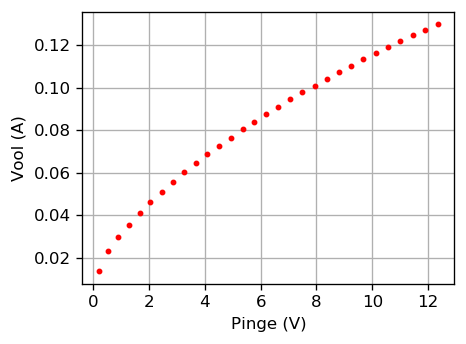

In [10]:
fail = 'lambi_voltamper'
takistus = 20.5
U_lamp = U_ps - U_mm
I_lamp = U_mm / takistus
np.savetxt(fail + '.txt', np.column_stack((U_ps, U_mm, U_lamp, I_lamp)), fmt='%.8f')

plot(U_lamp, I_lamp, 'r.')
xlabel('Pinge (V)')
ylabel('Vool (A)')
grid()
savefig(fail + '.png', bbox_inches='tight')
show()

Edasiseks analüüsiks võime kasutada äsja mõõdetud andmeid (kui need on veel arvuti mälus) või vajadusel taastame need failist:

In [72]:
U_ps, U_mm, U_lamp, I_lamp = np.loadtxt('lambi_voltamper.txt').T

Lihtsaim hõõglambi mudel ennustab pinge ja voolu vahel astmeseost: $I=aU^b$.

a = 0.031, b = 0.573


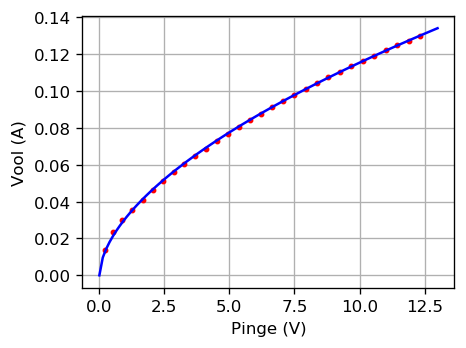

In [9]:
mudel = lambda U, a, b: a*U**b

a, b = 0.1, 0.5
(a, b), _ = curve_fit(mudel, U_lamp, I_lamp, (a, b))
print('a = %.3f, b = %.3f' % (a, b))

U = np.linspace(0, 13, 100)
plot(U_lamp, I_lamp, 'r.')
plot(U, mudel(U, a, b), 'b-')
xlabel('Pinge (V)')
ylabel('Vool (A)')
grid()
savefig(fail + '_mudel.png', bbox_inches='tight')
show()

## Dioodi voltamperkarakteristik

<img src="dioodi_voltamper_skeem.png" style="height: 8em; float: right;"/>Seekord on mõistlik multimeetriga mõõta pinget dioodil, kuna pärast dioodi avanemist dioodi pinge muutub võrdlemisi aeglaselt.

In [13]:
U_set = np.geomspace(0.25, 7.1, 25)

U_ps = []
U_mm = []
with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            ps.pinge(U)
            time.sleep(3)
            U_mm.append(mm.lugem())
            U_ps.append(ps.pinge())
            print('U_ps = %.2f, U_mm = %.4f' % (U_ps[-1], U_mm[-1]))
        ps.pinge(1)

U_ps = np.array(U_ps)
U_mm = np.array(U_mm)

U_ps = 0.25, U_mm = 0.2524
U_ps = 0.29, U_mm = 0.2867
U_ps = 0.33, U_mm = 0.3275
U_ps = 0.38, U_mm = 0.3830
U_ps = 0.44, U_mm = 0.4382
U_ps = 0.50, U_mm = 0.4898
U_ps = 0.58, U_mm = 0.5507
U_ps = 0.66, U_mm = 0.5907
U_ps = 0.76, U_mm = 0.6222
U_ps = 0.88, U_mm = 0.6467
U_ps = 1.01, U_mm = 0.6637
U_ps = 1.16, U_mm = 0.6789
U_ps = 1.33, U_mm = 0.6909
U_ps = 1.53, U_mm = 0.7019
U_ps = 1.76, U_mm = 0.7119
U_ps = 2.02, U_mm = 0.7208
U_ps = 2.33, U_mm = 0.7296
U_ps = 2.68, U_mm = 0.7374
U_ps = 3.08, U_mm = 0.7448
U_ps = 3.54, U_mm = 0.7519
U_ps = 4.06, U_mm = 0.7587
U_ps = 4.67, U_mm = 0.7656
U_ps = 5.37, U_mm = 0.7720
U_ps = 6.18, U_mm = 0.7784
U_ps = 7.10, U_mm = 0.7847


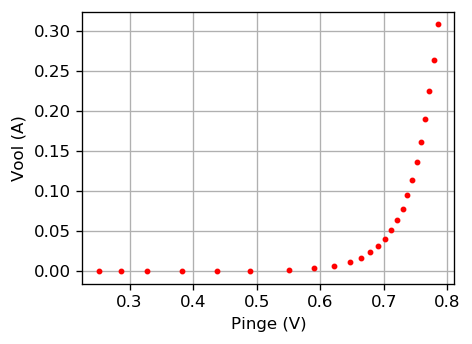

In [14]:
fail = 'dioodi_voltamper'
takistus = 20.5
U_diood = U_mm
I_diood = (U_ps - U_mm) / takistus
np.savetxt(fail + '.txt', np.column_stack((U_ps, U_diood, I_diood)), fmt='%.8f')

plot(U_diood, I_diood, 'r.')
xlabel('Pinge (V)')
ylabel('Vool (A)')
grid()
savefig(fail + '.png', bbox_inches='tight')
show()

Shockley dioodi mudel ennustab $$I=I_\text{s}\left[\exp\left(\frac{U}{nU_T}\right)-1\right],$$ kus $I_s$ on küllastav vool vastupingestatud dioodis, $U_T=k_\text{B}T/q$ (toatemperatuuril 25,4 mV) ja $n$ iseloomustab dioodi ideaalsust.

I_s = 1.14e-09 A, n = 1.59


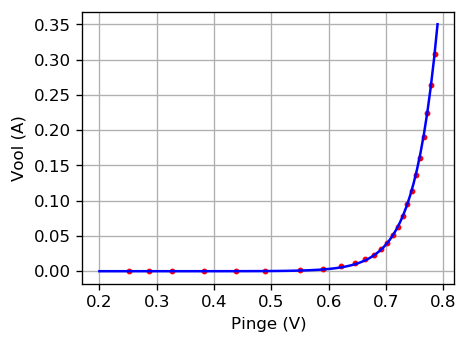

In [18]:
U_T = 0.025421
mudel = lambda U, I_s, n: I_s * (np.exp(U/(n * U_T)) - 1)
I_s, n = 1e-14, 1

(I_s, n), _ = curve_fit(mudel, U_diood, I_diood, (I_s, n))
print('I_s = %.3g A, n = %.2f' % (I_s, n))

U = np.linspace(0.2, 0.79, 100)
plot(U_diood, I_diood, 'r.')
plot(U, mudel(U, I_s, n), 'b-')
xlabel('Pinge (V)')
ylabel('Vool (A)')
grid()
savefig(fail + '_mudel.png', bbox_inches='tight')
show()

## Aku tühjenemine

<img src="aku_tühjenemine_skeem.png" style="height: 9em; float: right; margin_left: 1em;"/>Tühjendame täis laetud NiMH-aku üle mõistliku suurusega takisti, jälgides aku pinge muutumist multimeetriga. Teades takistust, saame ühtlasi teada voolutugevuse ja selle kaudu elektrilaengu. Seega selles katses on vaja vaid multimeetrit.

In [99]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    time.sleep(2)
    t0 = time.time()
    while True:
        aeg.append(time.time() - t0)
        pinge.append(mm.lugem())
        print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
        if (pinge[-1] < 0.5):
            break
        time.sleep(5)

aeg = np.array(aeg)
pinge = np.array(pinge)

aeg =    0.0 s;  pinge = 1.3014 V
aeg =    5.0 s;  pinge = 1.3009 V
aeg =   10.0 s;  pinge = 1.3004 V
aeg =   15.0 s;  pinge = 1.2999 V
aeg =   20.0 s;  pinge = 1.2996 V
aeg =   25.0 s;  pinge = 1.2992 V
aeg =   30.0 s;  pinge = 1.2988 V
aeg =   35.0 s;  pinge = 1.2985 V
aeg =   40.0 s;  pinge = 1.2982 V
aeg =   45.0 s;  pinge = 1.2979 V
aeg =   50.0 s;  pinge = 1.2976 V
aeg =   55.0 s;  pinge = 1.2973 V
aeg =   60.0 s;  pinge = 1.2970 V
aeg =   65.0 s;  pinge = 1.2968 V
aeg =   70.0 s;  pinge = 1.2965 V
aeg =   75.0 s;  pinge = 1.2963 V
aeg =   80.0 s;  pinge = 1.2961 V
aeg =   85.0 s;  pinge = 1.2958 V
aeg =   90.0 s;  pinge = 1.2955 V
aeg =   95.0 s;  pinge = 1.2953 V
aeg =  100.0 s;  pinge = 1.2951 V
aeg =  105.0 s;  pinge = 1.2949 V
aeg =  110.0 s;  pinge = 1.2947 V
aeg =  115.0 s;  pinge = 1.2945 V
aeg =  120.0 s;  pinge = 1.2942 V
aeg =  125.0 s;  pinge = 1.2940 V
aeg =  130.0 s;  pinge = 1.2939 V
aeg =  135.1 s;  pinge = 1.2937 V
aeg =  140.1 s;  pinge = 1.2934 V
aeg =  145.1 s

aeg = 8938.6 s;  pinge = 1.2115 V
aeg = 8943.6 s;  pinge = 1.2115 V
aeg = 8948.6 s;  pinge = 1.2115 V
aeg = 8953.6 s;  pinge = 1.2115 V
aeg = 8958.6 s;  pinge = 1.2114 V
aeg = 8963.6 s;  pinge = 1.2114 V
aeg = 8968.6 s;  pinge = 1.2114 V
aeg = 8973.6 s;  pinge = 1.2114 V
aeg = 8978.6 s;  pinge = 1.2114 V
aeg = 8983.6 s;  pinge = 1.2114 V
aeg = 8988.6 s;  pinge = 1.2114 V
aeg = 8993.6 s;  pinge = 1.2114 V
aeg = 8998.6 s;  pinge = 1.2113 V
aeg = 9003.6 s;  pinge = 1.2113 V
aeg = 9008.6 s;  pinge = 1.2113 V
aeg = 9013.6 s;  pinge = 1.2113 V
aeg = 9018.6 s;  pinge = 1.2113 V
aeg = 9023.6 s;  pinge = 1.2113 V
aeg = 9028.6 s;  pinge = 1.2113 V
aeg = 9033.6 s;  pinge = 1.2113 V
aeg = 9038.6 s;  pinge = 1.2112 V
aeg = 9043.6 s;  pinge = 1.2112 V
aeg = 9048.6 s;  pinge = 1.2112 V
aeg = 9053.6 s;  pinge = 1.2112 V
aeg = 9058.6 s;  pinge = 1.2112 V
aeg = 9063.6 s;  pinge = 1.2112 V
aeg = 9068.6 s;  pinge = 1.2112 V
aeg = 9073.6 s;  pinge = 1.2111 V
aeg = 9078.6 s;  pinge = 1.2112 V
aeg = 9083.6 s

aeg = 16331.6 s;  pinge = 1.1885 V
aeg = 16336.6 s;  pinge = 1.1885 V
aeg = 16341.6 s;  pinge = 1.1885 V
aeg = 16346.6 s;  pinge = 1.1885 V
aeg = 16351.6 s;  pinge = 1.1884 V
aeg = 16356.6 s;  pinge = 1.1884 V
aeg = 16361.6 s;  pinge = 1.1883 V
aeg = 16366.6 s;  pinge = 1.1883 V
aeg = 16371.6 s;  pinge = 1.1883 V
aeg = 16376.6 s;  pinge = 1.1883 V
aeg = 16381.6 s;  pinge = 1.1882 V
aeg = 16386.6 s;  pinge = 1.1882 V
aeg = 16391.6 s;  pinge = 1.1881 V
aeg = 16396.6 s;  pinge = 1.1881 V
aeg = 16401.6 s;  pinge = 1.1882 V
aeg = 16406.6 s;  pinge = 1.1881 V
aeg = 16411.6 s;  pinge = 1.1881 V
aeg = 16416.6 s;  pinge = 1.1881 V
aeg = 16421.6 s;  pinge = 1.1880 V
aeg = 16426.6 s;  pinge = 1.1880 V
aeg = 16431.6 s;  pinge = 1.1880 V
aeg = 16436.6 s;  pinge = 1.1879 V
aeg = 16441.6 s;  pinge = 1.1879 V
aeg = 16446.6 s;  pinge = 1.1878 V
aeg = 16451.6 s;  pinge = 1.1878 V
aeg = 16456.6 s;  pinge = 1.1877 V
aeg = 16461.6 s;  pinge = 1.1877 V
aeg = 16466.6 s;  pinge = 1.1878 V
aeg = 16471.6 s;  pi

Teades aega ja voolutugevust, saame ülekantud elektrilaengu leida integreerimise teel (näiteks trapetsmeetodiga).

Mahtuvus 982 mAh


<IPython.core.display.Javascript object>


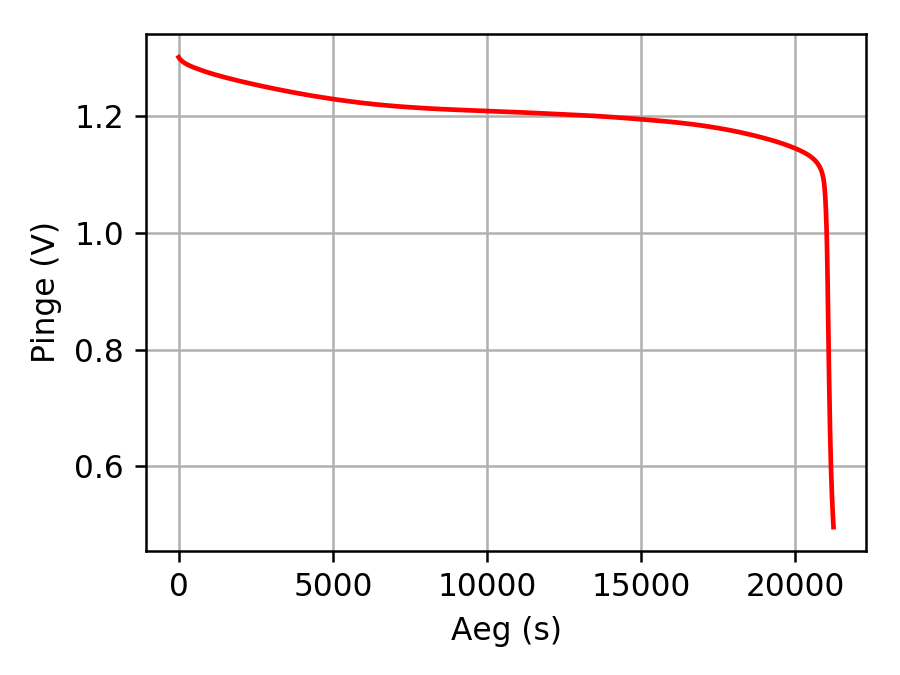

In [175]:
fail = 'aku_tühjenemine'
takistus = 7.23
vool = pinge / takistus
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge, vool)), fmt='%.8f')

print('Mahtuvus %.3g mAh' % (np.trapz(vool, aeg) * (1000 / 3600)))

plot(aeg, pinge, 'r-')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()

## Kondensaator

### Laadumine

<img src="kondensaatori_laadumine_skeem.png" style="height: 9em; float: right; margin_left: 1em;"/>Kondensaatori laadumise uurimiseks koostame joonisel kujutatud elektriskeemi. Eelnevalt veendume, et kondensaator on tühjaks laetud. Toiteplokile on seatud kindla suurusega pinge (ja seda ei ole tarvis arvutist juhtida). Käivitame mõõtmise ja mõne hetke pärast sulgeme lüliti.

Nendes katsetes kasutame superkondensaatorit nimimahtuvusega $C=$&nbsp;1,5&nbsp;F, nii et isegi võrdlemisi väikese takistuse $R$ puhul on ajakonstant $RC$ minutite diapasoonis ja seega pinge muutused kergesti jälgitavad.

In [37]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        if lugem is not None:
            aeg.append(time.time() - t0)
            pinge.append(lugem)
            print('aeg = %6.1f s;  pinge = %6.3f V' % (aeg[-1], pinge[-1]))
            if aeg[-1] > 4000:
                break
        time.sleep(0.1)

aeg = np.array(aeg)
pinge = np.array(pinge)

aeg =    0.1 s;  pinge =  0.000 V
aeg =    0.6 s;  pinge =  0.000 V
aeg =    1.1 s;  pinge =  0.000 V
aeg =    1.6 s;  pinge =  0.000 V
aeg =    2.1 s;  pinge =  0.000 V
aeg =    2.6 s;  pinge =  0.000 V
aeg =    3.1 s;  pinge =  0.000 V
aeg =    3.6 s;  pinge =  0.000 V
aeg =    4.1 s;  pinge =  0.000 V
aeg =    4.6 s;  pinge =  0.000 V
aeg =    5.2 s;  pinge =  0.000 V
aeg =    5.7 s;  pinge =  0.000 V
aeg =    6.2 s;  pinge =  0.000 V
aeg =    6.7 s;  pinge =  0.000 V
aeg =    7.2 s;  pinge =  0.000 V
aeg =    7.7 s;  pinge =  0.000 V
aeg =    8.2 s;  pinge =  0.000 V
aeg =    8.7 s;  pinge =  0.000 V
aeg =    9.2 s;  pinge =  0.000 V
aeg =    9.6 s;  pinge =  0.014 V
aeg =   10.1 s;  pinge =  0.023 V
aeg =   10.6 s;  pinge =  0.032 V
aeg =   11.1 s;  pinge =  0.041 V
aeg =   11.6 s;  pinge =  0.050 V
aeg =   12.1 s;  pinge =  0.059 V
aeg =   12.6 s;  pinge =  0.068 V
aeg =   13.1 s;  pinge =  0.077 V
aeg =   13.6 s;  pinge =  0.086 V
aeg =   14.2 s;  pinge =  0.095 V
aeg =   14.7 s

aeg =  120.6 s;  pinge =  1.702 V
aeg =  121.1 s;  pinge =  1.716 V
aeg =  121.6 s;  pinge =  1.722 V
aeg =  122.1 s;  pinge =  1.729 V
aeg =  122.6 s;  pinge =  1.735 V
aeg =  123.2 s;  pinge =  1.742 V
aeg =  123.7 s;  pinge =  1.742 V
aeg =  124.2 s;  pinge =  1.755 V
aeg =  124.7 s;  pinge =  1.762 V
aeg =  125.2 s;  pinge =  1.768 V
aeg =  125.7 s;  pinge =  1.775 V
aeg =  126.1 s;  pinge =  1.781 V
aeg =  126.6 s;  pinge =  1.781 V
aeg =  127.1 s;  pinge =  1.794 V
aeg =  127.6 s;  pinge =  1.801 V
aeg =  128.1 s;  pinge =  1.807 V
aeg =  128.6 s;  pinge =  1.814 V
aeg =  129.1 s;  pinge =  1.820 V
aeg =  129.6 s;  pinge =  1.820 V
aeg =  130.1 s;  pinge =  1.833 V
aeg =  130.6 s;  pinge =  1.840 V
aeg =  131.1 s;  pinge =  1.846 V
aeg =  131.6 s;  pinge =  1.853 V
aeg =  132.1 s;  pinge =  1.859 V
aeg =  132.7 s;  pinge =  1.866 V
aeg =  133.2 s;  pinge =  1.872 V
aeg =  133.7 s;  pinge =  1.872 V
aeg =  134.2 s;  pinge =  1.885 V
aeg =  134.7 s;  pinge =  1.891 V
aeg =  135.2 s

aeg =  241.1 s;  pinge =  3.100 V
aeg =  241.6 s;  pinge =  3.100 V
aeg =  242.1 s;  pinge =  3.110 V
aeg =  242.6 s;  pinge =  3.110 V
aeg =  243.2 s;  pinge =  3.120 V
aeg =  243.7 s;  pinge =  3.120 V
aeg =  244.2 s;  pinge =  3.130 V
aeg =  244.7 s;  pinge =  3.130 V
aeg =  245.2 s;  pinge =  3.140 V
aeg =  245.6 s;  pinge =  3.140 V
aeg =  246.1 s;  pinge =  3.150 V
aeg =  246.6 s;  pinge =  3.150 V
aeg =  247.1 s;  pinge =  3.160 V
aeg =  247.6 s;  pinge =  3.160 V
aeg =  248.1 s;  pinge =  3.170 V
aeg =  248.6 s;  pinge =  3.170 V
aeg =  249.1 s;  pinge =  3.180 V
aeg =  249.6 s;  pinge =  3.180 V
aeg =  250.1 s;  pinge =  3.190 V
aeg =  250.6 s;  pinge =  3.190 V
aeg =  251.1 s;  pinge =  3.200 V
aeg =  251.6 s;  pinge =  3.200 V
aeg =  252.1 s;  pinge =  3.209 V
aeg =  252.7 s;  pinge =  3.214 V
aeg =  253.2 s;  pinge =  3.219 V
aeg =  253.7 s;  pinge =  3.224 V
aeg =  254.2 s;  pinge =  3.229 V
aeg =  254.6 s;  pinge =  3.234 V
aeg =  255.1 s;  pinge =  3.239 V
aeg =  255.6 s

aeg =  361.6 s;  pinge =  4.162 V
aeg =  362.1 s;  pinge =  4.170 V
aeg =  362.6 s;  pinge =  4.170 V
aeg =  363.1 s;  pinge =  4.178 V
aeg =  363.6 s;  pinge =  4.181 V
aeg =  364.1 s;  pinge =  4.185 V
aeg =  364.6 s;  pinge =  4.185 V
aeg =  365.1 s;  pinge =  4.193 V
aeg =  365.6 s;  pinge =  4.193 V
aeg =  366.1 s;  pinge =  4.201 V
aeg =  366.6 s;  pinge =  4.201 V
aeg =  367.1 s;  pinge =  4.208 V
aeg =  367.6 s;  pinge =  4.212 V
aeg =  368.1 s;  pinge =  4.216 V
aeg =  368.6 s;  pinge =  4.220 V
aeg =  369.1 s;  pinge =  4.224 V
aeg =  369.7 s;  pinge =  4.224 V
aeg =  370.1 s;  pinge =  4.232 V
aeg =  370.6 s;  pinge =  4.232 V
aeg =  371.1 s;  pinge =  4.239 V
aeg =  371.6 s;  pinge =  4.243 V
aeg =  372.1 s;  pinge =  4.247 V
aeg =  372.6 s;  pinge =  4.250 V
aeg =  373.1 s;  pinge =  4.254 V
aeg =  373.6 s;  pinge =  4.254 V
aeg =  374.1 s;  pinge =  4.262 V
aeg =  374.6 s;  pinge =  4.262 V
aeg =  375.1 s;  pinge =  4.269 V
aeg =  375.6 s;  pinge =  4.273 V
aeg =  376.1 s

aeg =  482.1 s;  pinge =  4.998 V
aeg =  482.6 s;  pinge =  5.001 V
aeg =  483.1 s;  pinge =  5.005 V
aeg =  483.6 s;  pinge =  5.005 V
aeg =  484.1 s;  pinge =  5.011 V
aeg =  484.6 s;  pinge =  5.011 V
aeg =  485.1 s;  pinge =  5.017 V
aeg =  485.6 s;  pinge =  5.020 V
aeg =  486.1 s;  pinge =  5.023 V
aeg =  486.6 s;  pinge =  5.023 V
aeg =  487.1 s;  pinge =  5.029 V
aeg =  487.6 s;  pinge =  5.032 V
aeg =  488.1 s;  pinge =  5.035 V
aeg =  488.6 s;  pinge =  5.035 V
aeg =  489.0 s;  pinge =  5.041 V
aeg =  489.5 s;  pinge =  5.041 V
aeg =  490.1 s;  pinge =  5.047 V
aeg =  490.6 s;  pinge =  5.050 V
aeg =  491.1 s;  pinge =  5.053 V
aeg =  491.6 s;  pinge =  5.053 V
aeg =  492.1 s;  pinge =  5.059 V
aeg =  492.6 s;  pinge =  5.062 V
aeg =  493.1 s;  pinge =  5.065 V
aeg =  493.6 s;  pinge =  5.065 V
aeg =  494.1 s;  pinge =  5.071 V
aeg =  494.6 s;  pinge =  5.071 V
aeg =  495.1 s;  pinge =  5.077 V
aeg =  495.6 s;  pinge =  5.080 V
aeg =  496.1 s;  pinge =  5.083 V
aeg =  496.6 s

aeg =  602.6 s;  pinge =  5.660 V
aeg =  603.1 s;  pinge =  5.666 V
aeg =  603.6 s;  pinge =  5.666 V
aeg =  604.1 s;  pinge =  5.670 V
aeg =  604.6 s;  pinge =  5.670 V
aeg =  605.1 s;  pinge =  5.675 V
aeg =  605.6 s;  pinge =  5.675 V
aeg =  606.1 s;  pinge =  5.680 V
aeg =  606.6 s;  pinge =  5.680 V
aeg =  607.1 s;  pinge =  5.685 V
aeg =  607.6 s;  pinge =  5.685 V
aeg =  608.1 s;  pinge =  5.690 V
aeg =  608.6 s;  pinge =  5.690 V
aeg =  609.1 s;  pinge =  5.695 V
aeg =  609.6 s;  pinge =  5.695 V
aeg =  610.0 s;  pinge =  5.700 V
aeg =  610.5 s;  pinge =  5.700 V
aeg =  611.0 s;  pinge =  5.704 V
aeg =  611.5 s;  pinge =  5.704 V
aeg =  612.1 s;  pinge =  5.709 V
aeg =  612.6 s;  pinge =  5.712 V
aeg =  613.1 s;  pinge =  5.714 V
aeg =  613.6 s;  pinge =  5.714 V
aeg =  614.1 s;  pinge =  5.719 V
aeg =  614.6 s;  pinge =  5.722 V
aeg =  615.1 s;  pinge =  5.724 V
aeg =  615.6 s;  pinge =  5.724 V
aeg =  616.1 s;  pinge =  5.729 V
aeg =  616.6 s;  pinge =  5.731 V
aeg =  617.1 s

aeg =  723.0 s;  pinge =  6.205 V
aeg =  723.5 s;  pinge =  6.205 V
aeg =  724.1 s;  pinge =  6.209 V
aeg =  724.6 s;  pinge =  6.211 V
aeg =  725.1 s;  pinge =  6.213 V
aeg =  725.6 s;  pinge =  6.213 V
aeg =  726.1 s;  pinge =  6.217 V
aeg =  726.6 s;  pinge =  6.217 V
aeg =  727.1 s;  pinge =  6.221 V
aeg =  727.6 s;  pinge =  6.221 V
aeg =  728.1 s;  pinge =  6.225 V
aeg =  728.6 s;  pinge =  6.225 V
aeg =  729.1 s;  pinge =  6.229 V
aeg =  729.6 s;  pinge =  6.231 V
aeg =  730.1 s;  pinge =  6.233 V
aeg =  730.6 s;  pinge =  6.233 V
aeg =  731.1 s;  pinge =  6.238 V
aeg =  731.5 s;  pinge =  6.240 V
aeg =  732.0 s;  pinge =  6.241 V
aeg =  732.5 s;  pinge =  6.241 V
aeg =  733.0 s;  pinge =  6.245 V
aeg =  733.5 s;  pinge =  6.245 V
aeg =  734.0 s;  pinge =  6.250 V
aeg =  734.6 s;  pinge =  6.250 V
aeg =  735.1 s;  pinge =  6.254 V
aeg =  735.6 s;  pinge =  6.254 V
aeg =  736.1 s;  pinge =  6.258 V
aeg =  736.6 s;  pinge =  6.260 V
aeg =  737.1 s;  pinge =  6.262 V
aeg =  737.6 s

aeg =  843.5 s;  pinge =  6.654 V
aeg =  844.0 s;  pinge =  6.658 V
aeg =  844.5 s;  pinge =  6.658 V
aeg =  845.0 s;  pinge =  6.661 V
aeg =  845.5 s;  pinge =  6.661 V
aeg =  846.1 s;  pinge =  6.664 V
aeg =  846.6 s;  pinge =  6.664 V
aeg =  847.1 s;  pinge =  6.668 V
aeg =  847.6 s;  pinge =  6.668 V
aeg =  848.1 s;  pinge =  6.671 V
aeg =  848.6 s;  pinge =  6.671 V
aeg =  849.1 s;  pinge =  6.674 V
aeg =  849.6 s;  pinge =  6.674 V
aeg =  850.1 s;  pinge =  6.678 V
aeg =  850.6 s;  pinge =  6.680 V
aeg =  851.1 s;  pinge =  6.681 V
aeg =  851.5 s;  pinge =  6.681 V
aeg =  852.0 s;  pinge =  6.685 V
aeg =  852.5 s;  pinge =  6.685 V
aeg =  853.0 s;  pinge =  6.688 V
aeg =  853.5 s;  pinge =  6.690 V
aeg =  854.0 s;  pinge =  6.692 V
aeg =  854.5 s;  pinge =  6.692 V
aeg =  855.0 s;  pinge =  6.695 V
aeg =  855.5 s;  pinge =  6.695 V
aeg =  856.0 s;  pinge =  6.698 V
aeg =  856.6 s;  pinge =  6.700 V
aeg =  857.1 s;  pinge =  6.701 V
aeg =  857.6 s;  pinge =  6.701 V
aeg =  858.1 s

aeg =  964.1 s;  pinge =  7.036 V
aeg =  964.6 s;  pinge =  7.036 V
aeg =  965.1 s;  pinge =  7.039 V
aeg =  965.5 s;  pinge =  7.040 V
aeg =  966.0 s;  pinge =  7.042 V
aeg =  966.5 s;  pinge =  7.042 V
aeg =  967.0 s;  pinge =  7.045 V
aeg =  967.5 s;  pinge =  7.045 V
aeg =  968.0 s;  pinge =  7.048 V
aeg =  968.5 s;  pinge =  7.048 V
aeg =  969.0 s;  pinge =  7.051 V
aeg =  969.5 s;  pinge =  7.051 V
aeg =  970.0 s;  pinge =  7.053 V
aeg =  970.5 s;  pinge =  7.053 V
aeg =  971.0 s;  pinge =  7.056 V
aeg =  971.5 s;  pinge =  7.056 V
aeg =  972.0 s;  pinge =  7.060 V
aeg =  972.5 s;  pinge =  7.060 V
aeg =  973.1 s;  pinge =  7.062 V
aeg =  973.6 s;  pinge =  7.062 V
aeg =  974.1 s;  pinge =  7.065 V
aeg =  974.6 s;  pinge =  7.065 V
aeg =  975.1 s;  pinge =  7.068 V
aeg =  975.6 s;  pinge =  7.068 V
aeg =  976.1 s;  pinge =  7.071 V
aeg =  976.6 s;  pinge =  7.071 V
aeg =  977.1 s;  pinge =  7.073 V
aeg =  977.5 s;  pinge =  7.073 V
aeg =  978.0 s;  pinge =  7.076 V
aeg =  978.5 s

aeg = 1084.5 s;  pinge =  7.360 V
aeg = 1085.0 s;  pinge =  7.362 V
aeg = 1085.5 s;  pinge =  7.362 V
aeg = 1086.0 s;  pinge =  7.365 V
aeg = 1086.5 s;  pinge =  7.365 V
aeg = 1087.0 s;  pinge =  7.368 V
aeg = 1087.5 s;  pinge =  7.368 V
aeg = 1088.1 s;  pinge =  7.370 V
aeg = 1088.6 s;  pinge =  7.370 V
aeg = 1089.1 s;  pinge =  7.372 V
aeg = 1089.6 s;  pinge =  7.372 V
aeg = 1090.1 s;  pinge =  7.375 V
aeg = 1090.5 s;  pinge =  7.375 V
aeg = 1091.0 s;  pinge =  7.378 V
aeg = 1091.5 s;  pinge =  7.378 V
aeg = 1092.0 s;  pinge =  7.380 V
aeg = 1092.5 s;  pinge =  7.380 V
aeg = 1093.0 s;  pinge =  7.382 V
aeg = 1093.5 s;  pinge =  7.382 V
aeg = 1094.0 s;  pinge =  7.385 V
aeg = 1094.5 s;  pinge =  7.385 V
aeg = 1095.0 s;  pinge =  7.387 V
aeg = 1095.5 s;  pinge =  7.387 V
aeg = 1096.0 s;  pinge =  7.389 V
aeg = 1096.5 s;  pinge =  7.391 V
aeg = 1097.0 s;  pinge =  7.392 V
aeg = 1097.5 s;  pinge =  7.392 V
aeg = 1098.0 s;  pinge =  7.395 V
aeg = 1098.5 s;  pinge =  7.395 V
aeg = 1099.1 s

aeg = 1205.0 s;  pinge =  7.642 V
aeg = 1205.5 s;  pinge =  7.642 V
aeg = 1206.0 s;  pinge =  7.644 V
aeg = 1206.6 s;  pinge =  7.644 V
aeg = 1207.1 s;  pinge =  7.646 V
aeg = 1207.6 s;  pinge =  7.646 V
aeg = 1208.1 s;  pinge =  7.648 V
aeg = 1208.5 s;  pinge =  7.650 V
aeg = 1209.0 s;  pinge =  7.651 V
aeg = 1209.5 s;  pinge =  7.651 V
aeg = 1210.0 s;  pinge =  7.653 V
aeg = 1210.5 s;  pinge =  7.653 V
aeg = 1211.0 s;  pinge =  7.655 V
aeg = 1211.5 s;  pinge =  7.655 V
aeg = 1212.0 s;  pinge =  7.657 V
aeg = 1212.5 s;  pinge =  7.657 V
aeg = 1213.0 s;  pinge =  7.659 V
aeg = 1213.5 s;  pinge =  7.660 V
aeg = 1214.0 s;  pinge =  7.661 V
aeg = 1214.5 s;  pinge =  7.661 V
aeg = 1215.0 s;  pinge =  7.663 V
aeg = 1215.5 s;  pinge =  7.663 V
aeg = 1216.0 s;  pinge =  7.665 V
aeg = 1216.6 s;  pinge =  7.665 V
aeg = 1217.1 s;  pinge =  7.668 V
aeg = 1217.6 s;  pinge =  7.668 V
aeg = 1218.0 s;  pinge =  7.670 V
aeg = 1218.5 s;  pinge =  7.670 V
aeg = 1219.0 s;  pinge =  7.672 V
aeg = 1219.5 s

aeg = 1325.5 s;  pinge =  7.885 V
aeg = 1326.0 s;  pinge =  7.887 V
aeg = 1326.5 s;  pinge =  7.887 V
aeg = 1327.0 s;  pinge =  7.888 V
aeg = 1327.5 s;  pinge =  7.888 V
aeg = 1328.1 s;  pinge =  7.890 V
aeg = 1328.5 s;  pinge =  7.890 V
aeg = 1329.0 s;  pinge =  7.892 V
aeg = 1329.5 s;  pinge =  7.892 V
aeg = 1330.0 s;  pinge =  7.894 V
aeg = 1330.5 s;  pinge =  7.894 V
aeg = 1331.0 s;  pinge =  7.896 V
aeg = 1331.5 s;  pinge =  7.896 V
aeg = 1332.0 s;  pinge =  7.898 V
aeg = 1332.5 s;  pinge =  7.898 V
aeg = 1333.0 s;  pinge =  7.900 V
aeg = 1333.5 s;  pinge =  7.900 V
aeg = 1334.0 s;  pinge =  7.902 V
aeg = 1334.5 s;  pinge =  7.902 V
aeg = 1335.0 s;  pinge =  7.903 V
aeg = 1335.5 s;  pinge =  7.903 V
aeg = 1336.0 s;  pinge =  7.905 V
aeg = 1336.5 s;  pinge =  7.905 V
aeg = 1337.0 s;  pinge =  7.907 V
aeg = 1337.5 s;  pinge =  7.907 V
aeg = 1338.0 s;  pinge =  7.909 V
aeg = 1338.5 s;  pinge =  7.910 V
aeg = 1339.0 s;  pinge =  7.911 V
aeg = 1339.5 s;  pinge =  7.911 V
aeg = 1340.0 s

aeg = 1445.9 s;  pinge =  8.098 V
aeg = 1446.4 s;  pinge =  8.098 V
aeg = 1447.0 s;  pinge =  8.100 V
aeg = 1447.5 s;  pinge =  8.100 V
aeg = 1448.0 s;  pinge =  8.102 V
aeg = 1448.5 s;  pinge =  8.102 V
aeg = 1449.0 s;  pinge =  8.104 V
aeg = 1449.5 s;  pinge =  8.104 V
aeg = 1450.0 s;  pinge =  8.105 V
aeg = 1450.5 s;  pinge =  8.105 V
aeg = 1451.0 s;  pinge =  8.107 V
aeg = 1451.5 s;  pinge =  8.107 V
aeg = 1452.0 s;  pinge =  8.108 V
aeg = 1452.5 s;  pinge =  8.108 V
aeg = 1453.0 s;  pinge =  8.110 V
aeg = 1453.5 s;  pinge =  8.110 V
aeg = 1454.0 s;  pinge =  8.112 V
aeg = 1454.5 s;  pinge =  8.112 V
aeg = 1455.0 s;  pinge =  8.113 V
aeg = 1455.5 s;  pinge =  8.113 V
aeg = 1455.9 s;  pinge =  8.115 V
aeg = 1456.4 s;  pinge =  8.115 V
aeg = 1456.9 s;  pinge =  8.117 V
aeg = 1457.5 s;  pinge =  8.117 V
aeg = 1458.0 s;  pinge =  8.118 V
aeg = 1458.5 s;  pinge =  8.118 V
aeg = 1459.0 s;  pinge =  8.120 V
aeg = 1459.5 s;  pinge =  8.120 V
aeg = 1460.0 s;  pinge =  8.121 V
aeg = 1460.5 s

aeg = 1566.4 s;  pinge =  8.284 V
aeg = 1566.9 s;  pinge =  8.286 V
aeg = 1567.5 s;  pinge =  8.286 V
aeg = 1568.0 s;  pinge =  8.287 V
aeg = 1568.5 s;  pinge =  8.287 V
aeg = 1569.0 s;  pinge =  8.289 V
aeg = 1569.5 s;  pinge =  8.289 V
aeg = 1570.0 s;  pinge =  8.290 V
aeg = 1570.5 s;  pinge =  8.290 V
aeg = 1571.0 s;  pinge =  8.291 V
aeg = 1571.5 s;  pinge =  8.291 V
aeg = 1572.0 s;  pinge =  8.293 V
aeg = 1572.5 s;  pinge =  8.293 V
aeg = 1573.0 s;  pinge =  8.294 V
aeg = 1573.5 s;  pinge =  8.294 V
aeg = 1574.0 s;  pinge =  8.295 V
aeg = 1574.5 s;  pinge =  8.295 V
aeg = 1575.0 s;  pinge =  8.297 V
aeg = 1575.5 s;  pinge =  8.297 V
aeg = 1575.9 s;  pinge =  8.299 V
aeg = 1576.4 s;  pinge =  8.299 V
aeg = 1576.9 s;  pinge =  8.300 V
aeg = 1577.4 s;  pinge =  8.300 V
aeg = 1577.9 s;  pinge =  8.301 V
aeg = 1578.4 s;  pinge =  8.301 V
aeg = 1579.0 s;  pinge =  8.303 V
aeg = 1579.5 s;  pinge =  8.303 V
aeg = 1580.0 s;  pinge =  8.304 V
aeg = 1580.5 s;  pinge =  8.304 V
aeg = 1581.0 s

aeg = 1686.9 s;  pinge =  8.449 V
aeg = 1687.4 s;  pinge =  8.450 V
aeg = 1687.9 s;  pinge =  8.451 V
aeg = 1688.4 s;  pinge =  8.451 V
aeg = 1689.0 s;  pinge =  8.451 V
aeg = 1689.5 s;  pinge =  8.451 V
aeg = 1690.0 s;  pinge =  8.453 V
aeg = 1690.5 s;  pinge =  8.453 V
aeg = 1691.0 s;  pinge =  8.454 V
aeg = 1691.5 s;  pinge =  8.454 V
aeg = 1692.0 s;  pinge =  8.456 V
aeg = 1692.5 s;  pinge =  8.456 V
aeg = 1693.0 s;  pinge =  8.456 V
aeg = 1693.5 s;  pinge =  8.456 V
aeg = 1694.0 s;  pinge =  8.458 V
aeg = 1694.5 s;  pinge =  8.458 V
aeg = 1695.0 s;  pinge =  8.459 V
aeg = 1695.5 s;  pinge =  8.460 V
aeg = 1695.9 s;  pinge =  8.461 V
aeg = 1696.4 s;  pinge =  8.461 V
aeg = 1696.9 s;  pinge =  8.462 V
aeg = 1697.4 s;  pinge =  8.462 V
aeg = 1697.9 s;  pinge =  8.463 V
aeg = 1698.4 s;  pinge =  8.463 V
aeg = 1698.9 s;  pinge =  8.465 V
aeg = 1699.4 s;  pinge =  8.465 V
aeg = 1699.9 s;  pinge =  8.466 V
aeg = 1700.4 s;  pinge =  8.466 V
aeg = 1701.0 s;  pinge =  8.467 V
aeg = 1701.5 s

aeg = 1807.5 s;  pinge =  8.593 V
aeg = 1808.0 s;  pinge =  8.594 V
aeg = 1808.5 s;  pinge =  8.594 V
aeg = 1809.0 s;  pinge =  8.595 V
aeg = 1809.4 s;  pinge =  8.595 V
aeg = 1809.9 s;  pinge =  8.596 V
aeg = 1810.4 s;  pinge =  8.596 V
aeg = 1810.9 s;  pinge =  8.597 V
aeg = 1811.4 s;  pinge =  8.597 V
aeg = 1811.9 s;  pinge =  8.599 V
aeg = 1812.4 s;  pinge =  8.599 V
aeg = 1812.9 s;  pinge =  8.600 V
aeg = 1813.4 s;  pinge =  8.600 V
aeg = 1813.9 s;  pinge =  8.601 V
aeg = 1814.4 s;  pinge =  8.601 V
aeg = 1814.9 s;  pinge =  8.602 V
aeg = 1815.4 s;  pinge =  8.602 V
aeg = 1816.0 s;  pinge =  8.603 V
aeg = 1816.5 s;  pinge =  8.603 V
aeg = 1817.0 s;  pinge =  8.604 V
aeg = 1817.5 s;  pinge =  8.604 V
aeg = 1818.0 s;  pinge =  8.606 V
aeg = 1818.5 s;  pinge =  8.606 V
aeg = 1819.0 s;  pinge =  8.607 V
aeg = 1819.5 s;  pinge =  8.607 V
aeg = 1820.0 s;  pinge =  8.608 V
aeg = 1820.5 s;  pinge =  8.608 V
aeg = 1820.9 s;  pinge =  8.609 V
aeg = 1821.4 s;  pinge =  8.609 V
aeg = 1821.9 s

aeg = 1928.0 s;  pinge =  8.721 V
aeg = 1928.5 s;  pinge =  8.721 V
aeg = 1929.0 s;  pinge =  8.722 V
aeg = 1929.5 s;  pinge =  8.722 V
aeg = 1930.0 s;  pinge =  8.723 V
aeg = 1930.5 s;  pinge =  8.723 V
aeg = 1931.0 s;  pinge =  8.724 V
aeg = 1931.5 s;  pinge =  8.724 V
aeg = 1931.9 s;  pinge =  8.725 V
aeg = 1932.4 s;  pinge =  8.725 V
aeg = 1932.9 s;  pinge =  8.726 V
aeg = 1933.4 s;  pinge =  8.726 V
aeg = 1933.9 s;  pinge =  8.727 V
aeg = 1934.4 s;  pinge =  8.727 V
aeg = 1934.9 s;  pinge =  8.728 V
aeg = 1935.4 s;  pinge =  8.728 V
aeg = 1935.9 s;  pinge =  8.729 V
aeg = 1936.4 s;  pinge =  8.730 V
aeg = 1936.9 s;  pinge =  8.730 V
aeg = 1937.4 s;  pinge =  8.730 V
aeg = 1937.9 s;  pinge =  8.731 V
aeg = 1938.4 s;  pinge =  8.731 V
aeg = 1939.0 s;  pinge =  8.732 V
aeg = 1939.5 s;  pinge =  8.732 V
aeg = 1940.0 s;  pinge =  8.733 V
aeg = 1940.5 s;  pinge =  8.733 V
aeg = 1941.0 s;  pinge =  8.734 V
aeg = 1941.5 s;  pinge =  8.734 V
aeg = 1942.0 s;  pinge =  8.735 V
aeg = 1942.5 s

aeg = 2048.4 s;  pinge =  8.834 V
aeg = 2048.9 s;  pinge =  8.834 V
aeg = 2049.4 s;  pinge =  8.834 V
aeg = 2049.9 s;  pinge =  8.835 V
aeg = 2050.4 s;  pinge =  8.835 V
aeg = 2050.9 s;  pinge =  8.836 V
aeg = 2051.4 s;  pinge =  8.836 V
aeg = 2052.0 s;  pinge =  8.837 V
aeg = 2052.5 s;  pinge =  8.837 V
aeg = 2053.0 s;  pinge =  8.838 V
aeg = 2053.5 s;  pinge =  8.838 V
aeg = 2054.0 s;  pinge =  8.839 V
aeg = 2054.4 s;  pinge =  8.839 V
aeg = 2054.9 s;  pinge =  8.840 V
aeg = 2055.4 s;  pinge =  8.840 V
aeg = 2055.9 s;  pinge =  8.841 V
aeg = 2056.4 s;  pinge =  8.841 V
aeg = 2056.9 s;  pinge =  8.841 V
aeg = 2057.4 s;  pinge =  8.841 V
aeg = 2057.9 s;  pinge =  8.842 V
aeg = 2058.4 s;  pinge =  8.842 V
aeg = 2058.9 s;  pinge =  8.843 V
aeg = 2059.4 s;  pinge =  8.843 V
aeg = 2059.9 s;  pinge =  8.844 V
aeg = 2060.4 s;  pinge =  8.844 V
aeg = 2060.9 s;  pinge =  8.845 V
aeg = 2061.4 s;  pinge =  8.845 V
aeg = 2062.0 s;  pinge =  8.846 V
aeg = 2062.5 s;  pinge =  8.846 V
aeg = 2063.0 s

aeg = 2168.9 s;  pinge =  8.933 V
aeg = 2169.4 s;  pinge =  8.933 V
aeg = 2169.9 s;  pinge =  8.934 V
aeg = 2170.4 s;  pinge =  8.934 V
aeg = 2170.9 s;  pinge =  8.935 V
aeg = 2171.4 s;  pinge =  8.935 V
aeg = 2171.9 s;  pinge =  8.936 V
aeg = 2172.4 s;  pinge =  8.936 V
aeg = 2172.9 s;  pinge =  8.937 V
aeg = 2173.4 s;  pinge =  8.937 V
aeg = 2173.9 s;  pinge =  8.937 V
aeg = 2174.4 s;  pinge =  8.937 V
aeg = 2175.0 s;  pinge =  8.938 V
aeg = 2175.4 s;  pinge =  8.938 V
aeg = 2175.9 s;  pinge =  8.939 V
aeg = 2176.5 s;  pinge =  8.939 V
aeg = 2176.9 s;  pinge =  8.939 V
aeg = 2177.4 s;  pinge =  8.940 V
aeg = 2177.9 s;  pinge =  8.940 V
aeg = 2178.4 s;  pinge =  8.940 V
aeg = 2178.9 s;  pinge =  8.941 V
aeg = 2179.4 s;  pinge =  8.941 V
aeg = 2179.9 s;  pinge =  8.942 V
aeg = 2180.4 s;  pinge =  8.942 V
aeg = 2180.9 s;  pinge =  8.943 V
aeg = 2181.4 s;  pinge =  8.943 V
aeg = 2181.9 s;  pinge =  8.944 V
aeg = 2182.4 s;  pinge =  8.944 V
aeg = 2182.9 s;  pinge =  8.944 V
aeg = 2183.4 s

aeg = 2289.4 s;  pinge =  9.021 V
aeg = 2289.8 s;  pinge =  9.022 V
aeg = 2290.4 s;  pinge =  9.022 V
aeg = 2290.9 s;  pinge =  9.022 V
aeg = 2291.4 s;  pinge =  9.022 V
aeg = 2291.9 s;  pinge =  9.023 V
aeg = 2292.4 s;  pinge =  9.023 V
aeg = 2292.9 s;  pinge =  9.024 V
aeg = 2293.4 s;  pinge =  9.024 V
aeg = 2293.9 s;  pinge =  9.025 V
aeg = 2294.4 s;  pinge =  9.025 V
aeg = 2294.9 s;  pinge =  9.025 V
aeg = 2295.4 s;  pinge =  9.025 V
aeg = 2295.9 s;  pinge =  9.026 V
aeg = 2296.4 s;  pinge =  9.026 V
aeg = 2296.9 s;  pinge =  9.027 V
aeg = 2297.4 s;  pinge =  9.027 V
aeg = 2297.9 s;  pinge =  9.027 V
aeg = 2298.4 s;  pinge =  9.027 V
aeg = 2298.9 s;  pinge =  9.028 V
aeg = 2299.4 s;  pinge =  9.028 V
aeg = 2299.9 s;  pinge =  9.029 V
aeg = 2300.4 s;  pinge =  9.029 V
aeg = 2300.9 s;  pinge =  9.029 V
aeg = 2301.4 s;  pinge =  9.030 V
aeg = 2301.9 s;  pinge =  9.030 V
aeg = 2302.4 s;  pinge =  9.030 V
aeg = 2302.9 s;  pinge =  9.031 V
aeg = 2303.4 s;  pinge =  9.031 V
aeg = 2303.9 s

aeg = 2409.8 s;  pinge =  9.100 V
aeg = 2410.4 s;  pinge =  9.100 V
aeg = 2410.9 s;  pinge =  9.100 V
aeg = 2411.3 s;  pinge =  9.100 V
aeg = 2411.9 s;  pinge =  9.101 V
aeg = 2412.4 s;  pinge =  9.101 V
aeg = 2412.9 s;  pinge =  9.102 V
aeg = 2413.4 s;  pinge =  9.102 V
aeg = 2413.9 s;  pinge =  9.103 V
aeg = 2414.3 s;  pinge =  9.103 V
aeg = 2414.9 s;  pinge =  9.103 V
aeg = 2415.4 s;  pinge =  9.103 V
aeg = 2415.8 s;  pinge =  9.103 V
aeg = 2416.4 s;  pinge =  9.103 V
aeg = 2416.9 s;  pinge =  9.104 V
aeg = 2417.4 s;  pinge =  9.104 V
aeg = 2417.9 s;  pinge =  9.105 V
aeg = 2418.4 s;  pinge =  9.105 V
aeg = 2418.9 s;  pinge =  9.105 V
aeg = 2419.4 s;  pinge =  9.105 V
aeg = 2419.9 s;  pinge =  9.106 V
aeg = 2420.4 s;  pinge =  9.106 V
aeg = 2420.9 s;  pinge =  9.106 V
aeg = 2421.3 s;  pinge =  9.106 V
aeg = 2421.9 s;  pinge =  9.107 V
aeg = 2422.4 s;  pinge =  9.107 V
aeg = 2422.8 s;  pinge =  9.108 V
aeg = 2423.4 s;  pinge =  9.108 V
aeg = 2423.9 s;  pinge =  9.108 V
aeg = 2424.3 s

aeg = 2530.4 s;  pinge =  9.169 V
aeg = 2530.9 s;  pinge =  9.169 V
aeg = 2531.3 s;  pinge =  9.169 V
aeg = 2531.9 s;  pinge =  9.170 V
aeg = 2532.4 s;  pinge =  9.170 V
aeg = 2532.8 s;  pinge =  9.170 V
aeg = 2533.4 s;  pinge =  9.170 V
aeg = 2533.8 s;  pinge =  9.171 V
aeg = 2534.4 s;  pinge =  9.171 V
aeg = 2534.9 s;  pinge =  9.172 V
aeg = 2535.4 s;  pinge =  9.172 V
aeg = 2535.9 s;  pinge =  9.172 V
aeg = 2536.4 s;  pinge =  9.172 V
aeg = 2536.9 s;  pinge =  9.173 V
aeg = 2537.4 s;  pinge =  9.173 V
aeg = 2537.8 s;  pinge =  9.174 V
aeg = 2538.3 s;  pinge =  9.174 V
aeg = 2538.8 s;  pinge =  9.174 V
aeg = 2539.3 s;  pinge =  9.174 V
aeg = 2539.8 s;  pinge =  9.174 V
aeg = 2540.3 s;  pinge =  9.174 V
aeg = 2540.9 s;  pinge =  9.175 V
aeg = 2541.4 s;  pinge =  9.175 V
aeg = 2541.9 s;  pinge =  9.175 V
aeg = 2542.4 s;  pinge =  9.175 V
aeg = 2542.9 s;  pinge =  9.176 V
aeg = 2543.4 s;  pinge =  9.176 V
aeg = 2543.9 s;  pinge =  9.177 V
aeg = 2544.4 s;  pinge =  9.177 V
aeg = 2544.9 s

aeg = 2650.9 s;  pinge =  9.231 V
aeg = 2651.4 s;  pinge =  9.231 V
aeg = 2651.8 s;  pinge =  9.231 V
aeg = 2652.4 s;  pinge =  9.231 V
aeg = 2652.9 s;  pinge =  9.232 V
aeg = 2653.4 s;  pinge =  9.232 V
aeg = 2653.9 s;  pinge =  9.233 V
aeg = 2654.4 s;  pinge =  9.233 V
aeg = 2654.9 s;  pinge =  9.233 V
aeg = 2655.4 s;  pinge =  9.233 V
aeg = 2655.8 s;  pinge =  9.233 V
aeg = 2656.3 s;  pinge =  9.233 V
aeg = 2656.8 s;  pinge =  9.234 V
aeg = 2657.3 s;  pinge =  9.234 V
aeg = 2657.9 s;  pinge =  9.234 V
aeg = 2658.4 s;  pinge =  9.234 V
aeg = 2658.8 s;  pinge =  9.235 V
aeg = 2659.4 s;  pinge =  9.235 V
aeg = 2659.9 s;  pinge =  9.236 V
aeg = 2660.3 s;  pinge =  9.236 V
aeg = 2660.9 s;  pinge =  9.236 V
aeg = 2661.4 s;  pinge =  9.236 V
aeg = 2661.9 s;  pinge =  9.236 V
aeg = 2662.3 s;  pinge =  9.236 V
aeg = 2662.9 s;  pinge =  9.237 V
aeg = 2663.4 s;  pinge =  9.237 V
aeg = 2663.8 s;  pinge =  9.237 V
aeg = 2664.4 s;  pinge =  9.237 V
aeg = 2664.9 s;  pinge =  9.238 V
aeg = 2665.3 s

aeg = 2771.4 s;  pinge =  9.286 V
aeg = 2771.9 s;  pinge =  9.287 V
aeg = 2772.3 s;  pinge =  9.287 V
aeg = 2772.8 s;  pinge =  9.287 V
aeg = 2773.3 s;  pinge =  9.287 V
aeg = 2773.8 s;  pinge =  9.287 V
aeg = 2774.3 s;  pinge =  9.287 V
aeg = 2774.8 s;  pinge =  9.288 V
aeg = 2775.3 s;  pinge =  9.288 V
aeg = 2775.8 s;  pinge =  9.288 V
aeg = 2776.3 s;  pinge =  9.288 V
aeg = 2776.8 s;  pinge =  9.289 V
aeg = 2777.4 s;  pinge =  9.289 V
aeg = 2777.9 s;  pinge =  9.289 V
aeg = 2778.4 s;  pinge =  9.290 V
aeg = 2778.9 s;  pinge =  9.290 V
aeg = 2779.4 s;  pinge =  9.290 V
aeg = 2779.9 s;  pinge =  9.290 V
aeg = 2780.4 s;  pinge =  9.290 V
aeg = 2780.8 s;  pinge =  9.290 V
aeg = 2781.3 s;  pinge =  9.290 V
aeg = 2781.8 s;  pinge =  9.291 V
aeg = 2782.3 s;  pinge =  9.291 V
aeg = 2782.8 s;  pinge =  9.291 V
aeg = 2783.3 s;  pinge =  9.291 V
aeg = 2783.8 s;  pinge =  9.292 V
aeg = 2784.3 s;  pinge =  9.292 V
aeg = 2784.8 s;  pinge =  9.292 V
aeg = 2785.3 s;  pinge =  9.292 V
aeg = 2785.8 s

aeg = 2891.8 s;  pinge =  9.336 V
aeg = 2892.3 s;  pinge =  9.336 V
aeg = 2892.8 s;  pinge =  9.336 V
aeg = 2893.3 s;  pinge =  9.336 V
aeg = 2893.8 s;  pinge =  9.337 V
aeg = 2894.3 s;  pinge =  9.337 V
aeg = 2894.8 s;  pinge =  9.337 V
aeg = 2895.4 s;  pinge =  9.337 V
aeg = 2895.9 s;  pinge =  9.337 V
aeg = 2896.4 s;  pinge =  9.337 V
aeg = 2896.9 s;  pinge =  9.338 V
aeg = 2897.4 s;  pinge =  9.338 V
aeg = 2897.8 s;  pinge =  9.338 V
aeg = 2898.3 s;  pinge =  9.338 V
aeg = 2898.8 s;  pinge =  9.338 V
aeg = 2899.3 s;  pinge =  9.338 V
aeg = 2899.8 s;  pinge =  9.339 V
aeg = 2900.3 s;  pinge =  9.339 V
aeg = 2900.8 s;  pinge =  9.339 V
aeg = 2901.3 s;  pinge =  9.339 V
aeg = 2901.8 s;  pinge =  9.340 V
aeg = 2902.3 s;  pinge =  9.340 V
aeg = 2902.8 s;  pinge =  9.340 V
aeg = 2903.3 s;  pinge =  9.340 V
aeg = 2903.8 s;  pinge =  9.340 V
aeg = 2904.3 s;  pinge =  9.340 V
aeg = 2904.8 s;  pinge =  9.341 V
aeg = 2905.4 s;  pinge =  9.341 V
aeg = 2905.9 s;  pinge =  9.341 V
aeg = 2906.4 s

aeg = 3012.3 s;  pinge =  9.380 V
aeg = 3012.8 s;  pinge =  9.380 V
aeg = 3013.3 s;  pinge =  9.380 V
aeg = 3013.8 s;  pinge =  9.381 V
aeg = 3014.3 s;  pinge =  9.381 V
aeg = 3014.8 s;  pinge =  9.381 V
aeg = 3015.3 s;  pinge =  9.381 V
aeg = 3015.8 s;  pinge =  9.381 V
aeg = 3016.3 s;  pinge =  9.381 V
aeg = 3016.8 s;  pinge =  9.382 V
aeg = 3017.3 s;  pinge =  9.382 V
aeg = 3017.8 s;  pinge =  9.382 V
aeg = 3018.4 s;  pinge =  9.382 V
aeg = 3018.9 s;  pinge =  9.383 V
aeg = 3019.4 s;  pinge =  9.383 V
aeg = 3019.8 s;  pinge =  9.383 V
aeg = 3020.3 s;  pinge =  9.383 V
aeg = 3020.8 s;  pinge =  9.383 V
aeg = 3021.3 s;  pinge =  9.383 V
aeg = 3021.8 s;  pinge =  9.383 V
aeg = 3022.3 s;  pinge =  9.383 V
aeg = 3022.8 s;  pinge =  9.384 V
aeg = 3023.3 s;  pinge =  9.384 V
aeg = 3023.8 s;  pinge =  9.384 V
aeg = 3024.3 s;  pinge =  9.384 V
aeg = 3024.8 s;  pinge =  9.385 V
aeg = 3025.3 s;  pinge =  9.385 V
aeg = 3025.8 s;  pinge =  9.385 V
aeg = 3026.3 s;  pinge =  9.385 V
aeg = 3026.8 s

aeg = 3132.8 s;  pinge =  9.420 V
aeg = 3133.3 s;  pinge =  9.420 V
aeg = 3133.8 s;  pinge =  9.420 V
aeg = 3134.3 s;  pinge =  9.420 V
aeg = 3134.8 s;  pinge =  9.421 V
aeg = 3135.3 s;  pinge =  9.421 V
aeg = 3135.8 s;  pinge =  9.421 V
aeg = 3136.3 s;  pinge =  9.421 V
aeg = 3136.8 s;  pinge =  9.422 V
aeg = 3137.3 s;  pinge =  9.422 V
aeg = 3137.8 s;  pinge =  9.422 V
aeg = 3138.3 s;  pinge =  9.422 V
aeg = 3138.8 s;  pinge =  9.422 V
aeg = 3139.3 s;  pinge =  9.422 V
aeg = 3139.8 s;  pinge =  9.422 V
aeg = 3140.3 s;  pinge =  9.422 V
aeg = 3140.8 s;  pinge =  9.423 V
aeg = 3141.3 s;  pinge =  9.423 V
aeg = 3141.8 s;  pinge =  9.423 V
aeg = 3142.3 s;  pinge =  9.423 V
aeg = 3142.8 s;  pinge =  9.423 V
aeg = 3143.3 s;  pinge =  9.423 V
aeg = 3143.8 s;  pinge =  9.424 V
aeg = 3144.3 s;  pinge =  9.424 V
aeg = 3144.7 s;  pinge =  9.424 V
aeg = 3145.3 s;  pinge =  9.424 V
aeg = 3145.8 s;  pinge =  9.424 V
aeg = 3146.3 s;  pinge =  9.424 V
aeg = 3146.8 s;  pinge =  9.425 V
aeg = 3147.3 s

aeg = 3253.3 s;  pinge =  9.456 V
aeg = 3253.8 s;  pinge =  9.456 V
aeg = 3254.3 s;  pinge =  9.456 V
aeg = 3254.8 s;  pinge =  9.457 V
aeg = 3255.3 s;  pinge =  9.457 V
aeg = 3255.8 s;  pinge =  9.457 V
aeg = 3256.3 s;  pinge =  9.457 V
aeg = 3256.8 s;  pinge =  9.457 V
aeg = 3257.3 s;  pinge =  9.457 V
aeg = 3257.8 s;  pinge =  9.458 V
aeg = 3258.3 s;  pinge =  9.458 V
aeg = 3258.8 s;  pinge =  9.458 V
aeg = 3259.2 s;  pinge =  9.458 V
aeg = 3259.7 s;  pinge =  9.458 V
aeg = 3260.2 s;  pinge =  9.458 V
aeg = 3260.7 s;  pinge =  9.458 V
aeg = 3261.2 s;  pinge =  9.458 V
aeg = 3261.7 s;  pinge =  9.459 V
aeg = 3262.3 s;  pinge =  9.459 V
aeg = 3262.8 s;  pinge =  9.459 V
aeg = 3263.3 s;  pinge =  9.459 V
aeg = 3263.8 s;  pinge =  9.459 V
aeg = 3264.3 s;  pinge =  9.459 V
aeg = 3264.8 s;  pinge =  9.460 V
aeg = 3265.3 s;  pinge =  9.460 V
aeg = 3265.8 s;  pinge =  9.460 V
aeg = 3266.3 s;  pinge =  9.460 V
aeg = 3266.8 s;  pinge =  9.460 V
aeg = 3267.3 s;  pinge =  9.460 V
aeg = 3267.8 s

aeg = 3373.8 s;  pinge =  9.489 V
aeg = 3374.3 s;  pinge =  9.489 V
aeg = 3374.8 s;  pinge =  9.489 V
aeg = 3375.2 s;  pinge =  9.489 V
aeg = 3375.7 s;  pinge =  9.489 V
aeg = 3376.2 s;  pinge =  9.489 V
aeg = 3376.7 s;  pinge =  9.489 V
aeg = 3377.2 s;  pinge =  9.490 V
aeg = 3377.8 s;  pinge =  9.490 V
aeg = 3378.3 s;  pinge =  9.490 V
aeg = 3378.8 s;  pinge =  9.490 V
aeg = 3379.3 s;  pinge =  9.490 V
aeg = 3379.8 s;  pinge =  9.490 V
aeg = 3380.3 s;  pinge =  9.490 V
aeg = 3380.8 s;  pinge =  9.491 V
aeg = 3381.3 s;  pinge =  9.491 V
aeg = 3381.8 s;  pinge =  9.491 V
aeg = 3382.3 s;  pinge =  9.491 V
aeg = 3382.8 s;  pinge =  9.491 V
aeg = 3383.3 s;  pinge =  9.491 V
aeg = 3383.8 s;  pinge =  9.491 V
aeg = 3384.3 s;  pinge =  9.491 V
aeg = 3384.8 s;  pinge =  9.492 V
aeg = 3385.3 s;  pinge =  9.492 V
aeg = 3385.7 s;  pinge =  9.492 V
aeg = 3386.2 s;  pinge =  9.492 V
aeg = 3386.7 s;  pinge =  9.492 V
aeg = 3387.2 s;  pinge =  9.492 V
aeg = 3387.7 s;  pinge =  9.492 V
aeg = 3388.2 s

aeg = 3494.2 s;  pinge =  9.518 V
aeg = 3494.7 s;  pinge =  9.518 V
aeg = 3495.2 s;  pinge =  9.518 V
aeg = 3495.7 s;  pinge =  9.519 V
aeg = 3496.2 s;  pinge =  9.519 V
aeg = 3496.7 s;  pinge =  9.519 V
aeg = 3497.3 s;  pinge =  9.519 V
aeg = 3497.8 s;  pinge =  9.519 V
aeg = 3498.3 s;  pinge =  9.519 V
aeg = 3498.8 s;  pinge =  9.519 V
aeg = 3499.3 s;  pinge =  9.519 V
aeg = 3499.8 s;  pinge =  9.519 V
aeg = 3500.3 s;  pinge =  9.520 V
aeg = 3500.8 s;  pinge =  9.520 V
aeg = 3501.3 s;  pinge =  9.520 V
aeg = 3501.8 s;  pinge =  9.520 V
aeg = 3502.3 s;  pinge =  9.520 V
aeg = 3502.8 s;  pinge =  9.520 V
aeg = 3503.3 s;  pinge =  9.520 V
aeg = 3503.8 s;  pinge =  9.521 V
aeg = 3504.2 s;  pinge =  9.521 V
aeg = 3504.7 s;  pinge =  9.521 V
aeg = 3505.2 s;  pinge =  9.521 V
aeg = 3505.7 s;  pinge =  9.521 V
aeg = 3506.2 s;  pinge =  9.521 V
aeg = 3506.7 s;  pinge =  9.521 V
aeg = 3507.2 s;  pinge =  9.521 V
aeg = 3507.7 s;  pinge =  9.521 V
aeg = 3508.3 s;  pinge =  9.521 V
aeg = 3508.8 s

aeg = 3614.8 s;  pinge =  9.545 V
aeg = 3615.2 s;  pinge =  9.545 V
aeg = 3615.7 s;  pinge =  9.545 V
aeg = 3616.2 s;  pinge =  9.545 V
aeg = 3616.7 s;  pinge =  9.545 V
aeg = 3617.2 s;  pinge =  9.545 V
aeg = 3617.7 s;  pinge =  9.546 V
aeg = 3618.2 s;  pinge =  9.546 V
aeg = 3618.7 s;  pinge =  9.546 V
aeg = 3619.2 s;  pinge =  9.546 V
aeg = 3619.7 s;  pinge =  9.546 V
aeg = 3620.2 s;  pinge =  9.546 V
aeg = 3620.8 s;  pinge =  9.546 V
aeg = 3621.3 s;  pinge =  9.546 V
aeg = 3621.8 s;  pinge =  9.546 V
aeg = 3622.3 s;  pinge =  9.546 V
aeg = 3622.8 s;  pinge =  9.547 V
aeg = 3623.3 s;  pinge =  9.547 V
aeg = 3623.8 s;  pinge =  9.547 V
aeg = 3624.3 s;  pinge =  9.547 V
aeg = 3624.8 s;  pinge =  9.547 V
aeg = 3625.3 s;  pinge =  9.547 V
aeg = 3625.8 s;  pinge =  9.547 V
aeg = 3626.2 s;  pinge =  9.547 V
aeg = 3626.7 s;  pinge =  9.547 V
aeg = 3627.2 s;  pinge =  9.547 V
aeg = 3627.7 s;  pinge =  9.548 V
aeg = 3628.2 s;  pinge =  9.548 V
aeg = 3628.7 s;  pinge =  9.548 V
aeg = 3629.2 s

aeg = 3735.2 s;  pinge =  9.569 V
aeg = 3735.7 s;  pinge =  9.570 V
aeg = 3736.2 s;  pinge =  9.570 V
aeg = 3736.7 s;  pinge =  9.570 V
aeg = 3737.3 s;  pinge =  9.570 V
aeg = 3737.8 s;  pinge =  9.570 V
aeg = 3738.3 s;  pinge =  9.570 V
aeg = 3738.8 s;  pinge =  9.570 V
aeg = 3739.3 s;  pinge =  9.570 V
aeg = 3739.8 s;  pinge =  9.570 V
aeg = 3740.3 s;  pinge =  9.570 V
aeg = 3740.8 s;  pinge =  9.571 V
aeg = 3741.2 s;  pinge =  9.571 V
aeg = 3741.7 s;  pinge =  9.570 V
aeg = 3742.2 s;  pinge =  9.570 V
aeg = 3742.7 s;  pinge =  9.571 V
aeg = 3743.2 s;  pinge =  9.571 V
aeg = 3743.7 s;  pinge =  9.571 V
aeg = 3744.2 s;  pinge =  9.571 V
aeg = 3744.7 s;  pinge =  9.571 V
aeg = 3745.2 s;  pinge =  9.571 V
aeg = 3745.7 s;  pinge =  9.572 V
aeg = 3746.2 s;  pinge =  9.572 V
aeg = 3746.7 s;  pinge =  9.572 V
aeg = 3747.2 s;  pinge =  9.572 V
aeg = 3747.7 s;  pinge =  9.572 V
aeg = 3748.2 s;  pinge =  9.572 V
aeg = 3748.7 s;  pinge =  9.572 V
aeg = 3749.3 s;  pinge =  9.572 V
aeg = 3749.8 s

aeg = 3855.7 s;  pinge =  9.592 V
aeg = 3856.2 s;  pinge =  9.592 V
aeg = 3856.7 s;  pinge =  9.592 V
aeg = 3857.2 s;  pinge =  9.592 V
aeg = 3857.7 s;  pinge =  9.592 V
aeg = 3858.2 s;  pinge =  9.592 V
aeg = 3858.7 s;  pinge =  9.592 V
aeg = 3859.2 s;  pinge =  9.592 V
aeg = 3859.7 s;  pinge =  9.593 V
aeg = 3860.2 s;  pinge =  9.593 V
aeg = 3860.7 s;  pinge =  9.593 V
aeg = 3861.2 s;  pinge =  9.593 V
aeg = 3861.7 s;  pinge =  9.593 V
aeg = 3862.2 s;  pinge =  9.593 V
aeg = 3862.7 s;  pinge =  9.592 V
aeg = 3863.2 s;  pinge =  9.592 V
aeg = 3863.7 s;  pinge =  9.593 V
aeg = 3864.3 s;  pinge =  9.593 V
aeg = 3864.8 s;  pinge =  9.593 V
aeg = 3865.3 s;  pinge =  9.593 V
aeg = 3865.8 s;  pinge =  9.593 V
aeg = 3866.2 s;  pinge =  9.593 V
aeg = 3866.7 s;  pinge =  9.594 V
aeg = 3867.2 s;  pinge =  9.594 V
aeg = 3867.7 s;  pinge =  9.594 V
aeg = 3868.2 s;  pinge =  9.594 V
aeg = 3868.7 s;  pinge =  9.594 V
aeg = 3869.2 s;  pinge =  9.594 V
aeg = 3869.7 s;  pinge =  9.594 V
aeg = 3870.2 s

aeg = 3976.2 s;  pinge =  9.612 V
aeg = 3976.7 s;  pinge =  9.612 V
aeg = 3977.2 s;  pinge =  9.612 V
aeg = 3977.7 s;  pinge =  9.612 V
aeg = 3978.2 s;  pinge =  9.612 V
aeg = 3978.7 s;  pinge =  9.612 V
aeg = 3979.2 s;  pinge =  9.612 V
aeg = 3979.7 s;  pinge =  9.612 V
aeg = 3980.2 s;  pinge =  9.612 V
aeg = 3980.7 s;  pinge =  9.613 V
aeg = 3981.2 s;  pinge =  9.613 V
aeg = 3981.7 s;  pinge =  9.613 V
aeg = 3982.2 s;  pinge =  9.613 V
aeg = 3982.7 s;  pinge =  9.613 V
aeg = 3983.2 s;  pinge =  9.613 V
aeg = 3983.7 s;  pinge =  9.613 V
aeg = 3984.2 s;  pinge =  9.613 V
aeg = 3984.7 s;  pinge =  9.613 V
aeg = 3985.2 s;  pinge =  9.613 V
aeg = 3985.7 s;  pinge =  9.613 V
aeg = 3986.2 s;  pinge =  9.613 V
aeg = 3986.7 s;  pinge =  9.614 V
aeg = 3987.2 s;  pinge =  9.614 V
aeg = 3987.7 s;  pinge =  9.614 V
aeg = 3988.2 s;  pinge =  9.614 V
aeg = 3988.7 s;  pinge =  9.614 V
aeg = 3989.2 s;  pinge =  9.614 V
aeg = 3989.7 s;  pinge =  9.614 V
aeg = 3990.2 s;  pinge =  9.614 V
aeg = 3990.7 s

<IPython.core.display.Javascript object>


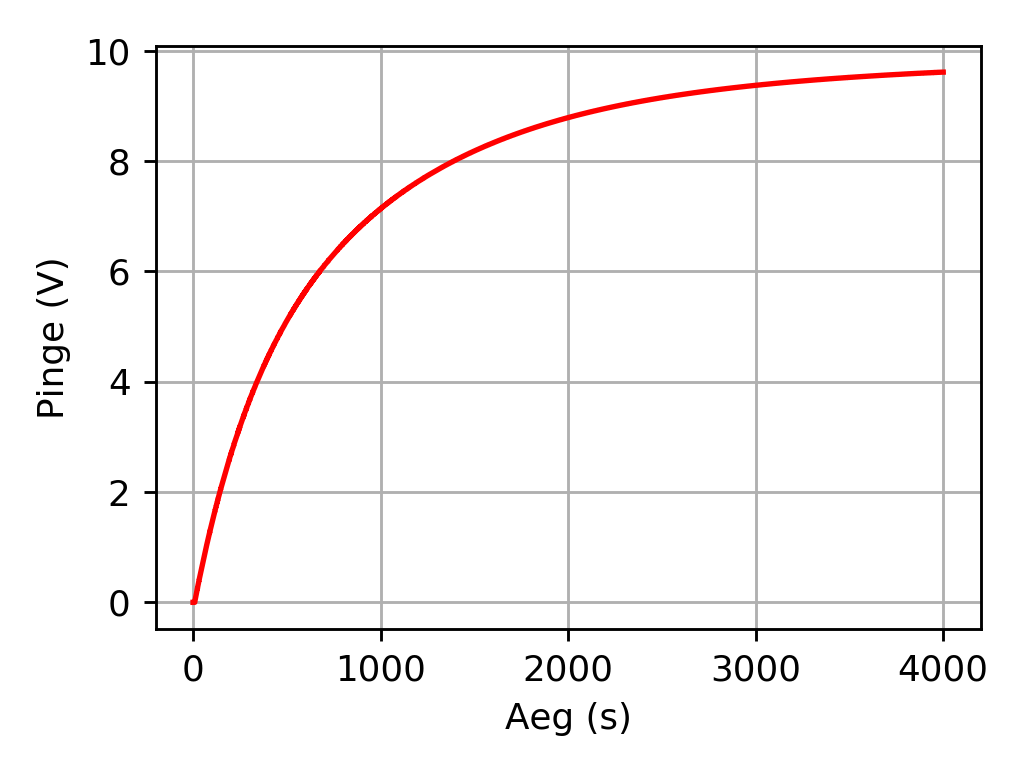

In [41]:
fail = 'kondensaatori_laadumine'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

plot(aeg, pinge, 'r-')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()

In [82]:
aeg, pinge = np.loadtxt('kondensaatori_laadumine.txt').T

Kui saadud graafikut suumida, on näha, et alguses mõned hetked (enne lüliti L<sub>2</sub> sulgemist) on pinge null. Eemaldame need andmepunktid ja nihutame vastavalt ajatelge. Ühtlasi arvutame voolutugevuse.

In [83]:
toitepinge = 9.994
takistus = 506.7

laadub = aeg > 9.1

aeg = aeg[laadub]
aeg -= aeg[0]
pinge = pinge[laadub]
vool = (toitepinge - pinge) / takistus

Kui kondensaatorit mahtuvusega $C$ laaditakse konstantse pingega $U_0$ üle takisti $R$, siis kondensaatori pinge kasvab ajas järgmiselt: $$U(t)=U_0\left[1-\exp\left(-\frac{t}{CR}\right)\right].$$ Teiste sõnadega, voolutugevus kahaneb eksponentsiaalselt: $$I(t)=\frac{U_0-U(t)}{R}=I_0\exp\left(-\frac{t}{CR}\right).$$ See mudel põhineb eeldusel, et kondensaatori laeng on võrdeline pingega, $Q=CU$ (st mahtuvus $C$ on konstantne), ja kondensaatoril endal mingit täiendavat relaksatsiooniaega ei ole. Selgub, et superkondensaatori (ja ka mõnede elektrolüütkondensaatorite) korral need eeldused ei pea paika, sest ioonide difundeerumine ja laengu relakseerumine poorsetel elektroodidel on võrdlemisi keerulised ja aeglased protsessid.

Seega voolutugevuse käik logaritmilisel graafikul ei tule päris sirge:

<IPython.core.display.Javascript object>


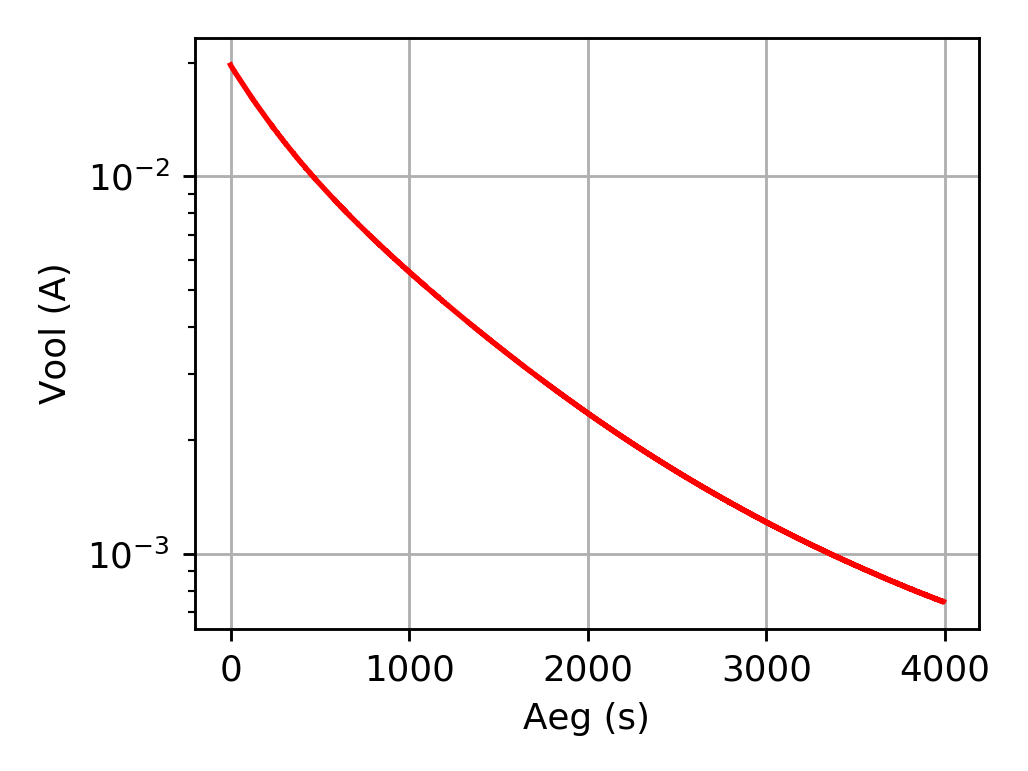

In [84]:
plot(aeg, vool, 'r-')
yscale('log')
xlabel('Aeg (s)')
ylabel('Vool (A)')
grid()
tight_layout()
savefig(fail + '_vool.png', bbox_inches='tight')
show()

Kui saadud sõltuvuse algusosa lähendada sirgele, saame vastavas lähenduses siiski mahtuvust hinnata:

Algmahtuvus 1.186 F


<IPython.core.display.Javascript object>


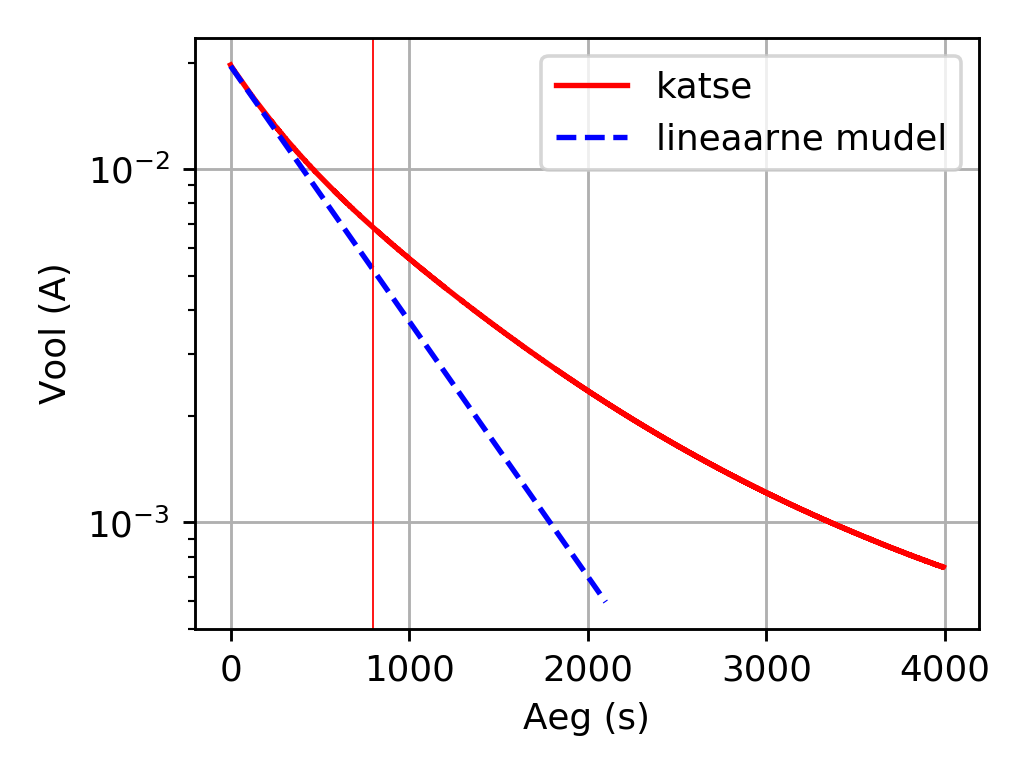

In [85]:
n = len(aeg) // 5  # esimene viiendik andmepunktidest

# lähendame parabooliga, aga kasutame vaid selle algtõusu
_, tõus, algordinaat = np.polyfit(aeg[:n], np.log(vool[:n]), 2)
mahtuvus = -1 / (takistus * tõus)

print('Mahtuvus %.3f F' % mahtuvus)

t = np.linspace(0, 2100, 100)
plot(aeg, vool, 'r-', label='katse')
plot(t, np.exp(tõus * t + algordinaat), 'b--', label='lineaarne mudel')
yscale('log')
xlabel('Aeg (s)')
ylabel('Vool (A)')
axvline(aeg[n], color='red', lw=0.5)
grid()
legend()
tight_layout()
savefig(fail + '_mudel.png', bbox_inches='tight')
show()

### Tühjenemine

<img src="kondensaatori_tühjenemine_skeem.png" style="height: 9em; float: right; margin-left: 1em;"/>Seame toiteallikale mõistliku suurusega pinge ja voolu, ja laadime sellega kondensaatori. Seejärel asetame kondensaatori näidatud elektriskeemi, käivitame mõõtmise ning mõne hetke pärast sulgeme lüliti.

In [72]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        if lugem is not None:
            aeg.append(time.time() - t0)
            pinge.append(lugem)
            print('aeg = %6.1f s;  pinge = %6.3f V' % (aeg[-1], pinge[-1]))
            if aeg[-1] > 6000:
                break
        time.sleep(0.1)

aeg = np.array(aeg)
pinge = np.array(pinge)

aeg =    0.3 s;  pinge =  9.993 V
aeg =    0.9 s;  pinge =  9.993 V
aeg =    1.3 s;  pinge =  9.993 V
aeg =    1.8 s;  pinge =  9.993 V
aeg =    2.4 s;  pinge =  9.993 V
aeg =    2.9 s;  pinge =  9.993 V
aeg =    3.3 s;  pinge =  9.993 V
aeg =    3.9 s;  pinge =  9.993 V
aeg =    4.4 s;  pinge =  9.993 V
aeg =    4.8 s;  pinge =  9.993 V
aeg =    5.4 s;  pinge =  9.993 V
aeg =    5.9 s;  pinge =  9.993 V
aeg =    6.3 s;  pinge =  9.993 V
aeg =    6.9 s;  pinge =  9.993 V
aeg =    7.3 s;  pinge =  9.993 V
aeg =    7.8 s;  pinge =  9.993 V
aeg =    8.4 s;  pinge =  9.993 V
aeg =    8.8 s;  pinge =  9.993 V
aeg =    9.3 s;  pinge =  9.993 V
aeg =    9.9 s;  pinge =  9.992 V
aeg =   10.3 s;  pinge =  9.992 V
aeg =   10.8 s;  pinge =  9.993 V
aeg =   11.4 s;  pinge =  9.993 V
aeg =   11.9 s;  pinge =  9.993 V
aeg =   12.3 s;  pinge =  9.993 V
aeg =   12.9 s;  pinge =  9.992 V
aeg =   13.4 s;  pinge =  9.992 V
aeg =   13.8 s;  pinge =  9.992 V
aeg =   14.3 s;  pinge =  9.988 V
aeg =   14.9 s

aeg =  120.8 s;  pinge =  8.577 V
aeg =  121.3 s;  pinge =  8.577 V
aeg =  121.8 s;  pinge =  8.565 V
aeg =  122.4 s;  pinge =  8.559 V
aeg =  122.9 s;  pinge =  8.553 V
aeg =  123.4 s;  pinge =  8.547 V
aeg =  123.9 s;  pinge =  8.541 V
aeg =  124.4 s;  pinge =  8.535 V
aeg =  124.9 s;  pinge =  8.529 V
aeg =  125.3 s;  pinge =  8.529 V
aeg =  125.8 s;  pinge =  8.517 V
aeg =  126.3 s;  pinge =  8.517 V
aeg =  126.8 s;  pinge =  8.506 V
aeg =  127.3 s;  pinge =  8.506 V
aeg =  127.8 s;  pinge =  8.494 V
aeg =  128.3 s;  pinge =  8.488 V
aeg =  128.8 s;  pinge =  8.482 V
aeg =  129.3 s;  pinge =  8.476 V
aeg =  129.8 s;  pinge =  8.470 V
aeg =  130.3 s;  pinge =  8.464 V
aeg =  130.8 s;  pinge =  8.458 V
aeg =  131.3 s;  pinge =  8.458 V
aeg =  131.8 s;  pinge =  8.446 V
aeg =  132.3 s;  pinge =  8.446 V
aeg =  132.9 s;  pinge =  8.435 V
aeg =  133.4 s;  pinge =  8.429 V
aeg =  133.9 s;  pinge =  8.423 V
aeg =  134.4 s;  pinge =  8.417 V
aeg =  134.9 s;  pinge =  8.411 V
aeg =  135.4 s

aeg =  241.3 s;  pinge =  7.258 V
aeg =  241.8 s;  pinge =  7.253 V
aeg =  242.3 s;  pinge =  7.248 V
aeg =  242.8 s;  pinge =  7.243 V
aeg =  243.3 s;  pinge =  7.238 V
aeg =  243.8 s;  pinge =  7.233 V
aeg =  244.3 s;  pinge =  7.228 V
aeg =  244.9 s;  pinge =  7.223 V
aeg =  245.4 s;  pinge =  7.218 V
aeg =  245.9 s;  pinge =  7.213 V
aeg =  246.4 s;  pinge =  7.208 V
aeg =  246.8 s;  pinge =  7.204 V
aeg =  247.3 s;  pinge =  7.198 V
aeg =  247.8 s;  pinge =  7.193 V
aeg =  248.3 s;  pinge =  7.189 V
aeg =  248.8 s;  pinge =  7.183 V
aeg =  249.3 s;  pinge =  7.179 V
aeg =  249.8 s;  pinge =  7.174 V
aeg =  250.3 s;  pinge =  7.169 V
aeg =  250.8 s;  pinge =  7.164 V
aeg =  251.3 s;  pinge =  7.159 V
aeg =  251.8 s;  pinge =  7.154 V
aeg =  252.3 s;  pinge =  7.149 V
aeg =  252.8 s;  pinge =  7.144 V
aeg =  253.3 s;  pinge =  7.139 V
aeg =  253.8 s;  pinge =  7.134 V
aeg =  254.3 s;  pinge =  7.129 V
aeg =  254.8 s;  pinge =  7.124 V
aeg =  255.3 s;  pinge =  7.124 V
aeg =  255.9 s

aeg =  361.8 s;  pinge =  6.152 V
aeg =  362.3 s;  pinge =  6.147 V
aeg =  362.8 s;  pinge =  6.143 V
aeg =  363.3 s;  pinge =  6.139 V
aeg =  363.8 s;  pinge =  6.134 V
aeg =  364.3 s;  pinge =  6.134 V
aeg =  364.8 s;  pinge =  6.126 V
aeg =  365.3 s;  pinge =  6.126 V
aeg =  365.8 s;  pinge =  6.118 V
aeg =  366.3 s;  pinge =  6.118 V
aeg =  366.8 s;  pinge =  6.110 V
aeg =  367.3 s;  pinge =  6.106 V
aeg =  367.8 s;  pinge =  6.101 V
aeg =  368.3 s;  pinge =  6.097 V
aeg =  368.8 s;  pinge =  6.093 V
aeg =  369.3 s;  pinge =  6.089 V
aeg =  369.8 s;  pinge =  6.085 V
aeg =  370.3 s;  pinge =  6.085 V
aeg =  370.8 s;  pinge =  6.076 V
aeg =  371.3 s;  pinge =  6.076 V
aeg =  371.8 s;  pinge =  6.068 V
aeg =  372.3 s;  pinge =  6.068 V
aeg =  372.8 s;  pinge =  6.060 V
aeg =  373.3 s;  pinge =  6.056 V
aeg =  373.8 s;  pinge =  6.051 V
aeg =  374.3 s;  pinge =  6.047 V
aeg =  374.8 s;  pinge =  6.043 V
aeg =  375.3 s;  pinge =  6.039 V
aeg =  375.8 s;  pinge =  6.035 V
aeg =  376.4 s

aeg =  482.4 s;  pinge =  5.219 V
aeg =  482.8 s;  pinge =  5.212 V
aeg =  483.3 s;  pinge =  5.208 V
aeg =  483.9 s;  pinge =  5.205 V
aeg =  484.3 s;  pinge =  5.205 V
aeg =  484.8 s;  pinge =  5.198 V
aeg =  485.3 s;  pinge =  5.198 V
aeg =  485.8 s;  pinge =  5.190 V
aeg =  486.3 s;  pinge =  5.187 V
aeg =  486.8 s;  pinge =  5.183 V
aeg =  487.3 s;  pinge =  5.183 V
aeg =  487.8 s;  pinge =  5.176 V
aeg =  488.3 s;  pinge =  5.176 V
aeg =  488.8 s;  pinge =  5.169 V
aeg =  489.3 s;  pinge =  5.169 V
aeg =  489.8 s;  pinge =  5.162 V
aeg =  490.3 s;  pinge =  5.158 V
aeg =  490.8 s;  pinge =  5.155 V
aeg =  491.3 s;  pinge =  5.155 V
aeg =  491.8 s;  pinge =  5.148 V
aeg =  492.3 s;  pinge =  5.148 V
aeg =  492.8 s;  pinge =  5.141 V
aeg =  493.3 s;  pinge =  5.137 V
aeg =  493.8 s;  pinge =  5.133 V
aeg =  494.3 s;  pinge =  5.133 V
aeg =  494.8 s;  pinge =  5.127 V
aeg =  495.3 s;  pinge =  5.127 V
aeg =  495.8 s;  pinge =  5.120 V
aeg =  496.3 s;  pinge =  5.116 V
aeg =  496.8 s

aeg =  602.8 s;  pinge =  4.421 V
aeg =  603.3 s;  pinge =  4.417 V
aeg =  603.7 s;  pinge =  4.414 V
aeg =  604.3 s;  pinge =  4.414 V
aeg =  604.8 s;  pinge =  4.409 V
aeg =  605.3 s;  pinge =  4.409 V
aeg =  605.8 s;  pinge =  4.402 V
aeg =  606.3 s;  pinge =  4.399 V
aeg =  606.7 s;  pinge =  4.397 V
aeg =  607.3 s;  pinge =  4.397 V
aeg =  607.8 s;  pinge =  4.390 V
aeg =  608.3 s;  pinge =  4.387 V
aeg =  608.8 s;  pinge =  4.384 V
aeg =  609.3 s;  pinge =  4.384 V
aeg =  609.7 s;  pinge =  4.378 V
aeg =  610.3 s;  pinge =  4.378 V
aeg =  610.8 s;  pinge =  4.372 V
aeg =  611.2 s;  pinge =  4.369 V
aeg =  611.8 s;  pinge =  4.367 V
aeg =  612.2 s;  pinge =  4.367 V
aeg =  612.8 s;  pinge =  4.360 V
aeg =  613.3 s;  pinge =  4.357 V
aeg =  613.7 s;  pinge =  4.354 V
aeg =  614.3 s;  pinge =  4.354 V
aeg =  614.8 s;  pinge =  4.349 V
aeg =  615.2 s;  pinge =  4.349 V
aeg =  615.8 s;  pinge =  4.343 V
aeg =  616.3 s;  pinge =  4.343 V
aeg =  616.7 s;  pinge =  4.337 V
aeg =  617.3 s

aeg =  723.2 s;  pinge =  3.748 V
aeg =  723.8 s;  pinge =  3.745 V
aeg =  724.2 s;  pinge =  3.745 V
aeg =  724.8 s;  pinge =  3.740 V
aeg =  725.3 s;  pinge =  3.738 V
aeg =  725.7 s;  pinge =  3.735 V
aeg =  726.3 s;  pinge =  3.735 V
aeg =  726.8 s;  pinge =  3.730 V
aeg =  727.3 s;  pinge =  3.728 V
aeg =  727.8 s;  pinge =  3.725 V
aeg =  728.2 s;  pinge =  3.725 V
aeg =  728.8 s;  pinge =  3.720 V
aeg =  729.2 s;  pinge =  3.717 V
aeg =  729.8 s;  pinge =  3.715 V
aeg =  730.3 s;  pinge =  3.715 V
aeg =  730.8 s;  pinge =  3.710 V
aeg =  731.3 s;  pinge =  3.707 V
aeg =  731.7 s;  pinge =  3.705 V
aeg =  732.3 s;  pinge =  3.705 V
aeg =  732.7 s;  pinge =  3.700 V
aeg =  733.3 s;  pinge =  3.697 V
aeg =  733.8 s;  pinge =  3.694 V
aeg =  734.2 s;  pinge =  3.694 V
aeg =  734.8 s;  pinge =  3.690 V
aeg =  735.2 s;  pinge =  3.687 V
aeg =  735.8 s;  pinge =  3.684 V
aeg =  736.2 s;  pinge =  3.684 V
aeg =  736.8 s;  pinge =  3.679 V
aeg =  737.3 s;  pinge =  3.679 V
aeg =  737.7 s

aeg =  843.8 s;  pinge =  3.180 V
aeg =  844.2 s;  pinge =  3.178 V
aeg =  844.8 s;  pinge =  3.176 V
aeg =  845.2 s;  pinge =  3.176 V
aeg =  845.8 s;  pinge =  3.171 V
aeg =  846.2 s;  pinge =  3.169 V
aeg =  846.7 s;  pinge =  3.167 V
aeg =  847.3 s;  pinge =  3.167 V
aeg =  847.7 s;  pinge =  3.163 V
aeg =  848.3 s;  pinge =  3.163 V
aeg =  848.7 s;  pinge =  3.159 V
aeg =  849.2 s;  pinge =  3.159 V
aeg =  849.8 s;  pinge =  3.154 V
aeg =  850.2 s;  pinge =  3.154 V
aeg =  850.7 s;  pinge =  3.150 V
aeg =  851.3 s;  pinge =  3.148 V
aeg =  851.7 s;  pinge =  3.146 V
aeg =  852.3 s;  pinge =  3.146 V
aeg =  852.7 s;  pinge =  3.141 V
aeg =  853.3 s;  pinge =  3.139 V
aeg =  853.8 s;  pinge =  3.137 V
aeg =  854.2 s;  pinge =  3.137 V
aeg =  854.8 s;  pinge =  3.133 V
aeg =  855.2 s;  pinge =  3.133 V
aeg =  855.8 s;  pinge =  3.129 V
aeg =  856.3 s;  pinge =  3.129 V
aeg =  856.7 s;  pinge =  3.125 V
aeg =  857.3 s;  pinge =  3.125 V
aeg =  857.7 s;  pinge =  3.120 V
aeg =  858.3 s

aeg =  964.3 s;  pinge =  2.704 V
aeg =  964.7 s;  pinge =  2.700 V
aeg =  965.3 s;  pinge =  2.699 V
aeg =  965.8 s;  pinge =  2.697 V
aeg =  966.2 s;  pinge =  2.697 V
aeg =  966.8 s;  pinge =  2.693 V
aeg =  967.2 s;  pinge =  2.693 V
aeg =  967.8 s;  pinge =  2.689 V
aeg =  968.2 s;  pinge =  2.689 V
aeg =  968.7 s;  pinge =  2.686 V
aeg =  969.3 s;  pinge =  2.686 V
aeg =  969.7 s;  pinge =  2.682 V
aeg =  970.3 s;  pinge =  2.682 V
aeg =  970.7 s;  pinge =  2.679 V
aeg =  971.3 s;  pinge =  2.679 V
aeg =  971.8 s;  pinge =  2.675 V
aeg =  972.2 s;  pinge =  2.675 V
aeg =  972.8 s;  pinge =  2.671 V
aeg =  973.2 s;  pinge =  2.671 V
aeg =  973.7 s;  pinge =  2.668 V
aeg =  974.3 s;  pinge =  2.668 V
aeg =  974.7 s;  pinge =  2.664 V
aeg =  975.2 s;  pinge =  2.664 V
aeg =  975.8 s;  pinge =  2.661 V
aeg =  976.2 s;  pinge =  2.659 V
aeg =  976.8 s;  pinge =  2.657 V
aeg =  977.2 s;  pinge =  2.657 V
aeg =  977.7 s;  pinge =  2.653 V
aeg =  978.3 s;  pinge =  2.653 V
aeg =  978.8 s

aeg = 1084.8 s;  pinge =  2.300 V
aeg = 1085.2 s;  pinge =  2.299 V
aeg = 1085.7 s;  pinge =  2.297 V
aeg = 1086.3 s;  pinge =  2.297 V
aeg = 1086.7 s;  pinge =  2.294 V
aeg = 1087.2 s;  pinge =  2.294 V
aeg = 1087.8 s;  pinge =  2.291 V
aeg = 1088.2 s;  pinge =  2.291 V
aeg = 1088.7 s;  pinge =  2.288 V
aeg = 1089.3 s;  pinge =  2.288 V
aeg = 1089.7 s;  pinge =  2.285 V
aeg = 1090.3 s;  pinge =  2.285 V
aeg = 1090.7 s;  pinge =  2.282 V
aeg = 1091.2 s;  pinge =  2.282 V
aeg = 1091.8 s;  pinge =  2.279 V
aeg = 1092.2 s;  pinge =  2.279 V
aeg = 1092.7 s;  pinge =  2.276 V
aeg = 1093.2 s;  pinge =  2.276 V
aeg = 1093.8 s;  pinge =  2.273 V
aeg = 1094.2 s;  pinge =  2.273 V
aeg = 1094.7 s;  pinge =  2.270 V
aeg = 1095.3 s;  pinge =  2.269 V
aeg = 1095.7 s;  pinge =  2.267 V
aeg = 1096.2 s;  pinge =  2.267 V
aeg = 1096.8 s;  pinge =  2.264 V
aeg = 1097.2 s;  pinge =  2.264 V
aeg = 1097.7 s;  pinge =  2.261 V
aeg = 1098.3 s;  pinge =  2.261 V
aeg = 1098.7 s;  pinge =  2.258 V
aeg = 1099.3 s

aeg = 1205.2 s;  pinge =  1.965 V
aeg = 1205.7 s;  pinge =  1.964 V
aeg = 1206.2 s;  pinge =  1.962 V
aeg = 1206.7 s;  pinge =  1.961 V
aeg = 1207.3 s;  pinge =  1.960 V
aeg = 1207.7 s;  pinge =  1.958 V
aeg = 1208.2 s;  pinge =  1.957 V
aeg = 1208.7 s;  pinge =  1.956 V
aeg = 1209.2 s;  pinge =  1.955 V
aeg = 1209.8 s;  pinge =  1.953 V
aeg = 1210.2 s;  pinge =  1.952 V
aeg = 1210.7 s;  pinge =  1.951 V
aeg = 1211.3 s;  pinge =  1.950 V
aeg = 1211.7 s;  pinge =  1.948 V
aeg = 1212.2 s;  pinge =  1.947 V
aeg = 1212.7 s;  pinge =  1.946 V
aeg = 1213.2 s;  pinge =  1.944 V
aeg = 1213.7 s;  pinge =  1.943 V
aeg = 1214.2 s;  pinge =  1.942 V
aeg = 1214.7 s;  pinge =  1.941 V
aeg = 1215.2 s;  pinge =  1.939 V
aeg = 1215.8 s;  pinge =  1.938 V
aeg = 1216.2 s;  pinge =  1.937 V
aeg = 1216.7 s;  pinge =  1.935 V
aeg = 1217.3 s;  pinge =  1.934 V
aeg = 1217.7 s;  pinge =  1.933 V
aeg = 1218.2 s;  pinge =  1.932 V
aeg = 1218.8 s;  pinge =  1.931 V
aeg = 1219.2 s;  pinge =  1.929 V
aeg = 1219.7 s

aeg = 1325.7 s;  pinge =  1.682 V
aeg = 1326.2 s;  pinge =  1.681 V
aeg = 1326.8 s;  pinge =  1.680 V
aeg = 1327.2 s;  pinge =  1.679 V
aeg = 1327.7 s;  pinge =  1.677 V
aeg = 1328.3 s;  pinge =  1.676 V
aeg = 1328.7 s;  pinge =  1.675 V
aeg = 1329.2 s;  pinge =  1.674 V
aeg = 1329.8 s;  pinge =  1.673 V
aeg = 1330.2 s;  pinge =  1.672 V
aeg = 1330.7 s;  pinge =  1.671 V
aeg = 1331.3 s;  pinge =  1.670 V
aeg = 1331.7 s;  pinge =  1.669 V
aeg = 1332.2 s;  pinge =  1.668 V
aeg = 1332.7 s;  pinge =  1.667 V
aeg = 1333.2 s;  pinge =  1.666 V
aeg = 1333.7 s;  pinge =  1.665 V
aeg = 1334.2 s;  pinge =  1.664 V
aeg = 1334.7 s;  pinge =  1.663 V
aeg = 1335.2 s;  pinge =  1.661 V
aeg = 1335.7 s;  pinge =  1.661 V
aeg = 1336.2 s;  pinge =  1.659 V
aeg = 1336.7 s;  pinge =  1.658 V
aeg = 1337.2 s;  pinge =  1.657 V
aeg = 1337.7 s;  pinge =  1.656 V
aeg = 1338.2 s;  pinge =  1.655 V
aeg = 1338.7 s;  pinge =  1.654 V
aeg = 1339.2 s;  pinge =  1.653 V
aeg = 1339.7 s;  pinge =  1.652 V
aeg = 1340.2 s

aeg = 1446.2 s;  pinge =  1.445 V
aeg = 1446.7 s;  pinge =  1.443 V
aeg = 1447.2 s;  pinge =  1.442 V
aeg = 1447.7 s;  pinge =  1.441 V
aeg = 1448.2 s;  pinge =  1.440 V
aeg = 1448.7 s;  pinge =  1.440 V
aeg = 1449.2 s;  pinge =  1.439 V
aeg = 1449.7 s;  pinge =  1.438 V
aeg = 1450.2 s;  pinge =  1.437 V
aeg = 1450.7 s;  pinge =  1.436 V
aeg = 1451.2 s;  pinge =  1.436 V
aeg = 1451.7 s;  pinge =  1.434 V
aeg = 1452.2 s;  pinge =  1.433 V
aeg = 1452.7 s;  pinge =  1.432 V
aeg = 1453.2 s;  pinge =  1.431 V
aeg = 1453.7 s;  pinge =  1.431 V
aeg = 1454.2 s;  pinge =  1.430 V
aeg = 1454.7 s;  pinge =  1.429 V
aeg = 1455.2 s;  pinge =  1.428 V
aeg = 1455.7 s;  pinge =  1.427 V
aeg = 1456.2 s;  pinge =  1.426 V
aeg = 1456.7 s;  pinge =  1.425 V
aeg = 1457.2 s;  pinge =  1.424 V
aeg = 1457.7 s;  pinge =  1.423 V
aeg = 1458.2 s;  pinge =  1.423 V
aeg = 1458.7 s;  pinge =  1.422 V
aeg = 1459.2 s;  pinge =  1.421 V
aeg = 1459.7 s;  pinge =  1.420 V
aeg = 1460.2 s;  pinge =  1.420 V
aeg = 1460.7 s

aeg = 1566.7 s;  pinge =  1.244 V
aeg = 1567.2 s;  pinge =  1.243 V
aeg = 1567.7 s;  pinge =  1.243 V
aeg = 1568.2 s;  pinge =  1.242 V
aeg = 1568.7 s;  pinge =  1.241 V
aeg = 1569.2 s;  pinge =  1.240 V
aeg = 1569.7 s;  pinge =  1.240 V
aeg = 1570.1 s;  pinge =  1.239 V
aeg = 1570.7 s;  pinge =  1.238 V
aeg = 1571.2 s;  pinge =  1.237 V
aeg = 1571.7 s;  pinge =  1.237 V
aeg = 1572.2 s;  pinge =  1.236 V
aeg = 1572.7 s;  pinge =  1.235 V
aeg = 1573.2 s;  pinge =  1.234 V
aeg = 1573.7 s;  pinge =  1.234 V
aeg = 1574.2 s;  pinge =  1.233 V
aeg = 1574.7 s;  pinge =  1.232 V
aeg = 1575.2 s;  pinge =  1.231 V
aeg = 1575.7 s;  pinge =  1.231 V
aeg = 1576.2 s;  pinge =  1.230 V
aeg = 1576.7 s;  pinge =  1.229 V
aeg = 1577.2 s;  pinge =  1.228 V
aeg = 1577.6 s;  pinge =  1.228 V
aeg = 1578.2 s;  pinge =  1.227 V
aeg = 1578.7 s;  pinge =  1.226 V
aeg = 1579.2 s;  pinge =  1.225 V
aeg = 1579.7 s;  pinge =  1.225 V
aeg = 1580.2 s;  pinge =  1.224 V
aeg = 1580.7 s;  pinge =  1.223 V
aeg = 1581.2 s

aeg = 1687.2 s;  pinge =  1.076 V
aeg = 1687.6 s;  pinge =  1.075 V
aeg = 1688.2 s;  pinge =  1.075 V
aeg = 1688.7 s;  pinge =  1.074 V
aeg = 1689.1 s;  pinge =  1.074 V
aeg = 1689.7 s;  pinge =  1.073 V
aeg = 1690.2 s;  pinge =  1.073 V
aeg = 1690.7 s;  pinge =  1.071 V
aeg = 1691.2 s;  pinge =  1.071 V
aeg = 1691.6 s;  pinge =  1.070 V
aeg = 1692.2 s;  pinge =  1.069 V
aeg = 1692.7 s;  pinge =  1.069 V
aeg = 1693.2 s;  pinge =  1.069 V
aeg = 1693.7 s;  pinge =  1.068 V
aeg = 1694.1 s;  pinge =  1.067 V
aeg = 1694.7 s;  pinge =  1.066 V
aeg = 1695.2 s;  pinge =  1.066 V
aeg = 1695.7 s;  pinge =  1.065 V
aeg = 1696.2 s;  pinge =  1.065 V
aeg = 1696.6 s;  pinge =  1.064 V
aeg = 1697.2 s;  pinge =  1.064 V
aeg = 1697.7 s;  pinge =  1.062 V
aeg = 1698.1 s;  pinge =  1.062 V
aeg = 1698.7 s;  pinge =  1.061 V
aeg = 1699.1 s;  pinge =  1.060 V
aeg = 1699.7 s;  pinge =  1.060 V
aeg = 1700.2 s;  pinge =  1.060 V
aeg = 1700.6 s;  pinge =  1.059 V
aeg = 1701.2 s;  pinge =  1.059 V
aeg = 1701.7 s

aeg = 1807.7 s;  pinge =  0.934 V
aeg = 1808.1 s;  pinge =  0.934 V
aeg = 1808.7 s;  pinge =  0.933 V
aeg = 1809.1 s;  pinge =  0.933 V
aeg = 1809.7 s;  pinge =  0.932 V
aeg = 1810.2 s;  pinge =  0.932 V
aeg = 1810.6 s;  pinge =  0.930 V
aeg = 1811.2 s;  pinge =  0.930 V
aeg = 1811.7 s;  pinge =  0.929 V
aeg = 1812.2 s;  pinge =  0.929 V
aeg = 1812.7 s;  pinge =  0.928 V
aeg = 1813.1 s;  pinge =  0.928 V
aeg = 1813.7 s;  pinge =  0.927 V
aeg = 1814.2 s;  pinge =  0.927 V
aeg = 1814.7 s;  pinge =  0.926 V
aeg = 1815.2 s;  pinge =  0.926 V
aeg = 1815.6 s;  pinge =  0.925 V
aeg = 1816.2 s;  pinge =  0.925 V
aeg = 1816.7 s;  pinge =  0.924 V
aeg = 1817.2 s;  pinge =  0.924 V
aeg = 1817.7 s;  pinge =  0.923 V
aeg = 1818.2 s;  pinge =  0.923 V
aeg = 1818.6 s;  pinge =  0.922 V
aeg = 1819.2 s;  pinge =  0.922 V
aeg = 1819.7 s;  pinge =  0.921 V
aeg = 1820.1 s;  pinge =  0.921 V
aeg = 1820.7 s;  pinge =  0.920 V
aeg = 1821.2 s;  pinge =  0.920 V
aeg = 1821.7 s;  pinge =  0.919 V
aeg = 1822.2 s

aeg = 1928.2 s;  pinge =  0.814 V
aeg = 1928.7 s;  pinge =  0.813 V
aeg = 1929.1 s;  pinge =  0.813 V
aeg = 1929.7 s;  pinge =  0.812 V
aeg = 1930.1 s;  pinge =  0.812 V
aeg = 1930.7 s;  pinge =  0.811 V
aeg = 1931.2 s;  pinge =  0.811 V
aeg = 1931.6 s;  pinge =  0.810 V
aeg = 1932.2 s;  pinge =  0.810 V
aeg = 1932.7 s;  pinge =  0.810 V
aeg = 1933.1 s;  pinge =  0.810 V
aeg = 1933.7 s;  pinge =  0.809 V
aeg = 1934.1 s;  pinge =  0.809 V
aeg = 1934.6 s;  pinge =  0.808 V
aeg = 1935.2 s;  pinge =  0.808 V
aeg = 1935.7 s;  pinge =  0.807 V
aeg = 1936.1 s;  pinge =  0.807 V
aeg = 1936.7 s;  pinge =  0.806 V
aeg = 1937.1 s;  pinge =  0.805 V
aeg = 1937.6 s;  pinge =  0.805 V
aeg = 1938.2 s;  pinge =  0.805 V
aeg = 1938.6 s;  pinge =  0.804 V
aeg = 1939.2 s;  pinge =  0.804 V
aeg = 1939.7 s;  pinge =  0.803 V
aeg = 1940.1 s;  pinge =  0.803 V
aeg = 1940.7 s;  pinge =  0.802 V
aeg = 1941.2 s;  pinge =  0.802 V
aeg = 1941.6 s;  pinge =  0.801 V
aeg = 1942.2 s;  pinge =  0.801 V
aeg = 1942.6 s

aeg = 2048.6 s;  pinge =  0.712 V
aeg = 2049.1 s;  pinge =  0.712 V
aeg = 2049.7 s;  pinge =  0.711 V
aeg = 2050.1 s;  pinge =  0.711 V
aeg = 2050.6 s;  pinge =  0.711 V
aeg = 2051.2 s;  pinge =  0.711 V
aeg = 2051.6 s;  pinge =  0.710 V
aeg = 2052.1 s;  pinge =  0.710 V
aeg = 2052.7 s;  pinge =  0.709 V
aeg = 2053.1 s;  pinge =  0.709 V
aeg = 2053.6 s;  pinge =  0.708 V
aeg = 2054.2 s;  pinge =  0.708 V
aeg = 2054.7 s;  pinge =  0.707 V
aeg = 2055.1 s;  pinge =  0.707 V
aeg = 2055.7 s;  pinge =  0.707 V
aeg = 2056.2 s;  pinge =  0.707 V
aeg = 2056.6 s;  pinge =  0.706 V
aeg = 2057.2 s;  pinge =  0.706 V
aeg = 2057.7 s;  pinge =  0.705 V
aeg = 2058.1 s;  pinge =  0.705 V
aeg = 2058.7 s;  pinge =  0.704 V
aeg = 2059.1 s;  pinge =  0.704 V
aeg = 2059.6 s;  pinge =  0.704 V
aeg = 2060.2 s;  pinge =  0.704 V
aeg = 2060.6 s;  pinge =  0.703 V
aeg = 2061.2 s;  pinge =  0.703 V
aeg = 2061.7 s;  pinge =  0.702 V
aeg = 2062.1 s;  pinge =  0.702 V
aeg = 2062.7 s;  pinge =  0.701 V
aeg = 2063.1 s

aeg = 2169.1 s;  pinge =  0.626 V
aeg = 2169.6 s;  pinge =  0.626 V
aeg = 2170.2 s;  pinge =  0.626 V
aeg = 2170.6 s;  pinge =  0.625 V
aeg = 2171.1 s;  pinge =  0.625 V
aeg = 2171.7 s;  pinge =  0.624 V
aeg = 2172.1 s;  pinge =  0.624 V
aeg = 2172.6 s;  pinge =  0.624 V
aeg = 2173.2 s;  pinge =  0.624 V
aeg = 2173.6 s;  pinge =  0.623 V
aeg = 2174.1 s;  pinge =  0.623 V
aeg = 2174.7 s;  pinge =  0.622 V
aeg = 2175.1 s;  pinge =  0.622 V
aeg = 2175.6 s;  pinge =  0.622 V
aeg = 2176.2 s;  pinge =  0.622 V
aeg = 2176.6 s;  pinge =  0.621 V
aeg = 2177.1 s;  pinge =  0.621 V
aeg = 2177.7 s;  pinge =  0.620 V
aeg = 2178.1 s;  pinge =  0.620 V
aeg = 2178.6 s;  pinge =  0.620 V
aeg = 2179.1 s;  pinge =  0.620 V
aeg = 2179.6 s;  pinge =  0.619 V
aeg = 2180.1 s;  pinge =  0.619 V
aeg = 2180.7 s;  pinge =  0.618 V
aeg = 2181.1 s;  pinge =  0.618 V
aeg = 2181.6 s;  pinge =  0.618 V
aeg = 2182.1 s;  pinge =  0.618 V
aeg = 2182.6 s;  pinge =  0.617 V
aeg = 2183.2 s;  pinge =  0.617 V
aeg = 2183.6 s

aeg = 2289.7 s;  pinge =  0.552 V
aeg = 2290.1 s;  pinge =  0.552 V
aeg = 2290.6 s;  pinge =  0.552 V
aeg = 2291.1 s;  pinge =  0.552 V
aeg = 2291.6 s;  pinge =  0.551 V
aeg = 2292.1 s;  pinge =  0.551 V
aeg = 2292.6 s;  pinge =  0.551 V
aeg = 2293.1 s;  pinge =  0.551 V
aeg = 2293.6 s;  pinge =  0.550 V
aeg = 2294.1 s;  pinge =  0.550 V
aeg = 2294.6 s;  pinge =  0.550 V
aeg = 2295.1 s;  pinge =  0.550 V
aeg = 2295.6 s;  pinge =  0.549 V
aeg = 2296.1 s;  pinge =  0.549 V
aeg = 2296.6 s;  pinge =  0.549 V
aeg = 2297.1 s;  pinge =  0.549 V
aeg = 2297.6 s;  pinge =  0.548 V
aeg = 2298.1 s;  pinge =  0.548 V
aeg = 2298.6 s;  pinge =  0.547 V
aeg = 2299.2 s;  pinge =  0.547 V
aeg = 2299.7 s;  pinge =  0.547 V
aeg = 2300.2 s;  pinge =  0.547 V
aeg = 2300.6 s;  pinge =  0.546 V
aeg = 2301.1 s;  pinge =  0.546 V
aeg = 2301.6 s;  pinge =  0.546 V
aeg = 2302.1 s;  pinge =  0.546 V
aeg = 2302.6 s;  pinge =  0.545 V
aeg = 2303.1 s;  pinge =  0.545 V
aeg = 2303.6 s;  pinge =  0.545 V
aeg = 2304.1 s

aeg = 2410.1 s;  pinge =  0.490 V
aeg = 2410.6 s;  pinge =  0.490 V
aeg = 2411.1 s;  pinge =  0.490 V
aeg = 2411.6 s;  pinge =  0.489 V
aeg = 2412.1 s;  pinge =  0.489 V
aeg = 2412.6 s;  pinge =  0.489 V
aeg = 2413.1 s;  pinge =  0.489 V
aeg = 2413.6 s;  pinge =  0.488 V
aeg = 2414.1 s;  pinge =  0.488 V
aeg = 2414.6 s;  pinge =  0.488 V
aeg = 2415.1 s;  pinge =  0.488 V
aeg = 2415.6 s;  pinge =  0.487 V
aeg = 2416.1 s;  pinge =  0.487 V
aeg = 2416.6 s;  pinge =  0.487 V
aeg = 2417.2 s;  pinge =  0.487 V
aeg = 2417.6 s;  pinge =  0.487 V
aeg = 2418.1 s;  pinge =  0.487 V
aeg = 2418.6 s;  pinge =  0.486 V
aeg = 2419.1 s;  pinge =  0.486 V
aeg = 2419.6 s;  pinge =  0.486 V
aeg = 2420.1 s;  pinge =  0.486 V
aeg = 2420.6 s;  pinge =  0.485 V
aeg = 2421.1 s;  pinge =  0.485 V
aeg = 2421.6 s;  pinge =  0.485 V
aeg = 2422.1 s;  pinge =  0.485 V
aeg = 2422.6 s;  pinge =  0.484 V
aeg = 2423.1 s;  pinge =  0.484 V
aeg = 2423.6 s;  pinge =  0.484 V
aeg = 2424.1 s;  pinge =  0.484 V
aeg = 2424.6 s

aeg = 2530.6 s;  pinge =  0.437 V
aeg = 2531.1 s;  pinge =  0.437 V
aeg = 2531.6 s;  pinge =  0.436 V
aeg = 2532.1 s;  pinge =  0.436 V
aeg = 2532.6 s;  pinge =  0.436 V
aeg = 2533.1 s;  pinge =  0.436 V
aeg = 2533.6 s;  pinge =  0.435 V
aeg = 2534.0 s;  pinge =  0.435 V
aeg = 2534.5 s;  pinge =  0.435 V
aeg = 2535.1 s;  pinge =  0.435 V
aeg = 2535.6 s;  pinge =  0.435 V
aeg = 2536.1 s;  pinge =  0.435 V
aeg = 2536.6 s;  pinge =  0.434 V
aeg = 2537.1 s;  pinge =  0.434 V
aeg = 2537.6 s;  pinge =  0.434 V
aeg = 2538.1 s;  pinge =  0.434 V
aeg = 2538.6 s;  pinge =  0.433 V
aeg = 2539.1 s;  pinge =  0.433 V
aeg = 2539.6 s;  pinge =  0.433 V
aeg = 2540.1 s;  pinge =  0.433 V
aeg = 2540.6 s;  pinge =  0.433 V
aeg = 2541.1 s;  pinge =  0.433 V
aeg = 2541.6 s;  pinge =  0.432 V
aeg = 2542.1 s;  pinge =  0.432 V
aeg = 2542.6 s;  pinge =  0.432 V
aeg = 2543.1 s;  pinge =  0.432 V
aeg = 2543.6 s;  pinge =  0.431 V
aeg = 2544.1 s;  pinge =  0.431 V
aeg = 2544.5 s;  pinge =  0.431 V
aeg = 2545.0 s

aeg = 2651.0 s;  pinge =  0.391 V
aeg = 2651.6 s;  pinge =  0.391 V
aeg = 2652.1 s;  pinge =  0.391 V
aeg = 2652.6 s;  pinge =  0.390 V
aeg = 2653.1 s;  pinge =  0.390 V
aeg = 2653.6 s;  pinge =  0.390 V
aeg = 2654.0 s;  pinge =  0.390 V
aeg = 2654.6 s;  pinge =  0.390 V
aeg = 2655.0 s;  pinge =  0.390 V
aeg = 2655.6 s;  pinge =  0.389 V
aeg = 2656.1 s;  pinge =  0.389 V
aeg = 2656.5 s;  pinge =  0.389 V
aeg = 2657.1 s;  pinge =  0.389 V
aeg = 2657.6 s;  pinge =  0.389 V
aeg = 2658.0 s;  pinge =  0.389 V
aeg = 2658.6 s;  pinge =  0.388 V
aeg = 2659.1 s;  pinge =  0.388 V
aeg = 2659.6 s;  pinge =  0.388 V
aeg = 2660.0 s;  pinge =  0.388 V
aeg = 2660.6 s;  pinge =  0.388 V
aeg = 2661.1 s;  pinge =  0.388 V
aeg = 2661.6 s;  pinge =  0.387 V
aeg = 2662.1 s;  pinge =  0.387 V
aeg = 2662.5 s;  pinge =  0.387 V
aeg = 2663.1 s;  pinge =  0.387 V
aeg = 2663.6 s;  pinge =  0.387 V
aeg = 2664.1 s;  pinge =  0.387 V
aeg = 2664.6 s;  pinge =  0.386 V
aeg = 2665.0 s;  pinge =  0.386 V
aeg = 2665.6 s

aeg = 2771.5 s;  pinge =  0.352 V
aeg = 2772.0 s;  pinge =  0.352 V
aeg = 2772.5 s;  pinge =  0.351 V
aeg = 2773.0 s;  pinge =  0.351 V
aeg = 2773.5 s;  pinge =  0.351 V
aeg = 2774.0 s;  pinge =  0.351 V
aeg = 2774.5 s;  pinge =  0.351 V
aeg = 2775.1 s;  pinge =  0.351 V
aeg = 2775.6 s;  pinge =  0.350 V
aeg = 2776.0 s;  pinge =  0.350 V
aeg = 2776.6 s;  pinge =  0.350 V
aeg = 2777.1 s;  pinge =  0.350 V
aeg = 2777.5 s;  pinge =  0.350 V
aeg = 2778.1 s;  pinge =  0.350 V
aeg = 2778.6 s;  pinge =  0.350 V
aeg = 2779.0 s;  pinge =  0.350 V
aeg = 2779.6 s;  pinge =  0.349 V
aeg = 2780.0 s;  pinge =  0.349 V
aeg = 2780.6 s;  pinge =  0.349 V
aeg = 2781.1 s;  pinge =  0.349 V
aeg = 2781.6 s;  pinge =  0.349 V
aeg = 2782.0 s;  pinge =  0.349 V
aeg = 2782.6 s;  pinge =  0.348 V
aeg = 2783.0 s;  pinge =  0.348 V
aeg = 2783.6 s;  pinge =  0.348 V
aeg = 2784.1 s;  pinge =  0.348 V
aeg = 2784.5 s;  pinge =  0.348 V
aeg = 2785.0 s;  pinge =  0.348 V
aeg = 2785.6 s;  pinge =  0.347 V
aeg = 2786.1 s

aeg = 2892.0 s;  pinge =  0.318 V
aeg = 2892.6 s;  pinge =  0.318 V
aeg = 2893.0 s;  pinge =  0.318 V
aeg = 2893.6 s;  pinge =  0.317 V
aeg = 2894.1 s;  pinge =  0.317 V
aeg = 2894.5 s;  pinge =  0.317 V
aeg = 2895.1 s;  pinge =  0.317 V
aeg = 2895.5 s;  pinge =  0.317 V
aeg = 2896.1 s;  pinge =  0.317 V
aeg = 2896.6 s;  pinge =  0.317 V
aeg = 2897.0 s;  pinge =  0.317 V
aeg = 2897.6 s;  pinge =  0.316 V
aeg = 2898.0 s;  pinge =  0.316 V
aeg = 2898.5 s;  pinge =  0.316 V
aeg = 2899.1 s;  pinge =  0.316 V
aeg = 2899.5 s;  pinge =  0.316 V
aeg = 2900.0 s;  pinge =  0.316 V
aeg = 2900.6 s;  pinge =  0.316 V
aeg = 2901.0 s;  pinge =  0.316 V
aeg = 2901.5 s;  pinge =  0.315 V
aeg = 2902.1 s;  pinge =  0.315 V
aeg = 2902.5 s;  pinge =  0.315 V
aeg = 2903.1 s;  pinge =  0.315 V
aeg = 2903.6 s;  pinge =  0.315 V
aeg = 2904.1 s;  pinge =  0.315 V
aeg = 2904.5 s;  pinge =  0.315 V
aeg = 2905.1 s;  pinge =  0.315 V
aeg = 2905.5 s;  pinge =  0.314 V
aeg = 2906.0 s;  pinge =  0.314 V
aeg = 2906.6 s

aeg = 3012.5 s;  pinge =  0.289 V
aeg = 3013.0 s;  pinge =  0.289 V
aeg = 3013.5 s;  pinge =  0.288 V
aeg = 3014.0 s;  pinge =  0.288 V
aeg = 3014.6 s;  pinge =  0.288 V
aeg = 3015.0 s;  pinge =  0.288 V
aeg = 3015.5 s;  pinge =  0.288 V
aeg = 3016.0 s;  pinge =  0.288 V
aeg = 3016.5 s;  pinge =  0.288 V
aeg = 3017.0 s;  pinge =  0.288 V
aeg = 3017.6 s;  pinge =  0.287 V
aeg = 3018.1 s;  pinge =  0.287 V
aeg = 3018.6 s;  pinge =  0.287 V
aeg = 3019.1 s;  pinge =  0.287 V
aeg = 3019.6 s;  pinge =  0.287 V
aeg = 3020.1 s;  pinge =  0.287 V
aeg = 3020.5 s;  pinge =  0.287 V
aeg = 3021.1 s;  pinge =  0.287 V
aeg = 3021.6 s;  pinge =  0.287 V
aeg = 3022.1 s;  pinge =  0.287 V
aeg = 3022.6 s;  pinge =  0.286 V
aeg = 3023.1 s;  pinge =  0.286 V
aeg = 3023.6 s;  pinge =  0.286 V
aeg = 3024.0 s;  pinge =  0.286 V
aeg = 3024.5 s;  pinge =  0.286 V
aeg = 3025.0 s;  pinge =  0.286 V
aeg = 3025.5 s;  pinge =  0.286 V
aeg = 3026.0 s;  pinge =  0.286 V
aeg = 3026.5 s;  pinge =  0.285 V
aeg = 3027.1 s

aeg = 3133.0 s;  pinge =  0.263 V
aeg = 3133.5 s;  pinge =  0.263 V
aeg = 3134.0 s;  pinge =  0.263 V
aeg = 3134.5 s;  pinge =  0.263 V
aeg = 3135.1 s;  pinge =  0.263 V
aeg = 3135.6 s;  pinge =  0.263 V
aeg = 3136.1 s;  pinge =  0.263 V
aeg = 3136.6 s;  pinge =  0.263 V
aeg = 3137.1 s;  pinge =  0.263 V
aeg = 3137.6 s;  pinge =  0.262 V
aeg = 3138.0 s;  pinge =  0.262 V
aeg = 3138.5 s;  pinge =  0.262 V
aeg = 3139.0 s;  pinge =  0.262 V
aeg = 3139.5 s;  pinge =  0.262 V
aeg = 3140.0 s;  pinge =  0.262 V
aeg = 3140.5 s;  pinge =  0.262 V
aeg = 3141.0 s;  pinge =  0.262 V
aeg = 3141.5 s;  pinge =  0.262 V
aeg = 3142.0 s;  pinge =  0.262 V
aeg = 3142.5 s;  pinge =  0.261 V
aeg = 3143.0 s;  pinge =  0.261 V
aeg = 3143.5 s;  pinge =  0.261 V
aeg = 3144.0 s;  pinge =  0.261 V
aeg = 3144.5 s;  pinge =  0.261 V
aeg = 3145.0 s;  pinge =  0.261 V
aeg = 3145.6 s;  pinge =  0.261 V
aeg = 3146.1 s;  pinge =  0.261 V
aeg = 3146.6 s;  pinge =  0.261 V
aeg = 3147.1 s;  pinge =  0.261 V
aeg = 3147.6 s

aeg = 3253.5 s;  pinge =  0.241 V
aeg = 3254.0 s;  pinge =  0.241 V
aeg = 3254.5 s;  pinge =  0.241 V
aeg = 3255.0 s;  pinge =  0.241 V
aeg = 3255.5 s;  pinge =  0.241 V
aeg = 3256.0 s;  pinge =  0.241 V
aeg = 3256.5 s;  pinge =  0.241 V
aeg = 3257.0 s;  pinge =  0.241 V
aeg = 3257.5 s;  pinge =  0.240 V
aeg = 3258.0 s;  pinge =  0.240 V
aeg = 3258.5 s;  pinge =  0.240 V
aeg = 3259.1 s;  pinge =  0.240 V
aeg = 3259.6 s;  pinge =  0.240 V
aeg = 3260.1 s;  pinge =  0.240 V
aeg = 3260.5 s;  pinge =  0.240 V
aeg = 3261.0 s;  pinge =  0.240 V
aeg = 3261.5 s;  pinge =  0.240 V
aeg = 3262.0 s;  pinge =  0.240 V
aeg = 3262.5 s;  pinge =  0.240 V
aeg = 3263.0 s;  pinge =  0.240 V
aeg = 3263.5 s;  pinge =  0.239 V
aeg = 3264.0 s;  pinge =  0.239 V
aeg = 3264.5 s;  pinge =  0.239 V
aeg = 3265.0 s;  pinge =  0.239 V
aeg = 3265.5 s;  pinge =  0.239 V
aeg = 3266.0 s;  pinge =  0.239 V
aeg = 3266.5 s;  pinge =  0.239 V
aeg = 3267.0 s;  pinge =  0.239 V
aeg = 3267.5 s;  pinge =  0.239 V
aeg = 3268.0 s

aeg = 3374.0 s;  pinge =  0.222 V
aeg = 3374.5 s;  pinge =  0.222 V
aeg = 3375.0 s;  pinge =  0.222 V
aeg = 3375.5 s;  pinge =  0.222 V
aeg = 3376.0 s;  pinge =  0.222 V
aeg = 3376.5 s;  pinge =  0.222 V
aeg = 3377.0 s;  pinge =  0.222 V
aeg = 3377.5 s;  pinge =  0.221 V
aeg = 3378.0 s;  pinge =  0.221 V
aeg = 3378.5 s;  pinge =  0.221 V
aeg = 3379.0 s;  pinge =  0.221 V
aeg = 3379.5 s;  pinge =  0.221 V
aeg = 3380.0 s;  pinge =  0.221 V
aeg = 3380.5 s;  pinge =  0.221 V
aeg = 3381.0 s;  pinge =  0.221 V
aeg = 3381.5 s;  pinge =  0.221 V
aeg = 3382.0 s;  pinge =  0.221 V
aeg = 3382.5 s;  pinge =  0.221 V
aeg = 3383.0 s;  pinge =  0.221 V
aeg = 3383.5 s;  pinge =  0.221 V
aeg = 3384.0 s;  pinge =  0.221 V
aeg = 3384.5 s;  pinge =  0.220 V
aeg = 3385.0 s;  pinge =  0.220 V
aeg = 3385.5 s;  pinge =  0.220 V
aeg = 3386.0 s;  pinge =  0.220 V
aeg = 3386.5 s;  pinge =  0.220 V
aeg = 3387.0 s;  pinge =  0.220 V
aeg = 3387.5 s;  pinge =  0.220 V
aeg = 3388.0 s;  pinge =  0.220 V
aeg = 3388.5 s

aeg = 3494.5 s;  pinge =  0.205 V
aeg = 3495.0 s;  pinge =  0.205 V
aeg = 3495.5 s;  pinge =  0.205 V
aeg = 3496.0 s;  pinge =  0.205 V
aeg = 3496.5 s;  pinge =  0.205 V
aeg = 3497.0 s;  pinge =  0.205 V
aeg = 3497.5 s;  pinge =  0.205 V
aeg = 3498.0 s;  pinge =  0.205 V
aeg = 3498.5 s;  pinge =  0.205 V
aeg = 3499.0 s;  pinge =  0.205 V
aeg = 3499.4 s;  pinge =  0.204 V
aeg = 3499.9 s;  pinge =  0.204 V
aeg = 3500.5 s;  pinge =  0.204 V
aeg = 3501.0 s;  pinge =  0.204 V
aeg = 3501.5 s;  pinge =  0.204 V
aeg = 3502.0 s;  pinge =  0.204 V
aeg = 3502.5 s;  pinge =  0.204 V
aeg = 3503.0 s;  pinge =  0.204 V
aeg = 3503.5 s;  pinge =  0.204 V
aeg = 3504.0 s;  pinge =  0.204 V
aeg = 3504.5 s;  pinge =  0.204 V
aeg = 3505.0 s;  pinge =  0.204 V
aeg = 3505.5 s;  pinge =  0.204 V
aeg = 3506.0 s;  pinge =  0.204 V
aeg = 3506.5 s;  pinge =  0.204 V
aeg = 3507.0 s;  pinge =  0.204 V
aeg = 3507.5 s;  pinge =  0.203 V
aeg = 3508.0 s;  pinge =  0.203 V
aeg = 3508.5 s;  pinge =  0.203 V
aeg = 3509.0 s

aeg = 3615.0 s;  pinge =  0.190 V
aeg = 3615.4 s;  pinge =  0.190 V
aeg = 3616.0 s;  pinge =  0.190 V
aeg = 3616.5 s;  pinge =  0.190 V
aeg = 3617.0 s;  pinge =  0.190 V
aeg = 3617.5 s;  pinge =  0.190 V
aeg = 3618.0 s;  pinge =  0.190 V
aeg = 3618.5 s;  pinge =  0.190 V
aeg = 3619.0 s;  pinge =  0.190 V
aeg = 3619.5 s;  pinge =  0.190 V
aeg = 3620.0 s;  pinge =  0.190 V
aeg = 3620.5 s;  pinge =  0.190 V
aeg = 3620.9 s;  pinge =  0.190 V
aeg = 3621.5 s;  pinge =  0.190 V
aeg = 3622.0 s;  pinge =  0.190 V
aeg = 3622.5 s;  pinge =  0.189 V
aeg = 3623.0 s;  pinge =  0.189 V
aeg = 3623.5 s;  pinge =  0.189 V
aeg = 3623.9 s;  pinge =  0.189 V
aeg = 3624.5 s;  pinge =  0.189 V
aeg = 3625.0 s;  pinge =  0.189 V
aeg = 3625.4 s;  pinge =  0.189 V
aeg = 3626.0 s;  pinge =  0.189 V
aeg = 3626.5 s;  pinge =  0.189 V
aeg = 3626.9 s;  pinge =  0.189 V
aeg = 3627.5 s;  pinge =  0.189 V
aeg = 3628.0 s;  pinge =  0.189 V
aeg = 3628.5 s;  pinge =  0.189 V
aeg = 3628.9 s;  pinge =  0.189 V
aeg = 3629.5 s

aeg = 3735.4 s;  pinge =  0.177 V
aeg = 3736.0 s;  pinge =  0.177 V
aeg = 3736.4 s;  pinge =  0.177 V
aeg = 3736.9 s;  pinge =  0.177 V
aeg = 3737.5 s;  pinge =  0.177 V
aeg = 3737.9 s;  pinge =  0.177 V
aeg = 3738.5 s;  pinge =  0.177 V
aeg = 3739.0 s;  pinge =  0.177 V
aeg = 3739.5 s;  pinge =  0.177 V
aeg = 3740.0 s;  pinge =  0.177 V
aeg = 3740.5 s;  pinge =  0.177 V
aeg = 3740.9 s;  pinge =  0.177 V
aeg = 3741.5 s;  pinge =  0.177 V
aeg = 3741.9 s;  pinge =  0.177 V
aeg = 3742.5 s;  pinge =  0.177 V
aeg = 3743.0 s;  pinge =  0.177 V
aeg = 3743.4 s;  pinge =  0.176 V
aeg = 3743.9 s;  pinge =  0.176 V
aeg = 3744.5 s;  pinge =  0.176 V
aeg = 3744.9 s;  pinge =  0.176 V
aeg = 3745.4 s;  pinge =  0.176 V
aeg = 3746.0 s;  pinge =  0.176 V
aeg = 3746.5 s;  pinge =  0.176 V
aeg = 3747.0 s;  pinge =  0.176 V
aeg = 3747.5 s;  pinge =  0.176 V
aeg = 3747.9 s;  pinge =  0.176 V
aeg = 3748.5 s;  pinge =  0.176 V
aeg = 3749.0 s;  pinge =  0.176 V
aeg = 3749.4 s;  pinge =  0.176 V
aeg = 3750.0 s

aeg = 3856.0 s;  pinge =  0.166 V
aeg = 3856.4 s;  pinge =  0.166 V
aeg = 3857.0 s;  pinge =  0.166 V
aeg = 3857.5 s;  pinge =  0.166 V
aeg = 3857.9 s;  pinge =  0.166 V
aeg = 3858.5 s;  pinge =  0.165 V
aeg = 3859.0 s;  pinge =  0.165 V
aeg = 3859.4 s;  pinge =  0.165 V
aeg = 3860.0 s;  pinge =  0.165 V
aeg = 3860.5 s;  pinge =  0.165 V
aeg = 3860.9 s;  pinge =  0.165 V
aeg = 3861.5 s;  pinge =  0.165 V
aeg = 3861.9 s;  pinge =  0.165 V
aeg = 3862.5 s;  pinge =  0.165 V
aeg = 3863.0 s;  pinge =  0.165 V
aeg = 3863.4 s;  pinge =  0.165 V
aeg = 3864.0 s;  pinge =  0.165 V
aeg = 3864.5 s;  pinge =  0.165 V
aeg = 3864.9 s;  pinge =  0.165 V
aeg = 3865.5 s;  pinge =  0.165 V
aeg = 3865.9 s;  pinge =  0.165 V
aeg = 3866.5 s;  pinge =  0.165 V
aeg = 3867.0 s;  pinge =  0.165 V
aeg = 3867.4 s;  pinge =  0.165 V
aeg = 3868.0 s;  pinge =  0.165 V
aeg = 3868.4 s;  pinge =  0.165 V
aeg = 3868.9 s;  pinge =  0.165 V
aeg = 3869.5 s;  pinge =  0.164 V
aeg = 3869.9 s;  pinge =  0.164 V
aeg = 3870.5 s

aeg = 3976.4 s;  pinge =  0.155 V
aeg = 3977.0 s;  pinge =  0.155 V
aeg = 3977.5 s;  pinge =  0.155 V
aeg = 3977.9 s;  pinge =  0.155 V
aeg = 3978.4 s;  pinge =  0.155 V
aeg = 3979.0 s;  pinge =  0.155 V
aeg = 3979.4 s;  pinge =  0.155 V
aeg = 3979.9 s;  pinge =  0.155 V
aeg = 3980.5 s;  pinge =  0.155 V
aeg = 3980.9 s;  pinge =  0.155 V
aeg = 3981.5 s;  pinge =  0.155 V
aeg = 3981.9 s;  pinge =  0.155 V
aeg = 3982.5 s;  pinge =  0.155 V
aeg = 3983.0 s;  pinge =  0.155 V
aeg = 3983.4 s;  pinge =  0.155 V
aeg = 3983.9 s;  pinge =  0.155 V
aeg = 3984.5 s;  pinge =  0.155 V
aeg = 3984.9 s;  pinge =  0.155 V
aeg = 3985.4 s;  pinge =  0.155 V
aeg = 3986.0 s;  pinge =  0.155 V
aeg = 3986.4 s;  pinge =  0.155 V
aeg = 3986.9 s;  pinge =  0.155 V
aeg = 3987.5 s;  pinge =  0.154 V
aeg = 3987.9 s;  pinge =  0.154 V
aeg = 3988.4 s;  pinge =  0.154 V
aeg = 3989.0 s;  pinge =  0.154 V
aeg = 3989.4 s;  pinge =  0.154 V
aeg = 3990.0 s;  pinge =  0.154 V
aeg = 3990.5 s;  pinge =  0.154 V
aeg = 3990.9 s

aeg = 4096.9 s;  pinge =  0.146 V
aeg = 4097.4 s;  pinge =  0.146 V
aeg = 4097.9 s;  pinge =  0.146 V
aeg = 4098.4 s;  pinge =  0.146 V
aeg = 4098.9 s;  pinge =  0.146 V
aeg = 4099.5 s;  pinge =  0.146 V
aeg = 4100.0 s;  pinge =  0.146 V
aeg = 4100.5 s;  pinge =  0.146 V
aeg = 4101.0 s;  pinge =  0.146 V
aeg = 4101.5 s;  pinge =  0.146 V
aeg = 4102.0 s;  pinge =  0.146 V
aeg = 4102.4 s;  pinge =  0.146 V
aeg = 4102.9 s;  pinge =  0.146 V
aeg = 4103.4 s;  pinge =  0.146 V
aeg = 4103.9 s;  pinge =  0.146 V
aeg = 4104.4 s;  pinge =  0.146 V
aeg = 4104.9 s;  pinge =  0.146 V
aeg = 4105.4 s;  pinge =  0.146 V
aeg = 4105.9 s;  pinge =  0.146 V
aeg = 4106.4 s;  pinge =  0.146 V
aeg = 4106.9 s;  pinge =  0.146 V
aeg = 4107.4 s;  pinge =  0.146 V
aeg = 4107.9 s;  pinge =  0.146 V
aeg = 4108.4 s;  pinge =  0.145 V
aeg = 4108.9 s;  pinge =  0.145 V
aeg = 4109.4 s;  pinge =  0.145 V
aeg = 4109.9 s;  pinge =  0.145 V
aeg = 4110.5 s;  pinge =  0.145 V
aeg = 4111.0 s;  pinge =  0.145 V
aeg = 4111.5 s

aeg = 4217.4 s;  pinge =  0.138 V
aeg = 4217.9 s;  pinge =  0.138 V
aeg = 4218.4 s;  pinge =  0.138 V
aeg = 4218.9 s;  pinge =  0.138 V
aeg = 4219.4 s;  pinge =  0.138 V
aeg = 4220.0 s;  pinge =  0.138 V
aeg = 4220.5 s;  pinge =  0.138 V
aeg = 4221.0 s;  pinge =  0.138 V
aeg = 4221.4 s;  pinge =  0.138 V
aeg = 4221.9 s;  pinge =  0.138 V
aeg = 4222.4 s;  pinge =  0.138 V
aeg = 4222.9 s;  pinge =  0.138 V
aeg = 4223.4 s;  pinge =  0.138 V
aeg = 4223.9 s;  pinge =  0.138 V
aeg = 4224.4 s;  pinge =  0.138 V
aeg = 4224.9 s;  pinge =  0.138 V
aeg = 4225.4 s;  pinge =  0.138 V
aeg = 4225.9 s;  pinge =  0.138 V
aeg = 4226.4 s;  pinge =  0.138 V
aeg = 4226.9 s;  pinge =  0.138 V
aeg = 4227.4 s;  pinge =  0.137 V
aeg = 4227.9 s;  pinge =  0.137 V
aeg = 4228.4 s;  pinge =  0.137 V
aeg = 4228.9 s;  pinge =  0.137 V
aeg = 4229.4 s;  pinge =  0.137 V
aeg = 4229.9 s;  pinge =  0.137 V
aeg = 4230.4 s;  pinge =  0.137 V
aeg = 4230.9 s;  pinge =  0.137 V
aeg = 4231.4 s;  pinge =  0.137 V
aeg = 4231.9 s

aeg = 4337.9 s;  pinge =  0.131 V
aeg = 4338.4 s;  pinge =  0.131 V
aeg = 4338.9 s;  pinge =  0.131 V
aeg = 4339.4 s;  pinge =  0.131 V
aeg = 4339.9 s;  pinge =  0.131 V
aeg = 4340.4 s;  pinge =  0.131 V
aeg = 4340.9 s;  pinge =  0.131 V
aeg = 4341.4 s;  pinge =  0.131 V
aeg = 4341.9 s;  pinge =  0.131 V
aeg = 4342.4 s;  pinge =  0.130 V
aeg = 4342.9 s;  pinge =  0.130 V
aeg = 4343.4 s;  pinge =  0.130 V
aeg = 4343.9 s;  pinge =  0.130 V
aeg = 4344.4 s;  pinge =  0.130 V
aeg = 4344.9 s;  pinge =  0.130 V
aeg = 4345.4 s;  pinge =  0.130 V
aeg = 4345.9 s;  pinge =  0.130 V
aeg = 4346.4 s;  pinge =  0.130 V
aeg = 4346.9 s;  pinge =  0.130 V
aeg = 4347.4 s;  pinge =  0.130 V
aeg = 4347.9 s;  pinge =  0.130 V
aeg = 4348.4 s;  pinge =  0.130 V
aeg = 4348.9 s;  pinge =  0.130 V
aeg = 4349.4 s;  pinge =  0.130 V
aeg = 4349.9 s;  pinge =  0.130 V
aeg = 4350.4 s;  pinge =  0.130 V
aeg = 4350.9 s;  pinge =  0.130 V
aeg = 4351.4 s;  pinge =  0.130 V
aeg = 4351.9 s;  pinge =  0.130 V
aeg = 4352.4 s

aeg = 4458.4 s;  pinge =  0.124 V
aeg = 4458.9 s;  pinge =  0.124 V
aeg = 4459.4 s;  pinge =  0.124 V
aeg = 4459.9 s;  pinge =  0.124 V
aeg = 4460.4 s;  pinge =  0.124 V
aeg = 4460.9 s;  pinge =  0.124 V
aeg = 4461.4 s;  pinge =  0.124 V
aeg = 4461.9 s;  pinge =  0.124 V
aeg = 4462.4 s;  pinge =  0.124 V
aeg = 4462.9 s;  pinge =  0.124 V
aeg = 4463.4 s;  pinge =  0.124 V
aeg = 4463.9 s;  pinge =  0.124 V
aeg = 4464.4 s;  pinge =  0.124 V
aeg = 4464.9 s;  pinge =  0.124 V
aeg = 4465.4 s;  pinge =  0.124 V
aeg = 4465.8 s;  pinge =  0.124 V
aeg = 4466.3 s;  pinge =  0.124 V
aeg = 4466.8 s;  pinge =  0.124 V
aeg = 4467.4 s;  pinge =  0.124 V
aeg = 4467.9 s;  pinge =  0.124 V
aeg = 4468.4 s;  pinge =  0.124 V
aeg = 4468.9 s;  pinge =  0.124 V
aeg = 4469.4 s;  pinge =  0.123 V
aeg = 4469.9 s;  pinge =  0.123 V
aeg = 4470.4 s;  pinge =  0.123 V
aeg = 4470.9 s;  pinge =  0.123 V
aeg = 4471.4 s;  pinge =  0.123 V
aeg = 4471.9 s;  pinge =  0.123 V
aeg = 4472.4 s;  pinge =  0.123 V
aeg = 4472.9 s

aeg = 4578.8 s;  pinge =  0.118 V
aeg = 4579.4 s;  pinge =  0.118 V
aeg = 4579.9 s;  pinge =  0.118 V
aeg = 4580.4 s;  pinge =  0.118 V
aeg = 4580.9 s;  pinge =  0.118 V
aeg = 4581.4 s;  pinge =  0.118 V
aeg = 4581.9 s;  pinge =  0.118 V
aeg = 4582.4 s;  pinge =  0.118 V
aeg = 4582.9 s;  pinge =  0.118 V
aeg = 4583.4 s;  pinge =  0.118 V
aeg = 4583.9 s;  pinge =  0.118 V
aeg = 4584.4 s;  pinge =  0.118 V
aeg = 4584.9 s;  pinge =  0.118 V
aeg = 4585.4 s;  pinge =  0.118 V
aeg = 4585.9 s;  pinge =  0.118 V
aeg = 4586.4 s;  pinge =  0.118 V
aeg = 4586.9 s;  pinge =  0.118 V
aeg = 4587.4 s;  pinge =  0.118 V
aeg = 4587.8 s;  pinge =  0.118 V
aeg = 4588.3 s;  pinge =  0.118 V
aeg = 4588.8 s;  pinge =  0.118 V
aeg = 4589.3 s;  pinge =  0.118 V
aeg = 4589.8 s;  pinge =  0.118 V
aeg = 4590.4 s;  pinge =  0.117 V
aeg = 4590.9 s;  pinge =  0.117 V
aeg = 4591.4 s;  pinge =  0.117 V
aeg = 4591.9 s;  pinge =  0.117 V
aeg = 4592.4 s;  pinge =  0.117 V
aeg = 4592.9 s;  pinge =  0.117 V
aeg = 4593.4 s

aeg = 4699.4 s;  pinge =  0.113 V
aeg = 4699.9 s;  pinge =  0.113 V
aeg = 4700.3 s;  pinge =  0.112 V
aeg = 4700.8 s;  pinge =  0.112 V
aeg = 4701.3 s;  pinge =  0.112 V
aeg = 4701.8 s;  pinge =  0.112 V
aeg = 4702.3 s;  pinge =  0.112 V
aeg = 4702.8 s;  pinge =  0.112 V
aeg = 4703.3 s;  pinge =  0.112 V
aeg = 4703.8 s;  pinge =  0.112 V
aeg = 4704.4 s;  pinge =  0.112 V
aeg = 4704.9 s;  pinge =  0.112 V
aeg = 4705.4 s;  pinge =  0.112 V
aeg = 4705.9 s;  pinge =  0.112 V
aeg = 4706.4 s;  pinge =  0.112 V
aeg = 4706.9 s;  pinge =  0.112 V
aeg = 4707.4 s;  pinge =  0.112 V
aeg = 4707.9 s;  pinge =  0.112 V
aeg = 4708.4 s;  pinge =  0.112 V
aeg = 4708.9 s;  pinge =  0.112 V
aeg = 4709.4 s;  pinge =  0.112 V
aeg = 4709.9 s;  pinge =  0.112 V
aeg = 4710.4 s;  pinge =  0.112 V
aeg = 4710.9 s;  pinge =  0.112 V
aeg = 4711.4 s;  pinge =  0.112 V
aeg = 4711.9 s;  pinge =  0.112 V
aeg = 4712.3 s;  pinge =  0.112 V
aeg = 4712.8 s;  pinge =  0.112 V
aeg = 4713.3 s;  pinge =  0.112 V
aeg = 4713.8 s

aeg = 4819.8 s;  pinge =  0.107 V
aeg = 4820.3 s;  pinge =  0.107 V
aeg = 4820.8 s;  pinge =  0.107 V
aeg = 4821.3 s;  pinge =  0.107 V
aeg = 4821.9 s;  pinge =  0.107 V
aeg = 4822.4 s;  pinge =  0.107 V
aeg = 4822.9 s;  pinge =  0.107 V
aeg = 4823.4 s;  pinge =  0.107 V
aeg = 4823.9 s;  pinge =  0.107 V
aeg = 4824.4 s;  pinge =  0.107 V
aeg = 4824.9 s;  pinge =  0.107 V
aeg = 4825.4 s;  pinge =  0.107 V
aeg = 4825.9 s;  pinge =  0.107 V
aeg = 4826.4 s;  pinge =  0.107 V
aeg = 4826.9 s;  pinge =  0.107 V
aeg = 4827.3 s;  pinge =  0.107 V
aeg = 4827.8 s;  pinge =  0.107 V
aeg = 4828.3 s;  pinge =  0.107 V
aeg = 4828.8 s;  pinge =  0.107 V
aeg = 4829.4 s;  pinge =  0.107 V
aeg = 4829.8 s;  pinge =  0.107 V
aeg = 4830.3 s;  pinge =  0.107 V
aeg = 4830.8 s;  pinge =  0.107 V
aeg = 4831.4 s;  pinge =  0.107 V
aeg = 4831.9 s;  pinge =  0.107 V
aeg = 4832.4 s;  pinge =  0.107 V
aeg = 4832.9 s;  pinge =  0.107 V
aeg = 4833.4 s;  pinge =  0.107 V
aeg = 4833.9 s;  pinge =  0.107 V
aeg = 4834.4 s

aeg = 4940.3 s;  pinge =  0.103 V
aeg = 4940.8 s;  pinge =  0.103 V
aeg = 4941.4 s;  pinge =  0.103 V
aeg = 4941.9 s;  pinge =  0.103 V
aeg = 4942.4 s;  pinge =  0.103 V
aeg = 4942.9 s;  pinge =  0.103 V
aeg = 4943.4 s;  pinge =  0.103 V
aeg = 4943.9 s;  pinge =  0.103 V
aeg = 4944.4 s;  pinge =  0.103 V
aeg = 4944.9 s;  pinge =  0.103 V
aeg = 4945.3 s;  pinge =  0.103 V
aeg = 4945.8 s;  pinge =  0.103 V
aeg = 4946.3 s;  pinge =  0.103 V
aeg = 4946.8 s;  pinge =  0.103 V
aeg = 4947.3 s;  pinge =  0.103 V
aeg = 4947.8 s;  pinge =  0.103 V
aeg = 4948.3 s;  pinge =  0.103 V
aeg = 4948.8 s;  pinge =  0.103 V
aeg = 4949.3 s;  pinge =  0.103 V
aeg = 4949.8 s;  pinge =  0.103 V
aeg = 4950.3 s;  pinge =  0.102 V
aeg = 4950.8 s;  pinge =  0.102 V
aeg = 4951.3 s;  pinge =  0.102 V
aeg = 4951.9 s;  pinge =  0.102 V
aeg = 4952.4 s;  pinge =  0.102 V
aeg = 4952.9 s;  pinge =  0.102 V
aeg = 4953.4 s;  pinge =  0.102 V
aeg = 4953.9 s;  pinge =  0.102 V
aeg = 4954.4 s;  pinge =  0.102 V
aeg = 4954.8 s

aeg = 5060.8 s;  pinge =  0.099 V
aeg = 5061.3 s;  pinge =  0.099 V
aeg = 5061.9 s;  pinge =  0.099 V
aeg = 5062.3 s;  pinge =  0.099 V
aeg = 5062.9 s;  pinge =  0.099 V
aeg = 5063.3 s;  pinge =  0.099 V
aeg = 5063.8 s;  pinge =  0.099 V
aeg = 5064.4 s;  pinge =  0.098 V
aeg = 5064.8 s;  pinge =  0.098 V
aeg = 5065.3 s;  pinge =  0.098 V
aeg = 5065.9 s;  pinge =  0.098 V
aeg = 5066.3 s;  pinge =  0.098 V
aeg = 5066.9 s;  pinge =  0.098 V
aeg = 5067.3 s;  pinge =  0.098 V
aeg = 5067.9 s;  pinge =  0.098 V
aeg = 5068.3 s;  pinge =  0.098 V
aeg = 5068.8 s;  pinge =  0.098 V
aeg = 5069.3 s;  pinge =  0.098 V
aeg = 5069.8 s;  pinge =  0.098 V
aeg = 5070.4 s;  pinge =  0.098 V
aeg = 5070.8 s;  pinge =  0.098 V
aeg = 5071.3 s;  pinge =  0.098 V
aeg = 5071.9 s;  pinge =  0.098 V
aeg = 5072.3 s;  pinge =  0.098 V
aeg = 5072.8 s;  pinge =  0.098 V
aeg = 5073.3 s;  pinge =  0.098 V
aeg = 5073.8 s;  pinge =  0.098 V
aeg = 5074.4 s;  pinge =  0.098 V
aeg = 5074.9 s;  pinge =  0.098 V
aeg = 5075.4 s

aeg = 5181.3 s;  pinge =  0.095 V
aeg = 5181.8 s;  pinge =  0.095 V
aeg = 5182.3 s;  pinge =  0.095 V
aeg = 5182.8 s;  pinge =  0.095 V
aeg = 5183.4 s;  pinge =  0.095 V
aeg = 5183.9 s;  pinge =  0.095 V
aeg = 5184.3 s;  pinge =  0.095 V
aeg = 5184.8 s;  pinge =  0.095 V
aeg = 5185.3 s;  pinge =  0.095 V
aeg = 5185.8 s;  pinge =  0.095 V
aeg = 5186.3 s;  pinge =  0.094 V
aeg = 5186.8 s;  pinge =  0.094 V
aeg = 5187.3 s;  pinge =  0.094 V
aeg = 5187.8 s;  pinge =  0.094 V
aeg = 5188.3 s;  pinge =  0.094 V
aeg = 5188.8 s;  pinge =  0.094 V
aeg = 5189.3 s;  pinge =  0.094 V
aeg = 5189.8 s;  pinge =  0.094 V
aeg = 5190.3 s;  pinge =  0.094 V
aeg = 5190.8 s;  pinge =  0.094 V
aeg = 5191.3 s;  pinge =  0.094 V
aeg = 5191.8 s;  pinge =  0.094 V
aeg = 5192.3 s;  pinge =  0.094 V
aeg = 5192.8 s;  pinge =  0.094 V
aeg = 5193.3 s;  pinge =  0.094 V
aeg = 5193.8 s;  pinge =  0.094 V
aeg = 5194.3 s;  pinge =  0.094 V
aeg = 5194.9 s;  pinge =  0.094 V
aeg = 5195.3 s;  pinge =  0.094 V
aeg = 5195.8 s

aeg = 5301.8 s;  pinge =  0.091 V
aeg = 5302.3 s;  pinge =  0.091 V
aeg = 5302.8 s;  pinge =  0.091 V
aeg = 5303.3 s;  pinge =  0.091 V
aeg = 5303.8 s;  pinge =  0.091 V
aeg = 5304.3 s;  pinge =  0.091 V
aeg = 5304.8 s;  pinge =  0.091 V
aeg = 5305.3 s;  pinge =  0.091 V
aeg = 5305.8 s;  pinge =  0.091 V
aeg = 5306.3 s;  pinge =  0.091 V
aeg = 5306.8 s;  pinge =  0.091 V
aeg = 5307.3 s;  pinge =  0.091 V
aeg = 5307.8 s;  pinge =  0.091 V
aeg = 5308.3 s;  pinge =  0.091 V
aeg = 5308.7 s;  pinge =  0.091 V
aeg = 5309.3 s;  pinge =  0.091 V
aeg = 5309.8 s;  pinge =  0.091 V
aeg = 5310.3 s;  pinge =  0.091 V
aeg = 5310.8 s;  pinge =  0.091 V
aeg = 5311.3 s;  pinge =  0.091 V
aeg = 5311.8 s;  pinge =  0.091 V
aeg = 5312.3 s;  pinge =  0.091 V
aeg = 5312.8 s;  pinge =  0.091 V
aeg = 5313.3 s;  pinge =  0.091 V
aeg = 5313.8 s;  pinge =  0.091 V
aeg = 5314.3 s;  pinge =  0.091 V
aeg = 5314.8 s;  pinge =  0.091 V
aeg = 5315.3 s;  pinge =  0.091 V
aeg = 5315.8 s;  pinge =  0.091 V
aeg = 5316.3 s

aeg = 5422.3 s;  pinge =  0.088 V
aeg = 5422.8 s;  pinge =  0.088 V
aeg = 5423.3 s;  pinge =  0.088 V
aeg = 5423.8 s;  pinge =  0.088 V
aeg = 5424.3 s;  pinge =  0.088 V
aeg = 5424.8 s;  pinge =  0.088 V
aeg = 5425.3 s;  pinge =  0.088 V
aeg = 5425.8 s;  pinge =  0.088 V
aeg = 5426.3 s;  pinge =  0.088 V
aeg = 5426.7 s;  pinge =  0.088 V
aeg = 5427.3 s;  pinge =  0.087 V
aeg = 5427.8 s;  pinge =  0.087 V
aeg = 5428.3 s;  pinge =  0.087 V
aeg = 5428.8 s;  pinge =  0.087 V
aeg = 5429.2 s;  pinge =  0.087 V
aeg = 5429.8 s;  pinge =  0.087 V
aeg = 5430.3 s;  pinge =  0.087 V
aeg = 5430.7 s;  pinge =  0.087 V
aeg = 5431.3 s;  pinge =  0.087 V
aeg = 5431.8 s;  pinge =  0.087 V
aeg = 5432.3 s;  pinge =  0.087 V
aeg = 5432.8 s;  pinge =  0.087 V
aeg = 5433.2 s;  pinge =  0.087 V
aeg = 5433.8 s;  pinge =  0.087 V
aeg = 5434.3 s;  pinge =  0.087 V
aeg = 5434.8 s;  pinge =  0.087 V
aeg = 5435.3 s;  pinge =  0.087 V
aeg = 5435.8 s;  pinge =  0.087 V
aeg = 5436.3 s;  pinge =  0.087 V
aeg = 5436.8 s

aeg = 5542.8 s;  pinge =  0.085 V
aeg = 5543.3 s;  pinge =  0.085 V
aeg = 5543.8 s;  pinge =  0.085 V
aeg = 5544.2 s;  pinge =  0.084 V
aeg = 5544.8 s;  pinge =  0.084 V
aeg = 5545.2 s;  pinge =  0.084 V
aeg = 5545.8 s;  pinge =  0.084 V
aeg = 5546.3 s;  pinge =  0.084 V
aeg = 5546.8 s;  pinge =  0.084 V
aeg = 5547.3 s;  pinge =  0.084 V
aeg = 5547.8 s;  pinge =  0.084 V
aeg = 5548.3 s;  pinge =  0.084 V
aeg = 5548.7 s;  pinge =  0.084 V
aeg = 5549.3 s;  pinge =  0.084 V
aeg = 5549.8 s;  pinge =  0.084 V
aeg = 5550.3 s;  pinge =  0.084 V
aeg = 5550.8 s;  pinge =  0.084 V
aeg = 5551.2 s;  pinge =  0.084 V
aeg = 5551.8 s;  pinge =  0.084 V
aeg = 5552.3 s;  pinge =  0.084 V
aeg = 5552.8 s;  pinge =  0.084 V
aeg = 5553.3 s;  pinge =  0.084 V
aeg = 5553.8 s;  pinge =  0.084 V
aeg = 5554.3 s;  pinge =  0.084 V
aeg = 5554.7 s;  pinge =  0.084 V
aeg = 5555.3 s;  pinge =  0.084 V
aeg = 5555.8 s;  pinge =  0.084 V
aeg = 5556.3 s;  pinge =  0.084 V
aeg = 5556.8 s;  pinge =  0.084 V
aeg = 5557.2 s

aeg = 5663.2 s;  pinge =  0.082 V
aeg = 5663.8 s;  pinge =  0.082 V
aeg = 5664.3 s;  pinge =  0.082 V
aeg = 5664.8 s;  pinge =  0.082 V
aeg = 5665.3 s;  pinge =  0.082 V
aeg = 5665.7 s;  pinge =  0.082 V
aeg = 5666.3 s;  pinge =  0.082 V
aeg = 5666.7 s;  pinge =  0.082 V
aeg = 5667.3 s;  pinge =  0.082 V
aeg = 5667.8 s;  pinge =  0.082 V
aeg = 5668.2 s;  pinge =  0.081 V
aeg = 5668.8 s;  pinge =  0.081 V
aeg = 5669.3 s;  pinge =  0.081 V
aeg = 5669.7 s;  pinge =  0.081 V
aeg = 5670.3 s;  pinge =  0.081 V
aeg = 5670.7 s;  pinge =  0.081 V
aeg = 5671.2 s;  pinge =  0.081 V
aeg = 5671.8 s;  pinge =  0.081 V
aeg = 5672.2 s;  pinge =  0.081 V
aeg = 5672.8 s;  pinge =  0.081 V
aeg = 5673.3 s;  pinge =  0.081 V
aeg = 5673.7 s;  pinge =  0.081 V
aeg = 5674.3 s;  pinge =  0.081 V
aeg = 5674.8 s;  pinge =  0.081 V
aeg = 5675.3 s;  pinge =  0.081 V
aeg = 5675.8 s;  pinge =  0.081 V
aeg = 5676.2 s;  pinge =  0.081 V
aeg = 5676.8 s;  pinge =  0.081 V
aeg = 5677.3 s;  pinge =  0.081 V
aeg = 5677.7 s

aeg = 5783.7 s;  pinge =  0.079 V
aeg = 5784.3 s;  pinge =  0.079 V
aeg = 5784.7 s;  pinge =  0.079 V
aeg = 5785.3 s;  pinge =  0.079 V
aeg = 5785.8 s;  pinge =  0.079 V
aeg = 5786.2 s;  pinge =  0.079 V
aeg = 5786.8 s;  pinge =  0.079 V
aeg = 5787.3 s;  pinge =  0.079 V
aeg = 5787.7 s;  pinge =  0.079 V
aeg = 5788.3 s;  pinge =  0.079 V
aeg = 5788.7 s;  pinge =  0.079 V
aeg = 5789.2 s;  pinge =  0.079 V
aeg = 5789.8 s;  pinge =  0.079 V
aeg = 5790.3 s;  pinge =  0.079 V
aeg = 5790.7 s;  pinge =  0.079 V
aeg = 5791.3 s;  pinge =  0.079 V
aeg = 5791.8 s;  pinge =  0.079 V
aeg = 5792.2 s;  pinge =  0.079 V
aeg = 5792.8 s;  pinge =  0.079 V
aeg = 5793.3 s;  pinge =  0.079 V
aeg = 5793.7 s;  pinge =  0.079 V
aeg = 5794.3 s;  pinge =  0.079 V
aeg = 5794.8 s;  pinge =  0.079 V
aeg = 5795.2 s;  pinge =  0.079 V
aeg = 5795.8 s;  pinge =  0.079 V
aeg = 5796.3 s;  pinge =  0.079 V
aeg = 5796.8 s;  pinge =  0.079 V
aeg = 5797.2 s;  pinge =  0.079 V
aeg = 5797.8 s;  pinge =  0.079 V
aeg = 5798.3 s

aeg = 5904.3 s;  pinge =  0.076 V
aeg = 5904.8 s;  pinge =  0.076 V
aeg = 5905.2 s;  pinge =  0.076 V
aeg = 5905.8 s;  pinge =  0.076 V
aeg = 5906.2 s;  pinge =  0.076 V
aeg = 5906.7 s;  pinge =  0.076 V
aeg = 5907.3 s;  pinge =  0.076 V
aeg = 5907.7 s;  pinge =  0.076 V
aeg = 5908.2 s;  pinge =  0.076 V
aeg = 5908.7 s;  pinge =  0.076 V
aeg = 5909.2 s;  pinge =  0.076 V
aeg = 5909.8 s;  pinge =  0.076 V
aeg = 5910.2 s;  pinge =  0.076 V
aeg = 5910.7 s;  pinge =  0.076 V
aeg = 5911.3 s;  pinge =  0.076 V
aeg = 5911.7 s;  pinge =  0.076 V
aeg = 5912.3 s;  pinge =  0.076 V
aeg = 5912.7 s;  pinge =  0.076 V
aeg = 5913.2 s;  pinge =  0.076 V
aeg = 5913.8 s;  pinge =  0.076 V
aeg = 5914.2 s;  pinge =  0.076 V
aeg = 5914.7 s;  pinge =  0.076 V
aeg = 5915.3 s;  pinge =  0.076 V
aeg = 5915.7 s;  pinge =  0.076 V
aeg = 5916.2 s;  pinge =  0.076 V
aeg = 5916.8 s;  pinge =  0.076 V
aeg = 5917.2 s;  pinge =  0.076 V
aeg = 5917.7 s;  pinge =  0.076 V
aeg = 5918.3 s;  pinge =  0.076 V
aeg = 5918.8 s

<IPython.core.display.Javascript object>


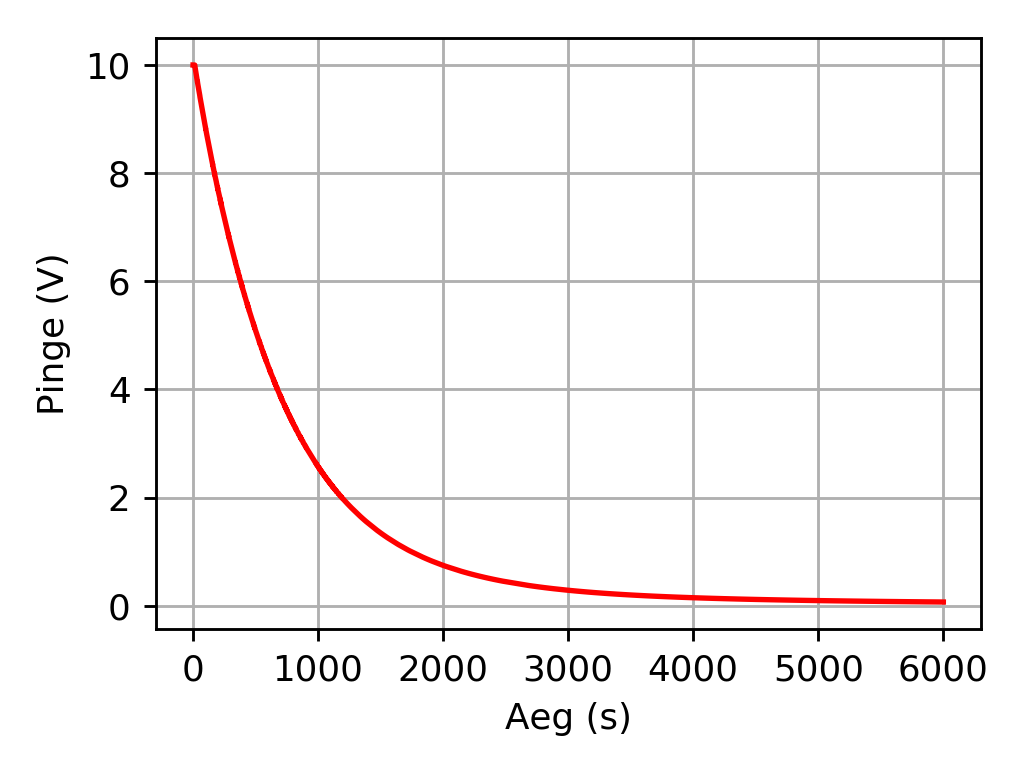

In [74]:
fail = 'kondensaatori_tühjenemine'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

plot(aeg, pinge, 'r-')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()

In [75]:
tühjeneb = aeg > 13.7

aeg = aeg[tühjeneb]
aeg -= aeg[0]
pinge = pinge[tühjeneb]
vool = pinge / takistus

Algmahtuvus 1.395 F


<IPython.core.display.Javascript object>


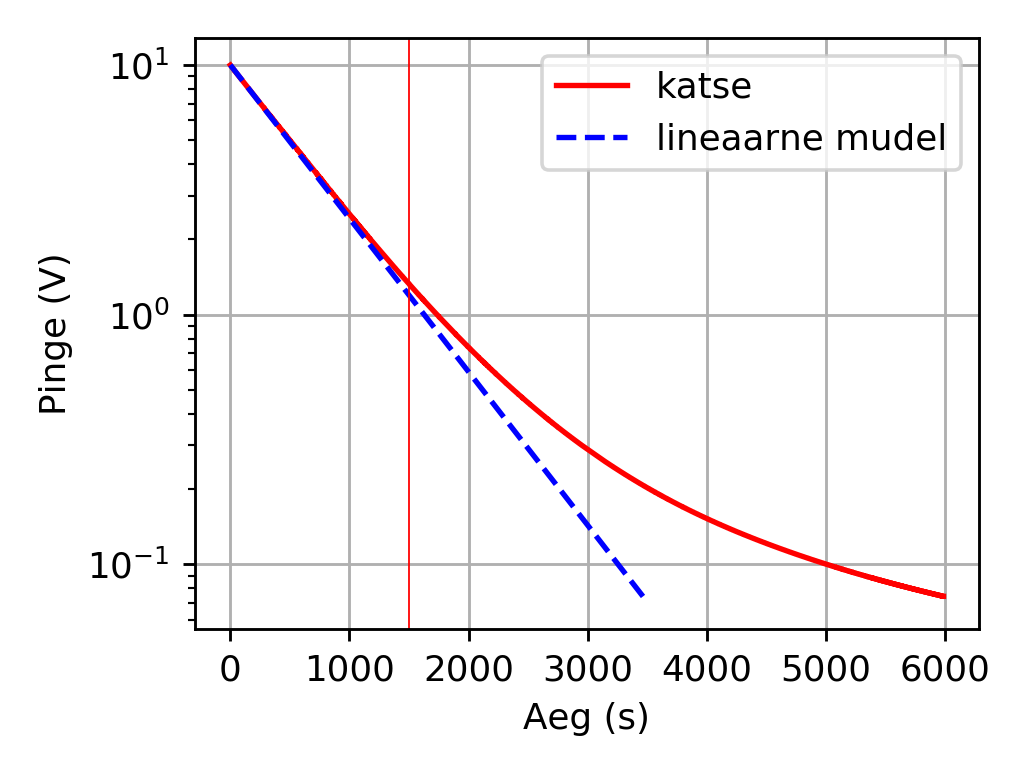

In [79]:
n = len(aeg) // 4
_, tõus, algordinaat = np.polyfit(aeg[:n], np.log(pinge[:n]), 2)
mahtuvus = -1 / (takistus * tõus)

print('Algmahtuvus %.3f F' % mahtuvus)

t = np.linspace(0, 3500, 100)
plot(aeg, pinge, 'r-', label='katse')
plot(t, np.exp(tõus * t + algordinaat), 'b--', label='lineaarne mudel')
yscale('log')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
axvline(aeg[n], color='red', lw=0.5)
grid()
legend()
tight_layout()
savefig(fail + '_mudel.png', bbox_inches='tight')
show()

### Laengu sõltuvus pingest

<img src="kondensaatori_pinge_laeng_skeem.png" style="height: 8em; float: right; margin-left: 1em;"/>Et täpsemalt karakteriseerida sellise kondensaatori omadusi, püüame mõõta kondensaatorisse kogunenud laengu sõltuvuse rakendatud pingest. Selleks laadime kondensaatorit läbi takisti, ja takistil tekkiva pingelangu järgi saame jälgida voolutugevuse muutumist. Voolutugevuse integreerimise teel saame hiljem arvutada ülekantud laengu. Toiteploki pinget tõstame 2&nbsp;V sammuga. Pärast toitepinge tõstmist ootame, kuni voolutugevus muutub piisavalt väikeseks. Seejuures me muidugi eeldame, et kondensaatori isetühjenemine (lekkevoolu tõttu) toimub oluliselt pikemates ajamastaapides ja seda võib ignoreerida.

In [11]:
U_set = np.arange(2, 10.1, 2.0)
takistus = 20.5
andmed = []

with UT61E(COM_MM) as mm:
    with KD3005P(COM_PS) as ps:
        for U in U_set:
            print('======= toitepinge = %5.2f V =======' % U)
            time.sleep(1)
            ajutine = []
            t0 = time.time()
            ps.pinge(U)
            while True:
                pinge = mm.lugem()
                aeg = time.time() - t0
                if pinge is not None:
                    print('aeg = %5.1f s, pinge = %6.4f V' % (aeg, pinge))
                    ajutine.append((aeg, pinge, pinge / takistus))
                    if aeg > 1500 or (aeg > 100 and pinge < 0.002):
                        break
                time.sleep(0.1)
            andmed.append(np.array(ajutine))

======= toitepinge =  2.00 V =======
aeg =   0.0 s, pinge = -0.0001 V
aeg =   0.4 s, pinge = 1.9462 V
aeg =   1.0 s, pinge = 1.9009 V
aeg =   1.4 s, pinge = 1.8586 V
aeg =   1.9 s, pinge = 1.8179 V
aeg =   2.4 s, pinge = 1.7785 V
aeg =   3.0 s, pinge = 1.7402 V
aeg =   3.4 s, pinge = 1.7029 V
aeg =   3.9 s, pinge = 1.6665 V
aeg =   4.5 s, pinge = 1.6310 V
aeg =   4.9 s, pinge = 1.5963 V
aeg =   5.4 s, pinge = 1.5626 V
aeg =   6.0 s, pinge = 1.5295 V
aeg =   6.4 s, pinge = 1.4973 V
aeg =   6.9 s, pinge = 1.4659 V
aeg =   7.5 s, pinge = 1.4351 V
aeg =   7.9 s, pinge = 1.4051 V
aeg =   8.4 s, pinge = 1.3758 V
aeg =   9.0 s, pinge = 1.3471 V
aeg =   9.4 s, pinge = 1.3191 V
aeg =   9.9 s, pinge = 1.2918 V
aeg =  10.5 s, pinge = 1.2651 V
aeg =  10.9 s, pinge = 1.2389 V
aeg =  11.4 s, pinge = 1.2134 V
aeg =  12.0 s, pinge = 1.1885 V
aeg =  12.4 s, pinge = 1.1641 V
aeg =  12.9 s, pinge = 1.1402 V
aeg =  13.5 s, pinge = 1.1169 V
aeg =  13.9 s, pinge = 1.0941 V
aeg =  14.4 s, pinge = 1.0718 V
ae

aeg = 127.4 s, pinge = 0.0287 V
aeg = 128.0 s, pinge = 0.0281 V
aeg = 128.4 s, pinge = 0.0278 V
aeg = 128.9 s, pinge = 0.0275 V
aeg = 129.5 s, pinge = 0.0275 V
aeg = 129.9 s, pinge = 0.0270 V
aeg = 130.4 s, pinge = 0.0268 V
aeg = 131.0 s, pinge = 0.0265 V
aeg = 131.4 s, pinge = 0.0265 V
aeg = 131.9 s, pinge = 0.0260 V
aeg = 132.4 s, pinge = 0.0257 V
aeg = 132.9 s, pinge = 0.0255 V
aeg = 133.4 s, pinge = 0.0255 V
aeg = 134.0 s, pinge = 0.0250 V
aeg = 134.4 s, pinge = 0.0248 V
aeg = 134.9 s, pinge = 0.0246 V
aeg = 135.5 s, pinge = 0.0246 V
aeg = 135.9 s, pinge = 0.0242 V
aeg = 136.4 s, pinge = 0.0239 V
aeg = 137.0 s, pinge = 0.0237 V
aeg = 137.4 s, pinge = 0.0237 V
aeg = 137.9 s, pinge = 0.0233 V
aeg = 138.5 s, pinge = 0.0233 V
aeg = 138.9 s, pinge = 0.0229 V
aeg = 139.4 s, pinge = 0.0229 V
aeg = 139.9 s, pinge = 0.0225 V
aeg = 140.4 s, pinge = 0.0225 V
aeg = 141.0 s, pinge = 0.0221 V
aeg = 141.4 s, pinge = 0.0219 V
aeg = 141.9 s, pinge = 0.0217 V
aeg = 142.5 s, pinge = 0.0217 V
aeg = 14

aeg = 255.9 s, pinge = 0.0077 V
aeg = 256.4 s, pinge = 0.0077 V
aeg = 256.9 s, pinge = 0.0077 V
aeg = 257.4 s, pinge = 0.0077 V
aeg = 257.9 s, pinge = 0.0076 V
aeg = 258.5 s, pinge = 0.0076 V
aeg = 258.9 s, pinge = 0.0076 V
aeg = 259.4 s, pinge = 0.0076 V
aeg = 260.0 s, pinge = 0.0075 V
aeg = 260.4 s, pinge = 0.0075 V
aeg = 260.9 s, pinge = 0.0075 V
aeg = 261.4 s, pinge = 0.0075 V
aeg = 261.9 s, pinge = 0.0075 V
aeg = 262.4 s, pinge = 0.0075 V
aeg = 262.9 s, pinge = 0.0074 V
aeg = 263.4 s, pinge = 0.0074 V
aeg = 263.9 s, pinge = 0.0074 V
aeg = 264.4 s, pinge = 0.0074 V
aeg = 264.9 s, pinge = 0.0073 V
aeg = 265.4 s, pinge = 0.0073 V
aeg = 265.9 s, pinge = 0.0073 V
aeg = 266.4 s, pinge = 0.0073 V
aeg = 267.0 s, pinge = 0.0072 V
aeg = 267.4 s, pinge = 0.0072 V
aeg = 267.9 s, pinge = 0.0072 V
aeg = 268.5 s, pinge = 0.0072 V
aeg = 268.9 s, pinge = 0.0072 V
aeg = 269.4 s, pinge = 0.0072 V
aeg = 270.0 s, pinge = 0.0071 V
aeg = 270.4 s, pinge = 0.0071 V
aeg = 270.9 s, pinge = 0.0071 V
aeg = 27

aeg = 384.4 s, pinge = 0.0046 V
aeg = 384.8 s, pinge = 0.0046 V
aeg = 385.4 s, pinge = 0.0046 V
aeg = 385.9 s, pinge = 0.0046 V
aeg = 386.3 s, pinge = 0.0046 V
aeg = 386.9 s, pinge = 0.0045 V
aeg = 387.4 s, pinge = 0.0045 V
aeg = 387.8 s, pinge = 0.0045 V
aeg = 388.4 s, pinge = 0.0045 V
aeg = 388.9 s, pinge = 0.0045 V
aeg = 389.3 s, pinge = 0.0045 V
aeg = 389.9 s, pinge = 0.0045 V
aeg = 390.4 s, pinge = 0.0045 V
aeg = 390.9 s, pinge = 0.0045 V
aeg = 391.3 s, pinge = 0.0045 V
aeg = 391.9 s, pinge = 0.0044 V
aeg = 392.4 s, pinge = 0.0044 V
aeg = 392.9 s, pinge = 0.0044 V
aeg = 393.4 s, pinge = 0.0044 V
aeg = 393.9 s, pinge = 0.0044 V
aeg = 394.4 s, pinge = 0.0044 V
aeg = 394.9 s, pinge = 0.0044 V
aeg = 395.4 s, pinge = 0.0044 V
aeg = 395.9 s, pinge = 0.0044 V
aeg = 396.4 s, pinge = 0.0044 V
aeg = 396.9 s, pinge = 0.0044 V
aeg = 397.4 s, pinge = 0.0044 V
aeg = 397.9 s, pinge = 0.0043 V
aeg = 398.4 s, pinge = 0.0043 V
aeg = 398.9 s, pinge = 0.0043 V
aeg = 399.4 s, pinge = 0.0043 V
aeg = 39

aeg = 512.9 s, pinge = 0.0032 V
aeg = 513.4 s, pinge = 0.0032 V
aeg = 513.9 s, pinge = 0.0032 V
aeg = 514.4 s, pinge = 0.0032 V
aeg = 514.9 s, pinge = 0.0032 V
aeg = 515.4 s, pinge = 0.0032 V
aeg = 515.9 s, pinge = 0.0032 V
aeg = 516.4 s, pinge = 0.0032 V
aeg = 516.9 s, pinge = 0.0032 V
aeg = 517.4 s, pinge = 0.0032 V
aeg = 517.9 s, pinge = 0.0032 V
aeg = 518.4 s, pinge = 0.0032 V
aeg = 518.9 s, pinge = 0.0032 V
aeg = 519.4 s, pinge = 0.0032 V
aeg = 519.9 s, pinge = 0.0031 V
aeg = 520.4 s, pinge = 0.0031 V
aeg = 520.9 s, pinge = 0.0031 V
aeg = 521.3 s, pinge = 0.0031 V
aeg = 521.9 s, pinge = 0.0031 V
aeg = 522.4 s, pinge = 0.0031 V
aeg = 522.9 s, pinge = 0.0031 V
aeg = 523.4 s, pinge = 0.0031 V
aeg = 523.9 s, pinge = 0.0031 V
aeg = 524.3 s, pinge = 0.0031 V
aeg = 524.9 s, pinge = 0.0031 V
aeg = 525.4 s, pinge = 0.0031 V
aeg = 525.9 s, pinge = 0.0031 V
aeg = 526.4 s, pinge = 0.0031 V
aeg = 526.9 s, pinge = 0.0031 V
aeg = 527.3 s, pinge = 0.0031 V
aeg = 527.9 s, pinge = 0.0031 V
aeg = 52

aeg = 641.3 s, pinge = 0.0024 V
aeg = 641.9 s, pinge = 0.0024 V
aeg = 642.4 s, pinge = 0.0024 V
aeg = 642.9 s, pinge = 0.0024 V
aeg = 643.4 s, pinge = 0.0024 V
aeg = 643.9 s, pinge = 0.0024 V
aeg = 644.4 s, pinge = 0.0024 V
aeg = 644.9 s, pinge = 0.0024 V
aeg = 645.3 s, pinge = 0.0024 V
aeg = 645.9 s, pinge = 0.0024 V
aeg = 646.4 s, pinge = 0.0024 V
aeg = 646.8 s, pinge = 0.0024 V
aeg = 647.4 s, pinge = 0.0024 V
aeg = 647.9 s, pinge = 0.0024 V
aeg = 648.3 s, pinge = 0.0024 V
aeg = 648.9 s, pinge = 0.0024 V
aeg = 649.4 s, pinge = 0.0024 V
aeg = 649.8 s, pinge = 0.0024 V
aeg = 650.4 s, pinge = 0.0024 V
aeg = 650.9 s, pinge = 0.0024 V
aeg = 651.3 s, pinge = 0.0024 V
aeg = 651.9 s, pinge = 0.0024 V
aeg = 652.4 s, pinge = 0.0024 V
aeg = 652.8 s, pinge = 0.0024 V
aeg = 653.4 s, pinge = 0.0024 V
aeg = 653.9 s, pinge = 0.0024 V
aeg = 654.3 s, pinge = 0.0024 V
aeg = 654.9 s, pinge = 0.0024 V
aeg = 655.4 s, pinge = 0.0024 V
aeg = 655.9 s, pinge = 0.0024 V
aeg = 656.4 s, pinge = 0.0024 V
aeg = 65

aeg =   2.5 s, pinge = 1.7860 V
aeg =   3.0 s, pinge = 1.7487 V
aeg =   3.4 s, pinge = 1.7124 V
aeg =   4.0 s, pinge = 1.6770 V
aeg =   4.5 s, pinge = 1.6426 V
aeg =   4.9 s, pinge = 1.6089 V
aeg =   5.5 s, pinge = 1.5761 V
aeg =   6.0 s, pinge = 1.5441 V
aeg =   6.4 s, pinge = 1.5128 V
aeg =   7.0 s, pinge = 1.4822 V
aeg =   7.5 s, pinge = 1.4524 V
aeg =   8.0 s, pinge = 1.4232 V
aeg =   8.5 s, pinge = 1.3948 V
aeg =   9.0 s, pinge = 1.3669 V
aeg =   9.5 s, pinge = 1.3397 V
aeg =  10.0 s, pinge = 1.3131 V
aeg =  10.4 s, pinge = 1.2872 V
aeg =  11.0 s, pinge = 1.2618 V
aeg =  11.5 s, pinge = 1.2369 V
aeg =  12.0 s, pinge = 1.2126 V
aeg =  12.5 s, pinge = 1.1889 V
aeg =  13.0 s, pinge = 1.1656 V
aeg =  13.5 s, pinge = 1.1429 V
aeg =  14.0 s, pinge = 1.1207 V
aeg =  14.4 s, pinge = 1.0990 V
aeg =  15.0 s, pinge = 1.0777 V
aeg =  15.5 s, pinge = 1.0569 V
aeg =  16.0 s, pinge = 1.0366 V
aeg =  16.5 s, pinge = 1.0166 V
aeg =  17.0 s, pinge = 0.9971 V
aeg =  17.5 s, pinge = 0.9780 V
aeg =  1

aeg = 131.0 s, pinge = 0.0362 V
aeg = 131.5 s, pinge = 0.0359 V
aeg = 132.0 s, pinge = 0.0356 V
aeg = 132.5 s, pinge = 0.0356 V
aeg = 133.0 s, pinge = 0.0350 V
aeg = 133.4 s, pinge = 0.0347 V
aeg = 134.0 s, pinge = 0.0344 V
aeg = 134.5 s, pinge = 0.0344 V
aeg = 135.0 s, pinge = 0.0338 V
aeg = 135.5 s, pinge = 0.0338 V
aeg = 136.0 s, pinge = 0.0333 V
aeg = 136.5 s, pinge = 0.0333 V
aeg = 137.0 s, pinge = 0.0328 V
aeg = 137.5 s, pinge = 0.0328 V
aeg = 138.0 s, pinge = 0.0323 V
aeg = 138.5 s, pinge = 0.0323 V
aeg = 138.9 s, pinge = 0.0318 V
aeg = 139.5 s, pinge = 0.0318 V
aeg = 140.0 s, pinge = 0.0313 V
aeg = 140.5 s, pinge = 0.0313 V
aeg = 140.9 s, pinge = 0.0308 V
aeg = 141.5 s, pinge = 0.0308 V
aeg = 142.0 s, pinge = 0.0303 V
aeg = 142.5 s, pinge = 0.0303 V
aeg = 143.0 s, pinge = 0.0299 V
aeg = 143.5 s, pinge = 0.0299 V
aeg = 144.0 s, pinge = 0.0294 V
aeg = 144.5 s, pinge = 0.0294 V
aeg = 145.0 s, pinge = 0.0290 V
aeg = 145.5 s, pinge = 0.0288 V
aeg = 146.0 s, pinge = 0.0286 V
aeg = 14

aeg = 259.5 s, pinge = 0.0123 V
aeg = 260.0 s, pinge = 0.0123 V
aeg = 260.5 s, pinge = 0.0123 V
aeg = 261.0 s, pinge = 0.0122 V
aeg = 261.5 s, pinge = 0.0122 V
aeg = 261.9 s, pinge = 0.0122 V
aeg = 262.4 s, pinge = 0.0122 V
aeg = 262.9 s, pinge = 0.0121 V
aeg = 263.4 s, pinge = 0.0121 V
aeg = 263.9 s, pinge = 0.0121 V
aeg = 264.4 s, pinge = 0.0121 V
aeg = 264.9 s, pinge = 0.0121 V
aeg = 265.4 s, pinge = 0.0121 V
aeg = 265.9 s, pinge = 0.0120 V
aeg = 266.5 s, pinge = 0.0120 V
aeg = 267.0 s, pinge = 0.0119 V
aeg = 267.5 s, pinge = 0.0119 V
aeg = 268.0 s, pinge = 0.0119 V
aeg = 268.5 s, pinge = 0.0119 V
aeg = 269.0 s, pinge = 0.0119 V
aeg = 269.5 s, pinge = 0.0119 V
aeg = 270.0 s, pinge = 0.0118 V
aeg = 270.5 s, pinge = 0.0118 V
aeg = 271.0 s, pinge = 0.0118 V
aeg = 271.5 s, pinge = 0.0118 V
aeg = 272.0 s, pinge = 0.0118 V
aeg = 272.5 s, pinge = 0.0118 V
aeg = 273.0 s, pinge = 0.0117 V
aeg = 273.5 s, pinge = 0.0117 V
aeg = 274.0 s, pinge = 0.0116 V
aeg = 274.5 s, pinge = 0.0116 V
aeg = 27

aeg = 387.9 s, pinge = 0.0084 V
aeg = 388.4 s, pinge = 0.0084 V
aeg = 388.9 s, pinge = 0.0083 V
aeg = 389.4 s, pinge = 0.0083 V
aeg = 389.9 s, pinge = 0.0083 V
aeg = 390.4 s, pinge = 0.0083 V
aeg = 390.9 s, pinge = 0.0083 V
aeg = 391.4 s, pinge = 0.0083 V
aeg = 392.0 s, pinge = 0.0083 V
aeg = 392.5 s, pinge = 0.0083 V
aeg = 393.0 s, pinge = 0.0083 V
aeg = 393.5 s, pinge = 0.0083 V
aeg = 394.0 s, pinge = 0.0083 V
aeg = 394.5 s, pinge = 0.0083 V
aeg = 395.0 s, pinge = 0.0082 V
aeg = 395.5 s, pinge = 0.0082 V
aeg = 396.0 s, pinge = 0.0082 V
aeg = 396.5 s, pinge = 0.0082 V
aeg = 397.0 s, pinge = 0.0082 V
aeg = 397.5 s, pinge = 0.0082 V
aeg = 398.0 s, pinge = 0.0082 V
aeg = 398.5 s, pinge = 0.0082 V
aeg = 399.0 s, pinge = 0.0082 V
aeg = 399.5 s, pinge = 0.0082 V
aeg = 400.0 s, pinge = 0.0081 V
aeg = 400.4 s, pinge = 0.0081 V
aeg = 400.9 s, pinge = 0.0081 V
aeg = 401.4 s, pinge = 0.0081 V
aeg = 401.9 s, pinge = 0.0081 V
aeg = 402.4 s, pinge = 0.0081 V
aeg = 402.9 s, pinge = 0.0081 V
aeg = 40

aeg = 516.4 s, pinge = 0.0065 V
aeg = 516.9 s, pinge = 0.0065 V
aeg = 517.4 s, pinge = 0.0065 V
aeg = 517.9 s, pinge = 0.0065 V
aeg = 518.4 s, pinge = 0.0065 V
aeg = 518.9 s, pinge = 0.0064 V
aeg = 519.4 s, pinge = 0.0064 V
aeg = 519.9 s, pinge = 0.0064 V
aeg = 520.5 s, pinge = 0.0064 V
aeg = 521.0 s, pinge = 0.0064 V
aeg = 521.5 s, pinge = 0.0064 V
aeg = 522.0 s, pinge = 0.0064 V
aeg = 522.5 s, pinge = 0.0064 V
aeg = 523.0 s, pinge = 0.0064 V
aeg = 523.5 s, pinge = 0.0064 V
aeg = 524.0 s, pinge = 0.0064 V
aeg = 524.5 s, pinge = 0.0064 V
aeg = 525.0 s, pinge = 0.0064 V
aeg = 525.5 s, pinge = 0.0064 V
aeg = 526.0 s, pinge = 0.0064 V
aeg = 526.4 s, pinge = 0.0064 V
aeg = 526.9 s, pinge = 0.0063 V
aeg = 527.4 s, pinge = 0.0063 V
aeg = 527.9 s, pinge = 0.0063 V
aeg = 528.4 s, pinge = 0.0063 V
aeg = 528.9 s, pinge = 0.0063 V
aeg = 529.4 s, pinge = 0.0063 V
aeg = 529.9 s, pinge = 0.0063 V
aeg = 530.4 s, pinge = 0.0063 V
aeg = 530.9 s, pinge = 0.0063 V
aeg = 531.4 s, pinge = 0.0063 V
aeg = 53

aeg = 644.9 s, pinge = 0.0053 V
aeg = 645.4 s, pinge = 0.0053 V
aeg = 645.9 s, pinge = 0.0053 V
aeg = 646.4 s, pinge = 0.0053 V
aeg = 646.9 s, pinge = 0.0053 V
aeg = 647.4 s, pinge = 0.0053 V
aeg = 647.9 s, pinge = 0.0053 V
aeg = 648.4 s, pinge = 0.0053 V
aeg = 648.9 s, pinge = 0.0053 V
aeg = 649.4 s, pinge = 0.0053 V
aeg = 649.9 s, pinge = 0.0053 V
aeg = 650.4 s, pinge = 0.0053 V
aeg = 650.9 s, pinge = 0.0053 V
aeg = 651.4 s, pinge = 0.0053 V
aeg = 651.9 s, pinge = 0.0053 V
aeg = 652.4 s, pinge = 0.0053 V
aeg = 652.9 s, pinge = 0.0053 V
aeg = 653.4 s, pinge = 0.0053 V
aeg = 653.9 s, pinge = 0.0053 V
aeg = 654.4 s, pinge = 0.0053 V
aeg = 654.9 s, pinge = 0.0052 V
aeg = 655.4 s, pinge = 0.0052 V
aeg = 655.9 s, pinge = 0.0052 V
aeg = 656.4 s, pinge = 0.0052 V
aeg = 657.0 s, pinge = 0.0052 V
aeg = 657.5 s, pinge = 0.0052 V
aeg = 658.0 s, pinge = 0.0052 V
aeg = 658.5 s, pinge = 0.0052 V
aeg = 659.0 s, pinge = 0.0053 V
aeg = 659.5 s, pinge = 0.0053 V
aeg = 660.0 s, pinge = 0.0053 V
aeg = 66

aeg = 773.4 s, pinge = 0.0045 V
aeg = 773.9 s, pinge = 0.0046 V
aeg = 774.4 s, pinge = 0.0046 V
aeg = 774.9 s, pinge = 0.0045 V
aeg = 775.4 s, pinge = 0.0045 V
aeg = 775.9 s, pinge = 0.0045 V
aeg = 776.4 s, pinge = 0.0045 V
aeg = 776.9 s, pinge = 0.0046 V
aeg = 777.4 s, pinge = 0.0046 V
aeg = 777.9 s, pinge = 0.0045 V
aeg = 778.4 s, pinge = 0.0045 V
aeg = 778.9 s, pinge = 0.0045 V
aeg = 779.4 s, pinge = 0.0045 V
aeg = 779.9 s, pinge = 0.0045 V
aeg = 780.4 s, pinge = 0.0045 V
aeg = 780.9 s, pinge = 0.0045 V
aeg = 781.4 s, pinge = 0.0045 V
aeg = 782.0 s, pinge = 0.0045 V
aeg = 782.5 s, pinge = 0.0045 V
aeg = 783.0 s, pinge = 0.0045 V
aeg = 783.4 s, pinge = 0.0045 V
aeg = 783.9 s, pinge = 0.0045 V
aeg = 784.4 s, pinge = 0.0045 V
aeg = 784.9 s, pinge = 0.0045 V
aeg = 785.4 s, pinge = 0.0045 V
aeg = 785.9 s, pinge = 0.0045 V
aeg = 786.4 s, pinge = 0.0045 V
aeg = 786.9 s, pinge = 0.0045 V
aeg = 787.4 s, pinge = 0.0045 V
aeg = 787.9 s, pinge = 0.0045 V
aeg = 788.4 s, pinge = 0.0045 V
aeg = 78

aeg = 901.9 s, pinge = 0.0040 V
aeg = 902.4 s, pinge = 0.0040 V
aeg = 902.9 s, pinge = 0.0039 V
aeg = 903.4 s, pinge = 0.0039 V
aeg = 903.9 s, pinge = 0.0040 V
aeg = 904.4 s, pinge = 0.0040 V
aeg = 904.9 s, pinge = 0.0040 V
aeg = 905.4 s, pinge = 0.0040 V
aeg = 905.9 s, pinge = 0.0040 V
aeg = 906.4 s, pinge = 0.0040 V
aeg = 906.9 s, pinge = 0.0040 V
aeg = 907.4 s, pinge = 0.0040 V
aeg = 907.9 s, pinge = 0.0040 V
aeg = 908.4 s, pinge = 0.0040 V
aeg = 908.9 s, pinge = 0.0040 V
aeg = 909.4 s, pinge = 0.0040 V
aeg = 909.9 s, pinge = 0.0040 V
aeg = 910.4 s, pinge = 0.0040 V
aeg = 910.9 s, pinge = 0.0040 V
aeg = 911.4 s, pinge = 0.0040 V
aeg = 911.9 s, pinge = 0.0039 V
aeg = 912.4 s, pinge = 0.0039 V
aeg = 912.9 s, pinge = 0.0039 V
aeg = 913.4 s, pinge = 0.0039 V
aeg = 913.9 s, pinge = 0.0039 V
aeg = 914.4 s, pinge = 0.0040 V
aeg = 914.9 s, pinge = 0.0039 V
aeg = 915.4 s, pinge = 0.0039 V
aeg = 915.9 s, pinge = 0.0039 V
aeg = 916.3 s, pinge = 0.0039 V
aeg = 916.9 s, pinge = 0.0039 V
aeg = 91

aeg = 1029.3 s, pinge = 0.0036 V
aeg = 1029.8 s, pinge = 0.0036 V
aeg = 1030.3 s, pinge = 0.0036 V
aeg = 1030.8 s, pinge = 0.0036 V
aeg = 1031.4 s, pinge = 0.0036 V
aeg = 1031.9 s, pinge = 0.0035 V
aeg = 1032.4 s, pinge = 0.0035 V
aeg = 1032.9 s, pinge = 0.0035 V
aeg = 1033.4 s, pinge = 0.0035 V
aeg = 1033.9 s, pinge = 0.0036 V
aeg = 1034.4 s, pinge = 0.0036 V
aeg = 1034.9 s, pinge = 0.0036 V
aeg = 1035.4 s, pinge = 0.0036 V
aeg = 1035.9 s, pinge = 0.0035 V
aeg = 1036.4 s, pinge = 0.0035 V
aeg = 1036.9 s, pinge = 0.0035 V
aeg = 1037.4 s, pinge = 0.0035 V
aeg = 1037.9 s, pinge = 0.0035 V
aeg = 1038.4 s, pinge = 0.0035 V
aeg = 1038.9 s, pinge = 0.0035 V
aeg = 1039.4 s, pinge = 0.0035 V
aeg = 1039.9 s, pinge = 0.0036 V
aeg = 1040.4 s, pinge = 0.0036 V
aeg = 1040.9 s, pinge = 0.0036 V
aeg = 1041.4 s, pinge = 0.0036 V
aeg = 1041.9 s, pinge = 0.0036 V
aeg = 1042.4 s, pinge = 0.0036 V
aeg = 1042.9 s, pinge = 0.0036 V
aeg = 1043.4 s, pinge = 0.0036 V
aeg = 1043.9 s, pinge = 0.0035 V
aeg = 1044

aeg = 1153.9 s, pinge = 0.0032 V
aeg = 1154.4 s, pinge = 0.0032 V
aeg = 1154.8 s, pinge = 0.0032 V
aeg = 1155.4 s, pinge = 0.0032 V
aeg = 1155.8 s, pinge = 0.0032 V
aeg = 1156.4 s, pinge = 0.0032 V
aeg = 1156.9 s, pinge = 0.0032 V
aeg = 1157.3 s, pinge = 0.0032 V
aeg = 1157.9 s, pinge = 0.0032 V
aeg = 1158.3 s, pinge = 0.0032 V
aeg = 1158.9 s, pinge = 0.0032 V
aeg = 1159.4 s, pinge = 0.0032 V
aeg = 1159.8 s, pinge = 0.0032 V
aeg = 1160.4 s, pinge = 0.0032 V
aeg = 1160.8 s, pinge = 0.0032 V
aeg = 1161.4 s, pinge = 0.0032 V
aeg = 1161.8 s, pinge = 0.0032 V
aeg = 1162.4 s, pinge = 0.0032 V
aeg = 1162.9 s, pinge = 0.0032 V
aeg = 1163.3 s, pinge = 0.0032 V
aeg = 1163.9 s, pinge = 0.0032 V
aeg = 1164.3 s, pinge = 0.0032 V
aeg = 1164.9 s, pinge = 0.0032 V
aeg = 1165.4 s, pinge = 0.0032 V
aeg = 1165.8 s, pinge = 0.0032 V
aeg = 1166.4 s, pinge = 0.0032 V
aeg = 1166.8 s, pinge = 0.0032 V
aeg = 1167.4 s, pinge = 0.0032 V
aeg = 1167.9 s, pinge = 0.0032 V
aeg = 1168.3 s, pinge = 0.0032 V
aeg = 1168

aeg = 1278.3 s, pinge = 0.0030 V
aeg = 1278.9 s, pinge = 0.0030 V
aeg = 1279.4 s, pinge = 0.0030 V
aeg = 1279.8 s, pinge = 0.0030 V
aeg = 1280.4 s, pinge = 0.0030 V
aeg = 1280.8 s, pinge = 0.0030 V
aeg = 1281.4 s, pinge = 0.0030 V
aeg = 1281.8 s, pinge = 0.0030 V
aeg = 1282.3 s, pinge = 0.0030 V
aeg = 1282.9 s, pinge = 0.0030 V
aeg = 1283.4 s, pinge = 0.0030 V
aeg = 1283.8 s, pinge = 0.0030 V
aeg = 1284.4 s, pinge = 0.0030 V
aeg = 1284.8 s, pinge = 0.0030 V
aeg = 1285.4 s, pinge = 0.0030 V
aeg = 1285.9 s, pinge = 0.0030 V
aeg = 1286.3 s, pinge = 0.0030 V
aeg = 1286.9 s, pinge = 0.0030 V
aeg = 1287.3 s, pinge = 0.0030 V
aeg = 1287.9 s, pinge = 0.0030 V
aeg = 1288.4 s, pinge = 0.0030 V
aeg = 1288.8 s, pinge = 0.0030 V
aeg = 1289.4 s, pinge = 0.0030 V
aeg = 1289.8 s, pinge = 0.0030 V
aeg = 1290.4 s, pinge = 0.0030 V
aeg = 1290.8 s, pinge = 0.0030 V
aeg = 1291.3 s, pinge = 0.0030 V
aeg = 1291.9 s, pinge = 0.0030 V
aeg = 1292.4 s, pinge = 0.0030 V
aeg = 1292.8 s, pinge = 0.0030 V
aeg = 1293

aeg = 1402.8 s, pinge = 0.0028 V
aeg = 1403.3 s, pinge = 0.0028 V
aeg = 1403.8 s, pinge = 0.0028 V
aeg = 1404.3 s, pinge = 0.0028 V
aeg = 1404.8 s, pinge = 0.0028 V
aeg = 1405.3 s, pinge = 0.0028 V
aeg = 1405.8 s, pinge = 0.0028 V
aeg = 1406.3 s, pinge = 0.0028 V
aeg = 1406.8 s, pinge = 0.0028 V
aeg = 1407.3 s, pinge = 0.0028 V
aeg = 1407.8 s, pinge = 0.0028 V
aeg = 1408.3 s, pinge = 0.0028 V
aeg = 1408.9 s, pinge = 0.0028 V
aeg = 1409.4 s, pinge = 0.0028 V
aeg = 1409.9 s, pinge = 0.0028 V
aeg = 1410.4 s, pinge = 0.0028 V
aeg = 1410.9 s, pinge = 0.0028 V
aeg = 1411.4 s, pinge = 0.0028 V
aeg = 1411.9 s, pinge = 0.0028 V
aeg = 1412.4 s, pinge = 0.0028 V
aeg = 1412.9 s, pinge = 0.0028 V
aeg = 1413.4 s, pinge = 0.0028 V
aeg = 1413.9 s, pinge = 0.0028 V
aeg = 1414.3 s, pinge = 0.0028 V
aeg = 1414.8 s, pinge = 0.0028 V
aeg = 1415.3 s, pinge = 0.0028 V
aeg = 1415.8 s, pinge = 0.0028 V
aeg = 1416.3 s, pinge = 0.0028 V
aeg = 1416.8 s, pinge = 0.0028 V
aeg = 1417.3 s, pinge = 0.0028 V
aeg = 1417

aeg =  26.6 s, pinge = 0.7359 V
aeg =  27.0 s, pinge = 0.7231 V
aeg =  27.5 s, pinge = 0.7106 V
aeg =  28.1 s, pinge = 0.6984 V
aeg =  28.5 s, pinge = 0.6864 V
aeg =  29.0 s, pinge = 0.6746 V
aeg =  29.5 s, pinge = 0.6630 V
aeg =  30.0 s, pinge = 0.6517 V
aeg =  30.5 s, pinge = 0.6406 V
aeg =  31.0 s, pinge = 0.6297 V
aeg =  31.5 s, pinge = 0.6190 V
aeg =  32.1 s, pinge = 0.6085 V
aeg =  32.5 s, pinge = 0.5982 V
aeg =  33.0 s, pinge = 0.5881 V
aeg =  33.5 s, pinge = 0.5782 V
aeg =  34.0 s, pinge = 0.5684 V
aeg =  34.5 s, pinge = 0.5589 V
aeg =  35.0 s, pinge = 0.5495 V
aeg =  35.6 s, pinge = 0.5403 V
aeg =  36.0 s, pinge = 0.5313 V
aeg =  36.5 s, pinge = 0.5225 V
aeg =  37.0 s, pinge = 0.5137 V
aeg =  37.5 s, pinge = 0.5052 V
aeg =  38.0 s, pinge = 0.4969 V
aeg =  38.6 s, pinge = 0.4887 V
aeg =  39.0 s, pinge = 0.4806 V
aeg =  39.5 s, pinge = 0.4727 V
aeg =  40.1 s, pinge = 0.4649 V
aeg =  40.5 s, pinge = 0.4573 V
aeg =  41.0 s, pinge = 0.4499 V
aeg =  41.5 s, pinge = 0.4425 V
aeg =  4

aeg = 155.1 s, pinge = 0.0333 V
aeg = 155.5 s, pinge = 0.0329 V
aeg = 156.0 s, pinge = 0.0329 V
aeg = 156.5 s, pinge = 0.0325 V
aeg = 157.0 s, pinge = 0.0325 V
aeg = 157.5 s, pinge = 0.0322 V
aeg = 158.0 s, pinge = 0.0322 V
aeg = 158.5 s, pinge = 0.0318 V
aeg = 159.0 s, pinge = 0.0318 V
aeg = 159.5 s, pinge = 0.0314 V
aeg = 160.0 s, pinge = 0.0314 V
aeg = 160.5 s, pinge = 0.0311 V
aeg = 161.0 s, pinge = 0.0309 V
aeg = 161.5 s, pinge = 0.0308 V
aeg = 162.0 s, pinge = 0.0308 V
aeg = 162.5 s, pinge = 0.0304 V
aeg = 163.0 s, pinge = 0.0304 V
aeg = 163.5 s, pinge = 0.0301 V
aeg = 164.0 s, pinge = 0.0301 V
aeg = 164.5 s, pinge = 0.0298 V
aeg = 165.0 s, pinge = 0.0298 V
aeg = 165.5 s, pinge = 0.0295 V
aeg = 166.0 s, pinge = 0.0295 V
aeg = 166.5 s, pinge = 0.0292 V
aeg = 167.0 s, pinge = 0.0292 V
aeg = 167.5 s, pinge = 0.0290 V
aeg = 168.0 s, pinge = 0.0288 V
aeg = 168.5 s, pinge = 0.0287 V
aeg = 169.0 s, pinge = 0.0287 V
aeg = 169.5 s, pinge = 0.0284 V
aeg = 170.0 s, pinge = 0.0284 V
aeg = 17

aeg = 283.5 s, pinge = 0.0156 V
aeg = 284.0 s, pinge = 0.0156 V
aeg = 284.5 s, pinge = 0.0156 V
aeg = 285.0 s, pinge = 0.0156 V
aeg = 285.5 s, pinge = 0.0155 V
aeg = 286.0 s, pinge = 0.0155 V
aeg = 286.5 s, pinge = 0.0154 V
aeg = 287.0 s, pinge = 0.0154 V
aeg = 287.5 s, pinge = 0.0154 V
aeg = 288.0 s, pinge = 0.0154 V
aeg = 288.5 s, pinge = 0.0154 V
aeg = 289.0 s, pinge = 0.0154 V
aeg = 289.5 s, pinge = 0.0153 V
aeg = 290.0 s, pinge = 0.0153 V
aeg = 290.5 s, pinge = 0.0153 V
aeg = 291.0 s, pinge = 0.0153 V
aeg = 291.5 s, pinge = 0.0152 V
aeg = 292.0 s, pinge = 0.0152 V
aeg = 292.5 s, pinge = 0.0152 V
aeg = 293.0 s, pinge = 0.0152 V
aeg = 293.5 s, pinge = 0.0151 V
aeg = 294.0 s, pinge = 0.0151 V
aeg = 294.5 s, pinge = 0.0151 V
aeg = 295.0 s, pinge = 0.0151 V
aeg = 295.5 s, pinge = 0.0151 V
aeg = 296.0 s, pinge = 0.0151 V
aeg = 296.5 s, pinge = 0.0150 V
aeg = 297.0 s, pinge = 0.0150 V
aeg = 297.5 s, pinge = 0.0150 V
aeg = 298.0 s, pinge = 0.0150 V
aeg = 298.5 s, pinge = 0.0150 V
aeg = 29

aeg = 412.0 s, pinge = 0.0116 V
aeg = 412.4 s, pinge = 0.0116 V
aeg = 413.0 s, pinge = 0.0116 V
aeg = 413.5 s, pinge = 0.0115 V
aeg = 414.0 s, pinge = 0.0115 V
aeg = 414.5 s, pinge = 0.0115 V
aeg = 415.0 s, pinge = 0.0115 V
aeg = 415.4 s, pinge = 0.0115 V
aeg = 416.0 s, pinge = 0.0115 V
aeg = 416.5 s, pinge = 0.0115 V
aeg = 416.9 s, pinge = 0.0115 V
aeg = 417.5 s, pinge = 0.0114 V
aeg = 418.0 s, pinge = 0.0114 V
aeg = 418.4 s, pinge = 0.0114 V
aeg = 419.0 s, pinge = 0.0114 V
aeg = 419.5 s, pinge = 0.0114 V
aeg = 420.0 s, pinge = 0.0114 V
aeg = 420.5 s, pinge = 0.0114 V
aeg = 421.0 s, pinge = 0.0114 V
aeg = 421.5 s, pinge = 0.0113 V
aeg = 422.0 s, pinge = 0.0113 V
aeg = 422.4 s, pinge = 0.0113 V
aeg = 423.0 s, pinge = 0.0113 V
aeg = 423.5 s, pinge = 0.0113 V
aeg = 424.0 s, pinge = 0.0113 V
aeg = 424.5 s, pinge = 0.0113 V
aeg = 425.0 s, pinge = 0.0113 V
aeg = 425.5 s, pinge = 0.0113 V
aeg = 426.0 s, pinge = 0.0113 V
aeg = 426.4 s, pinge = 0.0113 V
aeg = 427.0 s, pinge = 0.0113 V
aeg = 42

aeg = 540.4 s, pinge = 0.0094 V
aeg = 541.0 s, pinge = 0.0094 V
aeg = 541.5 s, pinge = 0.0094 V
aeg = 541.9 s, pinge = 0.0094 V
aeg = 542.5 s, pinge = 0.0094 V
aeg = 543.0 s, pinge = 0.0094 V
aeg = 543.4 s, pinge = 0.0094 V
aeg = 544.0 s, pinge = 0.0094 V
aeg = 544.5 s, pinge = 0.0094 V
aeg = 544.9 s, pinge = 0.0094 V
aeg = 545.5 s, pinge = 0.0093 V
aeg = 545.9 s, pinge = 0.0093 V
aeg = 546.5 s, pinge = 0.0093 V
aeg = 547.0 s, pinge = 0.0093 V
aeg = 547.4 s, pinge = 0.0093 V
aeg = 548.0 s, pinge = 0.0093 V
aeg = 548.5 s, pinge = 0.0093 V
aeg = 548.9 s, pinge = 0.0093 V
aeg = 549.5 s, pinge = 0.0093 V
aeg = 549.9 s, pinge = 0.0093 V
aeg = 550.5 s, pinge = 0.0093 V
aeg = 551.0 s, pinge = 0.0093 V
aeg = 551.4 s, pinge = 0.0093 V
aeg = 552.0 s, pinge = 0.0093 V
aeg = 552.5 s, pinge = 0.0093 V
aeg = 552.9 s, pinge = 0.0093 V
aeg = 553.5 s, pinge = 0.0093 V
aeg = 554.0 s, pinge = 0.0093 V
aeg = 554.4 s, pinge = 0.0092 V
aeg = 555.0 s, pinge = 0.0092 V
aeg = 555.5 s, pinge = 0.0092 V
aeg = 55

aeg = 669.0 s, pinge = 0.0080 V
aeg = 669.5 s, pinge = 0.0081 V
aeg = 669.9 s, pinge = 0.0081 V
aeg = 670.5 s, pinge = 0.0080 V
aeg = 670.9 s, pinge = 0.0080 V
aeg = 671.4 s, pinge = 0.0080 V
aeg = 671.9 s, pinge = 0.0080 V
aeg = 672.5 s, pinge = 0.0080 V
aeg = 672.9 s, pinge = 0.0080 V
aeg = 673.4 s, pinge = 0.0080 V
aeg = 674.0 s, pinge = 0.0080 V
aeg = 674.4 s, pinge = 0.0080 V
aeg = 674.9 s, pinge = 0.0080 V
aeg = 675.5 s, pinge = 0.0080 V
aeg = 675.9 s, pinge = 0.0080 V
aeg = 676.4 s, pinge = 0.0080 V
aeg = 677.0 s, pinge = 0.0080 V
aeg = 677.4 s, pinge = 0.0080 V
aeg = 678.0 s, pinge = 0.0080 V
aeg = 678.5 s, pinge = 0.0079 V
aeg = 678.9 s, pinge = 0.0080 V
aeg = 679.5 s, pinge = 0.0080 V
aeg = 680.0 s, pinge = 0.0080 V
aeg = 680.4 s, pinge = 0.0080 V
aeg = 681.0 s, pinge = 0.0079 V
aeg = 681.4 s, pinge = 0.0079 V
aeg = 681.9 s, pinge = 0.0079 V
aeg = 682.5 s, pinge = 0.0080 V
aeg = 683.0 s, pinge = 0.0079 V
aeg = 683.4 s, pinge = 0.0079 V
aeg = 683.9 s, pinge = 0.0079 V
aeg = 68

aeg = 797.5 s, pinge = 0.0071 V
aeg = 797.9 s, pinge = 0.0071 V
aeg = 798.5 s, pinge = 0.0071 V
aeg = 799.0 s, pinge = 0.0071 V
aeg = 799.4 s, pinge = 0.0071 V
aeg = 800.0 s, pinge = 0.0071 V
aeg = 800.5 s, pinge = 0.0071 V
aeg = 800.9 s, pinge = 0.0071 V
aeg = 801.5 s, pinge = 0.0071 V
aeg = 801.9 s, pinge = 0.0071 V
aeg = 802.4 s, pinge = 0.0071 V
aeg = 803.0 s, pinge = 0.0071 V
aeg = 803.4 s, pinge = 0.0071 V
aeg = 803.9 s, pinge = 0.0071 V
aeg = 804.5 s, pinge = 0.0071 V
aeg = 804.9 s, pinge = 0.0071 V
aeg = 805.4 s, pinge = 0.0071 V
aeg = 806.0 s, pinge = 0.0071 V
aeg = 806.4 s, pinge = 0.0070 V
aeg = 806.9 s, pinge = 0.0070 V
aeg = 807.5 s, pinge = 0.0070 V
aeg = 807.9 s, pinge = 0.0070 V
aeg = 808.5 s, pinge = 0.0070 V
aeg = 809.0 s, pinge = 0.0070 V
aeg = 809.4 s, pinge = 0.0070 V
aeg = 810.0 s, pinge = 0.0070 V
aeg = 810.5 s, pinge = 0.0070 V
aeg = 810.9 s, pinge = 0.0070 V
aeg = 811.4 s, pinge = 0.0070 V
aeg = 812.0 s, pinge = 0.0070 V
aeg = 812.4 s, pinge = 0.0070 V
aeg = 81

aeg = 925.9 s, pinge = 0.0064 V
aeg = 926.4 s, pinge = 0.0064 V
aeg = 927.0 s, pinge = 0.0064 V
aeg = 927.4 s, pinge = 0.0063 V
aeg = 927.9 s, pinge = 0.0063 V
aeg = 928.4 s, pinge = 0.0063 V
aeg = 928.9 s, pinge = 0.0063 V
aeg = 929.5 s, pinge = 0.0063 V
aeg = 929.9 s, pinge = 0.0063 V
aeg = 930.5 s, pinge = 0.0063 V
aeg = 930.9 s, pinge = 0.0063 V
aeg = 931.4 s, pinge = 0.0064 V
aeg = 932.0 s, pinge = 0.0064 V
aeg = 932.4 s, pinge = 0.0064 V
aeg = 932.9 s, pinge = 0.0064 V
aeg = 933.4 s, pinge = 0.0064 V
aeg = 933.9 s, pinge = 0.0064 V
aeg = 934.5 s, pinge = 0.0063 V
aeg = 934.9 s, pinge = 0.0063 V
aeg = 935.4 s, pinge = 0.0063 V
aeg = 936.0 s, pinge = 0.0063 V
aeg = 936.4 s, pinge = 0.0063 V
aeg = 936.9 s, pinge = 0.0063 V
aeg = 937.4 s, pinge = 0.0063 V
aeg = 937.9 s, pinge = 0.0063 V
aeg = 938.4 s, pinge = 0.0063 V
aeg = 939.0 s, pinge = 0.0063 V
aeg = 939.4 s, pinge = 0.0063 V
aeg = 939.9 s, pinge = 0.0063 V
aeg = 940.5 s, pinge = 0.0063 V
aeg = 940.9 s, pinge = 0.0063 V
aeg = 94

aeg = 1052.4 s, pinge = 0.0058 V
aeg = 1052.9 s, pinge = 0.0058 V
aeg = 1053.4 s, pinge = 0.0058 V
aeg = 1053.9 s, pinge = 0.0058 V
aeg = 1054.4 s, pinge = 0.0058 V
aeg = 1054.9 s, pinge = 0.0058 V
aeg = 1055.4 s, pinge = 0.0058 V
aeg = 1055.9 s, pinge = 0.0058 V
aeg = 1056.4 s, pinge = 0.0058 V
aeg = 1056.9 s, pinge = 0.0058 V
aeg = 1057.4 s, pinge = 0.0058 V
aeg = 1057.9 s, pinge = 0.0058 V
aeg = 1058.4 s, pinge = 0.0058 V
aeg = 1058.9 s, pinge = 0.0058 V
aeg = 1059.4 s, pinge = 0.0058 V
aeg = 1059.9 s, pinge = 0.0058 V
aeg = 1060.4 s, pinge = 0.0058 V
aeg = 1060.9 s, pinge = 0.0058 V
aeg = 1061.4 s, pinge = 0.0058 V
aeg = 1061.9 s, pinge = 0.0058 V
aeg = 1062.4 s, pinge = 0.0058 V
aeg = 1062.9 s, pinge = 0.0058 V
aeg = 1063.4 s, pinge = 0.0058 V
aeg = 1063.9 s, pinge = 0.0058 V
aeg = 1064.4 s, pinge = 0.0058 V
aeg = 1064.9 s, pinge = 0.0058 V
aeg = 1065.4 s, pinge = 0.0058 V
aeg = 1065.9 s, pinge = 0.0058 V
aeg = 1066.4 s, pinge = 0.0058 V
aeg = 1066.9 s, pinge = 0.0058 V
aeg = 1067

aeg = 1176.9 s, pinge = 0.0054 V
aeg = 1177.4 s, pinge = 0.0054 V
aeg = 1177.9 s, pinge = 0.0054 V
aeg = 1178.4 s, pinge = 0.0054 V
aeg = 1178.9 s, pinge = 0.0054 V
aeg = 1179.4 s, pinge = 0.0054 V
aeg = 1179.9 s, pinge = 0.0054 V
aeg = 1180.4 s, pinge = 0.0054 V
aeg = 1180.9 s, pinge = 0.0054 V
aeg = 1181.4 s, pinge = 0.0054 V
aeg = 1181.9 s, pinge = 0.0054 V
aeg = 1182.4 s, pinge = 0.0054 V
aeg = 1182.9 s, pinge = 0.0054 V
aeg = 1183.3 s, pinge = 0.0054 V
aeg = 1183.9 s, pinge = 0.0054 V
aeg = 1184.4 s, pinge = 0.0054 V
aeg = 1184.8 s, pinge = 0.0054 V
aeg = 1185.4 s, pinge = 0.0054 V
aeg = 1185.9 s, pinge = 0.0054 V
aeg = 1186.4 s, pinge = 0.0053 V
aeg = 1186.9 s, pinge = 0.0053 V
aeg = 1187.4 s, pinge = 0.0053 V
aeg = 1187.9 s, pinge = 0.0053 V
aeg = 1188.4 s, pinge = 0.0053 V
aeg = 1188.9 s, pinge = 0.0053 V
aeg = 1189.4 s, pinge = 0.0053 V
aeg = 1189.9 s, pinge = 0.0053 V
aeg = 1190.4 s, pinge = 0.0053 V
aeg = 1190.9 s, pinge = 0.0053 V
aeg = 1191.4 s, pinge = 0.0053 V
aeg = 1191

aeg = 1301.3 s, pinge = 0.0051 V
aeg = 1301.9 s, pinge = 0.0051 V
aeg = 1302.4 s, pinge = 0.0050 V
aeg = 1302.9 s, pinge = 0.0050 V
aeg = 1303.4 s, pinge = 0.0050 V
aeg = 1303.9 s, pinge = 0.0050 V
aeg = 1304.4 s, pinge = 0.0050 V
aeg = 1304.9 s, pinge = 0.0050 V
aeg = 1305.3 s, pinge = 0.0050 V
aeg = 1305.9 s, pinge = 0.0050 V
aeg = 1306.4 s, pinge = 0.0050 V
aeg = 1306.9 s, pinge = 0.0050 V
aeg = 1307.4 s, pinge = 0.0050 V
aeg = 1307.9 s, pinge = 0.0050 V
aeg = 1308.3 s, pinge = 0.0050 V
aeg = 1308.9 s, pinge = 0.0050 V
aeg = 1309.4 s, pinge = 0.0050 V
aeg = 1309.9 s, pinge = 0.0050 V
aeg = 1310.4 s, pinge = 0.0050 V
aeg = 1310.9 s, pinge = 0.0050 V
aeg = 1311.4 s, pinge = 0.0050 V
aeg = 1311.8 s, pinge = 0.0050 V
aeg = 1312.3 s, pinge = 0.0050 V
aeg = 1312.9 s, pinge = 0.0050 V
aeg = 1313.4 s, pinge = 0.0050 V
aeg = 1313.9 s, pinge = 0.0050 V
aeg = 1314.4 s, pinge = 0.0050 V
aeg = 1314.9 s, pinge = 0.0050 V
aeg = 1315.4 s, pinge = 0.0050 V
aeg = 1315.8 s, pinge = 0.0050 V
aeg = 1316

aeg = 1425.9 s, pinge = 0.0047 V
aeg = 1426.4 s, pinge = 0.0047 V
aeg = 1426.9 s, pinge = 0.0047 V
aeg = 1427.4 s, pinge = 0.0047 V
aeg = 1427.9 s, pinge = 0.0047 V
aeg = 1428.4 s, pinge = 0.0047 V
aeg = 1428.9 s, pinge = 0.0047 V
aeg = 1429.4 s, pinge = 0.0047 V
aeg = 1429.8 s, pinge = 0.0047 V
aeg = 1430.3 s, pinge = 0.0047 V
aeg = 1430.8 s, pinge = 0.0047 V
aeg = 1431.4 s, pinge = 0.0047 V
aeg = 1431.9 s, pinge = 0.0047 V
aeg = 1432.4 s, pinge = 0.0047 V
aeg = 1432.9 s, pinge = 0.0047 V
aeg = 1433.3 s, pinge = 0.0047 V
aeg = 1433.8 s, pinge = 0.0047 V
aeg = 1434.4 s, pinge = 0.0047 V
aeg = 1434.9 s, pinge = 0.0047 V
aeg = 1435.4 s, pinge = 0.0047 V
aeg = 1435.9 s, pinge = 0.0047 V
aeg = 1436.3 s, pinge = 0.0047 V
aeg = 1436.8 s, pinge = 0.0047 V
aeg = 1437.3 s, pinge = 0.0046 V
aeg = 1437.8 s, pinge = 0.0046 V
aeg = 1438.4 s, pinge = 0.0047 V
aeg = 1438.9 s, pinge = 0.0047 V
aeg = 1439.4 s, pinge = 0.0047 V
aeg = 1439.9 s, pinge = 0.0047 V
aeg = 1440.4 s, pinge = 0.0047 V
aeg = 1440

aeg =  50.5 s, pinge = 0.3676 V
aeg =  51.0 s, pinge = 0.3622 V
aeg =  51.5 s, pinge = 0.3569 V
aeg =  52.0 s, pinge = 0.3517 V
aeg =  52.5 s, pinge = 0.3466 V
aeg =  52.9 s, pinge = 0.3416 V
aeg =  53.4 s, pinge = 0.3366 V
aeg =  53.9 s, pinge = 0.3318 V
aeg =  54.5 s, pinge = 0.3270 V
aeg =  55.0 s, pinge = 0.3223 V
aeg =  55.5 s, pinge = 0.3177 V
aeg =  56.0 s, pinge = 0.3132 V
aeg =  56.5 s, pinge = 0.3087 V
aeg =  56.9 s, pinge = 0.3043 V
aeg =  57.4 s, pinge = 0.3000 V
aeg =  57.9 s, pinge = 0.2958 V
aeg =  58.5 s, pinge = 0.2916 V
aeg =  59.0 s, pinge = 0.2875 V
aeg =  59.5 s, pinge = 0.2834 V
aeg =  60.0 s, pinge = 0.2795 V
aeg =  60.5 s, pinge = 0.2756 V
aeg =  60.9 s, pinge = 0.2718 V
aeg =  61.4 s, pinge = 0.2680 V
aeg =  61.9 s, pinge = 0.2643 V
aeg =  62.5 s, pinge = 0.2606 V
aeg =  63.0 s, pinge = 0.2570 V
aeg =  63.5 s, pinge = 0.2535 V
aeg =  64.0 s, pinge = 0.2501 V
aeg =  64.4 s, pinge = 0.2466 V
aeg =  64.9 s, pinge = 0.2432 V
aeg =  65.4 s, pinge = 0.2399 V
aeg =  6

aeg = 179.0 s, pinge = 0.0337 V
aeg = 179.5 s, pinge = 0.0337 V
aeg = 180.0 s, pinge = 0.0335 V
aeg = 180.5 s, pinge = 0.0335 V
aeg = 181.0 s, pinge = 0.0332 V
aeg = 181.5 s, pinge = 0.0332 V
aeg = 182.0 s, pinge = 0.0329 V
aeg = 182.4 s, pinge = 0.0329 V
aeg = 182.9 s, pinge = 0.0326 V
aeg = 183.4 s, pinge = 0.0326 V
aeg = 183.9 s, pinge = 0.0324 V
aeg = 184.4 s, pinge = 0.0324 V
aeg = 185.0 s, pinge = 0.0322 V
aeg = 185.5 s, pinge = 0.0322 V
aeg = 186.0 s, pinge = 0.0319 V
aeg = 186.5 s, pinge = 0.0319 V
aeg = 186.9 s, pinge = 0.0317 V
aeg = 187.4 s, pinge = 0.0317 V
aeg = 187.9 s, pinge = 0.0314 V
aeg = 188.4 s, pinge = 0.0314 V
aeg = 188.9 s, pinge = 0.0312 V
aeg = 189.5 s, pinge = 0.0312 V
aeg = 190.0 s, pinge = 0.0310 V
aeg = 190.5 s, pinge = 0.0309 V
aeg = 191.0 s, pinge = 0.0308 V
aeg = 191.4 s, pinge = 0.0308 V
aeg = 191.9 s, pinge = 0.0305 V
aeg = 192.4 s, pinge = 0.0305 V
aeg = 192.9 s, pinge = 0.0303 V
aeg = 193.5 s, pinge = 0.0303 V
aeg = 194.0 s, pinge = 0.0301 V
aeg = 19

aeg = 307.5 s, pinge = 0.0189 V
aeg = 308.0 s, pinge = 0.0188 V
aeg = 308.4 s, pinge = 0.0188 V
aeg = 308.9 s, pinge = 0.0188 V
aeg = 309.4 s, pinge = 0.0188 V
aeg = 309.9 s, pinge = 0.0188 V
aeg = 310.4 s, pinge = 0.0188 V
aeg = 310.9 s, pinge = 0.0187 V
aeg = 311.4 s, pinge = 0.0187 V
aeg = 312.0 s, pinge = 0.0186 V
aeg = 312.5 s, pinge = 0.0186 V
aeg = 313.0 s, pinge = 0.0186 V
aeg = 313.4 s, pinge = 0.0186 V
aeg = 313.9 s, pinge = 0.0186 V
aeg = 314.4 s, pinge = 0.0186 V
aeg = 314.9 s, pinge = 0.0185 V
aeg = 315.4 s, pinge = 0.0185 V
aeg = 316.0 s, pinge = 0.0185 V
aeg = 316.5 s, pinge = 0.0185 V
aeg = 316.9 s, pinge = 0.0184 V
aeg = 317.4 s, pinge = 0.0184 V
aeg = 317.9 s, pinge = 0.0184 V
aeg = 318.4 s, pinge = 0.0184 V
aeg = 318.9 s, pinge = 0.0183 V
aeg = 319.5 s, pinge = 0.0183 V
aeg = 320.0 s, pinge = 0.0183 V
aeg = 320.4 s, pinge = 0.0183 V
aeg = 320.9 s, pinge = 0.0182 V
aeg = 321.4 s, pinge = 0.0182 V
aeg = 321.9 s, pinge = 0.0182 V
aeg = 322.4 s, pinge = 0.0182 V
aeg = 32

aeg = 435.9 s, pinge = 0.0144 V
aeg = 436.4 s, pinge = 0.0144 V
aeg = 436.9 s, pinge = 0.0144 V
aeg = 437.4 s, pinge = 0.0144 V
aeg = 437.9 s, pinge = 0.0143 V
aeg = 438.5 s, pinge = 0.0143 V
aeg = 439.0 s, pinge = 0.0143 V
aeg = 439.4 s, pinge = 0.0143 V
aeg = 439.9 s, pinge = 0.0143 V
aeg = 440.4 s, pinge = 0.0143 V
aeg = 440.9 s, pinge = 0.0143 V
aeg = 441.4 s, pinge = 0.0143 V
aeg = 441.9 s, pinge = 0.0142 V
aeg = 442.5 s, pinge = 0.0142 V
aeg = 443.0 s, pinge = 0.0142 V
aeg = 443.4 s, pinge = 0.0142 V
aeg = 443.9 s, pinge = 0.0142 V
aeg = 444.4 s, pinge = 0.0142 V
aeg = 444.9 s, pinge = 0.0142 V
aeg = 445.4 s, pinge = 0.0142 V
aeg = 445.9 s, pinge = 0.0141 V
aeg = 446.4 s, pinge = 0.0141 V
aeg = 447.0 s, pinge = 0.0141 V
aeg = 447.5 s, pinge = 0.0141 V
aeg = 447.9 s, pinge = 0.0141 V
aeg = 448.4 s, pinge = 0.0141 V
aeg = 448.9 s, pinge = 0.0140 V
aeg = 449.4 s, pinge = 0.0140 V
aeg = 449.9 s, pinge = 0.0141 V
aeg = 450.4 s, pinge = 0.0141 V
aeg = 451.0 s, pinge = 0.0140 V
aeg = 45

aeg = 564.5 s, pinge = 0.0119 V
aeg = 564.9 s, pinge = 0.0119 V
aeg = 565.4 s, pinge = 0.0119 V
aeg = 565.9 s, pinge = 0.0118 V
aeg = 566.4 s, pinge = 0.0118 V
aeg = 566.9 s, pinge = 0.0119 V
aeg = 567.5 s, pinge = 0.0119 V
aeg = 567.9 s, pinge = 0.0118 V
aeg = 568.5 s, pinge = 0.0118 V
aeg = 568.9 s, pinge = 0.0118 V
aeg = 569.4 s, pinge = 0.0118 V
aeg = 569.9 s, pinge = 0.0118 V
aeg = 570.4 s, pinge = 0.0118 V
aeg = 570.9 s, pinge = 0.0117 V
aeg = 571.4 s, pinge = 0.0117 V
aeg = 571.9 s, pinge = 0.0118 V
aeg = 572.4 s, pinge = 0.0118 V
aeg = 572.9 s, pinge = 0.0118 V
aeg = 573.5 s, pinge = 0.0118 V
aeg = 573.9 s, pinge = 0.0117 V
aeg = 574.4 s, pinge = 0.0117 V
aeg = 575.0 s, pinge = 0.0117 V
aeg = 575.4 s, pinge = 0.0117 V
aeg = 575.9 s, pinge = 0.0117 V
aeg = 576.4 s, pinge = 0.0117 V
aeg = 576.9 s, pinge = 0.0117 V
aeg = 577.4 s, pinge = 0.0117 V
aeg = 578.0 s, pinge = 0.0117 V
aeg = 578.4 s, pinge = 0.0117 V
aeg = 578.9 s, pinge = 0.0117 V
aeg = 579.5 s, pinge = 0.0117 V
aeg = 57

aeg = 692.9 s, pinge = 0.0102 V
aeg = 693.4 s, pinge = 0.0102 V
aeg = 693.9 s, pinge = 0.0102 V
aeg = 694.4 s, pinge = 0.0102 V
aeg = 694.9 s, pinge = 0.0102 V
aeg = 695.4 s, pinge = 0.0102 V
aeg = 695.9 s, pinge = 0.0102 V
aeg = 696.4 s, pinge = 0.0102 V
aeg = 696.9 s, pinge = 0.0101 V
aeg = 697.4 s, pinge = 0.0101 V
aeg = 697.9 s, pinge = 0.0101 V
aeg = 698.4 s, pinge = 0.0101 V
aeg = 698.9 s, pinge = 0.0101 V
aeg = 699.4 s, pinge = 0.0101 V
aeg = 699.9 s, pinge = 0.0101 V
aeg = 700.4 s, pinge = 0.0101 V
aeg = 700.9 s, pinge = 0.0101 V
aeg = 701.3 s, pinge = 0.0101 V
aeg = 701.8 s, pinge = 0.0101 V
aeg = 702.4 s, pinge = 0.0101 V
aeg = 702.9 s, pinge = 0.0100 V
aeg = 703.4 s, pinge = 0.0100 V
aeg = 703.9 s, pinge = 0.0101 V
aeg = 704.4 s, pinge = 0.0101 V
aeg = 704.9 s, pinge = 0.0100 V
aeg = 705.4 s, pinge = 0.0100 V
aeg = 705.9 s, pinge = 0.0100 V
aeg = 706.4 s, pinge = 0.0100 V
aeg = 706.9 s, pinge = 0.0100 V
aeg = 707.4 s, pinge = 0.0100 V
aeg = 707.9 s, pinge = 0.0100 V
aeg = 70

aeg = 821.3 s, pinge = 0.0090 V
aeg = 821.8 s, pinge = 0.0090 V
aeg = 822.3 s, pinge = 0.0090 V
aeg = 822.8 s, pinge = 0.0090 V
aeg = 823.4 s, pinge = 0.0090 V
aeg = 823.9 s, pinge = 0.0089 V
aeg = 824.4 s, pinge = 0.0089 V
aeg = 824.9 s, pinge = 0.0089 V
aeg = 825.4 s, pinge = 0.0090 V
aeg = 825.9 s, pinge = 0.0089 V
aeg = 826.4 s, pinge = 0.0089 V
aeg = 826.9 s, pinge = 0.0089 V
aeg = 827.4 s, pinge = 0.0090 V
aeg = 827.9 s, pinge = 0.0089 V
aeg = 828.4 s, pinge = 0.0089 V
aeg = 828.9 s, pinge = 0.0089 V
aeg = 829.4 s, pinge = 0.0089 V
aeg = 829.9 s, pinge = 0.0089 V
aeg = 830.4 s, pinge = 0.0089 V
aeg = 830.9 s, pinge = 0.0089 V
aeg = 831.4 s, pinge = 0.0089 V
aeg = 831.9 s, pinge = 0.0089 V
aeg = 832.4 s, pinge = 0.0089 V
aeg = 832.9 s, pinge = 0.0089 V
aeg = 833.4 s, pinge = 0.0089 V
aeg = 833.8 s, pinge = 0.0089 V
aeg = 834.3 s, pinge = 0.0089 V
aeg = 834.8 s, pinge = 0.0089 V
aeg = 835.3 s, pinge = 0.0089 V
aeg = 835.8 s, pinge = 0.0089 V
aeg = 836.4 s, pinge = 0.0089 V
aeg = 83

aeg = 949.9 s, pinge = 0.0081 V
aeg = 950.4 s, pinge = 0.0081 V
aeg = 950.9 s, pinge = 0.0081 V
aeg = 951.4 s, pinge = 0.0081 V
aeg = 951.9 s, pinge = 0.0081 V
aeg = 952.4 s, pinge = 0.0081 V
aeg = 952.9 s, pinge = 0.0081 V
aeg = 953.4 s, pinge = 0.0081 V
aeg = 953.9 s, pinge = 0.0081 V
aeg = 954.4 s, pinge = 0.0081 V
aeg = 954.9 s, pinge = 0.0080 V
aeg = 955.3 s, pinge = 0.0080 V
aeg = 955.8 s, pinge = 0.0080 V
aeg = 956.3 s, pinge = 0.0080 V
aeg = 956.8 s, pinge = 0.0081 V
aeg = 957.3 s, pinge = 0.0081 V
aeg = 957.8 s, pinge = 0.0080 V
aeg = 958.3 s, pinge = 0.0080 V
aeg = 958.8 s, pinge = 0.0080 V
aeg = 959.4 s, pinge = 0.0080 V
aeg = 959.9 s, pinge = 0.0080 V
aeg = 960.4 s, pinge = 0.0080 V
aeg = 960.9 s, pinge = 0.0080 V
aeg = 961.4 s, pinge = 0.0080 V
aeg = 961.9 s, pinge = 0.0080 V
aeg = 962.4 s, pinge = 0.0080 V
aeg = 962.9 s, pinge = 0.0080 V
aeg = 963.4 s, pinge = 0.0080 V
aeg = 963.9 s, pinge = 0.0080 V
aeg = 964.4 s, pinge = 0.0080 V
aeg = 964.9 s, pinge = 0.0080 V
aeg = 96

aeg = 1075.8 s, pinge = 0.0074 V
aeg = 1076.4 s, pinge = 0.0074 V
aeg = 1076.8 s, pinge = 0.0074 V
aeg = 1077.3 s, pinge = 0.0074 V
aeg = 1077.9 s, pinge = 0.0074 V
aeg = 1078.3 s, pinge = 0.0074 V
aeg = 1078.8 s, pinge = 0.0074 V
aeg = 1079.4 s, pinge = 0.0074 V
aeg = 1079.8 s, pinge = 0.0074 V
aeg = 1080.4 s, pinge = 0.0074 V
aeg = 1080.9 s, pinge = 0.0074 V
aeg = 1081.3 s, pinge = 0.0074 V
aeg = 1081.9 s, pinge = 0.0073 V
aeg = 1082.3 s, pinge = 0.0073 V
aeg = 1082.8 s, pinge = 0.0073 V
aeg = 1083.4 s, pinge = 0.0073 V
aeg = 1083.8 s, pinge = 0.0073 V
aeg = 1084.4 s, pinge = 0.0073 V
aeg = 1084.9 s, pinge = 0.0073 V
aeg = 1085.3 s, pinge = 0.0073 V
aeg = 1085.9 s, pinge = 0.0073 V
aeg = 1086.4 s, pinge = 0.0073 V
aeg = 1086.9 s, pinge = 0.0073 V
aeg = 1087.4 s, pinge = 0.0073 V
aeg = 1087.8 s, pinge = 0.0073 V
aeg = 1088.3 s, pinge = 0.0073 V
aeg = 1088.8 s, pinge = 0.0073 V
aeg = 1089.3 s, pinge = 0.0073 V
aeg = 1089.8 s, pinge = 0.0073 V
aeg = 1090.3 s, pinge = 0.0073 V
aeg = 1090

aeg = 1200.3 s, pinge = 0.0069 V
aeg = 1200.9 s, pinge = 0.0069 V
aeg = 1201.3 s, pinge = 0.0069 V
aeg = 1201.9 s, pinge = 0.0069 V
aeg = 1202.3 s, pinge = 0.0069 V
aeg = 1202.8 s, pinge = 0.0069 V
aeg = 1203.4 s, pinge = 0.0069 V
aeg = 1203.8 s, pinge = 0.0069 V
aeg = 1204.3 s, pinge = 0.0069 V
aeg = 1204.9 s, pinge = 0.0069 V
aeg = 1205.3 s, pinge = 0.0069 V
aeg = 1205.8 s, pinge = 0.0069 V
aeg = 1206.4 s, pinge = 0.0069 V
aeg = 1206.8 s, pinge = 0.0069 V
aeg = 1207.3 s, pinge = 0.0069 V
aeg = 1207.9 s, pinge = 0.0069 V
aeg = 1208.3 s, pinge = 0.0069 V
aeg = 1208.8 s, pinge = 0.0069 V
aeg = 1209.4 s, pinge = 0.0069 V
aeg = 1209.8 s, pinge = 0.0069 V
aeg = 1210.3 s, pinge = 0.0069 V
aeg = 1210.9 s, pinge = 0.0069 V
aeg = 1211.3 s, pinge = 0.0069 V
aeg = 1211.9 s, pinge = 0.0069 V
aeg = 1212.3 s, pinge = 0.0069 V
aeg = 1212.8 s, pinge = 0.0069 V
aeg = 1213.4 s, pinge = 0.0069 V
aeg = 1213.8 s, pinge = 0.0069 V
aeg = 1214.3 s, pinge = 0.0069 V
aeg = 1214.9 s, pinge = 0.0069 V
aeg = 1215

aeg = 1324.8 s, pinge = 0.0064 V
aeg = 1325.4 s, pinge = 0.0064 V
aeg = 1325.8 s, pinge = 0.0065 V
aeg = 1326.3 s, pinge = 0.0065 V
aeg = 1326.9 s, pinge = 0.0065 V
aeg = 1327.3 s, pinge = 0.0065 V
aeg = 1327.9 s, pinge = 0.0064 V
aeg = 1328.3 s, pinge = 0.0064 V
aeg = 1328.8 s, pinge = 0.0064 V
aeg = 1329.4 s, pinge = 0.0064 V
aeg = 1329.8 s, pinge = 0.0064 V
aeg = 1330.3 s, pinge = 0.0064 V
aeg = 1330.9 s, pinge = 0.0064 V
aeg = 1331.3 s, pinge = 0.0064 V
aeg = 1331.8 s, pinge = 0.0064 V
aeg = 1332.4 s, pinge = 0.0064 V
aeg = 1332.8 s, pinge = 0.0064 V
aeg = 1333.3 s, pinge = 0.0064 V
aeg = 1333.9 s, pinge = 0.0064 V
aeg = 1334.3 s, pinge = 0.0064 V
aeg = 1334.8 s, pinge = 0.0064 V
aeg = 1335.4 s, pinge = 0.0064 V
aeg = 1335.8 s, pinge = 0.0064 V
aeg = 1336.3 s, pinge = 0.0064 V
aeg = 1336.9 s, pinge = 0.0064 V
aeg = 1337.3 s, pinge = 0.0064 V
aeg = 1337.9 s, pinge = 0.0064 V
aeg = 1338.3 s, pinge = 0.0064 V
aeg = 1338.8 s, pinge = 0.0064 V
aeg = 1339.4 s, pinge = 0.0064 V
aeg = 1339

aeg = 1449.3 s, pinge = 0.0060 V
aeg = 1449.9 s, pinge = 0.0060 V
aeg = 1450.3 s, pinge = 0.0060 V
aeg = 1450.8 s, pinge = 0.0060 V
aeg = 1451.4 s, pinge = 0.0060 V
aeg = 1451.8 s, pinge = 0.0061 V
aeg = 1452.3 s, pinge = 0.0061 V
aeg = 1452.8 s, pinge = 0.0060 V
aeg = 1453.3 s, pinge = 0.0060 V
aeg = 1453.8 s, pinge = 0.0060 V
aeg = 1454.4 s, pinge = 0.0060 V
aeg = 1454.8 s, pinge = 0.0060 V
aeg = 1455.3 s, pinge = 0.0060 V
aeg = 1455.9 s, pinge = 0.0060 V
aeg = 1456.3 s, pinge = 0.0060 V
aeg = 1456.8 s, pinge = 0.0060 V
aeg = 1457.4 s, pinge = 0.0060 V
aeg = 1457.8 s, pinge = 0.0060 V
aeg = 1458.3 s, pinge = 0.0060 V
aeg = 1458.9 s, pinge = 0.0060 V
aeg = 1459.3 s, pinge = 0.0060 V
aeg = 1459.8 s, pinge = 0.0060 V
aeg = 1460.3 s, pinge = 0.0060 V
aeg = 1460.8 s, pinge = 0.0060 V
aeg = 1461.3 s, pinge = 0.0060 V
aeg = 1461.8 s, pinge = 0.0060 V
aeg = 1462.3 s, pinge = 0.0060 V
aeg = 1462.8 s, pinge = 0.0060 V
aeg = 1463.3 s, pinge = 0.0060 V
aeg = 1463.8 s, pinge = 0.0060 V
aeg = 1464

aeg =  74.5 s, pinge = 0.2150 V
aeg =  75.1 s, pinge = 0.2124 V
aeg =  75.5 s, pinge = 0.2099 V
aeg =  76.0 s, pinge = 0.2074 V
aeg =  76.6 s, pinge = 0.2049 V
aeg =  77.0 s, pinge = 0.2025 V
aeg =  77.5 s, pinge = 0.2001 V
aeg =  78.1 s, pinge = 0.1978 V
aeg =  78.5 s, pinge = 0.1955 V
aeg =  79.0 s, pinge = 0.1932 V
aeg =  79.6 s, pinge = 0.1910 V
aeg =  80.0 s, pinge = 0.1888 V
aeg =  80.5 s, pinge = 0.1866 V
aeg =  81.1 s, pinge = 0.1845 V
aeg =  81.6 s, pinge = 0.1823 V
aeg =  82.0 s, pinge = 0.1802 V
aeg =  82.6 s, pinge = 0.1782 V
aeg =  83.0 s, pinge = 0.1762 V
aeg =  83.5 s, pinge = 0.1742 V
aeg =  84.1 s, pinge = 0.1723 V
aeg =  84.5 s, pinge = 0.1703 V
aeg =  85.0 s, pinge = 0.1684 V
aeg =  85.5 s, pinge = 0.1665 V
aeg =  86.1 s, pinge = 0.1647 V
aeg =  86.5 s, pinge = 0.1628 V
aeg =  87.0 s, pinge = 0.1611 V
aeg =  87.6 s, pinge = 0.1593 V
aeg =  88.0 s, pinge = 0.1576 V
aeg =  88.5 s, pinge = 0.1559 V
aeg =  89.1 s, pinge = 0.1542 V
aeg =  89.5 s, pinge = 0.1525 V
aeg =  9

aeg = 203.0 s, pinge = 0.0359 V
aeg = 203.6 s, pinge = 0.0358 V
aeg = 204.0 s, pinge = 0.0358 V
aeg = 204.5 s, pinge = 0.0356 V
aeg = 205.0 s, pinge = 0.0356 V
aeg = 205.5 s, pinge = 0.0354 V
aeg = 206.1 s, pinge = 0.0354 V
aeg = 206.5 s, pinge = 0.0352 V
aeg = 207.0 s, pinge = 0.0352 V
aeg = 207.5 s, pinge = 0.0350 V
aeg = 208.0 s, pinge = 0.0349 V
aeg = 208.6 s, pinge = 0.0348 V
aeg = 209.0 s, pinge = 0.0348 V
aeg = 209.5 s, pinge = 0.0346 V
aeg = 210.1 s, pinge = 0.0346 V
aeg = 210.5 s, pinge = 0.0344 V
aeg = 211.0 s, pinge = 0.0344 V
aeg = 211.5 s, pinge = 0.0342 V
aeg = 212.0 s, pinge = 0.0342 V
aeg = 212.6 s, pinge = 0.0341 V
aeg = 213.0 s, pinge = 0.0341 V
aeg = 213.5 s, pinge = 0.0339 V
aeg = 214.0 s, pinge = 0.0339 V
aeg = 214.5 s, pinge = 0.0337 V
aeg = 215.0 s, pinge = 0.0337 V
aeg = 215.5 s, pinge = 0.0335 V
aeg = 216.0 s, pinge = 0.0335 V
aeg = 216.5 s, pinge = 0.0333 V
aeg = 217.0 s, pinge = 0.0333 V
aeg = 217.5 s, pinge = 0.0332 V
aeg = 218.1 s, pinge = 0.0332 V
aeg = 21

aeg = 331.5 s, pinge = 0.0228 V
aeg = 332.0 s, pinge = 0.0228 V
aeg = 332.5 s, pinge = 0.0227 V
aeg = 333.0 s, pinge = 0.0227 V
aeg = 333.5 s, pinge = 0.0226 V
aeg = 334.1 s, pinge = 0.0226 V
aeg = 334.5 s, pinge = 0.0226 V
aeg = 335.0 s, pinge = 0.0226 V
aeg = 335.5 s, pinge = 0.0225 V
aeg = 336.0 s, pinge = 0.0225 V
aeg = 336.5 s, pinge = 0.0225 V
aeg = 337.0 s, pinge = 0.0225 V
aeg = 337.5 s, pinge = 0.0224 V
aeg = 338.0 s, pinge = 0.0224 V
aeg = 338.5 s, pinge = 0.0224 V
aeg = 339.0 s, pinge = 0.0224 V
aeg = 339.5 s, pinge = 0.0223 V
aeg = 340.0 s, pinge = 0.0223 V
aeg = 340.5 s, pinge = 0.0223 V
aeg = 341.0 s, pinge = 0.0223 V
aeg = 341.5 s, pinge = 0.0222 V
aeg = 342.0 s, pinge = 0.0222 V
aeg = 342.5 s, pinge = 0.0222 V
aeg = 343.0 s, pinge = 0.0222 V
aeg = 343.5 s, pinge = 0.0221 V
aeg = 344.0 s, pinge = 0.0221 V
aeg = 344.5 s, pinge = 0.0221 V
aeg = 345.0 s, pinge = 0.0221 V
aeg = 345.5 s, pinge = 0.0221 V
aeg = 346.0 s, pinge = 0.0221 V
aeg = 346.5 s, pinge = 0.0220 V
aeg = 34

aeg = 460.0 s, pinge = 0.0179 V
aeg = 460.5 s, pinge = 0.0179 V
aeg = 461.0 s, pinge = 0.0179 V
aeg = 461.4 s, pinge = 0.0179 V
aeg = 462.0 s, pinge = 0.0179 V
aeg = 462.5 s, pinge = 0.0179 V
aeg = 463.0 s, pinge = 0.0179 V
aeg = 463.5 s, pinge = 0.0178 V
aeg = 464.0 s, pinge = 0.0178 V
aeg = 464.5 s, pinge = 0.0178 V
aeg = 465.0 s, pinge = 0.0178 V
aeg = 465.4 s, pinge = 0.0177 V
aeg = 466.0 s, pinge = 0.0177 V
aeg = 466.5 s, pinge = 0.0177 V
aeg = 467.0 s, pinge = 0.0177 V
aeg = 467.5 s, pinge = 0.0177 V
aeg = 468.0 s, pinge = 0.0177 V
aeg = 468.4 s, pinge = 0.0177 V
aeg = 469.0 s, pinge = 0.0177 V
aeg = 469.5 s, pinge = 0.0176 V
aeg = 469.9 s, pinge = 0.0176 V
aeg = 470.5 s, pinge = 0.0177 V
aeg = 471.0 s, pinge = 0.0177 V
aeg = 471.5 s, pinge = 0.0177 V
aeg = 472.0 s, pinge = 0.0177 V
aeg = 472.4 s, pinge = 0.0176 V
aeg = 473.0 s, pinge = 0.0176 V
aeg = 473.5 s, pinge = 0.0176 V
aeg = 473.9 s, pinge = 0.0176 V
aeg = 474.5 s, pinge = 0.0176 V
aeg = 475.0 s, pinge = 0.0176 V
aeg = 47

aeg = 588.5 s, pinge = 0.0151 V
aeg = 589.0 s, pinge = 0.0151 V
aeg = 589.5 s, pinge = 0.0151 V
aeg = 590.0 s, pinge = 0.0151 V
aeg = 590.4 s, pinge = 0.0150 V
aeg = 591.0 s, pinge = 0.0150 V
aeg = 591.5 s, pinge = 0.0151 V
aeg = 592.0 s, pinge = 0.0151 V
aeg = 592.5 s, pinge = 0.0151 V
aeg = 593.0 s, pinge = 0.0151 V
aeg = 593.5 s, pinge = 0.0151 V
aeg = 594.0 s, pinge = 0.0151 V
aeg = 594.5 s, pinge = 0.0150 V
aeg = 595.0 s, pinge = 0.0150 V
aeg = 595.5 s, pinge = 0.0150 V
aeg = 596.0 s, pinge = 0.0150 V
aeg = 596.5 s, pinge = 0.0150 V
aeg = 597.0 s, pinge = 0.0150 V
aeg = 597.5 s, pinge = 0.0150 V
aeg = 597.9 s, pinge = 0.0149 V
aeg = 598.5 s, pinge = 0.0149 V
aeg = 599.0 s, pinge = 0.0149 V
aeg = 599.4 s, pinge = 0.0149 V
aeg = 600.0 s, pinge = 0.0149 V
aeg = 600.5 s, pinge = 0.0149 V
aeg = 600.9 s, pinge = 0.0149 V
aeg = 601.5 s, pinge = 0.0149 V
aeg = 602.0 s, pinge = 0.0149 V
aeg = 602.4 s, pinge = 0.0149 V
aeg = 603.0 s, pinge = 0.0149 V
aeg = 603.5 s, pinge = 0.0148 V
aeg = 60

aeg = 716.9 s, pinge = 0.0132 V
aeg = 717.5 s, pinge = 0.0132 V
aeg = 718.0 s, pinge = 0.0132 V
aeg = 718.4 s, pinge = 0.0132 V
aeg = 719.0 s, pinge = 0.0132 V
aeg = 719.5 s, pinge = 0.0132 V
aeg = 719.9 s, pinge = 0.0132 V
aeg = 720.5 s, pinge = 0.0131 V
aeg = 721.0 s, pinge = 0.0131 V
aeg = 721.4 s, pinge = 0.0131 V
aeg = 722.0 s, pinge = 0.0131 V
aeg = 722.4 s, pinge = 0.0131 V
aeg = 723.0 s, pinge = 0.0131 V
aeg = 723.5 s, pinge = 0.0132 V
aeg = 723.9 s, pinge = 0.0132 V
aeg = 724.5 s, pinge = 0.0132 V
aeg = 724.9 s, pinge = 0.0132 V
aeg = 725.5 s, pinge = 0.0131 V
aeg = 725.9 s, pinge = 0.0131 V
aeg = 726.5 s, pinge = 0.0131 V
aeg = 727.0 s, pinge = 0.0131 V
aeg = 727.4 s, pinge = 0.0131 V
aeg = 728.0 s, pinge = 0.0131 V
aeg = 728.4 s, pinge = 0.0131 V
aeg = 729.0 s, pinge = 0.0131 V
aeg = 729.5 s, pinge = 0.0131 V
aeg = 729.9 s, pinge = 0.0131 V
aeg = 730.5 s, pinge = 0.0130 V
aeg = 730.9 s, pinge = 0.0130 V
aeg = 731.5 s, pinge = 0.0130 V
aeg = 732.0 s, pinge = 0.0130 V
aeg = 73

aeg = 845.5 s, pinge = 0.0119 V
aeg = 845.9 s, pinge = 0.0119 V
aeg = 846.5 s, pinge = 0.0118 V
aeg = 847.0 s, pinge = 0.0118 V
aeg = 847.4 s, pinge = 0.0118 V
aeg = 848.0 s, pinge = 0.0118 V
aeg = 848.5 s, pinge = 0.0118 V
aeg = 848.9 s, pinge = 0.0118 V
aeg = 849.5 s, pinge = 0.0118 V
aeg = 849.9 s, pinge = 0.0118 V
aeg = 850.5 s, pinge = 0.0118 V
aeg = 851.0 s, pinge = 0.0118 V
aeg = 851.4 s, pinge = 0.0118 V
aeg = 852.0 s, pinge = 0.0118 V
aeg = 852.5 s, pinge = 0.0118 V
aeg = 852.9 s, pinge = 0.0118 V
aeg = 853.5 s, pinge = 0.0118 V
aeg = 854.0 s, pinge = 0.0118 V
aeg = 854.4 s, pinge = 0.0118 V
aeg = 855.0 s, pinge = 0.0118 V
aeg = 855.5 s, pinge = 0.0117 V
aeg = 856.0 s, pinge = 0.0117 V
aeg = 856.4 s, pinge = 0.0118 V
aeg = 857.0 s, pinge = 0.0118 V
aeg = 857.5 s, pinge = 0.0118 V
aeg = 857.9 s, pinge = 0.0118 V
aeg = 858.5 s, pinge = 0.0118 V
aeg = 859.0 s, pinge = 0.0118 V
aeg = 859.4 s, pinge = 0.0117 V
aeg = 860.0 s, pinge = 0.0117 V
aeg = 860.5 s, pinge = 0.0117 V
aeg = 86

aeg = 973.9 s, pinge = 0.0109 V
aeg = 974.5 s, pinge = 0.0109 V
aeg = 974.9 s, pinge = 0.0109 V
aeg = 975.5 s, pinge = 0.0108 V
aeg = 976.0 s, pinge = 0.0108 V
aeg = 976.4 s, pinge = 0.0108 V
aeg = 977.0 s, pinge = 0.0108 V
aeg = 977.4 s, pinge = 0.0108 V
aeg = 977.9 s, pinge = 0.0108 V
aeg = 978.5 s, pinge = 0.0108 V
aeg = 978.9 s, pinge = 0.0108 V
aeg = 979.4 s, pinge = 0.0108 V
aeg = 980.0 s, pinge = 0.0108 V
aeg = 980.4 s, pinge = 0.0108 V
aeg = 980.9 s, pinge = 0.0108 V
aeg = 981.5 s, pinge = 0.0108 V
aeg = 981.9 s, pinge = 0.0108 V
aeg = 982.4 s, pinge = 0.0108 V
aeg = 983.0 s, pinge = 0.0108 V
aeg = 983.4 s, pinge = 0.0108 V
aeg = 983.9 s, pinge = 0.0108 V
aeg = 984.5 s, pinge = 0.0108 V
aeg = 984.9 s, pinge = 0.0108 V
aeg = 985.5 s, pinge = 0.0108 V
aeg = 985.9 s, pinge = 0.0108 V
aeg = 986.4 s, pinge = 0.0107 V
aeg = 987.0 s, pinge = 0.0107 V
aeg = 987.4 s, pinge = 0.0108 V
aeg = 988.0 s, pinge = 0.0108 V
aeg = 988.5 s, pinge = 0.0107 V
aeg = 988.9 s, pinge = 0.0107 V
aeg = 98

aeg = 1098.9 s, pinge = 0.0100 V
aeg = 1099.5 s, pinge = 0.0100 V
aeg = 1099.9 s, pinge = 0.0100 V
aeg = 1100.4 s, pinge = 0.0100 V
aeg = 1101.0 s, pinge = 0.0100 V
aeg = 1101.4 s, pinge = 0.0100 V
aeg = 1102.0 s, pinge = 0.0100 V
aeg = 1102.5 s, pinge = 0.0100 V
aeg = 1102.9 s, pinge = 0.0100 V
aeg = 1103.5 s, pinge = 0.0100 V
aeg = 1104.0 s, pinge = 0.0100 V
aeg = 1104.4 s, pinge = 0.0100 V
aeg = 1105.0 s, pinge = 0.0100 V
aeg = 1105.5 s, pinge = 0.0099 V
aeg = 1105.9 s, pinge = 0.0100 V
aeg = 1106.4 s, pinge = 0.0099 V
aeg = 1107.0 s, pinge = 0.0099 V
aeg = 1107.4 s, pinge = 0.0100 V
aeg = 1107.9 s, pinge = 0.0099 V
aeg = 1108.5 s, pinge = 0.0099 V
aeg = 1108.9 s, pinge = 0.0100 V
aeg = 1109.4 s, pinge = 0.0099 V
aeg = 1109.9 s, pinge = 0.0099 V
aeg = 1110.4 s, pinge = 0.0100 V
aeg = 1111.0 s, pinge = 0.0099 V
aeg = 1111.4 s, pinge = 0.0100 V
aeg = 1111.9 s, pinge = 0.0099 V
aeg = 1112.5 s, pinge = 0.0099 V
aeg = 1113.0 s, pinge = 0.0099 V
aeg = 1113.4 s, pinge = 0.0099 V
aeg = 1114

aeg = 1223.5 s, pinge = 0.0094 V
aeg = 1223.9 s, pinge = 0.0094 V
aeg = 1224.4 s, pinge = 0.0094 V
aeg = 1225.0 s, pinge = 0.0094 V
aeg = 1225.4 s, pinge = 0.0094 V
aeg = 1225.9 s, pinge = 0.0094 V
aeg = 1226.5 s, pinge = 0.0094 V
aeg = 1226.9 s, pinge = 0.0094 V
aeg = 1227.4 s, pinge = 0.0094 V
aeg = 1228.0 s, pinge = 0.0094 V
aeg = 1228.4 s, pinge = 0.0094 V
aeg = 1228.9 s, pinge = 0.0094 V
aeg = 1229.5 s, pinge = 0.0093 V
aeg = 1229.9 s, pinge = 0.0093 V
aeg = 1230.4 s, pinge = 0.0094 V
aeg = 1231.0 s, pinge = 0.0094 V
aeg = 1231.4 s, pinge = 0.0093 V
aeg = 1232.0 s, pinge = 0.0093 V
aeg = 1232.4 s, pinge = 0.0094 V
aeg = 1232.9 s, pinge = 0.0094 V
aeg = 1233.5 s, pinge = 0.0093 V
aeg = 1233.9 s, pinge = 0.0093 V
aeg = 1234.4 s, pinge = 0.0093 V
aeg = 1234.9 s, pinge = 0.0093 V
aeg = 1235.4 s, pinge = 0.0093 V
aeg = 1236.0 s, pinge = 0.0093 V
aeg = 1236.4 s, pinge = 0.0093 V
aeg = 1236.9 s, pinge = 0.0093 V
aeg = 1237.5 s, pinge = 0.0093 V
aeg = 1237.9 s, pinge = 0.0093 V
aeg = 1238

aeg = 1347.9 s, pinge = 0.0088 V
aeg = 1348.5 s, pinge = 0.0088 V
aeg = 1348.9 s, pinge = 0.0088 V
aeg = 1349.4 s, pinge = 0.0088 V
aeg = 1349.9 s, pinge = 0.0088 V
aeg = 1350.4 s, pinge = 0.0088 V
aeg = 1350.9 s, pinge = 0.0088 V
aeg = 1351.4 s, pinge = 0.0088 V
aeg = 1352.0 s, pinge = 0.0088 V
aeg = 1352.4 s, pinge = 0.0088 V
aeg = 1352.9 s, pinge = 0.0088 V
aeg = 1353.4 s, pinge = 0.0088 V
aeg = 1353.9 s, pinge = 0.0088 V
aeg = 1354.4 s, pinge = 0.0088 V
aeg = 1354.9 s, pinge = 0.0088 V
aeg = 1355.4 s, pinge = 0.0088 V
aeg = 1355.9 s, pinge = 0.0088 V
aeg = 1356.4 s, pinge = 0.0088 V
aeg = 1357.0 s, pinge = 0.0088 V
aeg = 1357.4 s, pinge = 0.0088 V
aeg = 1357.9 s, pinge = 0.0088 V
aeg = 1358.4 s, pinge = 0.0088 V
aeg = 1358.9 s, pinge = 0.0088 V
aeg = 1359.4 s, pinge = 0.0088 V
aeg = 1359.9 s, pinge = 0.0088 V
aeg = 1360.4 s, pinge = 0.0088 V
aeg = 1360.9 s, pinge = 0.0088 V
aeg = 1361.4 s, pinge = 0.0088 V
aeg = 1362.0 s, pinge = 0.0088 V
aeg = 1362.4 s, pinge = 0.0089 V
aeg = 1362

aeg = 1472.4 s, pinge = 0.0084 V
aeg = 1472.9 s, pinge = 0.0084 V
aeg = 1473.4 s, pinge = 0.0084 V
aeg = 1473.9 s, pinge = 0.0084 V
aeg = 1474.4 s, pinge = 0.0084 V
aeg = 1474.9 s, pinge = 0.0084 V
aeg = 1475.4 s, pinge = 0.0084 V
aeg = 1475.8 s, pinge = 0.0084 V
aeg = 1476.4 s, pinge = 0.0084 V
aeg = 1476.9 s, pinge = 0.0084 V
aeg = 1477.4 s, pinge = 0.0084 V
aeg = 1477.9 s, pinge = 0.0084 V
aeg = 1478.4 s, pinge = 0.0084 V
aeg = 1478.9 s, pinge = 0.0084 V
aeg = 1479.4 s, pinge = 0.0084 V
aeg = 1479.9 s, pinge = 0.0084 V
aeg = 1480.3 s, pinge = 0.0084 V
aeg = 1480.9 s, pinge = 0.0084 V
aeg = 1481.4 s, pinge = 0.0083 V
aeg = 1481.9 s, pinge = 0.0083 V
aeg = 1482.4 s, pinge = 0.0084 V
aeg = 1482.9 s, pinge = 0.0084 V
aeg = 1483.4 s, pinge = 0.0084 V
aeg = 1483.9 s, pinge = 0.0084 V
aeg = 1484.4 s, pinge = 0.0084 V
aeg = 1484.9 s, pinge = 0.0084 V
aeg = 1485.4 s, pinge = 0.0084 V
aeg = 1485.9 s, pinge = 0.0084 V
aeg = 1486.4 s, pinge = 0.0084 V
aeg = 1486.9 s, pinge = 0.0084 V
aeg = 1487

Järjendis `andmed` on nüüd hulk erineva suurusega massiive, ja lisaks tuleks salvestada ka `U_set`. Ühte tekstifaili (`numpy.savetxt` abil) selliseid erineva suurusega massiive ei saa paigutada. Kuid `numpy.save` abil saab tervikuna binaarfaili salvestada mistahes massiivi sarnase objekti, mille elemendid võivad samuti olla massiivid.

<IPython.core.display.Javascript object>


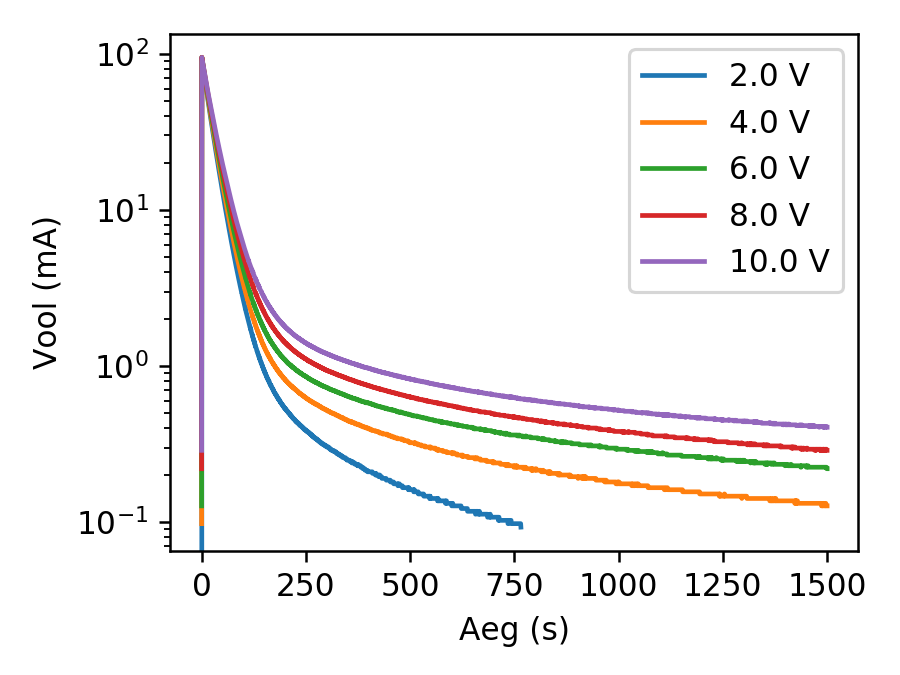

In [76]:
fail = 'kondensaatori_pinge_laeng'
np.save(fail, [U_set] + andmed, allow_pickle=True) # faili laiend .npy lisatakse automaatselt

for U, seeria in zip(U_set, andmed):
    plot(seeria[:,0], 1000 * seeria[:,2], label='%.1f V' % U)
xlabel('Aeg (s)')
ylabel('Vool (mA)')
yscale('log')
legend()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()

Andmete taastamine failist on analoogne:

In [63]:
andmed = np.load('kondensaatori_pinge_laeng.npy', allow_pickle=True)
U_set = andmed[0]
andmed = andmed[1:]

Kondensaatorisse kogunenud elektrilaengu saame jällegi integreerimise teel:

<IPython.core.display.Javascript object>


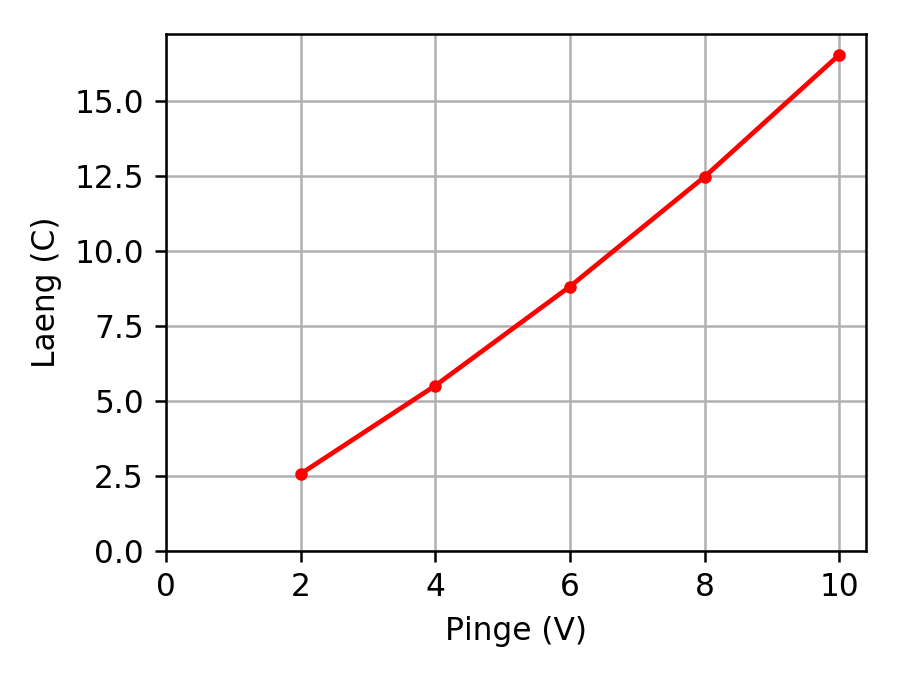

In [72]:
laeng = np.cumsum( [np.trapz(seeria[:,2], seeria[:,0]) for seeria in andmed] )
plot(U_set, laeng, 'r.-')
xlim(left=0)
ylim(bottom=0)
xlabel('Pinge (V)')
ylabel('Laeng (C)')
grid()
tight_layout()
show()

Ootuspäraselt saadud sõltuvus ei ole päris lineaarne. Pigem tuleks lineaarsele liikmele lisada ka ruutliige: $Q=aU+bU^2$, kus $a$ annab mahtuvuse väikeste pingete juures.

Mahtuvus 1.189 F


<IPython.core.display.Javascript object>


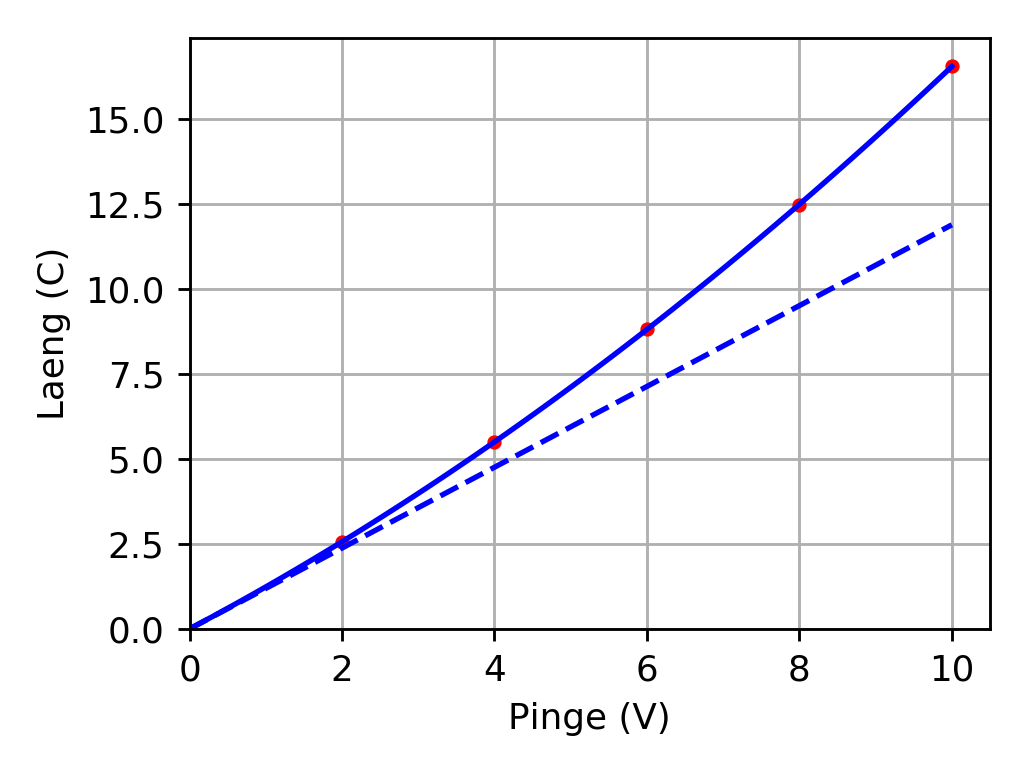

In [52]:
mudel = lambda U, a, b: a*U + b*U*U

a, b = 1, 0.02
(a, b), _ = curve_fit(mudel, U_set, laeng, (a, b))
print('Mahtuvus väikestel pingetel = %.3f F' % a)

U = np.linspace(0, 10, 100)
plot(U_set, laeng, 'r.')
plot(U, mudel(U, a, b), 'b-')
plot(U, a*U, 'b--')
xlim(left=0)
ylim(bottom=0)
xlabel('Pinge (V)')
ylabel('Laeng (C)')
grid()
tight_layout()
savefig(fail + '_mudel.png', bbox_inches='tight')
show()

Kuna $Q$ ja $U$ seos ei ole enam lineaarne, tuleb eristada integraalset mahtuvust $$\frac{Q}{U}=a+bU$$ ja diferentsiaalset mahtuvust $$\frac{dQ}{dU}=a+2bU.$$

<IPython.core.display.Javascript object>


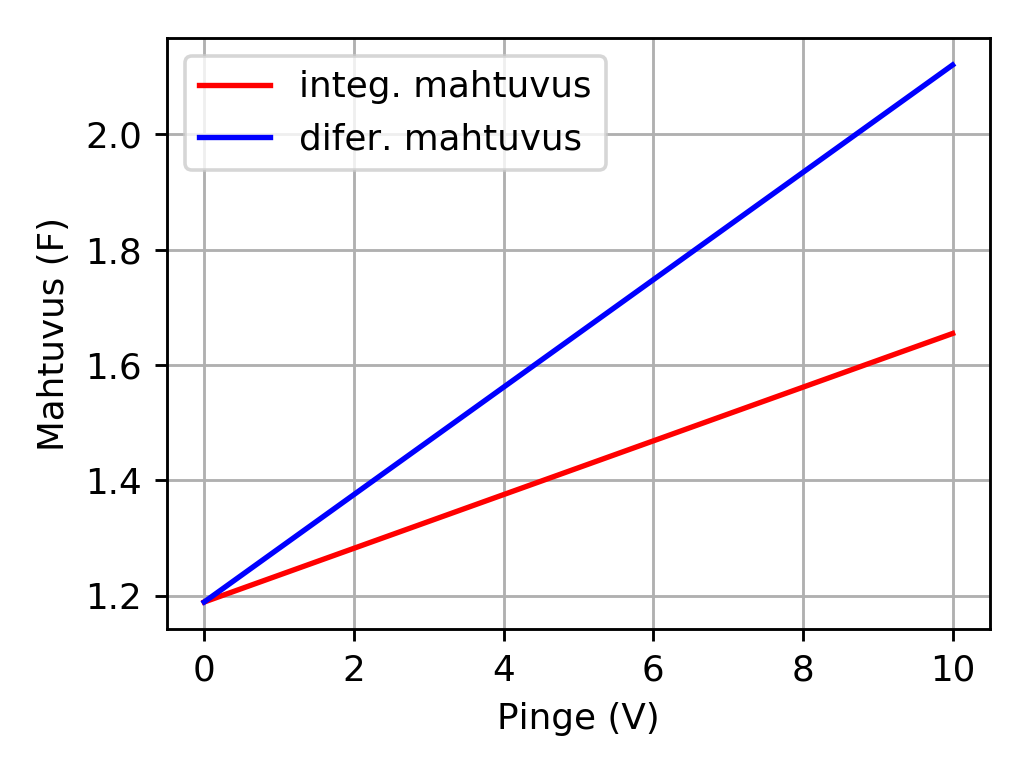

In [60]:
plot(U, a + b * U, 'r-', label='integ. mahtuvus')
plot(U, a + 2 * b * U, 'b-', label='difer. mahtuvus')
xlabel('Pinge (V)')
ylabel('Mahtuvus (F)')
grid()
legend()
tight_layout()
savefig(fail + '_mahtuvus.png', bbox_inches='tight')
show()

### Mäluefekt

<img src="kondensaatori_tühjenemine_mälu_skeem.png" style="height: 9em; float: right; margin-left: 1em;"/>Super- või elektrolüütkondensaatoreid ei ole võimalik lühikese ajaga täiesti tühjaks laadida. Selles veendumiseks teeme järgmise katse. Laeme kondensaatori eelnevalt teatud pingeni ja ootame mõninga aja kuni kondensaatori seisund on stabiliseerunud. Seejärel lülitame külge multimeetri, nagu näidatud joonisel, ja käivitame mõõtmise. Mõne aja pärast lühistame kondensaatori paariks sekundiks, kuni pinge kondensaatoril kukub nulli. Pärast lühise kõrvaldamist hakkab pinge taastuma.

In [41]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        if lugem is not None:
            aeg.append(time.time() - t0)
            pinge.append(lugem)
            print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
            if aeg[-1] > 6000:
                break
        time.sleep(0.1)

aeg = np.array(aeg)
pinge = np.array(pinge)

aeg =    0.4 s;  pinge = 2.1559 V
aeg =    0.8 s;  pinge = 2.1559 V
aeg =    1.4 s;  pinge = 2.1559 V
aeg =    1.8 s;  pinge = 2.1559 V
aeg =    2.3 s;  pinge = 2.1559 V
aeg =    2.9 s;  pinge = 2.1560 V
aeg =    3.4 s;  pinge = 2.1559 V
aeg =    3.8 s;  pinge = 2.1559 V
aeg =    4.4 s;  pinge = 2.1560 V
aeg =    4.9 s;  pinge = 2.1559 V
aeg =    5.3 s;  pinge = 2.1559 V
aeg =    5.9 s;  pinge = 2.1559 V
aeg =    6.4 s;  pinge = 2.1559 V
aeg =    6.8 s;  pinge = 2.1559 V
aeg =    7.4 s;  pinge = 2.1559 V
aeg =    7.9 s;  pinge = 2.1559 V
aeg =    8.3 s;  pinge = 2.1560 V
aeg =    8.9 s;  pinge = 2.1559 V
aeg =    9.4 s;  pinge = 2.1560 V
aeg =    9.8 s;  pinge = 2.1559 V
aeg =   10.4 s;  pinge = 2.1559 V
aeg =   10.9 s;  pinge = 2.1559 V
aeg =   11.3 s;  pinge = 2.1560 V
aeg =   11.9 s;  pinge = 2.1560 V
aeg =   12.4 s;  pinge = 2.1560 V
aeg =   12.8 s;  pinge = 2.1560 V
aeg =   13.4 s;  pinge = 2.1560 V
aeg =   13.9 s;  pinge = 2.1560 V
aeg =   14.4 s;  pinge = 2.1560 V
aeg =   14.9 s

aeg =  120.9 s;  pinge = 0.0840 V
aeg =  121.4 s;  pinge = 0.0840 V
aeg =  121.8 s;  pinge = 0.0856 V
aeg =  122.3 s;  pinge = 0.0864 V
aeg =  122.9 s;  pinge = 0.0872 V
aeg =  123.3 s;  pinge = 0.0872 V
aeg =  123.9 s;  pinge = 0.0887 V
aeg =  124.4 s;  pinge = 0.0894 V
aeg =  124.8 s;  pinge = 0.0901 V
aeg =  125.3 s;  pinge = 0.0901 V
aeg =  125.9 s;  pinge = 0.0916 V
aeg =  126.4 s;  pinge = 0.0923 V
aeg =  126.8 s;  pinge = 0.0930 V
aeg =  127.4 s;  pinge = 0.0930 V
aeg =  127.8 s;  pinge = 0.0944 V
aeg =  128.3 s;  pinge = 0.0951 V
aeg =  128.9 s;  pinge = 0.0957 V
aeg =  129.3 s;  pinge = 0.0964 V
aeg =  129.9 s;  pinge = 0.0971 V
aeg =  130.4 s;  pinge = 0.0971 V
aeg =  130.8 s;  pinge = 0.0984 V
aeg =  131.3 s;  pinge = 0.0990 V
aeg =  131.9 s;  pinge = 0.0997 V
aeg =  132.3 s;  pinge = 0.1003 V
aeg =  132.8 s;  pinge = 0.1009 V
aeg =  133.4 s;  pinge = 0.1016 V
aeg =  133.8 s;  pinge = 0.1022 V
aeg =  134.4 s;  pinge = 0.1022 V
aeg =  134.8 s;  pinge = 0.1034 V
aeg =  135.3 s

aeg =  241.3 s;  pinge = 0.1813 V
aeg =  241.8 s;  pinge = 0.1818 V
aeg =  242.3 s;  pinge = 0.1821 V
aeg =  242.8 s;  pinge = 0.1823 V
aeg =  243.3 s;  pinge = 0.1823 V
aeg =  243.8 s;  pinge = 0.1828 V
aeg =  244.3 s;  pinge = 0.1830 V
aeg =  244.9 s;  pinge = 0.1833 V
aeg =  245.4 s;  pinge = 0.1833 V
aeg =  245.9 s;  pinge = 0.1838 V
aeg =  246.4 s;  pinge = 0.1840 V
aeg =  246.9 s;  pinge = 0.1843 V
aeg =  247.4 s;  pinge = 0.1843 V
aeg =  247.9 s;  pinge = 0.1847 V
aeg =  248.3 s;  pinge = 0.1850 V
aeg =  248.8 s;  pinge = 0.1852 V
aeg =  249.3 s;  pinge = 0.1852 V
aeg =  249.8 s;  pinge = 0.1857 V
aeg =  250.3 s;  pinge = 0.1857 V
aeg =  250.8 s;  pinge = 0.1862 V
aeg =  251.3 s;  pinge = 0.1862 V
aeg =  251.8 s;  pinge = 0.1866 V
aeg =  252.3 s;  pinge = 0.1866 V
aeg =  252.8 s;  pinge = 0.1871 V
aeg =  253.3 s;  pinge = 0.1871 V
aeg =  253.8 s;  pinge = 0.1876 V
aeg =  254.3 s;  pinge = 0.1876 V
aeg =  254.9 s;  pinge = 0.1880 V
aeg =  255.4 s;  pinge = 0.1880 V
aeg =  255.9 s

aeg =  361.9 s;  pinge = 0.2285 V
aeg =  362.3 s;  pinge = 0.2285 V
aeg =  362.8 s;  pinge = 0.2288 V
aeg =  363.4 s;  pinge = 0.2288 V
aeg =  363.8 s;  pinge = 0.2291 V
aeg =  364.3 s;  pinge = 0.2291 V
aeg =  364.9 s;  pinge = 0.2294 V
aeg =  365.3 s;  pinge = 0.2294 V
aeg =  365.8 s;  pinge = 0.2297 V
aeg =  366.4 s;  pinge = 0.2297 V
aeg =  366.8 s;  pinge = 0.2300 V
aeg =  367.3 s;  pinge = 0.2300 V
aeg =  367.9 s;  pinge = 0.2303 V
aeg =  368.3 s;  pinge = 0.2303 V
aeg =  368.8 s;  pinge = 0.2306 V
aeg =  369.4 s;  pinge = 0.2306 V
aeg =  369.8 s;  pinge = 0.2310 V
aeg =  370.4 s;  pinge = 0.2310 V
aeg =  370.8 s;  pinge = 0.2313 V
aeg =  371.3 s;  pinge = 0.2313 V
aeg =  371.9 s;  pinge = 0.2316 V
aeg =  372.3 s;  pinge = 0.2316 V
aeg =  372.8 s;  pinge = 0.2319 V
aeg =  373.4 s;  pinge = 0.2320 V
aeg =  373.8 s;  pinge = 0.2322 V
aeg =  374.3 s;  pinge = 0.2322 V
aeg =  374.9 s;  pinge = 0.2325 V
aeg =  375.3 s;  pinge = 0.2325 V
aeg =  375.8 s;  pinge = 0.2328 V
aeg =  376.4 s

aeg =  482.3 s;  pinge = 0.2607 V
aeg =  482.8 s;  pinge = 0.2609 V
aeg =  483.4 s;  pinge = 0.2610 V
aeg =  483.8 s;  pinge = 0.2611 V
aeg =  484.3 s;  pinge = 0.2611 V
aeg =  484.8 s;  pinge = 0.2614 V
aeg =  485.3 s;  pinge = 0.2614 V
aeg =  485.9 s;  pinge = 0.2616 V
aeg =  486.3 s;  pinge = 0.2616 V
aeg =  486.8 s;  pinge = 0.2618 V
aeg =  487.3 s;  pinge = 0.2618 V
aeg =  487.8 s;  pinge = 0.2621 V
aeg =  488.3 s;  pinge = 0.2621 V
aeg =  488.8 s;  pinge = 0.2623 V
aeg =  489.3 s;  pinge = 0.2623 V
aeg =  489.8 s;  pinge = 0.2625 V
aeg =  490.3 s;  pinge = 0.2625 V
aeg =  490.8 s;  pinge = 0.2627 V
aeg =  491.3 s;  pinge = 0.2627 V
aeg =  491.9 s;  pinge = 0.2630 V
aeg =  492.3 s;  pinge = 0.2630 V
aeg =  492.8 s;  pinge = 0.2632 V
aeg =  493.3 s;  pinge = 0.2632 V
aeg =  493.8 s;  pinge = 0.2634 V
aeg =  494.4 s;  pinge = 0.2634 V
aeg =  494.8 s;  pinge = 0.2636 V
aeg =  495.3 s;  pinge = 0.2636 V
aeg =  495.8 s;  pinge = 0.2639 V
aeg =  496.3 s;  pinge = 0.2640 V
aeg =  496.9 s

aeg =  602.8 s;  pinge = 0.2858 V
aeg =  603.3 s;  pinge = 0.2858 V
aeg =  603.8 s;  pinge = 0.2860 V
aeg =  604.3 s;  pinge = 0.2860 V
aeg =  604.8 s;  pinge = 0.2861 V
aeg =  605.3 s;  pinge = 0.2861 V
aeg =  605.8 s;  pinge = 0.2863 V
aeg =  606.3 s;  pinge = 0.2863 V
aeg =  606.8 s;  pinge = 0.2865 V
aeg =  607.3 s;  pinge = 0.2865 V
aeg =  607.8 s;  pinge = 0.2867 V
aeg =  608.4 s;  pinge = 0.2867 V
aeg =  608.8 s;  pinge = 0.2869 V
aeg =  609.3 s;  pinge = 0.2870 V
aeg =  609.8 s;  pinge = 0.2871 V
aeg =  610.3 s;  pinge = 0.2871 V
aeg =  610.8 s;  pinge = 0.2872 V
aeg =  611.3 s;  pinge = 0.2872 V
aeg =  611.8 s;  pinge = 0.2874 V
aeg =  612.3 s;  pinge = 0.2874 V
aeg =  612.8 s;  pinge = 0.2876 V
aeg =  613.3 s;  pinge = 0.2876 V
aeg =  613.8 s;  pinge = 0.2878 V
aeg =  614.3 s;  pinge = 0.2878 V
aeg =  614.8 s;  pinge = 0.2880 V
aeg =  615.3 s;  pinge = 0.2880 V
aeg =  615.8 s;  pinge = 0.2882 V
aeg =  616.3 s;  pinge = 0.2882 V
aeg =  616.8 s;  pinge = 0.2884 V
aeg =  617.4 s

aeg =  723.3 s;  pinge = 0.3063 V
aeg =  723.8 s;  pinge = 0.3065 V
aeg =  724.3 s;  pinge = 0.3065 V
aeg =  724.8 s;  pinge = 0.3066 V
aeg =  725.3 s;  pinge = 0.3066 V
aeg =  725.8 s;  pinge = 0.3068 V
aeg =  726.3 s;  pinge = 0.3068 V
aeg =  726.8 s;  pinge = 0.3069 V
aeg =  727.3 s;  pinge = 0.3070 V
aeg =  727.8 s;  pinge = 0.3071 V
aeg =  728.3 s;  pinge = 0.3071 V
aeg =  728.8 s;  pinge = 0.3073 V
aeg =  729.3 s;  pinge = 0.3073 V
aeg =  729.8 s;  pinge = 0.3074 V
aeg =  730.3 s;  pinge = 0.3074 V
aeg =  730.8 s;  pinge = 0.3076 V
aeg =  731.3 s;  pinge = 0.3076 V
aeg =  731.8 s;  pinge = 0.3077 V
aeg =  732.3 s;  pinge = 0.3077 V
aeg =  732.7 s;  pinge = 0.3079 V
aeg =  733.3 s;  pinge = 0.3080 V
aeg =  733.8 s;  pinge = 0.3080 V
aeg =  734.3 s;  pinge = 0.3080 V
aeg =  734.8 s;  pinge = 0.3082 V
aeg =  735.3 s;  pinge = 0.3082 V
aeg =  735.8 s;  pinge = 0.3083 V
aeg =  736.3 s;  pinge = 0.3083 V
aeg =  736.8 s;  pinge = 0.3085 V
aeg =  737.3 s;  pinge = 0.3085 V
aeg =  737.8 s

aeg =  843.8 s;  pinge = 0.3241 V
aeg =  844.2 s;  pinge = 0.3241 V
aeg =  844.8 s;  pinge = 0.3243 V
aeg =  845.3 s;  pinge = 0.3243 V
aeg =  845.8 s;  pinge = 0.3244 V
aeg =  846.3 s;  pinge = 0.3244 V
aeg =  846.7 s;  pinge = 0.3246 V
aeg =  847.3 s;  pinge = 0.3246 V
aeg =  847.8 s;  pinge = 0.3247 V
aeg =  848.3 s;  pinge = 0.3247 V
aeg =  848.8 s;  pinge = 0.3248 V
aeg =  849.2 s;  pinge = 0.3248 V
aeg =  849.8 s;  pinge = 0.3250 V
aeg =  850.2 s;  pinge = 0.3250 V
aeg =  850.8 s;  pinge = 0.3251 V
aeg =  851.3 s;  pinge = 0.3251 V
aeg =  851.8 s;  pinge = 0.3252 V
aeg =  852.3 s;  pinge = 0.3252 V
aeg =  852.8 s;  pinge = 0.3254 V
aeg =  853.2 s;  pinge = 0.3254 V
aeg =  853.8 s;  pinge = 0.3255 V
aeg =  854.3 s;  pinge = 0.3255 V
aeg =  854.8 s;  pinge = 0.3257 V
aeg =  855.3 s;  pinge = 0.3257 V
aeg =  855.7 s;  pinge = 0.3258 V
aeg =  856.2 s;  pinge = 0.3258 V
aeg =  856.8 s;  pinge = 0.3259 V
aeg =  857.3 s;  pinge = 0.3260 V
aeg =  857.8 s;  pinge = 0.3261 V
aeg =  858.3 s

aeg =  964.3 s;  pinge = 0.3398 V
aeg =  964.7 s;  pinge = 0.3399 V
aeg =  965.3 s;  pinge = 0.3400 V
aeg =  965.7 s;  pinge = 0.3400 V
aeg =  966.3 s;  pinge = 0.3400 V
aeg =  966.8 s;  pinge = 0.3402 V
aeg =  967.3 s;  pinge = 0.3402 V
aeg =  967.8 s;  pinge = 0.3403 V
aeg =  968.2 s;  pinge = 0.3403 V
aeg =  968.8 s;  pinge = 0.3404 V
aeg =  969.2 s;  pinge = 0.3404 V
aeg =  969.8 s;  pinge = 0.3405 V
aeg =  970.2 s;  pinge = 0.3405 V
aeg =  970.8 s;  pinge = 0.3406 V
aeg =  971.2 s;  pinge = 0.3406 V
aeg =  971.8 s;  pinge = 0.3408 V
aeg =  972.3 s;  pinge = 0.3408 V
aeg =  972.7 s;  pinge = 0.3409 V
aeg =  973.3 s;  pinge = 0.3410 V
aeg =  973.7 s;  pinge = 0.3410 V
aeg =  974.3 s;  pinge = 0.3410 V
aeg =  974.8 s;  pinge = 0.3412 V
aeg =  975.2 s;  pinge = 0.3412 V
aeg =  975.8 s;  pinge = 0.3413 V
aeg =  976.2 s;  pinge = 0.3413 V
aeg =  976.8 s;  pinge = 0.3414 V
aeg =  977.3 s;  pinge = 0.3414 V
aeg =  977.7 s;  pinge = 0.3415 V
aeg =  978.3 s;  pinge = 0.3415 V
aeg =  978.7 s

aeg = 1084.8 s;  pinge = 0.3540 V
aeg = 1085.3 s;  pinge = 0.3540 V
aeg = 1085.7 s;  pinge = 0.3541 V
aeg = 1086.3 s;  pinge = 0.3541 V
aeg = 1086.7 s;  pinge = 0.3542 V
aeg = 1087.3 s;  pinge = 0.3542 V
aeg = 1087.8 s;  pinge = 0.3544 V
aeg = 1088.2 s;  pinge = 0.3544 V
aeg = 1088.7 s;  pinge = 0.3545 V
aeg = 1089.3 s;  pinge = 0.3545 V
aeg = 1089.7 s;  pinge = 0.3546 V
aeg = 1090.2 s;  pinge = 0.3546 V
aeg = 1090.8 s;  pinge = 0.3547 V
aeg = 1091.2 s;  pinge = 0.3547 V
aeg = 1091.8 s;  pinge = 0.3548 V
aeg = 1092.3 s;  pinge = 0.3548 V
aeg = 1092.7 s;  pinge = 0.3549 V
aeg = 1093.3 s;  pinge = 0.3550 V
aeg = 1093.8 s;  pinge = 0.3550 V
aeg = 1094.2 s;  pinge = 0.3550 V
aeg = 1094.8 s;  pinge = 0.3551 V
aeg = 1095.2 s;  pinge = 0.3551 V
aeg = 1095.8 s;  pinge = 0.3553 V
aeg = 1096.2 s;  pinge = 0.3553 V
aeg = 1096.8 s;  pinge = 0.3554 V
aeg = 1097.3 s;  pinge = 0.3554 V
aeg = 1097.7 s;  pinge = 0.3555 V
aeg = 1098.3 s;  pinge = 0.3555 V
aeg = 1098.7 s;  pinge = 0.3556 V
aeg = 1099.3 s

aeg = 1205.2 s;  pinge = 0.3670 V
aeg = 1205.8 s;  pinge = 0.3671 V
aeg = 1206.3 s;  pinge = 0.3671 V
aeg = 1206.7 s;  pinge = 0.3672 V
aeg = 1207.2 s;  pinge = 0.3672 V
aeg = 1207.8 s;  pinge = 0.3673 V
aeg = 1208.2 s;  pinge = 0.3673 V
aeg = 1208.7 s;  pinge = 0.3674 V
aeg = 1209.3 s;  pinge = 0.3674 V
aeg = 1209.7 s;  pinge = 0.3675 V
aeg = 1210.3 s;  pinge = 0.3675 V
aeg = 1210.8 s;  pinge = 0.3676 V
aeg = 1211.2 s;  pinge = 0.3676 V
aeg = 1211.8 s;  pinge = 0.3677 V
aeg = 1212.2 s;  pinge = 0.3677 V
aeg = 1212.8 s;  pinge = 0.3678 V
aeg = 1213.3 s;  pinge = 0.3678 V
aeg = 1213.7 s;  pinge = 0.3679 V
aeg = 1214.3 s;  pinge = 0.3680 V
aeg = 1214.8 s;  pinge = 0.3680 V
aeg = 1215.2 s;  pinge = 0.3680 V
aeg = 1215.7 s;  pinge = 0.3681 V
aeg = 1216.3 s;  pinge = 0.3681 V
aeg = 1216.7 s;  pinge = 0.3682 V
aeg = 1217.3 s;  pinge = 0.3682 V
aeg = 1217.7 s;  pinge = 0.3683 V
aeg = 1218.2 s;  pinge = 0.3683 V
aeg = 1218.7 s;  pinge = 0.3684 V
aeg = 1219.3 s;  pinge = 0.3684 V
aeg = 1219.7 s

aeg = 1325.7 s;  pinge = 0.3790 V
aeg = 1326.2 s;  pinge = 0.3790 V
aeg = 1326.8 s;  pinge = 0.3791 V
aeg = 1327.2 s;  pinge = 0.3791 V
aeg = 1327.7 s;  pinge = 0.3792 V
aeg = 1328.3 s;  pinge = 0.3792 V
aeg = 1328.7 s;  pinge = 0.3794 V
aeg = 1329.2 s;  pinge = 0.3794 V
aeg = 1329.8 s;  pinge = 0.3795 V
aeg = 1330.2 s;  pinge = 0.3795 V
aeg = 1330.7 s;  pinge = 0.3795 V
aeg = 1331.3 s;  pinge = 0.3795 V
aeg = 1331.7 s;  pinge = 0.3796 V
aeg = 1332.2 s;  pinge = 0.3796 V
aeg = 1332.7 s;  pinge = 0.3797 V
aeg = 1333.2 s;  pinge = 0.3797 V
aeg = 1333.7 s;  pinge = 0.3799 V
aeg = 1334.2 s;  pinge = 0.3799 V
aeg = 1334.7 s;  pinge = 0.3799 V
aeg = 1335.3 s;  pinge = 0.3800 V
aeg = 1335.7 s;  pinge = 0.3800 V
aeg = 1336.3 s;  pinge = 0.3800 V
aeg = 1336.7 s;  pinge = 0.3801 V
aeg = 1337.2 s;  pinge = 0.3801 V
aeg = 1337.7 s;  pinge = 0.3802 V
aeg = 1338.2 s;  pinge = 0.3802 V
aeg = 1338.7 s;  pinge = 0.3803 V
aeg = 1339.2 s;  pinge = 0.3803 V
aeg = 1339.7 s;  pinge = 0.3804 V
aeg = 1340.3 s

aeg = 1446.3 s;  pinge = 0.3903 V
aeg = 1446.7 s;  pinge = 0.3903 V
aeg = 1447.2 s;  pinge = 0.3903 V
aeg = 1447.7 s;  pinge = 0.3904 V
aeg = 1448.2 s;  pinge = 0.3904 V
aeg = 1448.7 s;  pinge = 0.3905 V
aeg = 1449.2 s;  pinge = 0.3905 V
aeg = 1449.7 s;  pinge = 0.3906 V
aeg = 1450.2 s;  pinge = 0.3906 V
aeg = 1450.8 s;  pinge = 0.3907 V
aeg = 1451.2 s;  pinge = 0.3907 V
aeg = 1451.7 s;  pinge = 0.3908 V
aeg = 1452.2 s;  pinge = 0.3908 V
aeg = 1452.7 s;  pinge = 0.3909 V
aeg = 1453.2 s;  pinge = 0.3909 V
aeg = 1453.7 s;  pinge = 0.3910 V
aeg = 1454.2 s;  pinge = 0.3910 V
aeg = 1454.7 s;  pinge = 0.3910 V
aeg = 1455.2 s;  pinge = 0.3910 V
aeg = 1455.7 s;  pinge = 0.3911 V
aeg = 1456.2 s;  pinge = 0.3911 V
aeg = 1456.7 s;  pinge = 0.3912 V
aeg = 1457.2 s;  pinge = 0.3912 V
aeg = 1457.7 s;  pinge = 0.3913 V
aeg = 1458.2 s;  pinge = 0.3913 V
aeg = 1458.7 s;  pinge = 0.3914 V
aeg = 1459.2 s;  pinge = 0.3914 V
aeg = 1459.7 s;  pinge = 0.3915 V
aeg = 1460.2 s;  pinge = 0.3915 V
aeg = 1460.7 s

aeg = 1566.7 s;  pinge = 0.4009 V
aeg = 1567.2 s;  pinge = 0.4009 V
aeg = 1567.7 s;  pinge = 0.4009 V
aeg = 1568.2 s;  pinge = 0.4010 V
aeg = 1568.7 s;  pinge = 0.4010 V
aeg = 1569.2 s;  pinge = 0.4010 V
aeg = 1569.7 s;  pinge = 0.4011 V
aeg = 1570.2 s;  pinge = 0.4011 V
aeg = 1570.7 s;  pinge = 0.4012 V
aeg = 1571.2 s;  pinge = 0.4012 V
aeg = 1571.7 s;  pinge = 0.4013 V
aeg = 1572.2 s;  pinge = 0.4013 V
aeg = 1572.6 s;  pinge = 0.4014 V
aeg = 1573.2 s;  pinge = 0.4014 V
aeg = 1573.7 s;  pinge = 0.4014 V
aeg = 1574.1 s;  pinge = 0.4014 V
aeg = 1574.7 s;  pinge = 0.4015 V
aeg = 1575.2 s;  pinge = 0.4015 V
aeg = 1575.6 s;  pinge = 0.4016 V
aeg = 1576.2 s;  pinge = 0.4016 V
aeg = 1576.7 s;  pinge = 0.4017 V
aeg = 1577.2 s;  pinge = 0.4017 V
aeg = 1577.7 s;  pinge = 0.4018 V
aeg = 1578.2 s;  pinge = 0.4018 V
aeg = 1578.7 s;  pinge = 0.4019 V
aeg = 1579.2 s;  pinge = 0.4019 V
aeg = 1579.6 s;  pinge = 0.4019 V
aeg = 1580.2 s;  pinge = 0.4020 V
aeg = 1580.7 s;  pinge = 0.4020 V
aeg = 1581.2 s

aeg = 1687.2 s;  pinge = 0.4108 V
aeg = 1687.7 s;  pinge = 0.4109 V
aeg = 1688.2 s;  pinge = 0.4109 V
aeg = 1688.7 s;  pinge = 0.4109 V
aeg = 1689.2 s;  pinge = 0.4110 V
aeg = 1689.7 s;  pinge = 0.4110 V
aeg = 1690.1 s;  pinge = 0.4110 V
aeg = 1690.7 s;  pinge = 0.4111 V
aeg = 1691.2 s;  pinge = 0.4111 V
aeg = 1691.7 s;  pinge = 0.4112 V
aeg = 1692.2 s;  pinge = 0.4112 V
aeg = 1692.6 s;  pinge = 0.4113 V
aeg = 1693.2 s;  pinge = 0.4113 V
aeg = 1693.7 s;  pinge = 0.4113 V
aeg = 1694.2 s;  pinge = 0.4113 V
aeg = 1694.7 s;  pinge = 0.4114 V
aeg = 1695.1 s;  pinge = 0.4114 V
aeg = 1695.7 s;  pinge = 0.4115 V
aeg = 1696.2 s;  pinge = 0.4115 V
aeg = 1696.7 s;  pinge = 0.4116 V
aeg = 1697.2 s;  pinge = 0.4116 V
aeg = 1697.7 s;  pinge = 0.4117 V
aeg = 1698.2 s;  pinge = 0.4117 V
aeg = 1698.6 s;  pinge = 0.4118 V
aeg = 1699.2 s;  pinge = 0.4118 V
aeg = 1699.7 s;  pinge = 0.4118 V
aeg = 1700.2 s;  pinge = 0.4118 V
aeg = 1700.7 s;  pinge = 0.4119 V
aeg = 1701.2 s;  pinge = 0.4120 V
aeg = 1701.7 s

aeg = 1807.6 s;  pinge = 0.4203 V
aeg = 1808.2 s;  pinge = 0.4203 V
aeg = 1808.6 s;  pinge = 0.4204 V
aeg = 1809.2 s;  pinge = 0.4204 V
aeg = 1809.7 s;  pinge = 0.4204 V
aeg = 1810.1 s;  pinge = 0.4204 V
aeg = 1810.7 s;  pinge = 0.4205 V
aeg = 1811.2 s;  pinge = 0.4205 V
aeg = 1811.6 s;  pinge = 0.4206 V
aeg = 1812.2 s;  pinge = 0.4206 V
aeg = 1812.7 s;  pinge = 0.4207 V
aeg = 1813.2 s;  pinge = 0.4207 V
aeg = 1813.7 s;  pinge = 0.4208 V
aeg = 1814.1 s;  pinge = 0.4208 V
aeg = 1814.7 s;  pinge = 0.4208 V
aeg = 1815.1 s;  pinge = 0.4208 V
aeg = 1815.7 s;  pinge = 0.4209 V
aeg = 1816.2 s;  pinge = 0.4210 V
aeg = 1816.6 s;  pinge = 0.4210 V
aeg = 1817.2 s;  pinge = 0.4210 V
aeg = 1817.6 s;  pinge = 0.4211 V
aeg = 1818.2 s;  pinge = 0.4211 V
aeg = 1818.6 s;  pinge = 0.4211 V
aeg = 1819.2 s;  pinge = 0.4211 V
aeg = 1819.7 s;  pinge = 0.4212 V
aeg = 1820.2 s;  pinge = 0.4212 V
aeg = 1820.7 s;  pinge = 0.4213 V
aeg = 1821.1 s;  pinge = 0.4213 V
aeg = 1821.7 s;  pinge = 0.4214 V
aeg = 1822.2 s

aeg = 1928.2 s;  pinge = 0.4293 V
aeg = 1928.6 s;  pinge = 0.4294 V
aeg = 1929.2 s;  pinge = 0.4294 V
aeg = 1929.7 s;  pinge = 0.4294 V
aeg = 1930.1 s;  pinge = 0.4294 V
aeg = 1930.7 s;  pinge = 0.4295 V
aeg = 1931.1 s;  pinge = 0.4295 V
aeg = 1931.7 s;  pinge = 0.4296 V
aeg = 1932.2 s;  pinge = 0.4296 V
aeg = 1932.6 s;  pinge = 0.4296 V
aeg = 1933.2 s;  pinge = 0.4296 V
aeg = 1933.6 s;  pinge = 0.4297 V
aeg = 1934.1 s;  pinge = 0.4297 V
aeg = 1934.7 s;  pinge = 0.4298 V
aeg = 1935.1 s;  pinge = 0.4298 V
aeg = 1935.6 s;  pinge = 0.4299 V
aeg = 1936.2 s;  pinge = 0.4299 V
aeg = 1936.7 s;  pinge = 0.4299 V
aeg = 1937.1 s;  pinge = 0.4300 V
aeg = 1937.7 s;  pinge = 0.4300 V
aeg = 1938.2 s;  pinge = 0.4300 V
aeg = 1938.6 s;  pinge = 0.4301 V
aeg = 1939.2 s;  pinge = 0.4301 V
aeg = 1939.7 s;  pinge = 0.4302 V
aeg = 1940.1 s;  pinge = 0.4302 V
aeg = 1940.7 s;  pinge = 0.4302 V
aeg = 1941.2 s;  pinge = 0.4302 V
aeg = 1941.6 s;  pinge = 0.4303 V
aeg = 1942.2 s;  pinge = 0.4303 V
aeg = 1942.7 s

aeg = 2048.7 s;  pinge = 0.4379 V
aeg = 2049.2 s;  pinge = 0.4380 V
aeg = 2049.6 s;  pinge = 0.4380 V
aeg = 2050.2 s;  pinge = 0.4380 V
aeg = 2050.7 s;  pinge = 0.4381 V
aeg = 2051.1 s;  pinge = 0.4381 V
aeg = 2051.7 s;  pinge = 0.4381 V
aeg = 2052.1 s;  pinge = 0.4381 V
aeg = 2052.6 s;  pinge = 0.4382 V
aeg = 2053.2 s;  pinge = 0.4382 V
aeg = 2053.6 s;  pinge = 0.4383 V
aeg = 2054.2 s;  pinge = 0.4383 V
aeg = 2054.6 s;  pinge = 0.4383 V
aeg = 2055.2 s;  pinge = 0.4383 V
aeg = 2055.6 s;  pinge = 0.4384 V
aeg = 2056.2 s;  pinge = 0.4384 V
aeg = 2056.7 s;  pinge = 0.4385 V
aeg = 2057.1 s;  pinge = 0.4385 V
aeg = 2057.7 s;  pinge = 0.4385 V
aeg = 2058.1 s;  pinge = 0.4385 V
aeg = 2058.6 s;  pinge = 0.4386 V
aeg = 2059.2 s;  pinge = 0.4386 V
aeg = 2059.6 s;  pinge = 0.4387 V
aeg = 2060.2 s;  pinge = 0.4387 V
aeg = 2060.7 s;  pinge = 0.4388 V
aeg = 2061.1 s;  pinge = 0.4388 V
aeg = 2061.7 s;  pinge = 0.4388 V
aeg = 2062.2 s;  pinge = 0.4388 V
aeg = 2062.6 s;  pinge = 0.4389 V
aeg = 2063.2 s

aeg = 2169.2 s;  pinge = 0.4462 V
aeg = 2169.6 s;  pinge = 0.4462 V
aeg = 2170.1 s;  pinge = 0.4462 V
aeg = 2170.7 s;  pinge = 0.4463 V
aeg = 2171.1 s;  pinge = 0.4463 V
aeg = 2171.6 s;  pinge = 0.4464 V
aeg = 2172.2 s;  pinge = 0.4464 V
aeg = 2172.6 s;  pinge = 0.4464 V
aeg = 2173.1 s;  pinge = 0.4464 V
aeg = 2173.7 s;  pinge = 0.4465 V
aeg = 2174.1 s;  pinge = 0.4465 V
aeg = 2174.6 s;  pinge = 0.4465 V
aeg = 2175.1 s;  pinge = 0.4465 V
aeg = 2175.6 s;  pinge = 0.4466 V
aeg = 2176.1 s;  pinge = 0.4466 V
aeg = 2176.7 s;  pinge = 0.4467 V
aeg = 2177.1 s;  pinge = 0.4467 V
aeg = 2177.6 s;  pinge = 0.4467 V
aeg = 2178.2 s;  pinge = 0.4467 V
aeg = 2178.6 s;  pinge = 0.4468 V
aeg = 2179.2 s;  pinge = 0.4468 V
aeg = 2179.6 s;  pinge = 0.4469 V
aeg = 2180.1 s;  pinge = 0.4469 V
aeg = 2180.7 s;  pinge = 0.4470 V
aeg = 2181.1 s;  pinge = 0.4470 V
aeg = 2181.7 s;  pinge = 0.4470 V
aeg = 2182.1 s;  pinge = 0.4470 V
aeg = 2182.6 s;  pinge = 0.4471 V
aeg = 2183.1 s;  pinge = 0.4471 V
aeg = 2183.6 s

aeg = 2289.6 s;  pinge = 0.4541 V
aeg = 2290.1 s;  pinge = 0.4541 V
aeg = 2290.6 s;  pinge = 0.4541 V
aeg = 2291.1 s;  pinge = 0.4541 V
aeg = 2291.6 s;  pinge = 0.4542 V
aeg = 2292.1 s;  pinge = 0.4542 V
aeg = 2292.7 s;  pinge = 0.4543 V
aeg = 2293.1 s;  pinge = 0.4543 V
aeg = 2293.7 s;  pinge = 0.4544 V
aeg = 2294.1 s;  pinge = 0.4544 V
aeg = 2294.6 s;  pinge = 0.4544 V
aeg = 2295.1 s;  pinge = 0.4544 V
aeg = 2295.6 s;  pinge = 0.4545 V
aeg = 2296.2 s;  pinge = 0.4545 V
aeg = 2296.6 s;  pinge = 0.4546 V
aeg = 2297.2 s;  pinge = 0.4546 V
aeg = 2297.6 s;  pinge = 0.4546 V
aeg = 2298.1 s;  pinge = 0.4546 V
aeg = 2298.6 s;  pinge = 0.4547 V
aeg = 2299.1 s;  pinge = 0.4547 V
aeg = 2299.7 s;  pinge = 0.4547 V
aeg = 2300.1 s;  pinge = 0.4547 V
aeg = 2300.6 s;  pinge = 0.4548 V
aeg = 2301.1 s;  pinge = 0.4548 V
aeg = 2301.6 s;  pinge = 0.4549 V
aeg = 2302.2 s;  pinge = 0.4549 V
aeg = 2302.6 s;  pinge = 0.4549 V
aeg = 2303.1 s;  pinge = 0.4550 V
aeg = 2303.6 s;  pinge = 0.4550 V
aeg = 2304.1 s

aeg = 2410.1 s;  pinge = 0.4617 V
aeg = 2410.6 s;  pinge = 0.4618 V
aeg = 2411.1 s;  pinge = 0.4618 V
aeg = 2411.6 s;  pinge = 0.4618 V
aeg = 2412.1 s;  pinge = 0.4618 V
aeg = 2412.6 s;  pinge = 0.4619 V
aeg = 2413.1 s;  pinge = 0.4619 V
aeg = 2413.6 s;  pinge = 0.4620 V
aeg = 2414.2 s;  pinge = 0.4620 V
aeg = 2414.6 s;  pinge = 0.4620 V
aeg = 2415.1 s;  pinge = 0.4620 V
aeg = 2415.6 s;  pinge = 0.4621 V
aeg = 2416.1 s;  pinge = 0.4621 V
aeg = 2416.6 s;  pinge = 0.4621 V
aeg = 2417.2 s;  pinge = 0.4621 V
aeg = 2417.6 s;  pinge = 0.4622 V
aeg = 2418.1 s;  pinge = 0.4622 V
aeg = 2418.6 s;  pinge = 0.4623 V
aeg = 2419.1 s;  pinge = 0.4623 V
aeg = 2419.6 s;  pinge = 0.4623 V
aeg = 2420.1 s;  pinge = 0.4623 V
aeg = 2420.7 s;  pinge = 0.4624 V
aeg = 2421.1 s;  pinge = 0.4624 V
aeg = 2421.6 s;  pinge = 0.4624 V
aeg = 2422.1 s;  pinge = 0.4624 V
aeg = 2422.6 s;  pinge = 0.4625 V
aeg = 2423.1 s;  pinge = 0.4625 V
aeg = 2423.6 s;  pinge = 0.4626 V
aeg = 2424.1 s;  pinge = 0.4626 V
aeg = 2424.6 s

aeg = 2530.6 s;  pinge = 0.4691 V
aeg = 2531.1 s;  pinge = 0.4691 V
aeg = 2531.6 s;  pinge = 0.4691 V
aeg = 2532.1 s;  pinge = 0.4691 V
aeg = 2532.6 s;  pinge = 0.4692 V
aeg = 2533.1 s;  pinge = 0.4692 V
aeg = 2533.5 s;  pinge = 0.4693 V
aeg = 2534.1 s;  pinge = 0.4693 V
aeg = 2534.6 s;  pinge = 0.4693 V
aeg = 2535.1 s;  pinge = 0.4693 V
aeg = 2535.6 s;  pinge = 0.4694 V
aeg = 2536.1 s;  pinge = 0.4694 V
aeg = 2536.6 s;  pinge = 0.4694 V
aeg = 2537.1 s;  pinge = 0.4694 V
aeg = 2537.6 s;  pinge = 0.4695 V
aeg = 2538.1 s;  pinge = 0.4695 V
aeg = 2538.6 s;  pinge = 0.4696 V
aeg = 2539.1 s;  pinge = 0.4696 V
aeg = 2539.6 s;  pinge = 0.4696 V
aeg = 2540.1 s;  pinge = 0.4696 V
aeg = 2540.5 s;  pinge = 0.4697 V
aeg = 2541.1 s;  pinge = 0.4697 V
aeg = 2541.6 s;  pinge = 0.4697 V
aeg = 2542.0 s;  pinge = 0.4697 V
aeg = 2542.6 s;  pinge = 0.4698 V
aeg = 2543.1 s;  pinge = 0.4698 V
aeg = 2543.6 s;  pinge = 0.4699 V
aeg = 2544.1 s;  pinge = 0.4699 V
aeg = 2544.6 s;  pinge = 0.4699 V
aeg = 2545.1 s

aeg = 2651.1 s;  pinge = 0.4762 V
aeg = 2651.6 s;  pinge = 0.4762 V
aeg = 2652.0 s;  pinge = 0.4762 V
aeg = 2652.6 s;  pinge = 0.4763 V
aeg = 2653.1 s;  pinge = 0.4763 V
aeg = 2653.6 s;  pinge = 0.4763 V
aeg = 2654.1 s;  pinge = 0.4763 V
aeg = 2654.6 s;  pinge = 0.4764 V
aeg = 2655.1 s;  pinge = 0.4764 V
aeg = 2655.5 s;  pinge = 0.4764 V
aeg = 2656.1 s;  pinge = 0.4764 V
aeg = 2656.6 s;  pinge = 0.4765 V
aeg = 2657.1 s;  pinge = 0.4765 V
aeg = 2657.6 s;  pinge = 0.4766 V
aeg = 2658.1 s;  pinge = 0.4766 V
aeg = 2658.6 s;  pinge = 0.4766 V
aeg = 2659.1 s;  pinge = 0.4766 V
aeg = 2659.6 s;  pinge = 0.4767 V
aeg = 2660.1 s;  pinge = 0.4767 V
aeg = 2660.6 s;  pinge = 0.4767 V
aeg = 2661.1 s;  pinge = 0.4767 V
aeg = 2661.6 s;  pinge = 0.4768 V
aeg = 2662.1 s;  pinge = 0.4768 V
aeg = 2662.6 s;  pinge = 0.4768 V
aeg = 2663.1 s;  pinge = 0.4768 V
aeg = 2663.6 s;  pinge = 0.4769 V
aeg = 2664.1 s;  pinge = 0.4769 V
aeg = 2664.5 s;  pinge = 0.4770 V
aeg = 2665.1 s;  pinge = 0.4770 V
aeg = 2665.6 s

aeg = 2771.6 s;  pinge = 0.4831 V
aeg = 2772.0 s;  pinge = 0.4831 V
aeg = 2772.6 s;  pinge = 0.4831 V
aeg = 2773.0 s;  pinge = 0.4831 V
aeg = 2773.6 s;  pinge = 0.4832 V
aeg = 2774.0 s;  pinge = 0.4832 V
aeg = 2774.6 s;  pinge = 0.4832 V
aeg = 2775.1 s;  pinge = 0.4832 V
aeg = 2775.5 s;  pinge = 0.4833 V
aeg = 2776.0 s;  pinge = 0.4833 V
aeg = 2776.6 s;  pinge = 0.4833 V
aeg = 2777.0 s;  pinge = 0.4833 V
aeg = 2777.6 s;  pinge = 0.4834 V
aeg = 2778.1 s;  pinge = 0.4834 V
aeg = 2778.5 s;  pinge = 0.4834 V
aeg = 2779.1 s;  pinge = 0.4834 V
aeg = 2779.6 s;  pinge = 0.4835 V
aeg = 2780.0 s;  pinge = 0.4835 V
aeg = 2780.6 s;  pinge = 0.4835 V
aeg = 2781.1 s;  pinge = 0.4835 V
aeg = 2781.5 s;  pinge = 0.4836 V
aeg = 2782.1 s;  pinge = 0.4836 V
aeg = 2782.6 s;  pinge = 0.4837 V
aeg = 2783.0 s;  pinge = 0.4837 V
aeg = 2783.6 s;  pinge = 0.4837 V
aeg = 2784.0 s;  pinge = 0.4837 V
aeg = 2784.6 s;  pinge = 0.4837 V
aeg = 2785.1 s;  pinge = 0.4837 V
aeg = 2785.5 s;  pinge = 0.4838 V
aeg = 2786.1 s

aeg = 2892.0 s;  pinge = 0.4897 V
aeg = 2892.5 s;  pinge = 0.4897 V
aeg = 2893.1 s;  pinge = 0.4897 V
aeg = 2893.5 s;  pinge = 0.4898 V
aeg = 2894.1 s;  pinge = 0.4898 V
aeg = 2894.5 s;  pinge = 0.4898 V
aeg = 2895.1 s;  pinge = 0.4898 V
aeg = 2895.6 s;  pinge = 0.4899 V
aeg = 2896.0 s;  pinge = 0.4899 V
aeg = 2896.5 s;  pinge = 0.4899 V
aeg = 2897.1 s;  pinge = 0.4900 V
aeg = 2897.5 s;  pinge = 0.4900 V
aeg = 2898.1 s;  pinge = 0.4900 V
aeg = 2898.6 s;  pinge = 0.4900 V
aeg = 2899.0 s;  pinge = 0.4900 V
aeg = 2899.6 s;  pinge = 0.4901 V
aeg = 2900.0 s;  pinge = 0.4901 V
aeg = 2900.5 s;  pinge = 0.4901 V
aeg = 2901.1 s;  pinge = 0.4901 V
aeg = 2901.5 s;  pinge = 0.4902 V
aeg = 2902.1 s;  pinge = 0.4902 V
aeg = 2902.5 s;  pinge = 0.4903 V
aeg = 2903.1 s;  pinge = 0.4903 V
aeg = 2903.6 s;  pinge = 0.4903 V
aeg = 2904.0 s;  pinge = 0.4903 V
aeg = 2904.6 s;  pinge = 0.4904 V
aeg = 2905.1 s;  pinge = 0.4904 V
aeg = 2905.5 s;  pinge = 0.4904 V
aeg = 2906.1 s;  pinge = 0.4904 V
aeg = 2906.5 s

aeg = 3012.5 s;  pinge = 0.4961 V
aeg = 3013.0 s;  pinge = 0.4961 V
aeg = 3013.6 s;  pinge = 0.4962 V
aeg = 3014.0 s;  pinge = 0.4962 V
aeg = 3014.6 s;  pinge = 0.4962 V
aeg = 3015.1 s;  pinge = 0.4962 V
aeg = 3015.5 s;  pinge = 0.4963 V
aeg = 3016.1 s;  pinge = 0.4963 V
aeg = 3016.5 s;  pinge = 0.4963 V
aeg = 3017.1 s;  pinge = 0.4963 V
aeg = 3017.5 s;  pinge = 0.4964 V
aeg = 3018.0 s;  pinge = 0.4964 V
aeg = 3018.6 s;  pinge = 0.4964 V
aeg = 3019.0 s;  pinge = 0.4964 V
aeg = 3019.5 s;  pinge = 0.4965 V
aeg = 3020.1 s;  pinge = 0.4965 V
aeg = 3020.5 s;  pinge = 0.4965 V
aeg = 3021.1 s;  pinge = 0.4965 V
aeg = 3021.5 s;  pinge = 0.4966 V
aeg = 3022.0 s;  pinge = 0.4966 V
aeg = 3022.5 s;  pinge = 0.4966 V
aeg = 3023.0 s;  pinge = 0.4966 V
aeg = 3023.6 s;  pinge = 0.4967 V
aeg = 3024.0 s;  pinge = 0.4967 V
aeg = 3024.6 s;  pinge = 0.4968 V
aeg = 3025.0 s;  pinge = 0.4968 V
aeg = 3025.5 s;  pinge = 0.4968 V
aeg = 3026.1 s;  pinge = 0.4968 V
aeg = 3026.5 s;  pinge = 0.4969 V
aeg = 3027.1 s

aeg = 3133.0 s;  pinge = 0.5024 V
aeg = 3133.6 s;  pinge = 0.5024 V
aeg = 3134.0 s;  pinge = 0.5024 V
aeg = 3134.5 s;  pinge = 0.5025 V
aeg = 3135.1 s;  pinge = 0.5025 V
aeg = 3135.5 s;  pinge = 0.5025 V
aeg = 3136.1 s;  pinge = 0.5025 V
aeg = 3136.5 s;  pinge = 0.5026 V
aeg = 3137.0 s;  pinge = 0.5026 V
aeg = 3137.6 s;  pinge = 0.5026 V
aeg = 3138.0 s;  pinge = 0.5026 V
aeg = 3138.5 s;  pinge = 0.5027 V
aeg = 3139.1 s;  pinge = 0.5027 V
aeg = 3139.5 s;  pinge = 0.5027 V
aeg = 3140.0 s;  pinge = 0.5027 V
aeg = 3140.6 s;  pinge = 0.5028 V
aeg = 3141.0 s;  pinge = 0.5028 V
aeg = 3141.5 s;  pinge = 0.5028 V
aeg = 3142.1 s;  pinge = 0.5028 V
aeg = 3142.5 s;  pinge = 0.5029 V
aeg = 3143.1 s;  pinge = 0.5029 V
aeg = 3143.5 s;  pinge = 0.5029 V
aeg = 3144.0 s;  pinge = 0.5029 V
aeg = 3144.5 s;  pinge = 0.5030 V
aeg = 3145.0 s;  pinge = 0.5030 V
aeg = 3145.6 s;  pinge = 0.5030 V
aeg = 3146.0 s;  pinge = 0.5030 V
aeg = 3146.5 s;  pinge = 0.5031 V
aeg = 3147.1 s;  pinge = 0.5031 V
aeg = 3147.5 s

aeg = 3253.6 s;  pinge = 0.5084 V
aeg = 3254.0 s;  pinge = 0.5084 V
aeg = 3254.5 s;  pinge = 0.5085 V
aeg = 3255.1 s;  pinge = 0.5085 V
aeg = 3255.5 s;  pinge = 0.5086 V
aeg = 3256.0 s;  pinge = 0.5086 V
aeg = 3256.5 s;  pinge = 0.5086 V
aeg = 3257.0 s;  pinge = 0.5086 V
aeg = 3257.6 s;  pinge = 0.5087 V
aeg = 3258.0 s;  pinge = 0.5087 V
aeg = 3258.5 s;  pinge = 0.5087 V
aeg = 3259.0 s;  pinge = 0.5087 V
aeg = 3259.5 s;  pinge = 0.5088 V
aeg = 3260.0 s;  pinge = 0.5088 V
aeg = 3260.5 s;  pinge = 0.5088 V
aeg = 3261.0 s;  pinge = 0.5088 V
aeg = 3261.6 s;  pinge = 0.5088 V
aeg = 3262.0 s;  pinge = 0.5088 V
aeg = 3262.5 s;  pinge = 0.5089 V
aeg = 3263.1 s;  pinge = 0.5089 V
aeg = 3263.5 s;  pinge = 0.5090 V
aeg = 3264.0 s;  pinge = 0.5090 V
aeg = 3264.6 s;  pinge = 0.5090 V
aeg = 3265.0 s;  pinge = 0.5090 V
aeg = 3265.5 s;  pinge = 0.5090 V
aeg = 3266.0 s;  pinge = 0.5090 V
aeg = 3266.5 s;  pinge = 0.5091 V
aeg = 3267.1 s;  pinge = 0.5091 V
aeg = 3267.5 s;  pinge = 0.5092 V
aeg = 3268.0 s

aeg = 3374.0 s;  pinge = 0.5143 V
aeg = 3374.5 s;  pinge = 0.5144 V
aeg = 3375.0 s;  pinge = 0.5144 V
aeg = 3375.5 s;  pinge = 0.5144 V
aeg = 3376.0 s;  pinge = 0.5144 V
aeg = 3376.5 s;  pinge = 0.5145 V
aeg = 3377.0 s;  pinge = 0.5145 V
aeg = 3377.5 s;  pinge = 0.5145 V
aeg = 3378.0 s;  pinge = 0.5145 V
aeg = 3378.5 s;  pinge = 0.5146 V
aeg = 3379.0 s;  pinge = 0.5146 V
aeg = 3379.5 s;  pinge = 0.5146 V
aeg = 3380.0 s;  pinge = 0.5146 V
aeg = 3380.5 s;  pinge = 0.5147 V
aeg = 3381.0 s;  pinge = 0.5147 V
aeg = 3381.4 s;  pinge = 0.5147 V
aeg = 3382.0 s;  pinge = 0.5147 V
aeg = 3382.5 s;  pinge = 0.5148 V
aeg = 3383.0 s;  pinge = 0.5148 V
aeg = 3383.5 s;  pinge = 0.5148 V
aeg = 3384.0 s;  pinge = 0.5148 V
aeg = 3384.5 s;  pinge = 0.5149 V
aeg = 3384.9 s;  pinge = 0.5149 V
aeg = 3385.5 s;  pinge = 0.5149 V
aeg = 3386.0 s;  pinge = 0.5149 V
aeg = 3386.5 s;  pinge = 0.5150 V
aeg = 3387.0 s;  pinge = 0.5150 V
aeg = 3387.5 s;  pinge = 0.5150 V
aeg = 3387.9 s;  pinge = 0.5150 V
aeg = 3388.5 s

aeg = 3494.4 s;  pinge = 0.5201 V
aeg = 3495.0 s;  pinge = 0.5201 V
aeg = 3495.4 s;  pinge = 0.5202 V
aeg = 3496.0 s;  pinge = 0.5202 V
aeg = 3496.5 s;  pinge = 0.5202 V
aeg = 3497.0 s;  pinge = 0.5202 V
aeg = 3497.5 s;  pinge = 0.5202 V
aeg = 3497.9 s;  pinge = 0.5202 V
aeg = 3498.5 s;  pinge = 0.5203 V
aeg = 3499.0 s;  pinge = 0.5203 V
aeg = 3499.5 s;  pinge = 0.5203 V
aeg = 3500.0 s;  pinge = 0.5203 V
aeg = 3500.5 s;  pinge = 0.5204 V
aeg = 3500.9 s;  pinge = 0.5204 V
aeg = 3501.5 s;  pinge = 0.5205 V
aeg = 3502.0 s;  pinge = 0.5205 V
aeg = 3502.4 s;  pinge = 0.5205 V
aeg = 3503.0 s;  pinge = 0.5205 V
aeg = 3503.5 s;  pinge = 0.5205 V
aeg = 3503.9 s;  pinge = 0.5205 V
aeg = 3504.5 s;  pinge = 0.5206 V
aeg = 3505.0 s;  pinge = 0.5206 V
aeg = 3505.4 s;  pinge = 0.5206 V
aeg = 3506.0 s;  pinge = 0.5206 V
aeg = 3506.5 s;  pinge = 0.5207 V
aeg = 3506.9 s;  pinge = 0.5207 V
aeg = 3507.5 s;  pinge = 0.5207 V
aeg = 3508.0 s;  pinge = 0.5207 V
aeg = 3508.4 s;  pinge = 0.5208 V
aeg = 3509.0 s

aeg = 3614.9 s;  pinge = 0.5257 V
aeg = 3615.5 s;  pinge = 0.5257 V
aeg = 3616.0 s;  pinge = 0.5257 V
aeg = 3616.4 s;  pinge = 0.5258 V
aeg = 3617.0 s;  pinge = 0.5258 V
aeg = 3617.5 s;  pinge = 0.5258 V
aeg = 3617.9 s;  pinge = 0.5258 V
aeg = 3618.5 s;  pinge = 0.5259 V
aeg = 3619.0 s;  pinge = 0.5259 V
aeg = 3619.4 s;  pinge = 0.5259 V
aeg = 3620.0 s;  pinge = 0.5259 V
aeg = 3620.5 s;  pinge = 0.5260 V
aeg = 3621.0 s;  pinge = 0.5260 V
aeg = 3621.5 s;  pinge = 0.5260 V
aeg = 3622.0 s;  pinge = 0.5260 V
aeg = 3622.5 s;  pinge = 0.5261 V
aeg = 3623.0 s;  pinge = 0.5261 V
aeg = 3623.5 s;  pinge = 0.5261 V
aeg = 3623.9 s;  pinge = 0.5261 V
aeg = 3624.5 s;  pinge = 0.5262 V
aeg = 3625.0 s;  pinge = 0.5262 V
aeg = 3625.4 s;  pinge = 0.5262 V
aeg = 3626.0 s;  pinge = 0.5262 V
aeg = 3626.5 s;  pinge = 0.5263 V
aeg = 3626.9 s;  pinge = 0.5263 V
aeg = 3627.5 s;  pinge = 0.5263 V
aeg = 3628.0 s;  pinge = 0.5263 V
aeg = 3628.5 s;  pinge = 0.5263 V
aeg = 3629.0 s;  pinge = 0.5263 V
aeg = 3629.5 s

aeg = 3735.5 s;  pinge = 0.5312 V
aeg = 3735.9 s;  pinge = 0.5312 V
aeg = 3736.5 s;  pinge = 0.5312 V
aeg = 3737.0 s;  pinge = 0.5312 V
aeg = 3737.4 s;  pinge = 0.5313 V
aeg = 3738.0 s;  pinge = 0.5313 V
aeg = 3738.5 s;  pinge = 0.5313 V
aeg = 3738.9 s;  pinge = 0.5313 V
aeg = 3739.5 s;  pinge = 0.5314 V
aeg = 3740.0 s;  pinge = 0.5314 V
aeg = 3740.4 s;  pinge = 0.5314 V
aeg = 3741.0 s;  pinge = 0.5314 V
aeg = 3741.4 s;  pinge = 0.5314 V
aeg = 3741.9 s;  pinge = 0.5314 V
aeg = 3742.5 s;  pinge = 0.5315 V
aeg = 3742.9 s;  pinge = 0.5315 V
aeg = 3743.5 s;  pinge = 0.5316 V
aeg = 3744.0 s;  pinge = 0.5316 V
aeg = 3744.4 s;  pinge = 0.5316 V
aeg = 3745.0 s;  pinge = 0.5316 V
aeg = 3745.4 s;  pinge = 0.5316 V
aeg = 3746.0 s;  pinge = 0.5316 V
aeg = 3746.5 s;  pinge = 0.5317 V
aeg = 3746.9 s;  pinge = 0.5317 V
aeg = 3747.5 s;  pinge = 0.5317 V
aeg = 3748.0 s;  pinge = 0.5317 V
aeg = 3748.4 s;  pinge = 0.5318 V
aeg = 3749.0 s;  pinge = 0.5318 V
aeg = 3749.5 s;  pinge = 0.5318 V
aeg = 3749.9 s

aeg = 3856.0 s;  pinge = 0.5365 V
aeg = 3856.4 s;  pinge = 0.5365 V
aeg = 3857.0 s;  pinge = 0.5365 V
aeg = 3857.5 s;  pinge = 0.5366 V
aeg = 3857.9 s;  pinge = 0.5366 V
aeg = 3858.5 s;  pinge = 0.5366 V
aeg = 3858.9 s;  pinge = 0.5366 V
aeg = 3859.5 s;  pinge = 0.5367 V
aeg = 3860.0 s;  pinge = 0.5367 V
aeg = 3860.4 s;  pinge = 0.5367 V
aeg = 3860.9 s;  pinge = 0.5367 V
aeg = 3861.5 s;  pinge = 0.5368 V
aeg = 3861.9 s;  pinge = 0.5368 V
aeg = 3862.4 s;  pinge = 0.5368 V
aeg = 3863.0 s;  pinge = 0.5368 V
aeg = 3863.4 s;  pinge = 0.5368 V
aeg = 3864.0 s;  pinge = 0.5368 V
aeg = 3864.5 s;  pinge = 0.5369 V
aeg = 3864.9 s;  pinge = 0.5369 V
aeg = 3865.5 s;  pinge = 0.5369 V
aeg = 3865.9 s;  pinge = 0.5369 V
aeg = 3866.4 s;  pinge = 0.5370 V
aeg = 3867.0 s;  pinge = 0.5370 V
aeg = 3867.4 s;  pinge = 0.5370 V
aeg = 3867.9 s;  pinge = 0.5370 V
aeg = 3868.5 s;  pinge = 0.5371 V
aeg = 3868.9 s;  pinge = 0.5371 V
aeg = 3869.4 s;  pinge = 0.5371 V
aeg = 3870.0 s;  pinge = 0.5371 V
aeg = 3870.4 s

aeg = 3976.4 s;  pinge = 0.5417 V
aeg = 3977.0 s;  pinge = 0.5417 V
aeg = 3977.4 s;  pinge = 0.5418 V
aeg = 3978.0 s;  pinge = 0.5418 V
aeg = 3978.4 s;  pinge = 0.5418 V
aeg = 3978.9 s;  pinge = 0.5418 V
aeg = 3979.4 s;  pinge = 0.5418 V
aeg = 3979.9 s;  pinge = 0.5418 V
aeg = 3980.5 s;  pinge = 0.5419 V
aeg = 3980.9 s;  pinge = 0.5419 V
aeg = 3981.5 s;  pinge = 0.5419 V
aeg = 3981.9 s;  pinge = 0.5419 V
aeg = 3982.5 s;  pinge = 0.5419 V
aeg = 3982.9 s;  pinge = 0.5420 V
aeg = 3983.4 s;  pinge = 0.5420 V
aeg = 3984.0 s;  pinge = 0.5420 V
aeg = 3984.4 s;  pinge = 0.5421 V
aeg = 3985.0 s;  pinge = 0.5421 V
aeg = 3985.4 s;  pinge = 0.5421 V
aeg = 3986.0 s;  pinge = 0.5421 V
aeg = 3986.4 s;  pinge = 0.5421 V
aeg = 3986.9 s;  pinge = 0.5421 V
aeg = 3987.5 s;  pinge = 0.5422 V
aeg = 3987.9 s;  pinge = 0.5422 V
aeg = 3988.4 s;  pinge = 0.5422 V
aeg = 3989.0 s;  pinge = 0.5422 V
aeg = 3989.4 s;  pinge = 0.5423 V
aeg = 3989.9 s;  pinge = 0.5423 V
aeg = 3990.5 s;  pinge = 0.5423 V
aeg = 3990.9 s

aeg = 4096.9 s;  pinge = 0.5468 V
aeg = 4097.4 s;  pinge = 0.5468 V
aeg = 4098.0 s;  pinge = 0.5468 V
aeg = 4098.4 s;  pinge = 0.5468 V
aeg = 4098.9 s;  pinge = 0.5468 V
aeg = 4099.4 s;  pinge = 0.5469 V
aeg = 4099.9 s;  pinge = 0.5469 V
aeg = 4100.5 s;  pinge = 0.5469 V
aeg = 4100.9 s;  pinge = 0.5470 V
aeg = 4101.4 s;  pinge = 0.5470 V
aeg = 4102.0 s;  pinge = 0.5470 V
aeg = 4102.4 s;  pinge = 0.5470 V
aeg = 4103.0 s;  pinge = 0.5470 V
aeg = 4103.4 s;  pinge = 0.5471 V
aeg = 4103.9 s;  pinge = 0.5471 V
aeg = 4104.4 s;  pinge = 0.5471 V
aeg = 4104.9 s;  pinge = 0.5471 V
aeg = 4105.5 s;  pinge = 0.5471 V
aeg = 4105.9 s;  pinge = 0.5471 V
aeg = 4106.4 s;  pinge = 0.5472 V
aeg = 4106.9 s;  pinge = 0.5472 V
aeg = 4107.4 s;  pinge = 0.5472 V
aeg = 4108.0 s;  pinge = 0.5472 V
aeg = 4108.4 s;  pinge = 0.5472 V
aeg = 4109.0 s;  pinge = 0.5472 V
aeg = 4109.4 s;  pinge = 0.5473 V
aeg = 4109.9 s;  pinge = 0.5473 V
aeg = 4110.5 s;  pinge = 0.5474 V
aeg = 4110.9 s;  pinge = 0.5474 V
aeg = 4111.5 s

aeg = 4217.4 s;  pinge = 0.5518 V
aeg = 4217.9 s;  pinge = 0.5518 V
aeg = 4218.5 s;  pinge = 0.5518 V
aeg = 4218.9 s;  pinge = 0.5518 V
aeg = 4219.4 s;  pinge = 0.5519 V
aeg = 4219.9 s;  pinge = 0.5519 V
aeg = 4220.4 s;  pinge = 0.5519 V
aeg = 4220.9 s;  pinge = 0.5519 V
aeg = 4221.4 s;  pinge = 0.5519 V
aeg = 4222.0 s;  pinge = 0.5519 V
aeg = 4222.4 s;  pinge = 0.5520 V
aeg = 4222.9 s;  pinge = 0.5520 V
aeg = 4223.5 s;  pinge = 0.5520 V
aeg = 4223.9 s;  pinge = 0.5520 V
aeg = 4224.4 s;  pinge = 0.5520 V
aeg = 4224.9 s;  pinge = 0.5520 V
aeg = 4225.4 s;  pinge = 0.5521 V
aeg = 4226.0 s;  pinge = 0.5521 V
aeg = 4226.4 s;  pinge = 0.5521 V
aeg = 4227.0 s;  pinge = 0.5521 V
aeg = 4227.4 s;  pinge = 0.5522 V
aeg = 4227.9 s;  pinge = 0.5522 V
aeg = 4228.5 s;  pinge = 0.5522 V
aeg = 4228.9 s;  pinge = 0.5522 V
aeg = 4229.4 s;  pinge = 0.5522 V
aeg = 4230.0 s;  pinge = 0.5522 V
aeg = 4230.4 s;  pinge = 0.5523 V
aeg = 4230.9 s;  pinge = 0.5523 V
aeg = 4231.4 s;  pinge = 0.5524 V
aeg = 4231.9 s

aeg = 4337.9 s;  pinge = 0.5566 V
aeg = 4338.4 s;  pinge = 0.5566 V
aeg = 4338.9 s;  pinge = 0.5566 V
aeg = 4339.4 s;  pinge = 0.5567 V
aeg = 4339.9 s;  pinge = 0.5567 V
aeg = 4340.4 s;  pinge = 0.5567 V
aeg = 4340.9 s;  pinge = 0.5567 V
aeg = 4341.4 s;  pinge = 0.5567 V
aeg = 4341.9 s;  pinge = 0.5567 V
aeg = 4342.4 s;  pinge = 0.5568 V
aeg = 4342.9 s;  pinge = 0.5568 V
aeg = 4343.4 s;  pinge = 0.5568 V
aeg = 4343.9 s;  pinge = 0.5568 V
aeg = 4344.4 s;  pinge = 0.5569 V
aeg = 4344.9 s;  pinge = 0.5569 V
aeg = 4345.4 s;  pinge = 0.5569 V
aeg = 4345.9 s;  pinge = 0.5569 V
aeg = 4346.4 s;  pinge = 0.5569 V
aeg = 4346.9 s;  pinge = 0.5570 V
aeg = 4347.3 s;  pinge = 0.5570 V
aeg = 4347.9 s;  pinge = 0.5570 V
aeg = 4348.4 s;  pinge = 0.5571 V
aeg = 4348.9 s;  pinge = 0.5571 V
aeg = 4349.4 s;  pinge = 0.5570 V
aeg = 4349.9 s;  pinge = 0.5570 V
aeg = 4350.4 s;  pinge = 0.5571 V
aeg = 4350.9 s;  pinge = 0.5571 V
aeg = 4351.4 s;  pinge = 0.5571 V
aeg = 4351.9 s;  pinge = 0.5571 V
aeg = 4352.4 s

aeg = 4458.4 s;  pinge = 0.5613 V
aeg = 4458.9 s;  pinge = 0.5613 V
aeg = 4459.3 s;  pinge = 0.5614 V
aeg = 4459.8 s;  pinge = 0.5614 V
aeg = 4460.3 s;  pinge = 0.5614 V
aeg = 4460.8 s;  pinge = 0.5614 V
aeg = 4461.3 s;  pinge = 0.5615 V
aeg = 4461.9 s;  pinge = 0.5615 V
aeg = 4462.4 s;  pinge = 0.5615 V
aeg = 4462.9 s;  pinge = 0.5615 V
aeg = 4463.4 s;  pinge = 0.5615 V
aeg = 4463.9 s;  pinge = 0.5615 V
aeg = 4464.4 s;  pinge = 0.5616 V
aeg = 4464.9 s;  pinge = 0.5616 V
aeg = 4465.4 s;  pinge = 0.5616 V
aeg = 4465.9 s;  pinge = 0.5616 V
aeg = 4466.4 s;  pinge = 0.5616 V
aeg = 4466.9 s;  pinge = 0.5616 V
aeg = 4467.4 s;  pinge = 0.5617 V
aeg = 4467.9 s;  pinge = 0.5617 V
aeg = 4468.4 s;  pinge = 0.5617 V
aeg = 4468.9 s;  pinge = 0.5617 V
aeg = 4469.4 s;  pinge = 0.5618 V
aeg = 4469.9 s;  pinge = 0.5618 V
aeg = 4470.4 s;  pinge = 0.5618 V
aeg = 4470.8 s;  pinge = 0.5618 V
aeg = 4471.3 s;  pinge = 0.5618 V
aeg = 4471.8 s;  pinge = 0.5618 V
aeg = 4472.4 s;  pinge = 0.5619 V
aeg = 4472.9 s

aeg = 4578.9 s;  pinge = 0.5660 V
aeg = 4579.4 s;  pinge = 0.5660 V
aeg = 4579.9 s;  pinge = 0.5660 V
aeg = 4580.4 s;  pinge = 0.5661 V
aeg = 4580.9 s;  pinge = 0.5661 V
aeg = 4581.4 s;  pinge = 0.5661 V
aeg = 4581.9 s;  pinge = 0.5661 V
aeg = 4582.3 s;  pinge = 0.5661 V
aeg = 4582.8 s;  pinge = 0.5661 V
aeg = 4583.3 s;  pinge = 0.5662 V
aeg = 4583.8 s;  pinge = 0.5662 V
aeg = 4584.3 s;  pinge = 0.5662 V
aeg = 4584.8 s;  pinge = 0.5662 V
aeg = 4585.3 s;  pinge = 0.5663 V
aeg = 4585.8 s;  pinge = 0.5663 V
aeg = 4586.3 s;  pinge = 0.5663 V
aeg = 4586.9 s;  pinge = 0.5663 V
aeg = 4587.4 s;  pinge = 0.5663 V
aeg = 4587.9 s;  pinge = 0.5663 V
aeg = 4588.4 s;  pinge = 0.5664 V
aeg = 4588.9 s;  pinge = 0.5664 V
aeg = 4589.4 s;  pinge = 0.5664 V
aeg = 4589.9 s;  pinge = 0.5664 V
aeg = 4590.4 s;  pinge = 0.5664 V
aeg = 4590.9 s;  pinge = 0.5664 V
aeg = 4591.4 s;  pinge = 0.5665 V
aeg = 4591.9 s;  pinge = 0.5665 V
aeg = 4592.4 s;  pinge = 0.5665 V
aeg = 4592.9 s;  pinge = 0.5665 V
aeg = 4593.4 s

aeg = 4699.3 s;  pinge = 0.5706 V
aeg = 4699.8 s;  pinge = 0.5706 V
aeg = 4700.4 s;  pinge = 0.5706 V
aeg = 4700.9 s;  pinge = 0.5706 V
aeg = 4701.4 s;  pinge = 0.5706 V
aeg = 4701.9 s;  pinge = 0.5706 V
aeg = 4702.4 s;  pinge = 0.5707 V
aeg = 4702.9 s;  pinge = 0.5707 V
aeg = 4703.4 s;  pinge = 0.5707 V
aeg = 4703.9 s;  pinge = 0.5707 V
aeg = 4704.4 s;  pinge = 0.5707 V
aeg = 4704.9 s;  pinge = 0.5707 V
aeg = 4705.4 s;  pinge = 0.5708 V
aeg = 4705.9 s;  pinge = 0.5708 V
aeg = 4706.4 s;  pinge = 0.5708 V
aeg = 4706.8 s;  pinge = 0.5708 V
aeg = 4707.3 s;  pinge = 0.5709 V
aeg = 4707.8 s;  pinge = 0.5709 V
aeg = 4708.3 s;  pinge = 0.5709 V
aeg = 4708.8 s;  pinge = 0.5709 V
aeg = 4709.3 s;  pinge = 0.5709 V
aeg = 4709.8 s;  pinge = 0.5710 V
aeg = 4710.3 s;  pinge = 0.5710 V
aeg = 4710.8 s;  pinge = 0.5710 V
aeg = 4711.4 s;  pinge = 0.5710 V
aeg = 4711.9 s;  pinge = 0.5710 V
aeg = 4712.4 s;  pinge = 0.5710 V
aeg = 4712.9 s;  pinge = 0.5710 V
aeg = 4713.4 s;  pinge = 0.5711 V
aeg = 4713.9 s

aeg = 4819.9 s;  pinge = 0.5750 V
aeg = 4820.3 s;  pinge = 0.5750 V
aeg = 4820.9 s;  pinge = 0.5750 V
aeg = 4821.4 s;  pinge = 0.5751 V
aeg = 4821.8 s;  pinge = 0.5751 V
aeg = 4822.3 s;  pinge = 0.5751 V
aeg = 4822.9 s;  pinge = 0.5751 V
aeg = 4823.3 s;  pinge = 0.5751 V
aeg = 4823.8 s;  pinge = 0.5751 V
aeg = 4824.3 s;  pinge = 0.5752 V
aeg = 4824.9 s;  pinge = 0.5752 V
aeg = 4825.4 s;  pinge = 0.5752 V
aeg = 4825.9 s;  pinge = 0.5752 V
aeg = 4826.3 s;  pinge = 0.5753 V
aeg = 4826.8 s;  pinge = 0.5753 V
aeg = 4827.3 s;  pinge = 0.5753 V
aeg = 4827.8 s;  pinge = 0.5753 V
aeg = 4828.4 s;  pinge = 0.5753 V
aeg = 4828.9 s;  pinge = 0.5753 V
aeg = 4829.4 s;  pinge = 0.5754 V
aeg = 4829.8 s;  pinge = 0.5754 V
aeg = 4830.3 s;  pinge = 0.5754 V
aeg = 4830.8 s;  pinge = 0.5754 V
aeg = 4831.3 s;  pinge = 0.5754 V
aeg = 4831.8 s;  pinge = 0.5754 V
aeg = 4832.4 s;  pinge = 0.5755 V
aeg = 4832.9 s;  pinge = 0.5755 V
aeg = 4833.4 s;  pinge = 0.5755 V
aeg = 4833.8 s;  pinge = 0.5755 V
aeg = 4834.3 s

aeg = 4940.3 s;  pinge = 0.5794 V
aeg = 4940.8 s;  pinge = 0.5794 V
aeg = 4941.4 s;  pinge = 0.5794 V
aeg = 4941.9 s;  pinge = 0.5794 V
aeg = 4942.4 s;  pinge = 0.5795 V
aeg = 4942.8 s;  pinge = 0.5795 V
aeg = 4943.3 s;  pinge = 0.5795 V
aeg = 4943.8 s;  pinge = 0.5795 V
aeg = 4944.3 s;  pinge = 0.5796 V
aeg = 4944.8 s;  pinge = 0.5796 V
aeg = 4945.4 s;  pinge = 0.5796 V
aeg = 4945.9 s;  pinge = 0.5796 V
aeg = 4946.3 s;  pinge = 0.5796 V
aeg = 4946.8 s;  pinge = 0.5796 V
aeg = 4947.3 s;  pinge = 0.5796 V
aeg = 4947.8 s;  pinge = 0.5796 V
aeg = 4948.3 s;  pinge = 0.5797 V
aeg = 4948.8 s;  pinge = 0.5797 V
aeg = 4949.3 s;  pinge = 0.5797 V
aeg = 4949.8 s;  pinge = 0.5797 V
aeg = 4950.4 s;  pinge = 0.5798 V
aeg = 4950.9 s;  pinge = 0.5798 V
aeg = 4951.3 s;  pinge = 0.5798 V
aeg = 4951.8 s;  pinge = 0.5798 V
aeg = 4952.3 s;  pinge = 0.5798 V
aeg = 4952.8 s;  pinge = 0.5798 V
aeg = 4953.3 s;  pinge = 0.5798 V
aeg = 4953.9 s;  pinge = 0.5798 V
aeg = 4954.4 s;  pinge = 0.5799 V
aeg = 4954.8 s

aeg = 5060.8 s;  pinge = 0.5837 V
aeg = 5061.3 s;  pinge = 0.5837 V
aeg = 5061.9 s;  pinge = 0.5837 V
aeg = 5062.4 s;  pinge = 0.5837 V
aeg = 5062.8 s;  pinge = 0.5837 V
aeg = 5063.3 s;  pinge = 0.5837 V
aeg = 5063.8 s;  pinge = 0.5837 V
aeg = 5064.3 s;  pinge = 0.5838 V
aeg = 5064.8 s;  pinge = 0.5838 V
aeg = 5065.3 s;  pinge = 0.5838 V
aeg = 5065.8 s;  pinge = 0.5838 V
aeg = 5066.4 s;  pinge = 0.5839 V
aeg = 5066.9 s;  pinge = 0.5839 V
aeg = 5067.3 s;  pinge = 0.5839 V
aeg = 5067.8 s;  pinge = 0.5839 V
aeg = 5068.3 s;  pinge = 0.5839 V
aeg = 5068.8 s;  pinge = 0.5839 V
aeg = 5069.3 s;  pinge = 0.5840 V
aeg = 5069.8 s;  pinge = 0.5840 V
aeg = 5070.3 s;  pinge = 0.5840 V
aeg = 5070.9 s;  pinge = 0.5840 V
aeg = 5071.4 s;  pinge = 0.5840 V
aeg = 5071.8 s;  pinge = 0.5840 V
aeg = 5072.3 s;  pinge = 0.5841 V
aeg = 5072.8 s;  pinge = 0.5841 V
aeg = 5073.3 s;  pinge = 0.5841 V
aeg = 5073.8 s;  pinge = 0.5841 V
aeg = 5074.3 s;  pinge = 0.5841 V
aeg = 5074.8 s;  pinge = 0.5841 V
aeg = 5075.3 s

aeg = 5181.3 s;  pinge = 0.5879 V
aeg = 5181.8 s;  pinge = 0.5879 V
aeg = 5182.3 s;  pinge = 0.5879 V
aeg = 5182.8 s;  pinge = 0.5879 V
aeg = 5183.3 s;  pinge = 0.5879 V
aeg = 5183.8 s;  pinge = 0.5880 V
aeg = 5184.3 s;  pinge = 0.5880 V
aeg = 5184.8 s;  pinge = 0.5880 V
aeg = 5185.3 s;  pinge = 0.5880 V
aeg = 5185.8 s;  pinge = 0.5880 V
aeg = 5186.3 s;  pinge = 0.5880 V
aeg = 5186.8 s;  pinge = 0.5880 V
aeg = 5187.3 s;  pinge = 0.5881 V
aeg = 5187.8 s;  pinge = 0.5881 V
aeg = 5188.3 s;  pinge = 0.5881 V
aeg = 5188.9 s;  pinge = 0.5881 V
aeg = 5189.3 s;  pinge = 0.5882 V
aeg = 5189.8 s;  pinge = 0.5882 V
aeg = 5190.3 s;  pinge = 0.5882 V
aeg = 5190.8 s;  pinge = 0.5882 V
aeg = 5191.3 s;  pinge = 0.5882 V
aeg = 5191.8 s;  pinge = 0.5882 V
aeg = 5192.3 s;  pinge = 0.5882 V
aeg = 5192.8 s;  pinge = 0.5882 V
aeg = 5193.3 s;  pinge = 0.5883 V
aeg = 5193.9 s;  pinge = 0.5883 V
aeg = 5194.3 s;  pinge = 0.5883 V
aeg = 5194.8 s;  pinge = 0.5883 V
aeg = 5195.3 s;  pinge = 0.5883 V
aeg = 5195.8 s

aeg = 5301.8 s;  pinge = 0.5920 V
aeg = 5302.3 s;  pinge = 0.5920 V
aeg = 5302.8 s;  pinge = 0.5920 V
aeg = 5303.3 s;  pinge = 0.5921 V
aeg = 5303.8 s;  pinge = 0.5921 V
aeg = 5304.3 s;  pinge = 0.5921 V
aeg = 5304.8 s;  pinge = 0.5921 V
aeg = 5305.3 s;  pinge = 0.5921 V
aeg = 5305.8 s;  pinge = 0.5921 V
aeg = 5306.3 s;  pinge = 0.5922 V
aeg = 5306.8 s;  pinge = 0.5922 V
aeg = 5307.3 s;  pinge = 0.5922 V
aeg = 5307.8 s;  pinge = 0.5922 V
aeg = 5308.3 s;  pinge = 0.5922 V
aeg = 5308.8 s;  pinge = 0.5922 V
aeg = 5309.4 s;  pinge = 0.5923 V
aeg = 5309.8 s;  pinge = 0.5923 V
aeg = 5310.3 s;  pinge = 0.5923 V
aeg = 5310.8 s;  pinge = 0.5923 V
aeg = 5311.3 s;  pinge = 0.5923 V
aeg = 5311.8 s;  pinge = 0.5923 V
aeg = 5312.3 s;  pinge = 0.5924 V
aeg = 5312.8 s;  pinge = 0.5924 V
aeg = 5313.3 s;  pinge = 0.5924 V
aeg = 5313.8 s;  pinge = 0.5924 V
aeg = 5314.3 s;  pinge = 0.5924 V
aeg = 5314.8 s;  pinge = 0.5924 V
aeg = 5315.3 s;  pinge = 0.5925 V
aeg = 5315.8 s;  pinge = 0.5925 V
aeg = 5316.3 s

aeg = 5422.2 s;  pinge = 0.5961 V
aeg = 5422.8 s;  pinge = 0.5961 V
aeg = 5423.3 s;  pinge = 0.5961 V
aeg = 5423.8 s;  pinge = 0.5961 V
aeg = 5424.3 s;  pinge = 0.5961 V
aeg = 5424.8 s;  pinge = 0.5961 V
aeg = 5425.3 s;  pinge = 0.5962 V
aeg = 5425.8 s;  pinge = 0.5962 V
aeg = 5426.2 s;  pinge = 0.5962 V
aeg = 5426.8 s;  pinge = 0.5962 V
aeg = 5427.3 s;  pinge = 0.5962 V
aeg = 5427.8 s;  pinge = 0.5962 V
aeg = 5428.3 s;  pinge = 0.5962 V
aeg = 5428.8 s;  pinge = 0.5962 V
aeg = 5429.3 s;  pinge = 0.5963 V
aeg = 5429.8 s;  pinge = 0.5963 V
aeg = 5430.3 s;  pinge = 0.5963 V
aeg = 5430.8 s;  pinge = 0.5963 V
aeg = 5431.2 s;  pinge = 0.5964 V
aeg = 5431.8 s;  pinge = 0.5964 V
aeg = 5432.3 s;  pinge = 0.5964 V
aeg = 5432.8 s;  pinge = 0.5964 V
aeg = 5433.3 s;  pinge = 0.5965 V
aeg = 5433.8 s;  pinge = 0.5965 V
aeg = 5434.3 s;  pinge = 0.5965 V
aeg = 5434.8 s;  pinge = 0.5965 V
aeg = 5435.3 s;  pinge = 0.5965 V
aeg = 5435.7 s;  pinge = 0.5965 V
aeg = 5436.3 s;  pinge = 0.5965 V
aeg = 5436.8 s

aeg = 5542.8 s;  pinge = 0.6000 V
aeg = 5543.3 s;  pinge = 0.6001 V
aeg = 5543.8 s;  pinge = 0.6001 V
aeg = 5544.3 s;  pinge = 0.6001 V
aeg = 5544.8 s;  pinge = 0.6001 V
aeg = 5545.3 s;  pinge = 0.6001 V
aeg = 5545.8 s;  pinge = 0.6001 V
aeg = 5546.2 s;  pinge = 0.6002 V
aeg = 5546.8 s;  pinge = 0.6002 V
aeg = 5547.3 s;  pinge = 0.6002 V
aeg = 5547.8 s;  pinge = 0.6002 V
aeg = 5548.3 s;  pinge = 0.6002 V
aeg = 5548.8 s;  pinge = 0.6002 V
aeg = 5549.3 s;  pinge = 0.6003 V
aeg = 5549.8 s;  pinge = 0.6003 V
aeg = 5550.3 s;  pinge = 0.6003 V
aeg = 5550.7 s;  pinge = 0.6003 V
aeg = 5551.2 s;  pinge = 0.6003 V
aeg = 5551.7 s;  pinge = 0.6003 V
aeg = 5552.2 s;  pinge = 0.6004 V
aeg = 5552.8 s;  pinge = 0.6004 V
aeg = 5553.3 s;  pinge = 0.6004 V
aeg = 5553.8 s;  pinge = 0.6004 V
aeg = 5554.3 s;  pinge = 0.6004 V
aeg = 5554.8 s;  pinge = 0.6004 V
aeg = 5555.3 s;  pinge = 0.6005 V
aeg = 5555.8 s;  pinge = 0.6005 V
aeg = 5556.2 s;  pinge = 0.6005 V
aeg = 5556.8 s;  pinge = 0.6005 V
aeg = 5557.3 s

aeg = 5663.3 s;  pinge = 0.6040 V
aeg = 5663.8 s;  pinge = 0.6040 V
aeg = 5664.3 s;  pinge = 0.6040 V
aeg = 5664.8 s;  pinge = 0.6040 V
aeg = 5665.3 s;  pinge = 0.6040 V
aeg = 5665.7 s;  pinge = 0.6040 V
aeg = 5666.2 s;  pinge = 0.6040 V
aeg = 5666.8 s;  pinge = 0.6040 V
aeg = 5667.3 s;  pinge = 0.6041 V
aeg = 5667.8 s;  pinge = 0.6041 V
aeg = 5668.3 s;  pinge = 0.6041 V
aeg = 5668.8 s;  pinge = 0.6041 V
aeg = 5669.2 s;  pinge = 0.6041 V
aeg = 5669.7 s;  pinge = 0.6041 V
aeg = 5670.3 s;  pinge = 0.6042 V
aeg = 5670.8 s;  pinge = 0.6042 V
aeg = 5671.3 s;  pinge = 0.6042 V
aeg = 5671.8 s;  pinge = 0.6042 V
aeg = 5672.3 s;  pinge = 0.6043 V
aeg = 5672.8 s;  pinge = 0.6043 V
aeg = 5673.2 s;  pinge = 0.6043 V
aeg = 5673.7 s;  pinge = 0.6043 V
aeg = 5674.3 s;  pinge = 0.6043 V
aeg = 5674.8 s;  pinge = 0.6043 V
aeg = 5675.3 s;  pinge = 0.6043 V
aeg = 5675.8 s;  pinge = 0.6043 V
aeg = 5676.3 s;  pinge = 0.6044 V
aeg = 5676.8 s;  pinge = 0.6044 V
aeg = 5677.3 s;  pinge = 0.6044 V
aeg = 5677.7 s

aeg = 5783.7 s;  pinge = 0.6078 V
aeg = 5784.3 s;  pinge = 0.6078 V
aeg = 5784.8 s;  pinge = 0.6078 V
aeg = 5785.3 s;  pinge = 0.6078 V
aeg = 5785.8 s;  pinge = 0.6078 V
aeg = 5786.3 s;  pinge = 0.6079 V
aeg = 5786.8 s;  pinge = 0.6079 V
aeg = 5787.3 s;  pinge = 0.6079 V
aeg = 5787.7 s;  pinge = 0.6080 V
aeg = 5788.2 s;  pinge = 0.6079 V
aeg = 5788.7 s;  pinge = 0.6080 V
aeg = 5789.3 s;  pinge = 0.6080 V
aeg = 5789.8 s;  pinge = 0.6080 V
aeg = 5790.3 s;  pinge = 0.6080 V
aeg = 5790.8 s;  pinge = 0.6080 V
aeg = 5791.3 s;  pinge = 0.6080 V
aeg = 5791.7 s;  pinge = 0.6080 V
aeg = 5792.2 s;  pinge = 0.6081 V
aeg = 5792.7 s;  pinge = 0.6081 V
aeg = 5793.3 s;  pinge = 0.6081 V
aeg = 5793.8 s;  pinge = 0.6081 V
aeg = 5794.3 s;  pinge = 0.6081 V
aeg = 5794.8 s;  pinge = 0.6081 V
aeg = 5795.3 s;  pinge = 0.6082 V
aeg = 5795.8 s;  pinge = 0.6082 V
aeg = 5796.2 s;  pinge = 0.6082 V
aeg = 5796.7 s;  pinge = 0.6082 V
aeg = 5797.2 s;  pinge = 0.6082 V
aeg = 5797.8 s;  pinge = 0.6082 V
aeg = 5798.3 s

aeg = 5904.3 s;  pinge = 0.6116 V
aeg = 5904.8 s;  pinge = 0.6116 V
aeg = 5905.3 s;  pinge = 0.6116 V
aeg = 5905.8 s;  pinge = 0.6116 V
aeg = 5906.3 s;  pinge = 0.6116 V
aeg = 5906.8 s;  pinge = 0.6116 V
aeg = 5907.2 s;  pinge = 0.6117 V
aeg = 5907.7 s;  pinge = 0.6117 V
aeg = 5908.2 s;  pinge = 0.6117 V
aeg = 5908.7 s;  pinge = 0.6117 V
aeg = 5909.3 s;  pinge = 0.6117 V
aeg = 5909.8 s;  pinge = 0.6117 V
aeg = 5910.3 s;  pinge = 0.6118 V
aeg = 5910.8 s;  pinge = 0.6118 V
aeg = 5911.3 s;  pinge = 0.6118 V
aeg = 5911.7 s;  pinge = 0.6118 V
aeg = 5912.2 s;  pinge = 0.6119 V
aeg = 5912.7 s;  pinge = 0.6119 V
aeg = 5913.3 s;  pinge = 0.6118 V
aeg = 5913.8 s;  pinge = 0.6118 V
aeg = 5914.3 s;  pinge = 0.6119 V
aeg = 5914.8 s;  pinge = 0.6119 V
aeg = 5915.2 s;  pinge = 0.6119 V
aeg = 5915.7 s;  pinge = 0.6119 V
aeg = 5916.2 s;  pinge = 0.6120 V
aeg = 5916.7 s;  pinge = 0.6120 V
aeg = 5917.2 s;  pinge = 0.6120 V
aeg = 5917.8 s;  pinge = 0.6120 V
aeg = 5918.3 s;  pinge = 0.6120 V
aeg = 5918.8 s

<IPython.core.display.Javascript object>


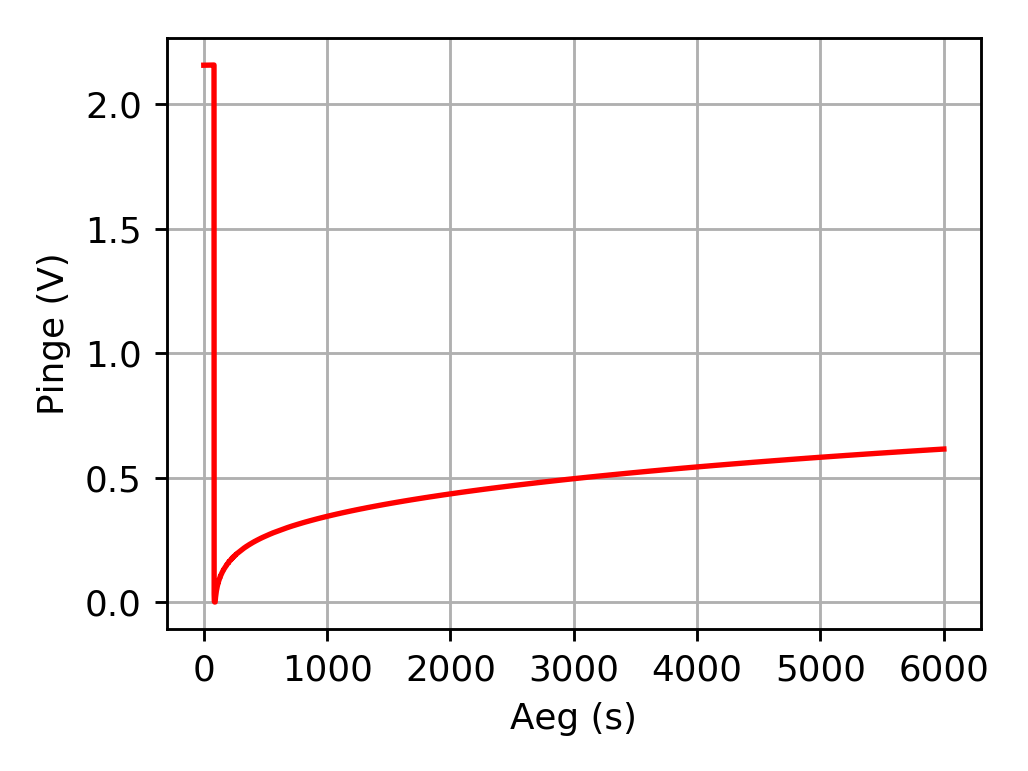

In [42]:
fail = 'kondensaatori_tühjenemine_mälu'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

plot(aeg, pinge, 'r-')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()

Põhjalikuma katsetamisega võiks ka veenduda, et taastumisel pinge saavutab seda suurema väärtuse, mida kõrgema pingeni oli kondensaator algselt laetud.

<img src="kondensaatori_laadimine_mälu_skeem.png" style="height: 8em; float: right; margin-left: 1em;"/>Sama efekti võib näha ka kondensaatori äkilisel laadimisel. Ühendame algselt tühjaks laetud kondensaatori elektriskeemi, mis on näidatud joonisel. Seame toiteplokil pinge 2&nbsp;V ja voolutugevuse 0,4&nbsp;A ja käivitame mõõtmise. Mõne hetke pärast sulgeme lüliti. Pinge kondensaatoril hakkab kiiresti kasvama (tempoga $I/C$) kuni saavutab maksimumi 2&nbsp;V, seejärel voolutugevus hakkab kahanema. Sel hetkel avame lüliti.

In [61]:
aeg = []
pinge = []

with UT61E(COM_MM) as mm:
    t0 = time.time()
    while True:
        lugem = mm.lugem()
        if lugem is not None:
            aeg.append(time.time() - t0)
            pinge.append(lugem)
            print('aeg = %6.1f s;  pinge = %6.4f V' % (aeg[-1], pinge[-1]))
            if aeg[-1] > 6000:
                break
        time.sleep(0.1)

aeg = np.array(aeg)
pinge = np.array(pinge)

aeg =    0.4 s;  pinge = 0.0014 V
aeg =    1.0 s;  pinge = 0.0014 V
aeg =    1.5 s;  pinge = 0.0014 V
aeg =    2.0 s;  pinge = 0.0014 V
aeg =    2.4 s;  pinge = 0.0015 V
aeg =    3.0 s;  pinge = 0.0015 V
aeg =    3.5 s;  pinge = 0.0015 V
aeg =    4.0 s;  pinge = 0.0015 V
aeg =    4.5 s;  pinge = 0.0015 V
aeg =    5.0 s;  pinge = 0.0015 V
aeg =    5.5 s;  pinge = 0.0015 V
aeg =    6.0 s;  pinge = 0.0015 V
aeg =    6.4 s;  pinge = 0.0015 V
aeg =    7.0 s;  pinge = 0.0015 V
aeg =    7.5 s;  pinge = 0.0015 V
aeg =    8.0 s;  pinge = 0.0015 V
aeg =    8.5 s;  pinge = 0.0015 V
aeg =    8.9 s;  pinge = 0.0015 V
aeg =    9.5 s;  pinge = 0.0015 V
aeg =   10.0 s;  pinge = 0.0015 V
aeg =   10.4 s;  pinge = 0.0015 V
aeg =   11.0 s;  pinge = 0.0015 V
aeg =   11.5 s;  pinge = 0.0015 V
aeg =   12.0 s;  pinge = 0.0015 V
aeg =   12.5 s;  pinge = 0.0016 V
aeg =   12.9 s;  pinge = 0.0016 V
aeg =   13.5 s;  pinge = 0.0016 V
aeg =   14.0 s;  pinge = 0.0016 V
aeg =   14.4 s;  pinge = 0.0016 V
aeg =   15.0 s

aeg =  121.0 s;  pinge = 1.8546 V
aeg =  121.5 s;  pinge = 1.8540 V
aeg =  122.0 s;  pinge = 1.8538 V
aeg =  122.4 s;  pinge = 1.8536 V
aeg =  123.0 s;  pinge = 1.8536 V
aeg =  123.5 s;  pinge = 1.8531 V
aeg =  123.9 s;  pinge = 1.8528 V
aeg =  124.5 s;  pinge = 1.8526 V
aeg =  125.0 s;  pinge = 1.8526 V
aeg =  125.5 s;  pinge = 1.8521 V
aeg =  125.9 s;  pinge = 1.8519 V
aeg =  126.5 s;  pinge = 1.8516 V
aeg =  127.0 s;  pinge = 1.8516 V
aeg =  127.5 s;  pinge = 1.8511 V
aeg =  128.0 s;  pinge = 1.8509 V
aeg =  128.5 s;  pinge = 1.8506 V
aeg =  129.0 s;  pinge = 1.8506 V
aeg =  129.5 s;  pinge = 1.8501 V
aeg =  130.0 s;  pinge = 1.8499 V
aeg =  130.5 s;  pinge = 1.8496 V
aeg =  131.0 s;  pinge = 1.8496 V
aeg =  131.4 s;  pinge = 1.8492 V
aeg =  132.0 s;  pinge = 1.8492 V
aeg =  132.5 s;  pinge = 1.8487 V
aeg =  132.9 s;  pinge = 1.8487 V
aeg =  133.5 s;  pinge = 1.8483 V
aeg =  134.0 s;  pinge = 1.8483 V
aeg =  134.5 s;  pinge = 1.8478 V
aeg =  135.0 s;  pinge = 1.8478 V
aeg =  135.5 s

aeg =  241.4 s;  pinge = 1.8127 V
aeg =  241.9 s;  pinge = 1.8127 V
aeg =  242.5 s;  pinge = 1.8125 V
aeg =  242.9 s;  pinge = 1.8125 V
aeg =  243.5 s;  pinge = 1.8122 V
aeg =  243.9 s;  pinge = 1.8122 V
aeg =  244.5 s;  pinge = 1.8120 V
aeg =  244.9 s;  pinge = 1.8118 V
aeg =  245.5 s;  pinge = 1.8118 V
aeg =  246.0 s;  pinge = 1.8118 V
aeg =  246.4 s;  pinge = 1.8115 V
aeg =  247.0 s;  pinge = 1.8115 V
aeg =  247.4 s;  pinge = 1.8113 V
aeg =  248.0 s;  pinge = 1.8113 V
aeg =  248.4 s;  pinge = 1.8110 V
aeg =  249.0 s;  pinge = 1.8109 V
aeg =  249.4 s;  pinge = 1.8108 V
aeg =  250.0 s;  pinge = 1.8108 V
aeg =  250.5 s;  pinge = 1.8106 V
aeg =  250.9 s;  pinge = 1.8106 V
aeg =  251.5 s;  pinge = 1.8103 V
aeg =  251.9 s;  pinge = 1.8103 V
aeg =  252.5 s;  pinge = 1.8101 V
aeg =  252.9 s;  pinge = 1.8101 V
aeg =  253.4 s;  pinge = 1.8099 V
aeg =  254.0 s;  pinge = 1.8099 V
aeg =  254.4 s;  pinge = 1.8097 V
aeg =  255.0 s;  pinge = 1.8097 V
aeg =  255.4 s;  pinge = 1.8095 V
aeg =  256.0 s

aeg =  362.0 s;  pinge = 1.7898 V
aeg =  362.5 s;  pinge = 1.7896 V
aeg =  362.9 s;  pinge = 1.7896 V
aeg =  363.5 s;  pinge = 1.7895 V
aeg =  363.9 s;  pinge = 1.7895 V
aeg =  364.4 s;  pinge = 1.7893 V
aeg =  365.0 s;  pinge = 1.7893 V
aeg =  365.4 s;  pinge = 1.7892 V
aeg =  366.0 s;  pinge = 1.7892 V
aeg =  366.4 s;  pinge = 1.7891 V
aeg =  366.9 s;  pinge = 1.7889 V
aeg =  367.5 s;  pinge = 1.7889 V
aeg =  367.9 s;  pinge = 1.7889 V
aeg =  368.5 s;  pinge = 1.7887 V
aeg =  368.9 s;  pinge = 1.7887 V
aeg =  369.5 s;  pinge = 1.7886 V
aeg =  369.9 s;  pinge = 1.7886 V
aeg =  370.4 s;  pinge = 1.7884 V
aeg =  371.0 s;  pinge = 1.7884 V
aeg =  371.4 s;  pinge = 1.7883 V
aeg =  371.9 s;  pinge = 1.7883 V
aeg =  372.5 s;  pinge = 1.7882 V
aeg =  373.0 s;  pinge = 1.7882 V
aeg =  373.4 s;  pinge = 1.7880 V
aeg =  374.0 s;  pinge = 1.7879 V
aeg =  374.5 s;  pinge = 1.7878 V
aeg =  374.9 s;  pinge = 1.7878 V
aeg =  375.5 s;  pinge = 1.7877 V
aeg =  376.0 s;  pinge = 1.7877 V
aeg =  376.4 s

aeg =  482.4 s;  pinge = 1.7743 V
aeg =  482.9 s;  pinge = 1.7743 V
aeg =  483.5 s;  pinge = 1.7742 V
aeg =  483.9 s;  pinge = 1.7742 V
aeg =  484.4 s;  pinge = 1.7741 V
aeg =  485.0 s;  pinge = 1.7741 V
aeg =  485.4 s;  pinge = 1.7740 V
aeg =  486.0 s;  pinge = 1.7739 V
aeg =  486.4 s;  pinge = 1.7739 V
aeg =  486.9 s;  pinge = 1.7739 V
aeg =  487.5 s;  pinge = 1.7738 V
aeg =  487.9 s;  pinge = 1.7738 V
aeg =  488.5 s;  pinge = 1.7736 V
aeg =  488.9 s;  pinge = 1.7736 V
aeg =  489.4 s;  pinge = 1.7735 V
aeg =  489.9 s;  pinge = 1.7735 V
aeg =  490.4 s;  pinge = 1.7734 V
aeg =  491.0 s;  pinge = 1.7734 V
aeg =  491.4 s;  pinge = 1.7733 V
aeg =  492.0 s;  pinge = 1.7733 V
aeg =  492.4 s;  pinge = 1.7732 V
aeg =  492.9 s;  pinge = 1.7732 V
aeg =  493.4 s;  pinge = 1.7731 V
aeg =  493.9 s;  pinge = 1.7731 V
aeg =  494.5 s;  pinge = 1.7730 V
aeg =  494.9 s;  pinge = 1.7730 V
aeg =  495.4 s;  pinge = 1.7729 V
aeg =  496.0 s;  pinge = 1.7729 V
aeg =  496.4 s;  pinge = 1.7728 V
aeg =  497.0 s

aeg =  603.0 s;  pinge = 1.7629 V
aeg =  603.4 s;  pinge = 1.7628 V
aeg =  603.9 s;  pinge = 1.7628 V
aeg =  604.5 s;  pinge = 1.7627 V
aeg =  604.9 s;  pinge = 1.7627 V
aeg =  605.4 s;  pinge = 1.7626 V
aeg =  606.0 s;  pinge = 1.7626 V
aeg =  606.4 s;  pinge = 1.7625 V
aeg =  606.9 s;  pinge = 1.7625 V
aeg =  607.5 s;  pinge = 1.7624 V
aeg =  607.9 s;  pinge = 1.7624 V
aeg =  608.4 s;  pinge = 1.7624 V
aeg =  609.0 s;  pinge = 1.7624 V
aeg =  609.4 s;  pinge = 1.7623 V
aeg =  609.9 s;  pinge = 1.7623 V
aeg =  610.5 s;  pinge = 1.7622 V
aeg =  610.9 s;  pinge = 1.7622 V
aeg =  611.4 s;  pinge = 1.7621 V
aeg =  612.0 s;  pinge = 1.7621 V
aeg =  612.4 s;  pinge = 1.7621 V
aeg =  612.9 s;  pinge = 1.7621 V
aeg =  613.5 s;  pinge = 1.7620 V
aeg =  613.9 s;  pinge = 1.7619 V
aeg =  614.5 s;  pinge = 1.7619 V
aeg =  614.9 s;  pinge = 1.7619 V
aeg =  615.4 s;  pinge = 1.7618 V
aeg =  616.0 s;  pinge = 1.7618 V
aeg =  616.4 s;  pinge = 1.7617 V
aeg =  616.9 s;  pinge = 1.7617 V
aeg =  617.4 s

aeg =  723.4 s;  pinge = 1.7537 V
aeg =  723.9 s;  pinge = 1.7537 V
aeg =  724.4 s;  pinge = 1.7537 V
aeg =  725.0 s;  pinge = 1.7537 V
aeg =  725.4 s;  pinge = 1.7536 V
aeg =  725.9 s;  pinge = 1.7536 V
aeg =  726.5 s;  pinge = 1.7535 V
aeg =  726.9 s;  pinge = 1.7535 V
aeg =  727.4 s;  pinge = 1.7535 V
aeg =  727.9 s;  pinge = 1.7535 V
aeg =  728.4 s;  pinge = 1.7534 V
aeg =  728.9 s;  pinge = 1.7534 V
aeg =  729.5 s;  pinge = 1.7533 V
aeg =  729.9 s;  pinge = 1.7533 V
aeg =  730.4 s;  pinge = 1.7533 V
aeg =  730.9 s;  pinge = 1.7533 V
aeg =  731.4 s;  pinge = 1.7532 V
aeg =  731.9 s;  pinge = 1.7532 V
aeg =  732.4 s;  pinge = 1.7531 V
aeg =  732.9 s;  pinge = 1.7531 V
aeg =  733.4 s;  pinge = 1.7531 V
aeg =  734.0 s;  pinge = 1.7531 V
aeg =  734.4 s;  pinge = 1.7530 V
aeg =  734.9 s;  pinge = 1.7530 V
aeg =  735.5 s;  pinge = 1.7529 V
aeg =  735.9 s;  pinge = 1.7529 V
aeg =  736.4 s;  pinge = 1.7528 V
aeg =  737.0 s;  pinge = 1.7528 V
aeg =  737.4 s;  pinge = 1.7528 V
aeg =  737.9 s

aeg =  843.9 s;  pinge = 1.7462 V
aeg =  844.4 s;  pinge = 1.7462 V
aeg =  844.9 s;  pinge = 1.7462 V
aeg =  845.4 s;  pinge = 1.7461 V
aeg =  845.9 s;  pinge = 1.7461 V
aeg =  846.4 s;  pinge = 1.7461 V
aeg =  846.9 s;  pinge = 1.7461 V
aeg =  847.4 s;  pinge = 1.7460 V
aeg =  847.8 s;  pinge = 1.7460 V
aeg =  848.4 s;  pinge = 1.7460 V
aeg =  848.9 s;  pinge = 1.7459 V
aeg =  849.4 s;  pinge = 1.7460 V
aeg =  849.9 s;  pinge = 1.7458 V
aeg =  850.4 s;  pinge = 1.7458 V
aeg =  850.9 s;  pinge = 1.7458 V
aeg =  851.4 s;  pinge = 1.7458 V
aeg =  852.0 s;  pinge = 1.7458 V
aeg =  852.4 s;  pinge = 1.7457 V
aeg =  852.9 s;  pinge = 1.7457 V
aeg =  853.4 s;  pinge = 1.7456 V
aeg =  853.9 s;  pinge = 1.7456 V
aeg =  854.4 s;  pinge = 1.7456 V
aeg =  854.9 s;  pinge = 1.7456 V
aeg =  855.4 s;  pinge = 1.7455 V
aeg =  855.9 s;  pinge = 1.7455 V
aeg =  856.4 s;  pinge = 1.7455 V
aeg =  856.9 s;  pinge = 1.7455 V
aeg =  857.4 s;  pinge = 1.7455 V
aeg =  857.9 s;  pinge = 1.7455 V
aeg =  858.4 s

aeg =  964.4 s;  pinge = 1.7397 V
aeg =  964.9 s;  pinge = 1.7397 V
aeg =  965.4 s;  pinge = 1.7397 V
aeg =  965.9 s;  pinge = 1.7397 V
aeg =  966.4 s;  pinge = 1.7396 V
aeg =  966.9 s;  pinge = 1.7396 V
aeg =  967.3 s;  pinge = 1.7396 V
aeg =  967.8 s;  pinge = 1.7396 V
aeg =  968.3 s;  pinge = 1.7395 V
aeg =  968.8 s;  pinge = 1.7395 V
aeg =  969.3 s;  pinge = 1.7395 V
aeg =  969.9 s;  pinge = 1.7395 V
aeg =  970.4 s;  pinge = 1.7395 V
aeg =  970.9 s;  pinge = 1.7395 V
aeg =  971.4 s;  pinge = 1.7394 V
aeg =  971.9 s;  pinge = 1.7394 V
aeg =  972.4 s;  pinge = 1.7393 V
aeg =  972.9 s;  pinge = 1.7393 V
aeg =  973.4 s;  pinge = 1.7393 V
aeg =  973.9 s;  pinge = 1.7393 V
aeg =  974.4 s;  pinge = 1.7392 V
aeg =  974.9 s;  pinge = 1.7392 V
aeg =  975.4 s;  pinge = 1.7392 V
aeg =  975.9 s;  pinge = 1.7392 V
aeg =  976.4 s;  pinge = 1.7392 V
aeg =  976.9 s;  pinge = 1.7392 V
aeg =  977.4 s;  pinge = 1.7391 V
aeg =  977.9 s;  pinge = 1.7391 V
aeg =  978.4 s;  pinge = 1.7390 V
aeg =  978.9 s

aeg = 1084.9 s;  pinge = 1.7341 V
aeg = 1085.4 s;  pinge = 1.7341 V
aeg = 1085.9 s;  pinge = 1.7341 V
aeg = 1086.4 s;  pinge = 1.7340 V
aeg = 1086.9 s;  pinge = 1.7340 V
aeg = 1087.4 s;  pinge = 1.7339 V
aeg = 1087.9 s;  pinge = 1.7339 V
aeg = 1088.4 s;  pinge = 1.7339 V
aeg = 1088.9 s;  pinge = 1.7339 V
aeg = 1089.4 s;  pinge = 1.7339 V
aeg = 1089.9 s;  pinge = 1.7339 V
aeg = 1090.3 s;  pinge = 1.7338 V
aeg = 1090.8 s;  pinge = 1.7338 V
aeg = 1091.3 s;  pinge = 1.7338 V
aeg = 1091.8 s;  pinge = 1.7338 V
aeg = 1092.3 s;  pinge = 1.7337 V
aeg = 1092.8 s;  pinge = 1.7337 V
aeg = 1093.3 s;  pinge = 1.7337 V
aeg = 1093.8 s;  pinge = 1.7337 V
aeg = 1094.4 s;  pinge = 1.7337 V
aeg = 1094.9 s;  pinge = 1.7337 V
aeg = 1095.4 s;  pinge = 1.7336 V
aeg = 1095.9 s;  pinge = 1.7336 V
aeg = 1096.4 s;  pinge = 1.7336 V
aeg = 1096.9 s;  pinge = 1.7336 V
aeg = 1097.4 s;  pinge = 1.7335 V
aeg = 1097.9 s;  pinge = 1.7335 V
aeg = 1098.4 s;  pinge = 1.7335 V
aeg = 1098.9 s;  pinge = 1.7335 V
aeg = 1099.4 s

aeg = 1205.4 s;  pinge = 1.7290 V
aeg = 1205.8 s;  pinge = 1.7290 V
aeg = 1206.3 s;  pinge = 1.7289 V
aeg = 1206.8 s;  pinge = 1.7290 V
aeg = 1207.3 s;  pinge = 1.7289 V
aeg = 1207.8 s;  pinge = 1.7289 V
aeg = 1208.3 s;  pinge = 1.7289 V
aeg = 1208.8 s;  pinge = 1.7289 V
aeg = 1209.3 s;  pinge = 1.7289 V
aeg = 1209.8 s;  pinge = 1.7289 V
aeg = 1210.3 s;  pinge = 1.7288 V
aeg = 1210.9 s;  pinge = 1.7288 V
aeg = 1211.4 s;  pinge = 1.7288 V
aeg = 1211.9 s;  pinge = 1.7288 V
aeg = 1212.4 s;  pinge = 1.7287 V
aeg = 1212.9 s;  pinge = 1.7287 V
aeg = 1213.4 s;  pinge = 1.7287 V
aeg = 1213.9 s;  pinge = 1.7287 V
aeg = 1214.4 s;  pinge = 1.7286 V
aeg = 1214.9 s;  pinge = 1.7286 V
aeg = 1215.4 s;  pinge = 1.7286 V
aeg = 1215.9 s;  pinge = 1.7286 V
aeg = 1216.4 s;  pinge = 1.7285 V
aeg = 1216.9 s;  pinge = 1.7285 V
aeg = 1217.4 s;  pinge = 1.7285 V
aeg = 1217.9 s;  pinge = 1.7285 V
aeg = 1218.4 s;  pinge = 1.7285 V
aeg = 1218.9 s;  pinge = 1.7285 V
aeg = 1219.4 s;  pinge = 1.7284 V
aeg = 1219.9 s

aeg = 1325.9 s;  pinge = 1.7244 V
aeg = 1326.4 s;  pinge = 1.7244 V
aeg = 1326.9 s;  pinge = 1.7244 V
aeg = 1327.4 s;  pinge = 1.7243 V
aeg = 1327.8 s;  pinge = 1.7243 V
aeg = 1328.3 s;  pinge = 1.7243 V
aeg = 1328.8 s;  pinge = 1.7243 V
aeg = 1329.3 s;  pinge = 1.7243 V
aeg = 1329.8 s;  pinge = 1.7243 V
aeg = 1330.3 s;  pinge = 1.7242 V
aeg = 1330.8 s;  pinge = 1.7242 V
aeg = 1331.3 s;  pinge = 1.7242 V
aeg = 1331.8 s;  pinge = 1.7242 V
aeg = 1332.3 s;  pinge = 1.7242 V
aeg = 1332.8 s;  pinge = 1.7242 V
aeg = 1333.3 s;  pinge = 1.7241 V
aeg = 1333.8 s;  pinge = 1.7241 V
aeg = 1334.3 s;  pinge = 1.7241 V
aeg = 1334.8 s;  pinge = 1.7241 V
aeg = 1335.4 s;  pinge = 1.7241 V
aeg = 1335.9 s;  pinge = 1.7241 V
aeg = 1336.4 s;  pinge = 1.7240 V
aeg = 1336.9 s;  pinge = 1.7240 V
aeg = 1337.4 s;  pinge = 1.7240 V
aeg = 1337.9 s;  pinge = 1.7240 V
aeg = 1338.4 s;  pinge = 1.7240 V
aeg = 1338.9 s;  pinge = 1.7239 V
aeg = 1339.4 s;  pinge = 1.7239 V
aeg = 1339.9 s;  pinge = 1.7239 V
aeg = 1340.4 s

aeg = 1446.4 s;  pinge = 1.7202 V
aeg = 1446.9 s;  pinge = 1.7202 V
aeg = 1447.4 s;  pinge = 1.7202 V
aeg = 1447.9 s;  pinge = 1.7202 V
aeg = 1448.4 s;  pinge = 1.7202 V
aeg = 1448.9 s;  pinge = 1.7202 V
aeg = 1449.4 s;  pinge = 1.7201 V
aeg = 1449.9 s;  pinge = 1.7201 V
aeg = 1450.4 s;  pinge = 1.7201 V
aeg = 1450.9 s;  pinge = 1.7201 V
aeg = 1451.4 s;  pinge = 1.7201 V
aeg = 1451.8 s;  pinge = 1.7201 V
aeg = 1452.3 s;  pinge = 1.7200 V
aeg = 1452.8 s;  pinge = 1.7200 V
aeg = 1453.3 s;  pinge = 1.7200 V
aeg = 1453.8 s;  pinge = 1.7200 V
aeg = 1454.3 s;  pinge = 1.7200 V
aeg = 1454.8 s;  pinge = 1.7199 V
aeg = 1455.3 s;  pinge = 1.7199 V
aeg = 1455.8 s;  pinge = 1.7199 V
aeg = 1456.3 s;  pinge = 1.7199 V
aeg = 1456.8 s;  pinge = 1.7199 V
aeg = 1457.3 s;  pinge = 1.7198 V
aeg = 1457.8 s;  pinge = 1.7198 V
aeg = 1458.3 s;  pinge = 1.7198 V
aeg = 1458.8 s;  pinge = 1.7198 V
aeg = 1459.3 s;  pinge = 1.7198 V
aeg = 1459.8 s;  pinge = 1.7198 V
aeg = 1460.3 s;  pinge = 1.7198 V
aeg = 1460.8 s

aeg = 1566.8 s;  pinge = 1.7164 V
aeg = 1567.3 s;  pinge = 1.7163 V
aeg = 1567.8 s;  pinge = 1.7163 V
aeg = 1568.3 s;  pinge = 1.7163 V
aeg = 1568.8 s;  pinge = 1.7163 V
aeg = 1569.3 s;  pinge = 1.7162 V
aeg = 1569.8 s;  pinge = 1.7162 V
aeg = 1570.3 s;  pinge = 1.7162 V
aeg = 1570.8 s;  pinge = 1.7162 V
aeg = 1571.3 s;  pinge = 1.7162 V
aeg = 1571.8 s;  pinge = 1.7162 V
aeg = 1572.3 s;  pinge = 1.7162 V
aeg = 1572.8 s;  pinge = 1.7162 V
aeg = 1573.3 s;  pinge = 1.7161 V
aeg = 1573.8 s;  pinge = 1.7161 V
aeg = 1574.4 s;  pinge = 1.7161 V
aeg = 1574.9 s;  pinge = 1.7161 V
aeg = 1575.4 s;  pinge = 1.7161 V
aeg = 1575.9 s;  pinge = 1.7161 V
aeg = 1576.4 s;  pinge = 1.7161 V
aeg = 1576.9 s;  pinge = 1.7161 V
aeg = 1577.4 s;  pinge = 1.7160 V
aeg = 1577.9 s;  pinge = 1.7160 V
aeg = 1578.4 s;  pinge = 1.7160 V
aeg = 1578.8 s;  pinge = 1.7159 V
aeg = 1579.3 s;  pinge = 1.7159 V
aeg = 1579.8 s;  pinge = 1.7160 V
aeg = 1580.3 s;  pinge = 1.7159 V
aeg = 1580.8 s;  pinge = 1.7159 V
aeg = 1581.3 s

aeg = 1687.3 s;  pinge = 1.7127 V
aeg = 1687.8 s;  pinge = 1.7127 V
aeg = 1688.3 s;  pinge = 1.7127 V
aeg = 1688.8 s;  pinge = 1.7127 V
aeg = 1689.3 s;  pinge = 1.7127 V
aeg = 1689.8 s;  pinge = 1.7127 V
aeg = 1690.3 s;  pinge = 1.7126 V
aeg = 1690.9 s;  pinge = 1.7126 V
aeg = 1691.4 s;  pinge = 1.7126 V
aeg = 1691.9 s;  pinge = 1.7126 V
aeg = 1692.4 s;  pinge = 1.7126 V
aeg = 1692.8 s;  pinge = 1.7126 V
aeg = 1693.3 s;  pinge = 1.7126 V
aeg = 1693.8 s;  pinge = 1.7126 V
aeg = 1694.3 s;  pinge = 1.7125 V
aeg = 1694.8 s;  pinge = 1.7125 V
aeg = 1695.3 s;  pinge = 1.7125 V
aeg = 1695.8 s;  pinge = 1.7125 V
aeg = 1696.3 s;  pinge = 1.7124 V
aeg = 1696.8 s;  pinge = 1.7124 V
aeg = 1697.3 s;  pinge = 1.7124 V
aeg = 1697.8 s;  pinge = 1.7124 V
aeg = 1698.3 s;  pinge = 1.7124 V
aeg = 1698.8 s;  pinge = 1.7124 V
aeg = 1699.3 s;  pinge = 1.7124 V
aeg = 1699.8 s;  pinge = 1.7124 V
aeg = 1700.3 s;  pinge = 1.7123 V
aeg = 1700.8 s;  pinge = 1.7123 V
aeg = 1701.3 s;  pinge = 1.7123 V
aeg = 1701.8 s

aeg = 1807.8 s;  pinge = 1.7094 V
aeg = 1808.3 s;  pinge = 1.7093 V
aeg = 1808.8 s;  pinge = 1.7093 V
aeg = 1809.3 s;  pinge = 1.7093 V
aeg = 1809.8 s;  pinge = 1.7093 V
aeg = 1810.3 s;  pinge = 1.7093 V
aeg = 1810.8 s;  pinge = 1.7093 V
aeg = 1811.3 s;  pinge = 1.7093 V
aeg = 1811.8 s;  pinge = 1.7093 V
aeg = 1812.3 s;  pinge = 1.7092 V
aeg = 1812.8 s;  pinge = 1.7092 V
aeg = 1813.3 s;  pinge = 1.7092 V
aeg = 1813.8 s;  pinge = 1.7092 V
aeg = 1814.3 s;  pinge = 1.7092 V
aeg = 1814.8 s;  pinge = 1.7092 V
aeg = 1815.3 s;  pinge = 1.7092 V
aeg = 1815.8 s;  pinge = 1.7092 V
aeg = 1816.3 s;  pinge = 1.7091 V
aeg = 1816.8 s;  pinge = 1.7091 V
aeg = 1817.3 s;  pinge = 1.7091 V
aeg = 1817.8 s;  pinge = 1.7091 V
aeg = 1818.3 s;  pinge = 1.7091 V
aeg = 1818.8 s;  pinge = 1.7091 V
aeg = 1819.3 s;  pinge = 1.7091 V
aeg = 1819.8 s;  pinge = 1.7091 V
aeg = 1820.3 s;  pinge = 1.7090 V
aeg = 1820.8 s;  pinge = 1.7090 V
aeg = 1821.3 s;  pinge = 1.7090 V
aeg = 1821.8 s;  pinge = 1.7090 V
aeg = 1822.3 s

aeg = 1928.3 s;  pinge = 1.7062 V
aeg = 1928.8 s;  pinge = 1.7062 V
aeg = 1929.3 s;  pinge = 1.7062 V
aeg = 1929.8 s;  pinge = 1.7062 V
aeg = 1930.3 s;  pinge = 1.7061 V
aeg = 1930.8 s;  pinge = 1.7061 V
aeg = 1931.3 s;  pinge = 1.7061 V
aeg = 1931.8 s;  pinge = 1.7061 V
aeg = 1932.3 s;  pinge = 1.7061 V
aeg = 1932.7 s;  pinge = 1.7061 V
aeg = 1933.2 s;  pinge = 1.7061 V
aeg = 1933.8 s;  pinge = 1.7061 V
aeg = 1934.3 s;  pinge = 1.7060 V
aeg = 1934.8 s;  pinge = 1.7060 V
aeg = 1935.3 s;  pinge = 1.7060 V
aeg = 1935.8 s;  pinge = 1.7060 V
aeg = 1936.3 s;  pinge = 1.7060 V
aeg = 1936.8 s;  pinge = 1.7060 V
aeg = 1937.3 s;  pinge = 1.7060 V
aeg = 1937.8 s;  pinge = 1.7059 V
aeg = 1938.3 s;  pinge = 1.7059 V
aeg = 1938.8 s;  pinge = 1.7059 V
aeg = 1939.3 s;  pinge = 1.7059 V
aeg = 1939.8 s;  pinge = 1.7059 V
aeg = 1940.3 s;  pinge = 1.7059 V
aeg = 1940.8 s;  pinge = 1.7059 V
aeg = 1941.3 s;  pinge = 1.7058 V
aeg = 1941.8 s;  pinge = 1.7058 V
aeg = 1942.3 s;  pinge = 1.7059 V
aeg = 1942.8 s

aeg = 2048.8 s;  pinge = 1.7032 V
aeg = 2049.3 s;  pinge = 1.7032 V
aeg = 2049.8 s;  pinge = 1.7032 V
aeg = 2050.3 s;  pinge = 1.7032 V
aeg = 2050.8 s;  pinge = 1.7032 V
aeg = 2051.3 s;  pinge = 1.7031 V
aeg = 2051.7 s;  pinge = 1.7031 V
aeg = 2052.2 s;  pinge = 1.7031 V
aeg = 2052.7 s;  pinge = 1.7031 V
aeg = 2053.2 s;  pinge = 1.7031 V
aeg = 2053.7 s;  pinge = 1.7031 V
aeg = 2054.2 s;  pinge = 1.7031 V
aeg = 2054.7 s;  pinge = 1.7031 V
aeg = 2055.2 s;  pinge = 1.7030 V
aeg = 2055.8 s;  pinge = 1.7030 V
aeg = 2056.3 s;  pinge = 1.7031 V
aeg = 2056.8 s;  pinge = 1.7031 V
aeg = 2057.3 s;  pinge = 1.7030 V
aeg = 2057.8 s;  pinge = 1.7030 V
aeg = 2058.3 s;  pinge = 1.7029 V
aeg = 2058.8 s;  pinge = 1.7030 V
aeg = 2059.3 s;  pinge = 1.7030 V
aeg = 2059.8 s;  pinge = 1.7030 V
aeg = 2060.3 s;  pinge = 1.7030 V
aeg = 2060.8 s;  pinge = 1.7030 V
aeg = 2061.3 s;  pinge = 1.7029 V
aeg = 2061.8 s;  pinge = 1.7029 V
aeg = 2062.3 s;  pinge = 1.7029 V
aeg = 2062.8 s;  pinge = 1.7029 V
aeg = 2063.3 s

aeg = 2169.2 s;  pinge = 1.7004 V
aeg = 2169.7 s;  pinge = 1.7004 V
aeg = 2170.2 s;  pinge = 1.7004 V
aeg = 2170.7 s;  pinge = 1.7004 V
aeg = 2171.2 s;  pinge = 1.7004 V
aeg = 2171.7 s;  pinge = 1.7004 V
aeg = 2172.2 s;  pinge = 1.7003 V
aeg = 2172.7 s;  pinge = 1.7003 V
aeg = 2173.2 s;  pinge = 1.7004 V
aeg = 2173.7 s;  pinge = 1.7004 V
aeg = 2174.2 s;  pinge = 1.7003 V
aeg = 2174.7 s;  pinge = 1.7003 V
aeg = 2175.2 s;  pinge = 1.7003 V
aeg = 2175.8 s;  pinge = 1.7003 V
aeg = 2176.3 s;  pinge = 1.7002 V
aeg = 2176.8 s;  pinge = 1.7002 V
aeg = 2177.3 s;  pinge = 1.7002 V
aeg = 2177.8 s;  pinge = 1.7002 V
aeg = 2178.3 s;  pinge = 1.7002 V
aeg = 2178.8 s;  pinge = 1.7002 V
aeg = 2179.3 s;  pinge = 1.7002 V
aeg = 2179.8 s;  pinge = 1.7002 V
aeg = 2180.3 s;  pinge = 1.7002 V
aeg = 2180.8 s;  pinge = 1.7002 V
aeg = 2181.3 s;  pinge = 1.7001 V
aeg = 2181.8 s;  pinge = 1.7001 V
aeg = 2182.3 s;  pinge = 1.7002 V
aeg = 2182.8 s;  pinge = 1.7002 V
aeg = 2183.3 s;  pinge = 1.7001 V
aeg = 2183.8 s

aeg = 2289.8 s;  pinge = 1.6978 V
aeg = 2290.3 s;  pinge = 1.6977 V
aeg = 2290.7 s;  pinge = 1.6977 V
aeg = 2291.2 s;  pinge = 1.6977 V
aeg = 2291.7 s;  pinge = 1.6977 V
aeg = 2292.2 s;  pinge = 1.6977 V
aeg = 2292.7 s;  pinge = 1.6977 V
aeg = 2293.2 s;  pinge = 1.6977 V
aeg = 2293.7 s;  pinge = 1.6977 V
aeg = 2294.2 s;  pinge = 1.6977 V
aeg = 2294.7 s;  pinge = 1.6977 V
aeg = 2295.2 s;  pinge = 1.6976 V
aeg = 2295.7 s;  pinge = 1.6976 V
aeg = 2296.2 s;  pinge = 1.6976 V
aeg = 2296.7 s;  pinge = 1.6976 V
aeg = 2297.2 s;  pinge = 1.6976 V
aeg = 2297.8 s;  pinge = 1.6976 V
aeg = 2298.3 s;  pinge = 1.6976 V
aeg = 2298.8 s;  pinge = 1.6976 V
aeg = 2299.3 s;  pinge = 1.6976 V
aeg = 2299.8 s;  pinge = 1.6976 V
aeg = 2300.3 s;  pinge = 1.6976 V
aeg = 2300.8 s;  pinge = 1.6976 V
aeg = 2301.3 s;  pinge = 1.6975 V
aeg = 2301.8 s;  pinge = 1.6975 V
aeg = 2302.3 s;  pinge = 1.6975 V
aeg = 2302.8 s;  pinge = 1.6975 V
aeg = 2303.2 s;  pinge = 1.6975 V
aeg = 2303.7 s;  pinge = 1.6975 V
aeg = 2304.2 s

aeg = 2410.2 s;  pinge = 1.6953 V
aeg = 2410.7 s;  pinge = 1.6953 V
aeg = 2411.2 s;  pinge = 1.6952 V
aeg = 2411.7 s;  pinge = 1.6952 V
aeg = 2412.2 s;  pinge = 1.6952 V
aeg = 2412.7 s;  pinge = 1.6952 V
aeg = 2413.2 s;  pinge = 1.6952 V
aeg = 2413.7 s;  pinge = 1.6952 V
aeg = 2414.2 s;  pinge = 1.6952 V
aeg = 2414.7 s;  pinge = 1.6952 V
aeg = 2415.2 s;  pinge = 1.6951 V
aeg = 2415.7 s;  pinge = 1.6951 V
aeg = 2416.2 s;  pinge = 1.6951 V
aeg = 2416.7 s;  pinge = 1.6951 V
aeg = 2417.2 s;  pinge = 1.6951 V
aeg = 2417.7 s;  pinge = 1.6951 V
aeg = 2418.3 s;  pinge = 1.6951 V
aeg = 2418.8 s;  pinge = 1.6951 V
aeg = 2419.3 s;  pinge = 1.6951 V
aeg = 2419.8 s;  pinge = 1.6951 V
aeg = 2420.3 s;  pinge = 1.6950 V
aeg = 2420.8 s;  pinge = 1.6950 V
aeg = 2421.3 s;  pinge = 1.6950 V
aeg = 2421.8 s;  pinge = 1.6950 V
aeg = 2422.3 s;  pinge = 1.6950 V
aeg = 2422.8 s;  pinge = 1.6950 V
aeg = 2423.2 s;  pinge = 1.6950 V
aeg = 2423.7 s;  pinge = 1.6950 V
aeg = 2424.2 s;  pinge = 1.6949 V
aeg = 2424.7 s

aeg = 2530.7 s;  pinge = 1.6929 V
aeg = 2531.2 s;  pinge = 1.6929 V
aeg = 2531.7 s;  pinge = 1.6929 V
aeg = 2532.2 s;  pinge = 1.6928 V
aeg = 2532.8 s;  pinge = 1.6928 V
aeg = 2533.3 s;  pinge = 1.6928 V
aeg = 2533.8 s;  pinge = 1.6928 V
aeg = 2534.3 s;  pinge = 1.6927 V
aeg = 2534.8 s;  pinge = 1.6927 V
aeg = 2535.3 s;  pinge = 1.6928 V
aeg = 2535.8 s;  pinge = 1.6928 V
aeg = 2536.2 s;  pinge = 1.6927 V
aeg = 2536.7 s;  pinge = 1.6927 V
aeg = 2537.2 s;  pinge = 1.6927 V
aeg = 2537.7 s;  pinge = 1.6927 V
aeg = 2538.2 s;  pinge = 1.6927 V
aeg = 2538.7 s;  pinge = 1.6927 V
aeg = 2539.2 s;  pinge = 1.6927 V
aeg = 2539.7 s;  pinge = 1.6927 V
aeg = 2540.2 s;  pinge = 1.6927 V
aeg = 2540.7 s;  pinge = 1.6927 V
aeg = 2541.2 s;  pinge = 1.6927 V
aeg = 2541.7 s;  pinge = 1.6927 V
aeg = 2542.2 s;  pinge = 1.6927 V
aeg = 2542.7 s;  pinge = 1.6927 V
aeg = 2543.2 s;  pinge = 1.6926 V
aeg = 2543.7 s;  pinge = 1.6926 V
aeg = 2544.2 s;  pinge = 1.6926 V
aeg = 2544.7 s;  pinge = 1.6926 V
aeg = 2545.2 s

aeg = 2651.2 s;  pinge = 1.6906 V
aeg = 2651.7 s;  pinge = 1.6906 V
aeg = 2652.2 s;  pinge = 1.6905 V
aeg = 2652.7 s;  pinge = 1.6905 V
aeg = 2653.2 s;  pinge = 1.6905 V
aeg = 2653.7 s;  pinge = 1.6905 V
aeg = 2654.3 s;  pinge = 1.6905 V
aeg = 2654.8 s;  pinge = 1.6905 V
aeg = 2655.2 s;  pinge = 1.6904 V
aeg = 2655.7 s;  pinge = 1.6904 V
aeg = 2656.2 s;  pinge = 1.6905 V
aeg = 2656.7 s;  pinge = 1.6905 V
aeg = 2657.2 s;  pinge = 1.6905 V
aeg = 2657.7 s;  pinge = 1.6905 V
aeg = 2658.2 s;  pinge = 1.6904 V
aeg = 2658.7 s;  pinge = 1.6904 V
aeg = 2659.2 s;  pinge = 1.6904 V
aeg = 2659.7 s;  pinge = 1.6904 V
aeg = 2660.2 s;  pinge = 1.6904 V
aeg = 2660.7 s;  pinge = 1.6904 V
aeg = 2661.2 s;  pinge = 1.6904 V
aeg = 2661.7 s;  pinge = 1.6904 V
aeg = 2662.2 s;  pinge = 1.6904 V
aeg = 2662.7 s;  pinge = 1.6904 V
aeg = 2663.2 s;  pinge = 1.6903 V
aeg = 2663.7 s;  pinge = 1.6903 V
aeg = 2664.2 s;  pinge = 1.6904 V
aeg = 2664.7 s;  pinge = 1.6904 V
aeg = 2665.2 s;  pinge = 1.6903 V
aeg = 2665.7 s

aeg = 2771.7 s;  pinge = 1.6884 V
aeg = 2772.2 s;  pinge = 1.6884 V
aeg = 2772.7 s;  pinge = 1.6884 V
aeg = 2773.2 s;  pinge = 1.6883 V
aeg = 2773.7 s;  pinge = 1.6883 V
aeg = 2774.2 s;  pinge = 1.6883 V
aeg = 2774.7 s;  pinge = 1.6883 V
aeg = 2775.2 s;  pinge = 1.6883 V
aeg = 2775.7 s;  pinge = 1.6883 V
aeg = 2776.2 s;  pinge = 1.6883 V
aeg = 2776.7 s;  pinge = 1.6883 V
aeg = 2777.2 s;  pinge = 1.6883 V
aeg = 2777.7 s;  pinge = 1.6883 V
aeg = 2778.2 s;  pinge = 1.6883 V
aeg = 2778.7 s;  pinge = 1.6883 V
aeg = 2779.2 s;  pinge = 1.6883 V
aeg = 2779.7 s;  pinge = 1.6883 V
aeg = 2780.2 s;  pinge = 1.6882 V
aeg = 2780.6 s;  pinge = 1.6882 V
aeg = 2781.1 s;  pinge = 1.6882 V
aeg = 2781.7 s;  pinge = 1.6882 V
aeg = 2782.2 s;  pinge = 1.6882 V
aeg = 2782.7 s;  pinge = 1.6882 V
aeg = 2783.2 s;  pinge = 1.6882 V
aeg = 2783.7 s;  pinge = 1.6882 V
aeg = 2784.2 s;  pinge = 1.6882 V
aeg = 2784.7 s;  pinge = 1.6882 V
aeg = 2785.2 s;  pinge = 1.6882 V
aeg = 2785.7 s;  pinge = 1.6882 V
aeg = 2786.2 s

aeg = 2892.2 s;  pinge = 1.6863 V
aeg = 2892.7 s;  pinge = 1.6863 V
aeg = 2893.2 s;  pinge = 1.6863 V
aeg = 2893.7 s;  pinge = 1.6863 V
aeg = 2894.2 s;  pinge = 1.6862 V
aeg = 2894.7 s;  pinge = 1.6862 V
aeg = 2895.2 s;  pinge = 1.6862 V
aeg = 2895.7 s;  pinge = 1.6862 V
aeg = 2896.2 s;  pinge = 1.6862 V
aeg = 2896.7 s;  pinge = 1.6862 V
aeg = 2897.2 s;  pinge = 1.6863 V
aeg = 2897.7 s;  pinge = 1.6863 V
aeg = 2898.2 s;  pinge = 1.6862 V
aeg = 2898.7 s;  pinge = 1.6862 V
aeg = 2899.2 s;  pinge = 1.6862 V
aeg = 2899.7 s;  pinge = 1.6862 V
aeg = 2900.1 s;  pinge = 1.6862 V
aeg = 2900.6 s;  pinge = 1.6862 V
aeg = 2901.1 s;  pinge = 1.6862 V
aeg = 2901.6 s;  pinge = 1.6862 V
aeg = 2902.1 s;  pinge = 1.6861 V
aeg = 2902.6 s;  pinge = 1.6861 V
aeg = 2903.2 s;  pinge = 1.6861 V
aeg = 2903.7 s;  pinge = 1.6861 V
aeg = 2904.2 s;  pinge = 1.6861 V
aeg = 2904.7 s;  pinge = 1.6861 V
aeg = 2905.2 s;  pinge = 1.6861 V
aeg = 2905.7 s;  pinge = 1.6861 V
aeg = 2906.2 s;  pinge = 1.6861 V
aeg = 2906.7 s

aeg = 3012.7 s;  pinge = 1.6843 V
aeg = 3013.2 s;  pinge = 1.6843 V
aeg = 3013.7 s;  pinge = 1.6843 V
aeg = 3014.2 s;  pinge = 1.6842 V
aeg = 3014.7 s;  pinge = 1.6842 V
aeg = 3015.2 s;  pinge = 1.6842 V
aeg = 3015.7 s;  pinge = 1.6842 V
aeg = 3016.2 s;  pinge = 1.6842 V
aeg = 3016.7 s;  pinge = 1.6842 V
aeg = 3017.2 s;  pinge = 1.6842 V
aeg = 3017.7 s;  pinge = 1.6842 V
aeg = 3018.2 s;  pinge = 1.6842 V
aeg = 3018.7 s;  pinge = 1.6842 V
aeg = 3019.2 s;  pinge = 1.6842 V
aeg = 3019.7 s;  pinge = 1.6842 V
aeg = 3020.2 s;  pinge = 1.6841 V
aeg = 3020.7 s;  pinge = 1.6841 V
aeg = 3021.2 s;  pinge = 1.6841 V
aeg = 3021.7 s;  pinge = 1.6841 V
aeg = 3022.2 s;  pinge = 1.6841 V
aeg = 3022.7 s;  pinge = 1.6841 V
aeg = 3023.2 s;  pinge = 1.6841 V
aeg = 3023.6 s;  pinge = 1.6841 V
aeg = 3024.1 s;  pinge = 1.6840 V
aeg = 3024.6 s;  pinge = 1.6840 V
aeg = 3025.1 s;  pinge = 1.6841 V
aeg = 3025.6 s;  pinge = 1.6841 V
aeg = 3026.1 s;  pinge = 1.6841 V
aeg = 3026.6 s;  pinge = 1.6841 V
aeg = 3027.1 s

aeg = 3133.2 s;  pinge = 1.6823 V
aeg = 3133.7 s;  pinge = 1.6823 V
aeg = 3134.2 s;  pinge = 1.6823 V
aeg = 3134.7 s;  pinge = 1.6823 V
aeg = 3135.2 s;  pinge = 1.6823 V
aeg = 3135.7 s;  pinge = 1.6823 V
aeg = 3136.1 s;  pinge = 1.6823 V
aeg = 3136.6 s;  pinge = 1.6823 V
aeg = 3137.1 s;  pinge = 1.6823 V
aeg = 3137.6 s;  pinge = 1.6823 V
aeg = 3138.2 s;  pinge = 1.6823 V
aeg = 3138.7 s;  pinge = 1.6823 V
aeg = 3139.2 s;  pinge = 1.6822 V
aeg = 3139.7 s;  pinge = 1.6822 V
aeg = 3140.2 s;  pinge = 1.6822 V
aeg = 3140.7 s;  pinge = 1.6822 V
aeg = 3141.2 s;  pinge = 1.6822 V
aeg = 3141.7 s;  pinge = 1.6822 V
aeg = 3142.2 s;  pinge = 1.6822 V
aeg = 3142.7 s;  pinge = 1.6822 V
aeg = 3143.2 s;  pinge = 1.6822 V
aeg = 3143.7 s;  pinge = 1.6822 V
aeg = 3144.2 s;  pinge = 1.6822 V
aeg = 3144.6 s;  pinge = 1.6822 V
aeg = 3145.1 s;  pinge = 1.6821 V
aeg = 3145.6 s;  pinge = 1.6821 V
aeg = 3146.1 s;  pinge = 1.6821 V
aeg = 3146.6 s;  pinge = 1.6821 V
aeg = 3147.1 s;  pinge = 1.6821 V
aeg = 3147.6 s

aeg = 3253.6 s;  pinge = 1.6805 V
aeg = 3254.2 s;  pinge = 1.6805 V
aeg = 3254.6 s;  pinge = 1.6805 V
aeg = 3255.2 s;  pinge = 1.6805 V
aeg = 3255.7 s;  pinge = 1.6805 V
aeg = 3256.1 s;  pinge = 1.6804 V
aeg = 3256.7 s;  pinge = 1.6804 V
aeg = 3257.1 s;  pinge = 1.6804 V
aeg = 3257.6 s;  pinge = 1.6804 V
aeg = 3258.1 s;  pinge = 1.6804 V
aeg = 3258.7 s;  pinge = 1.6804 V
aeg = 3259.1 s;  pinge = 1.6804 V
aeg = 3259.7 s;  pinge = 1.6804 V
aeg = 3260.1 s;  pinge = 1.6804 V
aeg = 3260.6 s;  pinge = 1.6804 V
aeg = 3261.2 s;  pinge = 1.6804 V
aeg = 3261.6 s;  pinge = 1.6804 V
aeg = 3262.1 s;  pinge = 1.6804 V
aeg = 3262.7 s;  pinge = 1.6804 V
aeg = 3263.1 s;  pinge = 1.6803 V
aeg = 3263.7 s;  pinge = 1.6803 V
aeg = 3264.1 s;  pinge = 1.6803 V
aeg = 3264.7 s;  pinge = 1.6803 V
aeg = 3265.1 s;  pinge = 1.6803 V
aeg = 3265.6 s;  pinge = 1.6803 V
aeg = 3266.2 s;  pinge = 1.6803 V
aeg = 3266.6 s;  pinge = 1.6803 V
aeg = 3267.2 s;  pinge = 1.6803 V
aeg = 3267.7 s;  pinge = 1.6803 V
aeg = 3268.1 s

aeg = 3374.2 s;  pinge = 1.6787 V
aeg = 3374.7 s;  pinge = 1.6787 V
aeg = 3375.2 s;  pinge = 1.6787 V
aeg = 3375.7 s;  pinge = 1.6787 V
aeg = 3376.2 s;  pinge = 1.6787 V
aeg = 3376.6 s;  pinge = 1.6787 V
aeg = 3377.1 s;  pinge = 1.6786 V
aeg = 3377.6 s;  pinge = 1.6786 V
aeg = 3378.1 s;  pinge = 1.6786 V
aeg = 3378.6 s;  pinge = 1.6786 V
aeg = 3379.1 s;  pinge = 1.6786 V
aeg = 3379.6 s;  pinge = 1.6786 V
aeg = 3380.1 s;  pinge = 1.6786 V
aeg = 3380.6 s;  pinge = 1.6786 V
aeg = 3381.1 s;  pinge = 1.6786 V
aeg = 3381.6 s;  pinge = 1.6786 V
aeg = 3382.1 s;  pinge = 1.6786 V
aeg = 3382.6 s;  pinge = 1.6786 V
aeg = 3383.1 s;  pinge = 1.6785 V
aeg = 3383.7 s;  pinge = 1.6785 V
aeg = 3384.2 s;  pinge = 1.6785 V
aeg = 3384.7 s;  pinge = 1.6785 V
aeg = 3385.2 s;  pinge = 1.6785 V
aeg = 3385.7 s;  pinge = 1.6785 V
aeg = 3386.2 s;  pinge = 1.6785 V
aeg = 3386.7 s;  pinge = 1.6785 V
aeg = 3387.2 s;  pinge = 1.6785 V
aeg = 3387.7 s;  pinge = 1.6785 V
aeg = 3388.1 s;  pinge = 1.6785 V
aeg = 3388.6 s

aeg = 3494.6 s;  pinge = 1.6770 V
aeg = 3495.1 s;  pinge = 1.6770 V
aeg = 3495.6 s;  pinge = 1.6770 V
aeg = 3496.2 s;  pinge = 1.6770 V
aeg = 3496.6 s;  pinge = 1.6770 V
aeg = 3497.1 s;  pinge = 1.6770 V
aeg = 3497.7 s;  pinge = 1.6770 V
aeg = 3498.1 s;  pinge = 1.6769 V
aeg = 3498.6 s;  pinge = 1.6769 V
aeg = 3499.1 s;  pinge = 1.6769 V
aeg = 3499.6 s;  pinge = 1.6769 V
aeg = 3500.1 s;  pinge = 1.6769 V
aeg = 3500.6 s;  pinge = 1.6769 V
aeg = 3501.1 s;  pinge = 1.6769 V
aeg = 3501.7 s;  pinge = 1.6769 V
aeg = 3502.1 s;  pinge = 1.6769 V
aeg = 3502.6 s;  pinge = 1.6769 V
aeg = 3503.1 s;  pinge = 1.6769 V
aeg = 3503.6 s;  pinge = 1.6769 V
aeg = 3504.1 s;  pinge = 1.6769 V
aeg = 3504.6 s;  pinge = 1.6769 V
aeg = 3505.2 s;  pinge = 1.6768 V
aeg = 3505.6 s;  pinge = 1.6768 V
aeg = 3506.2 s;  pinge = 1.6768 V
aeg = 3506.6 s;  pinge = 1.6768 V
aeg = 3507.1 s;  pinge = 1.6768 V
aeg = 3507.6 s;  pinge = 1.6768 V
aeg = 3508.1 s;  pinge = 1.6768 V
aeg = 3508.6 s;  pinge = 1.6768 V
aeg = 3509.1 s

aeg = 3615.1 s;  pinge = 1.6753 V
aeg = 3615.6 s;  pinge = 1.6753 V
aeg = 3616.1 s;  pinge = 1.6753 V
aeg = 3616.6 s;  pinge = 1.6753 V
aeg = 3617.1 s;  pinge = 1.6753 V
aeg = 3617.6 s;  pinge = 1.6753 V
aeg = 3618.1 s;  pinge = 1.6753 V
aeg = 3618.6 s;  pinge = 1.6753 V
aeg = 3619.1 s;  pinge = 1.6753 V
aeg = 3619.6 s;  pinge = 1.6753 V
aeg = 3620.1 s;  pinge = 1.6753 V
aeg = 3620.6 s;  pinge = 1.6753 V
aeg = 3621.2 s;  pinge = 1.6752 V
aeg = 3621.6 s;  pinge = 1.6752 V
aeg = 3622.1 s;  pinge = 1.6752 V
aeg = 3622.6 s;  pinge = 1.6752 V
aeg = 3623.1 s;  pinge = 1.6752 V
aeg = 3623.6 s;  pinge = 1.6752 V
aeg = 3624.1 s;  pinge = 1.6752 V
aeg = 3624.6 s;  pinge = 1.6752 V
aeg = 3625.1 s;  pinge = 1.6752 V
aeg = 3625.6 s;  pinge = 1.6752 V
aeg = 3626.1 s;  pinge = 1.6752 V
aeg = 3626.7 s;  pinge = 1.6752 V
aeg = 3627.1 s;  pinge = 1.6752 V
aeg = 3627.6 s;  pinge = 1.6752 V
aeg = 3628.1 s;  pinge = 1.6752 V
aeg = 3628.6 s;  pinge = 1.6752 V
aeg = 3629.1 s;  pinge = 1.6752 V
aeg = 3629.6 s

aeg = 3735.6 s;  pinge = 1.6738 V
aeg = 3736.1 s;  pinge = 1.6738 V
aeg = 3736.6 s;  pinge = 1.6738 V
aeg = 3737.1 s;  pinge = 1.6737 V
aeg = 3737.6 s;  pinge = 1.6737 V
aeg = 3738.1 s;  pinge = 1.6737 V
aeg = 3738.6 s;  pinge = 1.6737 V
aeg = 3739.1 s;  pinge = 1.6737 V
aeg = 3739.6 s;  pinge = 1.6737 V
aeg = 3740.1 s;  pinge = 1.6737 V
aeg = 3740.5 s;  pinge = 1.6737 V
aeg = 3741.1 s;  pinge = 1.6737 V
aeg = 3741.6 s;  pinge = 1.6737 V
aeg = 3742.1 s;  pinge = 1.6736 V
aeg = 3742.6 s;  pinge = 1.6736 V
aeg = 3743.1 s;  pinge = 1.6737 V
aeg = 3743.6 s;  pinge = 1.6737 V
aeg = 3744.1 s;  pinge = 1.6736 V
aeg = 3744.6 s;  pinge = 1.6736 V
aeg = 3745.1 s;  pinge = 1.6736 V
aeg = 3745.6 s;  pinge = 1.6736 V
aeg = 3746.1 s;  pinge = 1.6736 V
aeg = 3746.6 s;  pinge = 1.6736 V
aeg = 3747.1 s;  pinge = 1.6736 V
aeg = 3747.6 s;  pinge = 1.6736 V
aeg = 3748.1 s;  pinge = 1.6736 V
aeg = 3748.6 s;  pinge = 1.6736 V
aeg = 3749.1 s;  pinge = 1.6736 V
aeg = 3749.6 s;  pinge = 1.6736 V
aeg = 3750.1 s

aeg = 3856.1 s;  pinge = 1.6722 V
aeg = 3856.6 s;  pinge = 1.6722 V
aeg = 3857.1 s;  pinge = 1.6722 V
aeg = 3857.6 s;  pinge = 1.6722 V
aeg = 3858.1 s;  pinge = 1.6722 V
aeg = 3858.6 s;  pinge = 1.6722 V
aeg = 3859.1 s;  pinge = 1.6721 V
aeg = 3859.6 s;  pinge = 1.6721 V
aeg = 3860.1 s;  pinge = 1.6722 V
aeg = 3860.5 s;  pinge = 1.6722 V
aeg = 3861.1 s;  pinge = 1.6721 V
aeg = 3861.6 s;  pinge = 1.6721 V
aeg = 3862.1 s;  pinge = 1.6721 V
aeg = 3862.6 s;  pinge = 1.6721 V
aeg = 3863.0 s;  pinge = 1.6721 V
aeg = 3863.6 s;  pinge = 1.6721 V
aeg = 3864.1 s;  pinge = 1.6721 V
aeg = 3864.6 s;  pinge = 1.6721 V
aeg = 3865.1 s;  pinge = 1.6721 V
aeg = 3865.5 s;  pinge = 1.6721 V
aeg = 3866.1 s;  pinge = 1.6721 V
aeg = 3866.6 s;  pinge = 1.6721 V
aeg = 3867.1 s;  pinge = 1.6721 V
aeg = 3867.6 s;  pinge = 1.6721 V
aeg = 3868.1 s;  pinge = 1.6721 V
aeg = 3868.6 s;  pinge = 1.6721 V
aeg = 3869.1 s;  pinge = 1.6720 V
aeg = 3869.5 s;  pinge = 1.6720 V
aeg = 3870.1 s;  pinge = 1.6720 V
aeg = 3870.5 s

aeg = 3976.6 s;  pinge = 1.6708 V
aeg = 3977.0 s;  pinge = 1.6707 V
aeg = 3977.6 s;  pinge = 1.6707 V
aeg = 3978.1 s;  pinge = 1.6707 V
aeg = 3978.5 s;  pinge = 1.6707 V
aeg = 3979.1 s;  pinge = 1.6707 V
aeg = 3979.6 s;  pinge = 1.6707 V
aeg = 3980.1 s;  pinge = 1.6707 V
aeg = 3980.6 s;  pinge = 1.6707 V
aeg = 3981.1 s;  pinge = 1.6707 V
aeg = 3981.5 s;  pinge = 1.6707 V
aeg = 3982.1 s;  pinge = 1.6707 V
aeg = 3982.6 s;  pinge = 1.6707 V
aeg = 3983.1 s;  pinge = 1.6707 V
aeg = 3983.6 s;  pinge = 1.6707 V
aeg = 3984.0 s;  pinge = 1.6707 V
aeg = 3984.6 s;  pinge = 1.6707 V
aeg = 3985.1 s;  pinge = 1.6706 V
aeg = 3985.6 s;  pinge = 1.6706 V
aeg = 3986.1 s;  pinge = 1.6706 V
aeg = 3986.6 s;  pinge = 1.6706 V
aeg = 3987.1 s;  pinge = 1.6706 V
aeg = 3987.6 s;  pinge = 1.6706 V
aeg = 3988.1 s;  pinge = 1.6706 V
aeg = 3988.6 s;  pinge = 1.6706 V
aeg = 3989.1 s;  pinge = 1.6706 V
aeg = 3989.5 s;  pinge = 1.6706 V
aeg = 3990.1 s;  pinge = 1.6705 V
aeg = 3990.6 s;  pinge = 1.6705 V
aeg = 3991.1 s

aeg = 4097.1 s;  pinge = 1.6693 V
aeg = 4097.6 s;  pinge = 1.6693 V
aeg = 4098.0 s;  pinge = 1.6693 V
aeg = 4098.6 s;  pinge = 1.6693 V
aeg = 4099.1 s;  pinge = 1.6692 V
aeg = 4099.6 s;  pinge = 1.6692 V
aeg = 4100.1 s;  pinge = 1.6692 V
aeg = 4100.5 s;  pinge = 1.6692 V
aeg = 4101.1 s;  pinge = 1.6692 V
aeg = 4101.6 s;  pinge = 1.6692 V
aeg = 4102.1 s;  pinge = 1.6692 V
aeg = 4102.6 s;  pinge = 1.6692 V
aeg = 4103.0 s;  pinge = 1.6692 V
aeg = 4103.6 s;  pinge = 1.6692 V
aeg = 4104.0 s;  pinge = 1.6692 V
aeg = 4104.6 s;  pinge = 1.6692 V
aeg = 4105.1 s;  pinge = 1.6692 V
aeg = 4105.5 s;  pinge = 1.6692 V
aeg = 4106.1 s;  pinge = 1.6692 V
aeg = 4106.6 s;  pinge = 1.6692 V
aeg = 4107.0 s;  pinge = 1.6691 V
aeg = 4107.6 s;  pinge = 1.6691 V
aeg = 4108.1 s;  pinge = 1.6692 V
aeg = 4108.5 s;  pinge = 1.6692 V
aeg = 4109.1 s;  pinge = 1.6691 V
aeg = 4109.6 s;  pinge = 1.6691 V
aeg = 4110.1 s;  pinge = 1.6691 V
aeg = 4110.5 s;  pinge = 1.6691 V
aeg = 4111.1 s;  pinge = 1.6691 V
aeg = 4111.5 s

aeg = 4217.6 s;  pinge = 1.6679 V
aeg = 4218.1 s;  pinge = 1.6679 V
aeg = 4218.6 s;  pinge = 1.6679 V
aeg = 4219.1 s;  pinge = 1.6679 V
aeg = 4219.6 s;  pinge = 1.6679 V
aeg = 4220.1 s;  pinge = 1.6678 V
aeg = 4220.6 s;  pinge = 1.6678 V
aeg = 4221.1 s;  pinge = 1.6678 V
aeg = 4221.6 s;  pinge = 1.6678 V
aeg = 4222.1 s;  pinge = 1.6678 V
aeg = 4222.6 s;  pinge = 1.6678 V
aeg = 4223.0 s;  pinge = 1.6678 V
aeg = 4223.5 s;  pinge = 1.6678 V
aeg = 4224.0 s;  pinge = 1.6678 V
aeg = 4224.5 s;  pinge = 1.6678 V
aeg = 4225.0 s;  pinge = 1.6678 V
aeg = 4225.5 s;  pinge = 1.6678 V
aeg = 4226.0 s;  pinge = 1.6677 V
aeg = 4226.5 s;  pinge = 1.6677 V
aeg = 4227.0 s;  pinge = 1.6678 V
aeg = 4227.5 s;  pinge = 1.6678 V
aeg = 4228.1 s;  pinge = 1.6678 V
aeg = 4228.6 s;  pinge = 1.6678 V
aeg = 4229.1 s;  pinge = 1.6677 V
aeg = 4229.6 s;  pinge = 1.6677 V
aeg = 4230.1 s;  pinge = 1.6677 V
aeg = 4230.6 s;  pinge = 1.6677 V
aeg = 4231.1 s;  pinge = 1.6677 V
aeg = 4231.6 s;  pinge = 1.6677 V
aeg = 4232.1 s

aeg = 4338.0 s;  pinge = 1.6665 V
aeg = 4338.5 s;  pinge = 1.6665 V
aeg = 4339.0 s;  pinge = 1.6665 V
aeg = 4339.6 s;  pinge = 1.6665 V
aeg = 4340.1 s;  pinge = 1.6665 V
aeg = 4340.6 s;  pinge = 1.6665 V
aeg = 4341.1 s;  pinge = 1.6665 V
aeg = 4341.6 s;  pinge = 1.6665 V
aeg = 4342.1 s;  pinge = 1.6665 V
aeg = 4342.6 s;  pinge = 1.6665 V
aeg = 4343.1 s;  pinge = 1.6665 V
aeg = 4343.6 s;  pinge = 1.6665 V
aeg = 4344.1 s;  pinge = 1.6665 V
aeg = 4344.6 s;  pinge = 1.6665 V
aeg = 4345.0 s;  pinge = 1.6664 V
aeg = 4345.5 s;  pinge = 1.6664 V
aeg = 4346.0 s;  pinge = 1.6665 V
aeg = 4346.5 s;  pinge = 1.6665 V
aeg = 4347.0 s;  pinge = 1.6665 V
aeg = 4347.5 s;  pinge = 1.6665 V
aeg = 4348.0 s;  pinge = 1.6664 V
aeg = 4348.5 s;  pinge = 1.6664 V
aeg = 4349.0 s;  pinge = 1.6664 V
aeg = 4349.5 s;  pinge = 1.6664 V
aeg = 4350.0 s;  pinge = 1.6664 V
aeg = 4350.6 s;  pinge = 1.6664 V
aeg = 4351.1 s;  pinge = 1.6664 V
aeg = 4351.6 s;  pinge = 1.6664 V
aeg = 4352.1 s;  pinge = 1.6664 V
aeg = 4352.6 s

aeg = 4458.5 s;  pinge = 1.6652 V
aeg = 4459.0 s;  pinge = 1.6652 V
aeg = 4459.5 s;  pinge = 1.6652 V
aeg = 4460.0 s;  pinge = 1.6652 V
aeg = 4460.5 s;  pinge = 1.6652 V
aeg = 4461.0 s;  pinge = 1.6652 V
aeg = 4461.5 s;  pinge = 1.6652 V
aeg = 4462.0 s;  pinge = 1.6651 V
aeg = 4462.5 s;  pinge = 1.6651 V
aeg = 4463.1 s;  pinge = 1.6651 V
aeg = 4463.6 s;  pinge = 1.6651 V
aeg = 4464.1 s;  pinge = 1.6651 V
aeg = 4464.6 s;  pinge = 1.6651 V
aeg = 4465.1 s;  pinge = 1.6651 V
aeg = 4465.6 s;  pinge = 1.6651 V
aeg = 4466.1 s;  pinge = 1.6651 V
aeg = 4466.6 s;  pinge = 1.6651 V
aeg = 4467.1 s;  pinge = 1.6651 V
aeg = 4467.6 s;  pinge = 1.6651 V
aeg = 4468.1 s;  pinge = 1.6651 V
aeg = 4468.5 s;  pinge = 1.6651 V
aeg = 4469.0 s;  pinge = 1.6651 V
aeg = 4469.5 s;  pinge = 1.6651 V
aeg = 4470.0 s;  pinge = 1.6651 V
aeg = 4470.5 s;  pinge = 1.6651 V
aeg = 4471.0 s;  pinge = 1.6651 V
aeg = 4471.5 s;  pinge = 1.6651 V
aeg = 4472.0 s;  pinge = 1.6651 V
aeg = 4472.5 s;  pinge = 1.6651 V
aeg = 4473.0 s

aeg = 4579.0 s;  pinge = 1.6640 V
aeg = 4579.5 s;  pinge = 1.6640 V
aeg = 4580.0 s;  pinge = 1.6640 V
aeg = 4580.5 s;  pinge = 1.6640 V
aeg = 4581.0 s;  pinge = 1.6639 V
aeg = 4581.6 s;  pinge = 1.6639 V
aeg = 4582.1 s;  pinge = 1.6639 V
aeg = 4582.6 s;  pinge = 1.6639 V
aeg = 4583.1 s;  pinge = 1.6639 V
aeg = 4583.6 s;  pinge = 1.6639 V
aeg = 4584.1 s;  pinge = 1.6638 V
aeg = 4584.6 s;  pinge = 1.6638 V
aeg = 4585.1 s;  pinge = 1.6638 V
aeg = 4585.5 s;  pinge = 1.6638 V
aeg = 4586.0 s;  pinge = 1.6639 V
aeg = 4586.5 s;  pinge = 1.6639 V
aeg = 4587.0 s;  pinge = 1.6638 V
aeg = 4587.5 s;  pinge = 1.6638 V
aeg = 4588.0 s;  pinge = 1.6638 V
aeg = 4588.5 s;  pinge = 1.6638 V
aeg = 4589.0 s;  pinge = 1.6638 V
aeg = 4589.5 s;  pinge = 1.6638 V
aeg = 4590.0 s;  pinge = 1.6638 V
aeg = 4590.5 s;  pinge = 1.6638 V
aeg = 4591.0 s;  pinge = 1.6638 V
aeg = 4591.5 s;  pinge = 1.6638 V
aeg = 4592.0 s;  pinge = 1.6638 V
aeg = 4592.5 s;  pinge = 1.6638 V
aeg = 4593.1 s;  pinge = 1.6638 V
aeg = 4593.6 s

aeg = 4699.5 s;  pinge = 1.6627 V
aeg = 4700.0 s;  pinge = 1.6628 V
aeg = 4700.5 s;  pinge = 1.6628 V
aeg = 4701.0 s;  pinge = 1.6627 V
aeg = 4701.5 s;  pinge = 1.6627 V
aeg = 4702.0 s;  pinge = 1.6627 V
aeg = 4702.5 s;  pinge = 1.6627 V
aeg = 4703.0 s;  pinge = 1.6627 V
aeg = 4703.5 s;  pinge = 1.6627 V
aeg = 4704.0 s;  pinge = 1.6627 V
aeg = 4704.5 s;  pinge = 1.6627 V
aeg = 4705.0 s;  pinge = 1.6626 V
aeg = 4705.5 s;  pinge = 1.6626 V
aeg = 4706.0 s;  pinge = 1.6626 V
aeg = 4706.5 s;  pinge = 1.6626 V
aeg = 4707.0 s;  pinge = 1.6626 V
aeg = 4707.5 s;  pinge = 1.6626 V
aeg = 4708.0 s;  pinge = 1.6626 V
aeg = 4708.5 s;  pinge = 1.6626 V
aeg = 4709.0 s;  pinge = 1.6626 V
aeg = 4709.5 s;  pinge = 1.6626 V
aeg = 4710.1 s;  pinge = 1.6626 V
aeg = 4710.6 s;  pinge = 1.6626 V
aeg = 4711.1 s;  pinge = 1.6626 V
aeg = 4711.6 s;  pinge = 1.6626 V
aeg = 4712.1 s;  pinge = 1.6626 V
aeg = 4712.6 s;  pinge = 1.6626 V
aeg = 4713.1 s;  pinge = 1.6625 V
aeg = 4713.6 s;  pinge = 1.6625 V
aeg = 4714.0 s

aeg = 4820.0 s;  pinge = 1.6615 V
aeg = 4820.5 s;  pinge = 1.6615 V
aeg = 4821.0 s;  pinge = 1.6615 V
aeg = 4821.5 s;  pinge = 1.6615 V
aeg = 4822.0 s;  pinge = 1.6615 V
aeg = 4822.5 s;  pinge = 1.6615 V
aeg = 4823.0 s;  pinge = 1.6614 V
aeg = 4823.5 s;  pinge = 1.6614 V
aeg = 4824.1 s;  pinge = 1.6615 V
aeg = 4824.6 s;  pinge = 1.6615 V
aeg = 4825.1 s;  pinge = 1.6615 V
aeg = 4825.5 s;  pinge = 1.6615 V
aeg = 4826.0 s;  pinge = 1.6614 V
aeg = 4826.5 s;  pinge = 1.6614 V
aeg = 4827.0 s;  pinge = 1.6615 V
aeg = 4827.5 s;  pinge = 1.6615 V
aeg = 4828.0 s;  pinge = 1.6614 V
aeg = 4828.5 s;  pinge = 1.6614 V
aeg = 4829.0 s;  pinge = 1.6614 V
aeg = 4829.5 s;  pinge = 1.6614 V
aeg = 4830.0 s;  pinge = 1.6614 V
aeg = 4830.5 s;  pinge = 1.6614 V
aeg = 4831.0 s;  pinge = 1.6614 V
aeg = 4831.5 s;  pinge = 1.6614 V
aeg = 4832.0 s;  pinge = 1.6614 V
aeg = 4832.5 s;  pinge = 1.6614 V
aeg = 4833.0 s;  pinge = 1.6614 V
aeg = 4833.5 s;  pinge = 1.6614 V
aeg = 4834.0 s;  pinge = 1.6614 V
aeg = 4834.5 s

aeg = 4940.5 s;  pinge = 1.6604 V
aeg = 4941.0 s;  pinge = 1.6604 V
aeg = 4941.5 s;  pinge = 1.6604 V
aeg = 4942.0 s;  pinge = 1.6604 V
aeg = 4942.5 s;  pinge = 1.6604 V
aeg = 4943.0 s;  pinge = 1.6603 V
aeg = 4943.5 s;  pinge = 1.6603 V
aeg = 4944.0 s;  pinge = 1.6603 V
aeg = 4944.5 s;  pinge = 1.6603 V
aeg = 4945.0 s;  pinge = 1.6603 V
aeg = 4945.5 s;  pinge = 1.6603 V
aeg = 4946.0 s;  pinge = 1.6603 V
aeg = 4946.6 s;  pinge = 1.6603 V
aeg = 4947.0 s;  pinge = 1.6603 V
aeg = 4947.5 s;  pinge = 1.6603 V
aeg = 4948.0 s;  pinge = 1.6603 V
aeg = 4948.5 s;  pinge = 1.6603 V
aeg = 4949.0 s;  pinge = 1.6602 V
aeg = 4949.5 s;  pinge = 1.6602 V
aeg = 4950.0 s;  pinge = 1.6602 V
aeg = 4950.5 s;  pinge = 1.6602 V
aeg = 4951.0 s;  pinge = 1.6602 V
aeg = 4951.5 s;  pinge = 1.6602 V
aeg = 4952.0 s;  pinge = 1.6602 V
aeg = 4952.5 s;  pinge = 1.6602 V
aeg = 4953.0 s;  pinge = 1.6603 V
aeg = 4953.5 s;  pinge = 1.6603 V
aeg = 4954.0 s;  pinge = 1.6602 V
aeg = 4954.5 s;  pinge = 1.6602 V
aeg = 4955.0 s

aeg = 5061.0 s;  pinge = 1.6592 V
aeg = 5061.5 s;  pinge = 1.6592 V
aeg = 5062.0 s;  pinge = 1.6592 V
aeg = 5062.5 s;  pinge = 1.6592 V
aeg = 5062.9 s;  pinge = 1.6592 V
aeg = 5063.4 s;  pinge = 1.6592 V
aeg = 5064.0 s;  pinge = 1.6592 V
aeg = 5064.5 s;  pinge = 1.6592 V
aeg = 5065.0 s;  pinge = 1.6591 V
aeg = 5065.5 s;  pinge = 1.6591 V
aeg = 5066.0 s;  pinge = 1.6591 V
aeg = 5066.5 s;  pinge = 1.6591 V
aeg = 5067.0 s;  pinge = 1.6592 V
aeg = 5067.5 s;  pinge = 1.6592 V
aeg = 5068.0 s;  pinge = 1.6591 V
aeg = 5068.5 s;  pinge = 1.6591 V
aeg = 5069.0 s;  pinge = 1.6591 V
aeg = 5069.5 s;  pinge = 1.6591 V
aeg = 5070.0 s;  pinge = 1.6591 V
aeg = 5070.5 s;  pinge = 1.6591 V
aeg = 5071.0 s;  pinge = 1.6591 V
aeg = 5071.5 s;  pinge = 1.6591 V
aeg = 5072.0 s;  pinge = 1.6591 V
aeg = 5072.5 s;  pinge = 1.6591 V
aeg = 5073.0 s;  pinge = 1.6591 V
aeg = 5073.5 s;  pinge = 1.6591 V
aeg = 5074.0 s;  pinge = 1.6591 V
aeg = 5074.5 s;  pinge = 1.6591 V
aeg = 5075.0 s;  pinge = 1.6590 V
aeg = 5075.4 s

aeg = 5181.5 s;  pinge = 1.6581 V
aeg = 5182.0 s;  pinge = 1.6581 V
aeg = 5182.5 s;  pinge = 1.6581 V
aeg = 5182.9 s;  pinge = 1.6581 V
aeg = 5183.4 s;  pinge = 1.6581 V
aeg = 5183.9 s;  pinge = 1.6581 V
aeg = 5184.4 s;  pinge = 1.6581 V
aeg = 5184.9 s;  pinge = 1.6580 V
aeg = 5185.5 s;  pinge = 1.6580 V
aeg = 5186.0 s;  pinge = 1.6581 V
aeg = 5186.5 s;  pinge = 1.6581 V
aeg = 5187.0 s;  pinge = 1.6580 V
aeg = 5187.5 s;  pinge = 1.6580 V
aeg = 5188.0 s;  pinge = 1.6581 V
aeg = 5188.5 s;  pinge = 1.6581 V
aeg = 5189.0 s;  pinge = 1.6580 V
aeg = 5189.5 s;  pinge = 1.6580 V
aeg = 5190.0 s;  pinge = 1.6580 V
aeg = 5190.5 s;  pinge = 1.6580 V
aeg = 5191.0 s;  pinge = 1.6580 V
aeg = 5191.5 s;  pinge = 1.6580 V
aeg = 5192.0 s;  pinge = 1.6580 V
aeg = 5192.5 s;  pinge = 1.6580 V
aeg = 5193.0 s;  pinge = 1.6580 V
aeg = 5193.5 s;  pinge = 1.6580 V
aeg = 5193.9 s;  pinge = 1.6580 V
aeg = 5194.4 s;  pinge = 1.6580 V
aeg = 5194.9 s;  pinge = 1.6579 V
aeg = 5195.4 s;  pinge = 1.6580 V
aeg = 5196.0 s

aeg = 5302.0 s;  pinge = 1.6570 V
aeg = 5302.5 s;  pinge = 1.6570 V
aeg = 5303.0 s;  pinge = 1.6570 V
aeg = 5303.5 s;  pinge = 1.6569 V
aeg = 5304.0 s;  pinge = 1.6570 V
aeg = 5304.5 s;  pinge = 1.6569 V
aeg = 5305.0 s;  pinge = 1.6569 V
aeg = 5305.5 s;  pinge = 1.6570 V
aeg = 5306.0 s;  pinge = 1.6569 V
aeg = 5306.5 s;  pinge = 1.6569 V
aeg = 5307.0 s;  pinge = 1.6570 V
aeg = 5307.5 s;  pinge = 1.6569 V
aeg = 5308.0 s;  pinge = 1.6569 V
aeg = 5308.5 s;  pinge = 1.6569 V
aeg = 5309.0 s;  pinge = 1.6569 V
aeg = 5309.5 s;  pinge = 1.6569 V
aeg = 5310.0 s;  pinge = 1.6569 V
aeg = 5310.4 s;  pinge = 1.6569 V
aeg = 5310.9 s;  pinge = 1.6569 V
aeg = 5311.4 s;  pinge = 1.6569 V
aeg = 5311.9 s;  pinge = 1.6569 V
aeg = 5312.4 s;  pinge = 1.6569 V
aeg = 5312.9 s;  pinge = 1.6569 V
aeg = 5313.4 s;  pinge = 1.6569 V
aeg = 5314.0 s;  pinge = 1.6569 V
aeg = 5314.5 s;  pinge = 1.6569 V
aeg = 5315.0 s;  pinge = 1.6569 V
aeg = 5315.5 s;  pinge = 1.6569 V
aeg = 5316.0 s;  pinge = 1.6569 V
aeg = 5316.5 s

aeg = 5422.5 s;  pinge = 1.6559 V
aeg = 5423.0 s;  pinge = 1.6559 V
aeg = 5423.5 s;  pinge = 1.6559 V
aeg = 5424.0 s;  pinge = 1.6559 V
aeg = 5424.5 s;  pinge = 1.6559 V
aeg = 5425.0 s;  pinge = 1.6559 V
aeg = 5425.5 s;  pinge = 1.6559 V
aeg = 5426.0 s;  pinge = 1.6559 V
aeg = 5426.5 s;  pinge = 1.6559 V
aeg = 5427.0 s;  pinge = 1.6558 V
aeg = 5427.5 s;  pinge = 1.6558 V
aeg = 5428.0 s;  pinge = 1.6559 V
aeg = 5428.5 s;  pinge = 1.6559 V
aeg = 5428.9 s;  pinge = 1.6559 V
aeg = 5429.4 s;  pinge = 1.6559 V
aeg = 5429.9 s;  pinge = 1.6558 V
aeg = 5430.4 s;  pinge = 1.6558 V
aeg = 5430.9 s;  pinge = 1.6558 V
aeg = 5431.4 s;  pinge = 1.6558 V
aeg = 5431.9 s;  pinge = 1.6558 V
aeg = 5432.4 s;  pinge = 1.6558 V
aeg = 5433.0 s;  pinge = 1.6558 V
aeg = 5433.5 s;  pinge = 1.6558 V
aeg = 5434.0 s;  pinge = 1.6558 V
aeg = 5434.5 s;  pinge = 1.6558 V
aeg = 5435.0 s;  pinge = 1.6558 V
aeg = 5435.5 s;  pinge = 1.6558 V
aeg = 5436.0 s;  pinge = 1.6558 V
aeg = 5436.5 s;  pinge = 1.6558 V
aeg = 5437.0 s

aeg = 5542.9 s;  pinge = 1.6549 V
aeg = 5543.4 s;  pinge = 1.6549 V
aeg = 5543.9 s;  pinge = 1.6549 V
aeg = 5544.4 s;  pinge = 1.6549 V
aeg = 5544.9 s;  pinge = 1.6549 V
aeg = 5545.4 s;  pinge = 1.6549 V
aeg = 5545.9 s;  pinge = 1.6549 V
aeg = 5546.4 s;  pinge = 1.6549 V
aeg = 5546.9 s;  pinge = 1.6548 V
aeg = 5547.4 s;  pinge = 1.6548 V
aeg = 5548.0 s;  pinge = 1.6548 V
aeg = 5548.5 s;  pinge = 1.6548 V
aeg = 5549.0 s;  pinge = 1.6548 V
aeg = 5549.5 s;  pinge = 1.6548 V
aeg = 5550.0 s;  pinge = 1.6548 V
aeg = 5550.5 s;  pinge = 1.6548 V
aeg = 5551.0 s;  pinge = 1.6548 V
aeg = 5551.5 s;  pinge = 1.6548 V
aeg = 5552.0 s;  pinge = 1.6548 V
aeg = 5552.5 s;  pinge = 1.6548 V
aeg = 5552.9 s;  pinge = 1.6548 V
aeg = 5553.4 s;  pinge = 1.6548 V
aeg = 5553.9 s;  pinge = 1.6548 V
aeg = 5554.4 s;  pinge = 1.6548 V
aeg = 5554.9 s;  pinge = 1.6547 V
aeg = 5555.4 s;  pinge = 1.6547 V
aeg = 5555.9 s;  pinge = 1.6548 V
aeg = 5556.4 s;  pinge = 1.6548 V
aeg = 5556.9 s;  pinge = 1.6548 V
aeg = 5557.4 s

aeg = 5663.4 s;  pinge = 1.6539 V
aeg = 5663.9 s;  pinge = 1.6539 V
aeg = 5664.5 s;  pinge = 1.6539 V
aeg = 5664.9 s;  pinge = 1.6539 V
aeg = 5665.4 s;  pinge = 1.6539 V
aeg = 5666.0 s;  pinge = 1.6538 V
aeg = 5666.4 s;  pinge = 1.6538 V
aeg = 5667.0 s;  pinge = 1.6539 V
aeg = 5667.4 s;  pinge = 1.6539 V
aeg = 5668.0 s;  pinge = 1.6539 V
aeg = 5668.5 s;  pinge = 1.6539 V
aeg = 5668.9 s;  pinge = 1.6538 V
aeg = 5669.5 s;  pinge = 1.6538 V
aeg = 5669.9 s;  pinge = 1.6538 V
aeg = 5670.5 s;  pinge = 1.6538 V
aeg = 5670.9 s;  pinge = 1.6539 V
aeg = 5671.4 s;  pinge = 1.6539 V
aeg = 5672.0 s;  pinge = 1.6539 V
aeg = 5672.4 s;  pinge = 1.6539 V
aeg = 5673.0 s;  pinge = 1.6538 V
aeg = 5673.4 s;  pinge = 1.6538 V
aeg = 5674.0 s;  pinge = 1.6538 V
aeg = 5674.4 s;  pinge = 1.6538 V
aeg = 5674.9 s;  pinge = 1.6538 V
aeg = 5675.5 s;  pinge = 1.6538 V
aeg = 5675.9 s;  pinge = 1.6538 V
aeg = 5676.5 s;  pinge = 1.6538 V
aeg = 5676.9 s;  pinge = 1.6538 V
aeg = 5677.5 s;  pinge = 1.6538 V
aeg = 5677.9 s

aeg = 5784.0 s;  pinge = 1.6529 V
aeg = 5784.5 s;  pinge = 1.6529 V
aeg = 5785.0 s;  pinge = 1.6529 V
aeg = 5785.5 s;  pinge = 1.6529 V
aeg = 5786.0 s;  pinge = 1.6529 V
aeg = 5786.5 s;  pinge = 1.6529 V
aeg = 5787.0 s;  pinge = 1.6529 V
aeg = 5787.4 s;  pinge = 1.6529 V
aeg = 5787.9 s;  pinge = 1.6529 V
aeg = 5788.4 s;  pinge = 1.6529 V
aeg = 5788.9 s;  pinge = 1.6529 V
aeg = 5789.4 s;  pinge = 1.6529 V
aeg = 5789.9 s;  pinge = 1.6528 V
aeg = 5790.4 s;  pinge = 1.6528 V
aeg = 5790.9 s;  pinge = 1.6528 V
aeg = 5791.4 s;  pinge = 1.6528 V
aeg = 5791.9 s;  pinge = 1.6528 V
aeg = 5792.4 s;  pinge = 1.6528 V
aeg = 5792.9 s;  pinge = 1.6529 V
aeg = 5793.4 s;  pinge = 1.6529 V
aeg = 5793.9 s;  pinge = 1.6528 V
aeg = 5794.4 s;  pinge = 1.6528 V
aeg = 5794.9 s;  pinge = 1.6529 V
aeg = 5795.4 s;  pinge = 1.6529 V
aeg = 5795.9 s;  pinge = 1.6528 V
aeg = 5796.5 s;  pinge = 1.6528 V
aeg = 5797.0 s;  pinge = 1.6528 V
aeg = 5797.5 s;  pinge = 1.6528 V
aeg = 5798.0 s;  pinge = 1.6528 V
aeg = 5798.5 s

aeg = 5904.4 s;  pinge = 1.6519 V
aeg = 5904.9 s;  pinge = 1.6519 V
aeg = 5905.4 s;  pinge = 1.6520 V
aeg = 5905.9 s;  pinge = 1.6519 V
aeg = 5906.5 s;  pinge = 1.6519 V
aeg = 5906.9 s;  pinge = 1.6519 V
aeg = 5907.4 s;  pinge = 1.6519 V
aeg = 5907.9 s;  pinge = 1.6519 V
aeg = 5908.4 s;  pinge = 1.6519 V
aeg = 5908.9 s;  pinge = 1.6519 V
aeg = 5909.4 s;  pinge = 1.6519 V
aeg = 5909.9 s;  pinge = 1.6519 V
aeg = 5910.4 s;  pinge = 1.6519 V
aeg = 5910.9 s;  pinge = 1.6518 V
aeg = 5911.4 s;  pinge = 1.6518 V
aeg = 5911.9 s;  pinge = 1.6519 V
aeg = 5912.4 s;  pinge = 1.6519 V
aeg = 5912.9 s;  pinge = 1.6519 V
aeg = 5913.4 s;  pinge = 1.6519 V
aeg = 5913.9 s;  pinge = 1.6519 V
aeg = 5914.4 s;  pinge = 1.6519 V
aeg = 5914.9 s;  pinge = 1.6519 V
aeg = 5915.4 s;  pinge = 1.6519 V
aeg = 5915.9 s;  pinge = 1.6518 V
aeg = 5916.4 s;  pinge = 1.6518 V
aeg = 5916.9 s;  pinge = 1.6518 V
aeg = 5917.5 s;  pinge = 1.6518 V
aeg = 5918.0 s;  pinge = 1.6518 V
aeg = 5918.5 s;  pinge = 1.6518 V
aeg = 5918.9 s

<IPython.core.display.Javascript object>


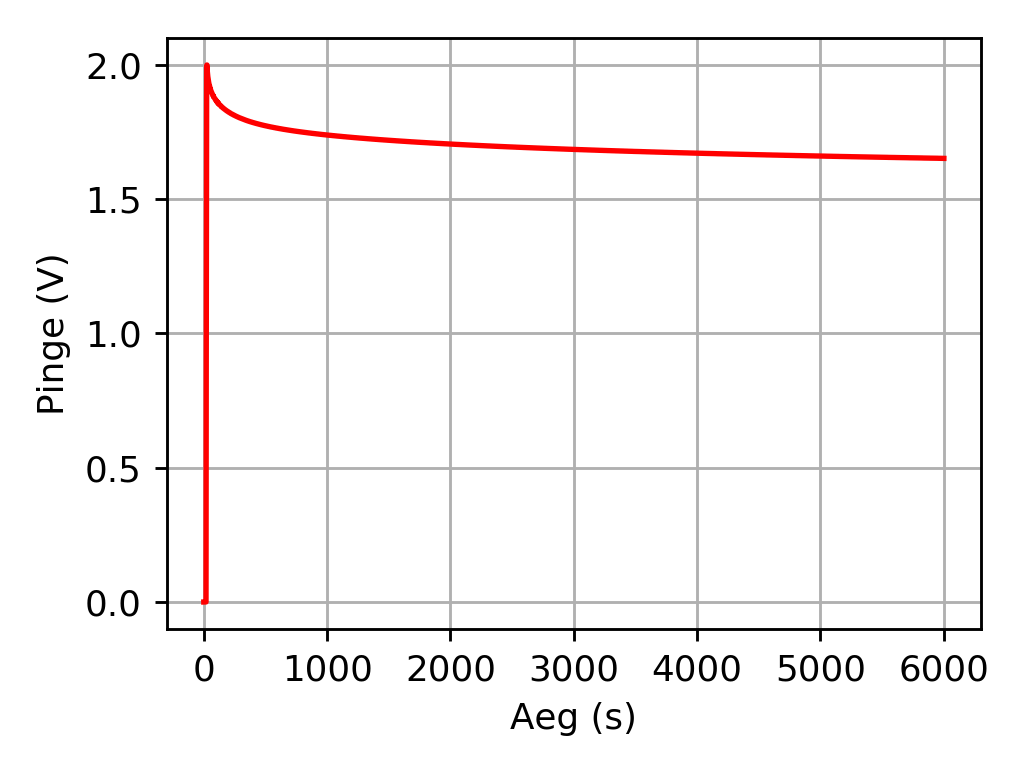

In [62]:
fail = 'kondensaatori_laadumine_mälu'
np.savetxt(fail + '.txt', np.column_stack((aeg, pinge)), fmt='%.8f')

plot(aeg, pinge, 'r-')
xlabel('Aeg (s)')
ylabel('Pinge (V)')
grid()
tight_layout()
savefig(fail + '.png', bbox_inches='tight')
show()